1. import the libraries
2. read the dataset
3. handle the missing values
4. split the data to independent and dependent
5. handle categorical data
6. split the data to train and test
7. apply feature scaling

In [1]:
# 1.imorting neccessary libraries for data wrangling
import pandas as pd
import numpy as np

In [2]:
# 2.reading dataset
dataset = pd.read_csv(r'C:\Users\acer\OneDrive - SP JAIN SCHOOL OF GLOBAL MANAGEMENT\Computer programming\dataset\50_Startups.csv')
dataset.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,NaN,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
# checking number of columns and rows
dataset.shape

(50, 5)

In [4]:
# cheking number of missing values
dataset.isnull().sum()

R&D Spend          0
Administration     1
Marketing Spend    1
State              0
Profit             0
dtype: int64

In [5]:
# checking data types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   49 non-null     float64
 2   Marketing Spend  49 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
#since administration column is numerical and there is missing values, we will replace them with mean
print(dataset['Administration'].median())
print(dataset['Administration'].mean())

122782.75
121564.03816326532


In [7]:
#since Marketing Spend column is numerical and there is missing values, we will replace them with mean
print(dataset['Marketing Spend'].median())
print(dataset['Marketing Spend'].mean())

214634.81
212725.2667346939


In [8]:
#replacing missing values with 
dataset['Administration'].fillna(dataset['Administration'].mean(), inplace=True)
dataset['Marketing Spend'].fillna(dataset['Marketing Spend'].mean(), inplace=True)

In [9]:
# below we can see there no more missing values left in the dataset
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


Splitting Data
========


In [10]:
dataset.head(1)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.2,136897.8,471784.1,New York,192261.83


In [11]:
# x is first 4 column which is input and y is the last column that is output
x = dataset.iloc[:,0:4]
y = dataset.iloc[:, -1]

In [12]:
x.head(1)

,R&D Spend,Administration,Marketing Spend,State
0,165349.2,136897.8,471784.1,New York


In [13]:
y.head(1)

0    192261.83
Name: Profit, dtype: float64

#  Changing data types (Categorical to binary)

In [14]:
x['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [15]:
type(x)

pandas.core.frame.DataFrame

In [16]:
# changing dataframe data type to numpy ndarray
x = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, -1].values

In [17]:
# chekc for data type
print(type(x))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [18]:
x[1]

array([162597.7, 151377.59, 443898.53, 'California'], dtype=object)

In [19]:
y[1]

191792.06

In [20]:
x.shape

(50, 4)

In [21]:
y.shape

(50,)

In [22]:
# importing libraries to convert categorical data type to binary data type
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer([('convert', OneHotEncoder(), [-1])], remainder='passthrough')
x = ct.fit_transform(x)

In [23]:
x[1]

array([1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53], dtype=object)

In [24]:
#splitting dataset train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [25]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121564.038163,212725.266735,112012.639200
std,45902.256482,27974.818762,121697.951409,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,135028.207500,90138.902500
50%,73051.080000,122699.795000,213680.038367,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


# Feature engineering

In [26]:
#importing library to remove outliers
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [27]:
x_train

array([[-0.81649658,  1.73205081, -0.73379939, -0.35006454, -0.78547109,
         0.08437197],
       [-0.81649658, -0.57735027,  1.36277029, -0.55530319, -1.48117426,
         0.010183  ],
       [-0.81649658,  1.73205081, -0.73379939,  0.07935762,  0.80133381,
        -0.57136866],
       [ 1.22474487, -0.57735027, -0.73379939, -0.54638238,  1.32505817,
         0.05314808],
       [-0.81649658,  1.73205081, -0.73379939,  0.43485371, -0.35598663,
         0.73767158],
       [-0.81649658,  1.73205081, -0.73379939,  1.26943143,  0.85518519,
         0.9733037 ],
       [-0.81649658,  1.73205081, -0.73379939,  1.04525007,  1.28077047,
         0.42514589],
       [-0.81649658, -0.57735027,  1.36277029, -1.529843  ,  0.02942065,
        -1.64667886],
       [-0.81649658, -0.57735027,  1.36277029, -1.53976251, -2.76767264,
        -1.66217167],
       [-0.81649658, -0.57735027,  1.36277029, -0.13115188,  1.14497701,
        -0.79035663],
       [-0.81649658, -0.57735027,  1.36277029,  0.

In [28]:
x_train.shape

(40, 6)

In [29]:
y_train.shape

(40,)

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

In [31]:
model.add(Dense(units=6, kernel_initializer='random_uniform', activation='relu'))   # input layer
model.add(Dense(units=12, kernel_initializer='random_uniform', activation='relu'))  # hidden layer
model.add(Dense(units=1, kernel_initializer='random_uniform', activation='relu'))   # output layer
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])

In [32]:
model.fit(x_train, y_train, epochs=30000)

Epoch 1/30000
2/2 [==============================] - 1s 3ms/step - loss: 13615995904.0000 - mae: 109446.4531
Epoch 2/30000
2/2 [==============================] - 0s 8ms/step - loss: 13615994880.0000 - mae: 109446.4375
Epoch 3/30000
2/2 [==============================] - 0s 7ms/step - loss: 13615992832.0000 - mae: 109446.4375
Epoch 4/30000
2/2 [==============================] - 0s 7ms/step - loss: 13615991808.0000 - mae: 109446.4219
Epoch 5/30000
2/2 [==============================] - 0s 8ms/step - loss: 13615990784.0000 - mae: 109446.4219
Epoch 6/30000
2/2 [==============================] - 0s 6ms/step - loss: 13615990784.0000 - mae: 109446.4219
Epoch 7/30000
2/2 [==============================] - 0s 5ms/step - loss: 13615988736.0000 - mae: 109446.4219
Epoch 8/30000
2/2 [==============================] - 0s 7ms/step - loss: 13615988736.0000 - mae: 109446.4219
Epoch 9/30000
2/2 [==============================] - 0s 5ms/step - loss: 13615988736.0000 - mae: 109446.4141
Epoch 10/30000
2/2 

2/2 [==============================] - 0s 3ms/step - loss: 13615821824.0000 - mae: 109445.7109
Epoch 76/30000
2/2 [==============================] - 0s 3ms/step - loss: 13615816704.0000 - mae: 109445.6875
Epoch 77/30000
2/2 [==============================] - 0s 4ms/step - loss: 13615812608.0000 - mae: 109445.6719
Epoch 78/30000
2/2 [==============================] - 0s 8ms/step - loss: 13615808512.0000 - mae: 109445.6484
Epoch 79/30000
2/2 [==============================] - 0s 5ms/step - loss: 13615802368.0000 - mae: 109445.6406
Epoch 80/30000
2/2 [==============================] - 0s 6ms/step - loss: 13615797248.0000 - mae: 109445.6094
Epoch 81/30000
2/2 [==============================] - 0s 5ms/step - loss: 13615792128.0000 - mae: 109445.5859
Epoch 82/30000
2/2 [==============================] - 0s 5ms/step - loss: 13615787008.0000 - mae: 109445.5625
Epoch 83/30000
2/2 [==============================] - 0s 5ms/step - loss: 13615781888.0000 - mae: 109445.5469
Epoch 84/30000
2/2 [=====

2/2 [==============================] - 0s 7ms/step - loss: 13615203328.0000 - mae: 109443.2500
Epoch 149/30000
2/2 [==============================] - 0s 6ms/step - loss: 13615191040.0000 - mae: 109443.2109
Epoch 150/30000
2/2 [==============================] - 0s 4ms/step - loss: 13615175680.0000 - mae: 109443.1641
Epoch 151/30000
2/2 [==============================] - 0s 6ms/step - loss: 13615162368.0000 - mae: 109443.0859
Epoch 152/30000
2/2 [==============================] - 0s 6ms/step - loss: 13615148032.0000 - mae: 109443.0469
Epoch 153/30000
2/2 [==============================] - 0s 3ms/step - loss: 13615134720.0000 - mae: 109443.0000
Epoch 154/30000
2/2 [==============================] - 0s 5ms/step - loss: 13615119360.0000 - mae: 109442.9375
Epoch 155/30000
2/2 [==============================] - 0s 4ms/step - loss: 13615106048.0000 - mae: 109442.8750
Epoch 156/30000
2/2 [==============================] - 0s 6ms/step - loss: 13615090688.0000 - mae: 109442.8281
Epoch 157/30000
2

2/2 [==============================] - 0s 8ms/step - loss: 13613834240.0000 - mae: 109438.0000
Epoch 222/30000
2/2 [==============================] - 0s 9ms/step - loss: 13613811712.0000 - mae: 109437.9141
Epoch 223/30000
2/2 [==============================] - 0s 3ms/step - loss: 13613783040.0000 - mae: 109437.8125
Epoch 224/30000
2/2 [==============================] - 0s 5ms/step - loss: 13613755392.0000 - mae: 109437.7031
Epoch 225/30000
2/2 [==============================] - 0s 3ms/step - loss: 13613731840.0000 - mae: 109437.6094
Epoch 226/30000
2/2 [==============================] - 0s 5ms/step - loss: 13613709312.0000 - mae: 109437.5234
Epoch 227/30000
2/2 [==============================] - 0s 4ms/step - loss: 13613679616.0000 - mae: 109437.3984
Epoch 228/30000
2/2 [==============================] - 0s 4ms/step - loss: 13613651968.0000 - mae: 109437.2969
Epoch 229/30000
2/2 [==============================] - 0s 6ms/step - loss: 13613620224.0000 - mae: 109437.1875
Epoch 230/30000
2

2/2 [==============================] - 0s 3ms/step - loss: 13611408384.0000 - mae: 109428.8281
Epoch 295/30000
2/2 [==============================] - 0s 4ms/step - loss: 13611363328.0000 - mae: 109428.6641
Epoch 296/30000
2/2 [==============================] - 0s 3ms/step - loss: 13611321344.0000 - mae: 109428.5000
Epoch 297/30000
2/2 [==============================] - 0s 7ms/step - loss: 13611281408.0000 - mae: 109428.3516
Epoch 298/30000
2/2 [==============================] - 0s 3ms/step - loss: 13611239424.0000 - mae: 109428.2031
Epoch 299/30000
2/2 [==============================] - 0s 4ms/step - loss: 13611190272.0000 - mae: 109428.0156
Epoch 300/30000
2/2 [==============================] - 0s 5ms/step - loss: 13611149312.0000 - mae: 109427.8594
Epoch 301/30000
2/2 [==============================] - 0s 3ms/step - loss: 13611109376.0000 - mae: 109427.7109
Epoch 302/30000
2/2 [==============================] - 0s 4ms/step - loss: 13611070464.0000 - mae: 109427.5781
Epoch 303/30000
2

2/2 [==============================] - 0s 4ms/step - loss: 13607660544.0000 - mae: 109414.8516
Epoch 368/30000
2/2 [==============================] - 0s 4ms/step - loss: 13607597056.0000 - mae: 109414.6250
Epoch 369/30000
2/2 [==============================] - 0s 6ms/step - loss: 13607532544.0000 - mae: 109414.3906
Epoch 370/30000
2/2 [==============================] - 0s 3ms/step - loss: 13607458816.0000 - mae: 109414.1250
Epoch 371/30000
2/2 [==============================] - 0s 6ms/step - loss: 13607398400.0000 - mae: 109413.8906
Epoch 372/30000
2/2 [==============================] - 0s 2ms/step - loss: 13607343104.0000 - mae: 109413.6719
Epoch 373/30000
2/2 [==============================] - 0s 5ms/step - loss: 13607277568.0000 - mae: 109413.4219
Epoch 374/30000
2/2 [==============================] - 0s 3ms/step - loss: 13607217152.0000 - mae: 109413.2031
Epoch 375/30000
2/2 [==============================] - 0s 2ms/step - loss: 13607147520.0000 - mae: 109412.9531
Epoch 376/30000
2

2/2 [==============================] - 0s 4ms/step - loss: 13602301952.0000 - mae: 109395.0391
Epoch 441/30000
2/2 [==============================] - 0s 7ms/step - loss: 13602224128.0000 - mae: 109394.7500
Epoch 442/30000
2/2 [==============================] - 0s 5ms/step - loss: 13602152448.0000 - mae: 109394.4766
Epoch 443/30000
2/2 [==============================] - 0s 5ms/step - loss: 13602067456.0000 - mae: 109394.1719
Epoch 444/30000
2/2 [==============================] - 0s 2ms/step - loss: 13601977344.0000 - mae: 109393.8516
Epoch 445/30000
2/2 [==============================] - 0s 4ms/step - loss: 13601888256.0000 - mae: 109393.5234
Epoch 446/30000
2/2 [==============================] - 0s 6ms/step - loss: 13601813504.0000 - mae: 109393.2500
Epoch 447/30000
2/2 [==============================] - 0s 2ms/step - loss: 13601733632.0000 - mae: 109392.9531
Epoch 448/30000
2/2 [==============================] - 0s 3ms/step - loss: 13601634304.0000 - mae: 109392.5859
Epoch 449/30000
2

2/2 [==============================] - 0s 6ms/step - loss: 13595055104.0000 - mae: 109368.5234
Epoch 514/30000
2/2 [==============================] - 0s 7ms/step - loss: 13594934272.0000 - mae: 109368.0859
Epoch 515/30000
2/2 [==============================] - ETA: 0s - loss: 13738449920.0000 - mae: 108890.28 - 0s 3ms/step - loss: 13594822656.0000 - mae: 109367.6719
Epoch 516/30000
2/2 [==============================] - 0s 7ms/step - loss: 13594714112.0000 - mae: 109367.2734
Epoch 517/30000
2/2 [==============================] - 0s 7ms/step - loss: 13594594304.0000 - mae: 109366.8359
Epoch 518/30000
2/2 [==============================] - 0s 4ms/step - loss: 13594478592.0000 - mae: 109366.4141
Epoch 519/30000
2/2 [==============================] - 0s 3ms/step - loss: 13594356736.0000 - mae: 109365.9766
Epoch 520/30000
2/2 [==============================] - 0s 4ms/step - loss: 13594228736.0000 - mae: 109365.5156
Epoch 521/30000
2/2 [==============================] - 0s 2ms/step - loss: 1

2/2 [==============================] - 0s 5ms/step - loss: 13585388544.0000 - mae: 109333.5156
Epoch 587/30000
2/2 [==============================] - 0s 4ms/step - loss: 13585226752.0000 - mae: 109332.9219
Epoch 588/30000
2/2 [==============================] - 0s 4ms/step - loss: 13585064960.0000 - mae: 109332.3594
Epoch 589/30000
2/2 [==============================] - 0s 5ms/step - loss: 13584878592.0000 - mae: 109331.6875
Epoch 590/30000
2/2 [==============================] - 0s 5ms/step - loss: 13584719872.0000 - mae: 109331.1016
Epoch 591/30000
2/2 [==============================] - 0s 5ms/step - loss: 13584611328.0000 - mae: 109330.7031
Epoch 592/30000
2/2 [==============================] - 0s 3ms/step - loss: 13584484352.0000 - mae: 109330.2500
Epoch 593/30000
2/2 [==============================] - 0s 5ms/step - loss: 13584324608.0000 - mae: 109329.6719
Epoch 594/30000
2/2 [==============================] - 0s 5ms/step - loss: 13584172032.0000 - mae: 109329.1250
Epoch 595/30000
2

2/2 [==============================] - 0s 4ms/step - loss: 13573226496.0000 - mae: 109289.7109
Epoch 660/30000
2/2 [==============================] - 0s 5ms/step - loss: 13573029888.0000 - mae: 109288.9844
Epoch 661/30000
2/2 [==============================] - 0s 3ms/step - loss: 13572862976.0000 - mae: 109288.3906
Epoch 662/30000
2/2 [==============================] - 0s 7ms/step - loss: 13572658176.0000 - mae: 109287.6719
Epoch 663/30000
2/2 [==============================] - 0s 5ms/step - loss: 13572454400.0000 - mae: 109286.9531
Epoch 664/30000
2/2 [==============================] - 0s 5ms/step - loss: 13572302848.0000 - mae: 109286.3906
Epoch 665/30000
2/2 [==============================] - 0s 3ms/step - loss: 13572115456.0000 - mae: 109285.7266
Epoch 666/30000
2/2 [==============================] - 0s 6ms/step - loss: 13571936256.0000 - mae: 109285.0859
Epoch 667/30000
2/2 [==============================] - 0s 4ms/step - loss: 13571728384.0000 - mae: 109284.3516
Epoch 668/30000
2

2/2 [==============================] - 0s 3ms/step - loss: 13558237184.0000 - mae: 109235.9766
Epoch 733/30000
2/2 [==============================] - 0s 4ms/step - loss: 13557958656.0000 - mae: 109234.9844
Epoch 734/30000
2/2 [==============================] - 0s 5ms/step - loss: 13557729280.0000 - mae: 109234.1719
Epoch 735/30000
2/2 [==============================] - 0s 4ms/step - loss: 13557516288.0000 - mae: 109233.4219
Epoch 736/30000
2/2 [==============================] - 0s 4ms/step - loss: 13557287936.0000 - mae: 109232.6016
Epoch 737/30000
2/2 [==============================] - 0s 3ms/step - loss: 13557012480.0000 - mae: 109231.6250
Epoch 738/30000
2/2 [==============================] - 0s 6ms/step - loss: 13556762624.0000 - mae: 109230.7656
Epoch 739/30000
2/2 [==============================] - 0s 5ms/step - loss: 13556519936.0000 - mae: 109229.8906
Epoch 740/30000
2/2 [==============================] - 0s 3ms/step - loss: 13556320256.0000 - mae: 109229.1875
Epoch 741/30000
2

2/2 [==============================] - 0s 4ms/step - loss: 13540413440.0000 - mae: 109172.2734
Epoch 806/30000
2/2 [==============================] - 0s 8ms/step - loss: 13540109312.0000 - mae: 109171.1719
Epoch 807/30000
2/2 [==============================] - 0s 6ms/step - loss: 13539822592.0000 - mae: 109170.1641
Epoch 808/30000
2/2 [==============================] - 0s 7ms/step - loss: 13539502080.0000 - mae: 109169.0234
Epoch 809/30000
2/2 [==============================] - 0s 6ms/step - loss: 13539246080.0000 - mae: 109168.1094
Epoch 810/30000
2/2 [==============================] - 0s 6ms/step - loss: 13538985984.0000 - mae: 109167.1641
Epoch 811/30000
2/2 [==============================] - 0s 5ms/step - loss: 13538740224.0000 - mae: 109166.2891
Epoch 812/30000
2/2 [==============================] - 0s 4ms/step - loss: 13538455552.0000 - mae: 109165.2500
Epoch 813/30000
2/2 [==============================] - 0s 6ms/step - loss: 13538187264.0000 - mae: 109164.2969
Epoch 814/30000
2

2/2 [==============================] - 0s 10ms/step - loss: 13518621696.0000 - mae: 109094.6016
Epoch 879/30000
2/2 [==============================] - 0s 6ms/step - loss: 13518319616.0000 - mae: 109093.5000
Epoch 880/30000
2/2 [==============================] - 0s 11ms/step - loss: 13518039040.0000 - mae: 109092.5156
Epoch 881/30000
2/2 [==============================] - 0s 5ms/step - loss: 13517747200.0000 - mae: 109091.4766
Epoch 882/30000
2/2 [==============================] - 0s 8ms/step - loss: 13517426688.0000 - mae: 109090.3125
Epoch 883/30000
2/2 [==============================] - ETA: 0s - loss: 13973684224.0000 - mae: 111357.78 - 0s 4ms/step - loss: 13517107200.0000 - mae: 109089.1875
Epoch 884/30000
2/2 [==============================] - 0s 14ms/step - loss: 13516786688.0000 - mae: 109088.0234
Epoch 885/30000
2/2 [==============================] - 0s 6ms/step - loss: 13516450816.0000 - mae: 109086.8594
Epoch 886/30000
2/2 [==============================] - 0s 14ms/step - los

2/2 [==============================] - 0s 3ms/step - loss: 13493140480.0000 - mae: 109003.9375
Epoch 952/30000
2/2 [==============================] - 0s 4ms/step - loss: 13492770816.0000 - mae: 109002.6250
Epoch 953/30000
2/2 [==============================] - 0s 7ms/step - loss: 13492338688.0000 - mae: 109001.0859
Epoch 954/30000
2/2 [==============================] - 0s 4ms/step - loss: 13492034560.0000 - mae: 108999.9766
Epoch 955/30000
2/2 [==============================] - 0s 5ms/step - loss: 13491704832.0000 - mae: 108998.8125
Epoch 956/30000
2/2 [==============================] - 0s 5ms/step - loss: 13491336192.0000 - mae: 108997.4609
Epoch 957/30000
2/2 [==============================] - 0s 4ms/step - loss: 13490939904.0000 - mae: 108996.0625
Epoch 958/30000
2/2 [==============================] - 0s 5ms/step - loss: 13490482176.0000 - mae: 108994.4375
Epoch 959/30000
2/2 [==============================] - 0s 5ms/step - loss: 13490105344.0000 - mae: 108993.1094
Epoch 960/30000
2

2/2 [==============================] - 0s 7ms/step - loss: 13463984128.0000 - mae: 108900.2266
Epoch 1025/30000
2/2 [==============================] - 0s 4ms/step - loss: 13463521280.0000 - mae: 108898.5781
Epoch 1026/30000
2/2 [==============================] - 0s 6ms/step - loss: 13463054336.0000 - mae: 108896.9375
Epoch 1027/30000
2/2 [==============================] - 0s 5ms/step - loss: 13462549504.0000 - mae: 108895.1484
Epoch 1028/30000
2/2 [==============================] - 0s 5ms/step - loss: 13462165504.0000 - mae: 108893.7734
Epoch 1029/30000
2/2 [==============================] - 0s 4ms/step - loss: 13461720064.0000 - mae: 108892.1719
Epoch 1030/30000
2/2 [==============================] - 0s 5ms/step - loss: 13461276672.0000 - mae: 108890.6094
Epoch 1031/30000
2/2 [==============================] - 0s 7ms/step - loss: 13460783104.0000 - mae: 108888.8516
Epoch 1032/30000
2/2 [==============================] - 0s 5ms/step - loss: 13460384768.0000 - mae: 108887.4531
Epoch 103

2/2 [==============================] - 0s 4ms/step - loss: 13430444032.0000 - mae: 108780.9844
Epoch 1097/30000
2/2 [==============================] - 0s 5ms/step - loss: 13429875712.0000 - mae: 108778.9531
Epoch 1098/30000
2/2 [==============================] - 0s 8ms/step - loss: 13429336064.0000 - mae: 108777.0625
Epoch 1099/30000
2/2 [==============================] - ETA: 0s - loss: 14316830720.0000 - mae: 111741.14 - 0s 5ms/step - loss: 13428791296.0000 - mae: 108775.1094
Epoch 1100/30000
2/2 [==============================] - 0s 5ms/step - loss: 13428403200.0000 - mae: 108773.7031
Epoch 1101/30000
2/2 [==============================] - 0s 6ms/step - loss: 13427979264.0000 - mae: 108772.2031
Epoch 1102/30000
2/2 [==============================] - 0s 6ms/step - loss: 13427572736.0000 - mae: 108770.7344
Epoch 1103/30000
2/2 [==============================] - 0s 7ms/step - loss: 13427089408.0000 - mae: 108769.0625
Epoch 1104/30000
2/2 [==============================] - 0s 5ms/step -

2/2 [==============================] - 0s 5ms/step - loss: 13392854016.0000 - mae: 108647.5156
Epoch 1169/30000
2/2 [==============================] - 0s 4ms/step - loss: 13392230400.0000 - mae: 108645.2734
Epoch 1170/30000
2/2 [==============================] - 0s 6ms/step - loss: 13391771648.0000 - mae: 108643.6250
Epoch 1171/30000
2/2 [==============================] - 0s 8ms/step - loss: 13391280128.0000 - mae: 108641.8906
Epoch 1172/30000
2/2 [==============================] - 0s 4ms/step - loss: 13390720000.0000 - mae: 108639.8906
Epoch 1173/30000
2/2 [==============================] - 0s 5ms/step - loss: 13390219264.0000 - mae: 108638.1250
Epoch 1174/30000
2/2 [==============================] - 0s 6ms/step - loss: 13389648896.0000 - mae: 108636.0781
Epoch 1175/30000
2/2 [==============================] - 0s 8ms/step - loss: 13388994560.0000 - mae: 108633.7734
Epoch 1176/30000
2/2 [==============================] - 0s 9ms/step - loss: 13388490752.0000 - mae: 108632.0234
Epoch 117

2/2 [==============================] - 0s 7ms/step - loss: 13350578176.0000 - mae: 108497.2031
Epoch 1241/30000
2/2 [==============================] - 0s 6ms/step - loss: 13349963776.0000 - mae: 108495.0156
Epoch 1242/30000
2/2 [==============================] - 0s 4ms/step - loss: 13349390336.0000 - mae: 108492.9609
Epoch 1243/30000
2/2 [==============================] - 0s 6ms/step - loss: 13348780032.0000 - mae: 108490.7656
Epoch 1244/30000
2/2 [==============================] - 0s 6ms/step - loss: 13348134912.0000 - mae: 108488.4766
Epoch 1245/30000
2/2 [==============================] - 0s 6ms/step - loss: 13347538944.0000 - mae: 108486.3359
Epoch 1246/30000
2/2 [==============================] - 0s 5ms/step - loss: 13346805760.0000 - mae: 108483.7266
Epoch 1247/30000
2/2 [==============================] - 0s 5ms/step - loss: 13346167808.0000 - mae: 108481.5000
Epoch 1248/30000
2/2 [==============================] - 0s 7ms/step - loss: 13345445888.0000 - mae: 108478.9375
Epoch 124

2/2 [==============================] - 0s 8ms/step - loss: 13302659072.0000 - mae: 108326.9219
Epoch 1313/30000
2/2 [==============================] - 0s 9ms/step - loss: 13301891072.0000 - mae: 108324.1719
Epoch 1314/30000
2/2 [==============================] - 0s 9ms/step - loss: 13301287936.0000 - mae: 108322.0156
Epoch 1315/30000
2/2 [==============================] - 0s 4ms/step - loss: 13300476928.0000 - mae: 108319.1641
Epoch 1316/30000
2/2 [==============================] - 0s 4ms/step - loss: 13299789824.0000 - mae: 108316.7109
Epoch 1317/30000
2/2 [==============================] - 0s 7ms/step - loss: 13299054592.0000 - mae: 108314.0625
Epoch 1318/30000
2/2 [==============================] - 0s 9ms/step - loss: 13298403328.0000 - mae: 108311.7344
Epoch 1319/30000
2/2 [==============================] - 0s 12ms/step - loss: 13297700864.0000 - mae: 108309.2266
Epoch 1320/30000
2/2 [==============================] - 0s 5ms/step - loss: 13297052672.0000 - mae: 108306.9531
Epoch 13

2/2 [==============================] - 0s 5ms/step - loss: 13250070528.0000 - mae: 108139.3750
Epoch 1385/30000
2/2 [==============================] - 0s 9ms/step - loss: 13249211392.0000 - mae: 108136.3125
Epoch 1386/30000
2/2 [==============================] - 0s 11ms/step - loss: 13248498688.0000 - mae: 108133.7969
Epoch 1387/30000
2/2 [==============================] - 0s 7ms/step - loss: 13247580160.0000 - mae: 108130.5781
Epoch 1388/30000
2/2 [==============================] - 0s 7ms/step - loss: 13246884864.0000 - mae: 108128.1250
Epoch 1389/30000
2/2 [==============================] - 0s 6ms/step - loss: 13246192640.0000 - mae: 108125.6484
Epoch 1390/30000
2/2 [==============================] - 0s 6ms/step - loss: 13245492224.0000 - mae: 108123.0859
Epoch 1391/30000
2/2 [==============================] - 0s 6ms/step - loss: 13244770304.0000 - mae: 108120.5234
Epoch 1392/30000
2/2 [==============================] - 0s 5ms/step - loss: 13243931648.0000 - mae: 108117.5000
Epoch 13

2/2 [==============================] - 0s 6ms/step - loss: 13192034304.0000 - mae: 107932.0391
Epoch 1457/30000
2/2 [==============================] - 0s 5ms/step - loss: 13191251968.0000 - mae: 107929.2266
Epoch 1458/30000
2/2 [==============================] - 0s 3ms/step - loss: 13190379520.0000 - mae: 107926.1406
Epoch 1459/30000
2/2 [==============================] - 0s 6ms/step - loss: 13189501952.0000 - mae: 107923.0391
Epoch 1460/30000
2/2 [==============================] - 0s 5ms/step - loss: 13188563968.0000 - mae: 107919.6719
Epoch 1461/30000
2/2 [==============================] - 0s 3ms/step - loss: 13187853312.0000 - mae: 107917.1406
Epoch 1462/30000
2/2 [==============================] - 0s 5ms/step - loss: 13187156992.0000 - mae: 107914.6484
Epoch 1463/30000
2/2 [==============================] - 0s 6ms/step - loss: 13186134016.0000 - mae: 107911.0625
Epoch 1464/30000
2/2 [==============================] - 0s 5ms/step - loss: 13185220608.0000 - mae: 107907.7734
Epoch 146

2/2 [==============================] - 0s 4ms/step - loss: 13128165376.0000 - mae: 107703.7266
Epoch 1529/30000
2/2 [==============================] - 0s 5ms/step - loss: 13127497728.0000 - mae: 107701.2656
Epoch 1530/30000
2/2 [==============================] - 0s 8ms/step - loss: 13126768640.0000 - mae: 107698.5859
Epoch 1531/30000
2/2 [==============================] - 0s 3ms/step - loss: 13125847040.0000 - mae: 107695.3750
Epoch 1532/30000
2/2 [==============================] - 0s 6ms/step - loss: 13124886528.0000 - mae: 107691.9141
Epoch 1533/30000
2/2 [==============================] - 0s 5ms/step - loss: 13124040704.0000 - mae: 107688.8516
Epoch 1534/30000
2/2 [==============================] - 0s 5ms/step - loss: 13123221504.0000 - mae: 107685.9219
Epoch 1535/30000
2/2 [==============================] - 0s 5ms/step - loss: 13122198528.0000 - mae: 107682.2344
Epoch 1536/30000
2/2 [==============================] - 0s 7ms/step - loss: 13121426432.0000 - mae: 107679.3984
Epoch 153

2/2 [==============================] - 0s 8ms/step - loss: 13059018752.0000 - mae: 107455.6250
Epoch 1601/30000
2/2 [==============================] - 0s 3ms/step - loss: 13057951744.0000 - mae: 107451.8359
Epoch 1602/30000
2/2 [==============================] - 0s 4ms/step - loss: 13056750592.0000 - mae: 107447.5000
Epoch 1603/30000
2/2 [==============================] - 0s 4ms/step - loss: 13055678464.0000 - mae: 107443.6719
Epoch 1604/30000
2/2 [==============================] - 0s 2ms/step - loss: 13054863360.0000 - mae: 107440.7344
Epoch 1605/30000
2/2 [==============================] - 0s 3ms/step - loss: 13053965312.0000 - mae: 107437.4531
Epoch 1606/30000
2/2 [==============================] - 0s 5ms/step - loss: 13052889088.0000 - mae: 107433.7031
Epoch 1607/30000
2/2 [==============================] - 0s 6ms/step - loss: 13051758592.0000 - mae: 107429.7031
Epoch 1608/30000
2/2 [==============================] - 0s 4ms/step - loss: 13050714112.0000 - mae: 107425.8750
Epoch 160

2/2 [==============================] - 0s 4ms/step - loss: 12982337536.0000 - mae: 107180.4766
Epoch 1673/30000
2/2 [==============================] - 0s 5ms/step - loss: 12981348352.0000 - mae: 107176.9141
Epoch 1674/30000
2/2 [==============================] - 0s 5ms/step - loss: 12980389888.0000 - mae: 107173.4219
Epoch 1675/30000
2/2 [==============================] - 0s 4ms/step - loss: 12979166208.0000 - mae: 107168.9844
Epoch 1676/30000
2/2 [==============================] - 0s 5ms/step - loss: 12978075648.0000 - mae: 107165.1641
Epoch 1677/30000
2/2 [==============================] - 0s 7ms/step - loss: 12976796672.0000 - mae: 107160.5234
Epoch 1678/30000
2/2 [==============================] - 0s 7ms/step - loss: 12975650816.0000 - mae: 107156.3984
Epoch 1679/30000
2/2 [==============================] - 0s 7ms/step - loss: 12974625792.0000 - mae: 107152.7266
Epoch 1680/30000
2/2 [==============================] - 0s 8ms/step - loss: 12973726720.0000 - mae: 107149.3984
Epoch 168

2/2 [==============================] - 0s 5ms/step - loss: 12898590720.0000 - mae: 106878.6406
Epoch 1746/30000
2/2 [==============================] - 0s 5ms/step - loss: 12897379328.0000 - mae: 106874.1719
Epoch 1747/30000
2/2 [==============================] - 0s 6ms/step - loss: 12896411648.0000 - mae: 106870.6250
Epoch 1748/30000
2/2 [==============================] - 0s 4ms/step - loss: 12895230976.0000 - mae: 106866.4766
Epoch 1749/30000
2/2 [==============================] - 0s 10ms/step - loss: 12893826048.0000 - mae: 106861.3281
Epoch 1750/30000
2/2 [==============================] - ETA: 0s - loss: 12208539648.0000 - mae: 103356.39 - 0s 8ms/step - loss: 12892643328.0000 - mae: 106857.1094
Epoch 1751/30000
2/2 [==============================] - 0s 5ms/step - loss: 12891408384.0000 - mae: 106852.6875
Epoch 1752/30000
2/2 [==============================] - 0s 6ms/step - loss: 12890032128.0000 - mae: 106847.7500
Epoch 1753/30000
2/2 [==============================] - 0s 3ms/step 

2/2 [==============================] - 0s 9ms/step - loss: 12811088896.0000 - mae: 106562.2656
Epoch 1817/30000
2/2 [==============================] - 0s 9ms/step - loss: 12809930752.0000 - mae: 106558.0156
Epoch 1818/30000
2/2 [==============================] - 0s 6ms/step - loss: 12808828928.0000 - mae: 106553.9844
Epoch 1819/30000
2/2 [==============================] - 0s 9ms/step - loss: 12807389184.0000 - mae: 106548.7734
Epoch 1820/30000
2/2 [==============================] - 0s 7ms/step - loss: 12806096896.0000 - mae: 106544.0234
Epoch 1821/30000
2/2 [==============================] - 0s 4ms/step - loss: 12804880384.0000 - mae: 106539.6719
Epoch 1822/30000
2/2 [==============================] - 0s 4ms/step - loss: 12803608576.0000 - mae: 106535.1016
Epoch 1823/30000
2/2 [==============================] - 0s 10ms/step - loss: 12802334720.0000 - mae: 106530.4609
Epoch 1824/30000
2/2 [==============================] - 0s 3ms/step - loss: 12801299456.0000 - mae: 106526.6016
Epoch 18

2/2 [==============================] - 0s 3ms/step - loss: 12714768384.0000 - mae: 106211.5625
Epoch 1890/30000
2/2 [==============================] - 0s 8ms/step - loss: 12713424896.0000 - mae: 106206.7031
Epoch 1891/30000
2/2 [==============================] - 0s 7ms/step - loss: 12712094720.0000 - mae: 106201.8516
Epoch 1892/30000
2/2 [==============================] - 0s 5ms/step - loss: 12711006208.0000 - mae: 106197.8359
Epoch 1893/30000
2/2 [==============================] - 0s 5ms/step - loss: 12709848064.0000 - mae: 106193.6094
Epoch 1894/30000
2/2 [==============================] - 0s 5ms/step - loss: 12708528128.0000 - mae: 106188.8125
Epoch 1895/30000
2/2 [==============================] - 0s 6ms/step - loss: 12707059712.0000 - mae: 106183.4531
Epoch 1896/30000
2/2 [==============================] - 0s 5ms/step - loss: 12705669120.0000 - mae: 106178.3125
Epoch 1897/30000
2/2 [==============================] - 0s 3ms/step - loss: 12704312320.0000 - mae: 106173.3516
Epoch 189

2/2 [==============================] - 0s 6ms/step - loss: 12612225024.0000 - mae: 105836.8516
Epoch 1962/30000
2/2 [==============================] - 0s 8ms/step - loss: 12611035136.0000 - mae: 105832.5156
Epoch 1963/30000
2/2 [==============================] - 0s 4ms/step - loss: 12609603584.0000 - mae: 105827.2969
Epoch 1964/30000
2/2 [==============================] - 0s 8ms/step - loss: 12607936512.0000 - mae: 105821.2031
Epoch 1965/30000
2/2 [==============================] - 0s 10ms/step - loss: 12606602240.0000 - mae: 105816.2109
Epoch 1966/30000
2/2 [==============================] - 0s 11ms/step - loss: 12605273088.0000 - mae: 105811.3516
Epoch 1967/30000
2/2 [==============================] - 0s 7ms/step - loss: 12603688960.0000 - mae: 105805.5859
Epoch 1968/30000
2/2 [==============================] - 0s 7ms/step - loss: 12602070016.0000 - mae: 105799.6875
Epoch 1969/30000
2/2 [==============================] - 0s 7ms/step - loss: 12600604672.0000 - mae: 105794.2891
Epoch 1

2/2 [==============================] - 0s 8ms/step - loss: 12502005760.0000 - mae: 105431.1016
Epoch 2035/30000
2/2 [==============================] - 0s 5ms/step - loss: 12500108288.0000 - mae: 105424.1250
Epoch 2036/30000
2/2 [==============================] - 0s 3ms/step - loss: 12498834432.0000 - mae: 105419.4219
Epoch 2037/30000
2/2 [==============================] - 0s 7ms/step - loss: 12497137664.0000 - mae: 105413.2656
Epoch 2038/30000
2/2 [==============================] - 0s 6ms/step - loss: 12495273984.0000 - mae: 105406.4219
Epoch 2039/30000
2/2 [==============================] - 0s 7ms/step - loss: 12493417472.0000 - mae: 105399.6484
Epoch 2040/30000
2/2 [==============================] - 0s 6ms/step - loss: 12491661312.0000 - mae: 105393.1875
Epoch 2041/30000
2/2 [==============================] - 0s 4ms/step - loss: 12490101760.0000 - mae: 105387.3984
Epoch 2042/30000
2/2 [==============================] - 0s 6ms/step - loss: 12488941568.0000 - mae: 105383.0234
Epoch 204

2/2 [==============================] - 0s 7ms/step - loss: 12385376256.0000 - mae: 104999.7031
Epoch 2107/30000
2/2 [==============================] - 0s 4ms/step - loss: 12383560704.0000 - mae: 104993.0625
Epoch 2108/30000
2/2 [==============================] - 0s 5ms/step - loss: 12381860864.0000 - mae: 104986.6875
Epoch 2109/30000
2/2 [==============================] - 0s 6ms/step - loss: 12380263424.0000 - mae: 104980.8281
Epoch 2110/30000
2/2 [==============================] - 0s 4ms/step - loss: 12378469376.0000 - mae: 104974.0000
Epoch 2111/30000
2/2 [==============================] - 0s 4ms/step - loss: 12376920064.0000 - mae: 104968.2969
Epoch 2112/30000
2/2 [==============================] - 0s 5ms/step - loss: 12375241728.0000 - mae: 104962.0391
Epoch 2113/30000
2/2 [==============================] - 0s 5ms/step - loss: 12373440512.0000 - mae: 104955.4766
Epoch 2114/30000
2/2 [==============================] - 0s 7ms/step - loss: 12371704832.0000 - mae: 104949.0469
Epoch 211

2/2 [==============================] - 0s 5ms/step - loss: 12260367360.0000 - mae: 104534.8125
Epoch 2180/30000
2/2 [==============================] - 0s 8ms/step - loss: 12258220032.0000 - mae: 104526.8672
Epoch 2181/30000
2/2 [==============================] - 0s 3ms/step - loss: 12256410624.0000 - mae: 104520.0156
Epoch 2182/30000
2/2 [==============================] - 0s 5ms/step - loss: 12254573568.0000 - mae: 104513.0625
Epoch 2183/30000
2/2 [==============================] - 0s 8ms/step - loss: 12252962816.0000 - mae: 104507.0859
Epoch 2184/30000
2/2 [==============================] - 0s 8ms/step - loss: 12251161600.0000 - mae: 104500.4531
Epoch 2185/30000
2/2 [==============================] - 0s 8ms/step - loss: 12249008128.0000 - mae: 104492.4531
Epoch 2186/30000
2/2 [==============================] - 0s 7ms/step - loss: 12247083008.0000 - mae: 104485.1406
Epoch 2187/30000
2/2 [==============================] - 0s 6ms/step - loss: 12245334016.0000 - mae: 104478.6953
Epoch 218

2/2 [==============================] - 0s 5ms/step - loss: 12129527808.0000 - mae: 104044.0156
Epoch 2252/30000
2/2 [==============================] - 0s 3ms/step - loss: 12127500288.0000 - mae: 104036.4531
Epoch 2253/30000
2/2 [==============================] - 0s 4ms/step - loss: 12125689856.0000 - mae: 104029.6016
Epoch 2254/30000
2/2 [==============================] - 0s 6ms/step - loss: 12123764736.0000 - mae: 104022.3750
Epoch 2255/30000
2/2 [==============================] - 0s 5ms/step - loss: 12121860096.0000 - mae: 104015.0859
Epoch 2256/30000
2/2 [==============================] - 0s 5ms/step - loss: 12120042496.0000 - mae: 104008.2656
Epoch 2257/30000
2/2 [==============================] - 0s 5ms/step - loss: 12118414336.0000 - mae: 104002.0469
Epoch 2258/30000
2/2 [==============================] - 0s 6ms/step - loss: 12116562944.0000 - mae: 103995.0000
Epoch 2259/30000
2/2 [==============================] - 0s 4ms/step - loss: 12114634752.0000 - mae: 103987.8125
Epoch 226

2/2 [==============================] - 0s 4ms/step - loss: 11989100544.0000 - mae: 103513.7344
Epoch 2325/30000
2/2 [==============================] - 0s 4ms/step - loss: 11987255296.0000 - mae: 103506.7031
Epoch 2326/30000
2/2 [==============================] - 0s 7ms/step - loss: 11985183744.0000 - mae: 103498.9375
Epoch 2327/30000
2/2 [==============================] - 0s 4ms/step - loss: 11983207424.0000 - mae: 103491.4531
Epoch 2328/30000
2/2 [==============================] - 0s 5ms/step - loss: 11981417472.0000 - mae: 103484.8594
Epoch 2329/30000
2/2 [==============================] - 0s 6ms/step - loss: 11979436032.0000 - mae: 103477.4062
Epoch 2330/30000
2/2 [==============================] - 0s 3ms/step - loss: 11977293824.0000 - mae: 103469.1797
Epoch 2331/30000
2/2 [==============================] - 0s 4ms/step - loss: 11975262208.0000 - mae: 103461.6406
Epoch 2332/30000
2/2 [==============================] - 0s 5ms/step - loss: 11973178368.0000 - mae: 103453.6719
Epoch 233

2/2 [==============================] - 0s 6ms/step - loss: 11841556480.0000 - mae: 102951.7578
Epoch 2398/30000
2/2 [==============================] - 0s 3ms/step - loss: 11839034368.0000 - mae: 102942.1719
Epoch 2399/30000
2/2 [==============================] - 0s 4ms/step - loss: 11836959744.0000 - mae: 102934.2578
Epoch 2400/30000
2/2 [==============================] - 0s 4ms/step - loss: 11834852352.0000 - mae: 102926.0625
Epoch 2401/30000
2/2 [==============================] - ETA: 0s - loss: 12776564736.0000 - mae: 108361.76 - 0s 4ms/step - loss: 11832752128.0000 - mae: 102917.9688
Epoch 2402/30000
2/2 [==============================] - 0s 8ms/step - loss: 11830686720.0000 - mae: 102910.2266
Epoch 2403/30000
2/2 [==============================] - 0s 8ms/step - loss: 11828496384.0000 - mae: 102901.8125
Epoch 2404/30000
2/2 [==============================] - 0s 8ms/step - loss: 11826482176.0000 - mae: 102894.3359
Epoch 2405/30000
2/2 [==============================] - 0s 5ms/step -

2/2 [==============================] - 0s 4ms/step - loss: 11688793088.0000 - mae: 102365.2656
Epoch 2470/30000
2/2 [==============================] - 0s 4ms/step - loss: 11686702080.0000 - mae: 102357.2344
Epoch 2471/30000
2/2 [==============================] - 0s 5ms/step - loss: 11684034560.0000 - mae: 102347.1094
Epoch 2472/30000
2/2 [==============================] - 0s 3ms/step - loss: 11681510400.0000 - mae: 102337.5156
Epoch 2473/30000
2/2 [==============================] - 0s 6ms/step - loss: 11678977024.0000 - mae: 102327.7656
Epoch 2474/30000
2/2 [==============================] - 0s 5ms/step - loss: 11676390400.0000 - mae: 102317.7344
Epoch 2475/30000
2/2 [==============================] - 0s 5ms/step - loss: 11674204160.0000 - mae: 102309.3438
Epoch 2476/30000
2/2 [==============================] - 0s 2ms/step - loss: 11672233984.0000 - mae: 102301.7031
Epoch 2477/30000
2/2 [==============================] - 0s 6ms/step - loss: 11669916672.0000 - mae: 102292.7500
Epoch 247

2/2 [==============================] - 0s 5ms/step - loss: 11525134336.0000 - mae: 101730.3906
Epoch 2543/30000
2/2 [==============================] - 0s 7ms/step - loss: 11522610176.0000 - mae: 101720.5781
Epoch 2544/30000
2/2 [==============================] - 0s 4ms/step - loss: 11520374784.0000 - mae: 101711.7109
Epoch 2545/30000
2/2 [==============================] - 0s 6ms/step - loss: 11518445568.0000 - mae: 101704.0781
Epoch 2546/30000
2/2 [==============================] - 0s 6ms/step - loss: 11516648448.0000 - mae: 101697.0156
Epoch 2547/30000
2/2 [==============================] - 0s 8ms/step - loss: 11514613760.0000 - mae: 101689.1406
Epoch 2548/30000
2/2 [==============================] - 0s 6ms/step - loss: 11512235008.0000 - mae: 101679.7734
Epoch 2549/30000
2/2 [==============================] - 0s 5ms/step - loss: 11510171648.0000 - mae: 101671.7344
Epoch 2550/30000
2/2 [==============================] - 0s 4ms/step - loss: 11507630080.0000 - mae: 101661.8594
Epoch 255

2/2 [==============================] - 0s 7ms/step - loss: 11353951232.0000 - mae: 101059.6719
Epoch 2616/30000
2/2 [==============================] - 0s 7ms/step - loss: 11351348224.0000 - mae: 101049.5469
Epoch 2617/30000
2/2 [==============================] - 0s 8ms/step - loss: 11348785152.0000 - mae: 101039.5078
Epoch 2618/30000
2/2 [==============================] - 0s 11ms/step - loss: 11346381824.0000 - mae: 101029.9531
Epoch 2619/30000
2/2 [==============================] - 0s 7ms/step - loss: 11344074752.0000 - mae: 101020.9609
Epoch 2620/30000
2/2 [==============================] - 0s 4ms/step - loss: 11341532160.0000 - mae: 101010.8750
Epoch 2621/30000
2/2 [==============================] - 0s 7ms/step - loss: 11339347968.0000 - mae: 101002.1328
Epoch 2622/30000
2/2 [==============================] - 0s 4ms/step - loss: 11337028608.0000 - mae: 100993.1094
Epoch 2623/30000
2/2 [==============================] - 0s 5ms/step - loss: 11334431744.0000 - mae: 100982.7656
Epoch 26

2/2 [==============================] - 0s 8ms/step - loss: 11175388160.0000 - mae: 100351.9609
Epoch 2689/30000
2/2 [==============================] - 0s 8ms/step - loss: 11173029888.0000 - mae: 100342.7266
Epoch 2690/30000
2/2 [==============================] - 0s 5ms/step - loss: 11170244608.0000 - mae: 100331.5078
Epoch 2691/30000
2/2 [==============================] - 0s 5ms/step - loss: 11167634432.0000 - mae: 100321.1250
Epoch 2692/30000
2/2 [==============================] - 0s 4ms/step - loss: 11165166592.0000 - mae: 100311.2031
Epoch 2693/30000
2/2 [==============================] - ETA: 0s - loss: 10627083264.0000 - mae: 96886.585 - 0s 7ms/step - loss: 11163155456.0000 - mae: 100303.2344
Epoch 2694/30000
2/2 [==============================] - 0s 9ms/step - loss: 11160910848.0000 - mae: 100294.1641
Epoch 2695/30000
2/2 [==============================] - 0s 8ms/step - loss: 11158380544.0000 - mae: 100284.0156
Epoch 2696/30000
2/2 [==============================] - 0s 7ms/step -

2/2 [==============================] - 0s 5ms/step - loss: 10991372288.0000 - mae: 99614.5312
Epoch 2761/30000
2/2 [==============================] - 0s 3ms/step - loss: 10988344320.0000 - mae: 99602.0781
Epoch 2762/30000
2/2 [==============================] - 0s 6ms/step - loss: 10985900032.0000 - mae: 99592.3750
Epoch 2763/30000
2/2 [==============================] - 0s 5ms/step - loss: 10983309312.0000 - mae: 99581.8125
Epoch 2764/30000
2/2 [==============================] - 0s 5ms/step - loss: 10980969472.0000 - mae: 99572.3516
Epoch 2765/30000
2/2 [==============================] - 0s 3ms/step - loss: 10977974272.0000 - mae: 99560.1875
Epoch 2766/30000
2/2 [==============================] - 0s 5ms/step - loss: 10975630336.0000 - mae: 99550.6484
Epoch 2767/30000
2/2 [==============================] - 0s 8ms/step - loss: 10973054976.0000 - mae: 99540.1562
Epoch 2768/30000
2/2 [==============================] - 0s 4ms/step - loss: 10970324992.0000 - mae: 99529.1016
Epoch 2769/30000
2

2/2 [==============================] - 0s 8ms/step - loss: 10799609856.0000 - mae: 98835.0391
Epoch 2834/30000
2/2 [==============================] - 0s 4ms/step - loss: 10797359104.0000 - mae: 98825.8125
Epoch 2835/30000
2/2 [==============================] - 0s 5ms/step - loss: 10795136000.0000 - mae: 98816.7422
Epoch 2836/30000
2/2 [==============================] - 0s 4ms/step - loss: 10792318976.0000 - mae: 98805.0234
Epoch 2837/30000
2/2 [==============================] - 0s 6ms/step - loss: 10789924864.0000 - mae: 98795.2500
Epoch 2838/30000
2/2 [==============================] - 0s 3ms/step - loss: 10787166208.0000 - mae: 98783.8906
Epoch 2839/30000
2/2 [==============================] - 0s 5ms/step - loss: 10784520192.0000 - mae: 98773.1719
Epoch 2840/30000
2/2 [==============================] - 0s 5ms/step - loss: 10781399040.0000 - mae: 98760.3750
Epoch 2841/30000
2/2 [==============================] - 0s 9ms/step - loss: 10778773504.0000 - mae: 98749.6406
Epoch 2842/30000
2

2/2 [==============================] - 0s 3ms/step - loss: 10598033408.0000 - mae: 98004.9531
Epoch 2907/30000
2/2 [==============================] - 0s 3ms/step - loss: 10595682304.0000 - mae: 97995.0859
Epoch 2908/30000
2/2 [==============================] - 0s 8ms/step - loss: 10593190912.0000 - mae: 97984.7891
Epoch 2909/30000
2/2 [==============================] - 0s 3ms/step - loss: 10590379008.0000 - mae: 97973.1406
Epoch 2910/30000
2/2 [==============================] - 0s 3ms/step - loss: 10587211776.0000 - mae: 97959.8594
Epoch 2911/30000
2/2 [==============================] - 0s 6ms/step - loss: 10584500224.0000 - mae: 97948.8594
Epoch 2912/30000
2/2 [==============================] - 0s 5ms/step - loss: 10581626880.0000 - mae: 97936.7969
Epoch 2913/30000
2/2 [==============================] - 0s 6ms/step - loss: 10579162112.0000 - mae: 97926.6016
Epoch 2914/30000
2/2 [==============================] - 0s 5ms/step - loss: 10575992832.0000 - mae: 97913.5391
Epoch 2915/30000
2

2/2 [==============================] - 0s 4ms/step - loss: 10392334336.0000 - mae: 97145.7969
Epoch 2980/30000
2/2 [==============================] - 0s 4ms/step - loss: 10388965376.0000 - mae: 97131.6719
Epoch 2981/30000
2/2 [==============================] - 0s 6ms/step - loss: 10385660928.0000 - mae: 97117.8359
Epoch 2982/30000
2/2 [==============================] - 0s 4ms/step - loss: 10382783488.0000 - mae: 97105.5000
Epoch 2983/30000
2/2 [==============================] - 0s 4ms/step - loss: 10380443648.0000 - mae: 97095.3828
Epoch 2984/30000
2/2 [==============================] - 0s 7ms/step - loss: 10378053632.0000 - mae: 97085.3828
Epoch 2985/30000
2/2 [==============================] - 0s 7ms/step - loss: 10375235584.0000 - mae: 97073.4531
Epoch 2986/30000
2/2 [==============================] - 0s 4ms/step - loss: 10372596736.0000 - mae: 97062.4141
Epoch 2987/30000
2/2 [==============================] - 0s 4ms/step - loss: 10369988608.0000 - mae: 97051.3281
Epoch 2988/30000
2

2/2 [==============================] - 0s 3ms/step - loss: 10180839424.0000 - mae: 96247.6719
Epoch 3053/30000
2/2 [==============================] - 0s 4ms/step - loss: 10177908736.0000 - mae: 96235.2656
Epoch 3054/30000
2/2 [==============================] - 0s 4ms/step - loss: 10174563328.0000 - mae: 96221.0781
Epoch 3055/30000
2/2 [==============================] - 0s 4ms/step - loss: 10170887168.0000 - mae: 96205.3516
Epoch 3056/30000
2/2 [==============================] - 0s 5ms/step - loss: 10167844864.0000 - mae: 96192.3984
Epoch 3057/30000
2/2 [==============================] - 0s 4ms/step - loss: 10164729856.0000 - mae: 96179.1016
Epoch 3058/30000
2/2 [==============================] - 0s 4ms/step - loss: 10162074624.0000 - mae: 96167.5156
Epoch 3059/30000
2/2 [==============================] - 0s 4ms/step - loss: 10159369216.0000 - mae: 96155.9766
Epoch 3060/30000
2/2 [==============================] - 0s 5ms/step - loss: 10156367872.0000 - mae: 96143.3125
Epoch 3061/30000
2

2/2 [==============================] - 0s 3ms/step - loss: 9956262912.0000 - mae: 95277.9297
Epoch 3127/30000
2/2 [==============================] - 0s 3ms/step - loss: 9953156096.0000 - mae: 95264.5156
Epoch 3128/30000
2/2 [==============================] - 0s 4ms/step - loss: 9950404608.0000 - mae: 95252.4375
Epoch 3129/30000
2/2 [==============================] - 0s 4ms/step - loss: 9947756544.0000 - mae: 95240.8906
Epoch 3130/30000
2/2 [==============================] - 0s 3ms/step - loss: 9944801280.0000 - mae: 95227.9609
Epoch 3131/30000
2/2 [==============================] - 0s 5ms/step - loss: 9941661696.0000 - mae: 95214.2422
Epoch 3132/30000
2/2 [==============================] - 0s 3ms/step - loss: 9938322432.0000 - mae: 95199.7188
Epoch 3133/30000
2/2 [==============================] - 0s 3ms/step - loss: 9934903296.0000 - mae: 95185.0000
Epoch 3134/30000
2/2 [==============================] - 0s 3ms/step - loss: 9931876352.0000 - mae: 95171.9141
Epoch 3135/30000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 9728505856.0000 - mae: 94278.9531
Epoch 3200/30000
2/2 [==============================] - 0s 4ms/step - loss: 9725294592.0000 - mae: 94264.6641
Epoch 3201/30000
2/2 [==============================] - 0s 3ms/step - loss: 9722259456.0000 - mae: 94251.4922
Epoch 3202/30000
2/2 [==============================] - 0s 4ms/step - loss: 9718873088.0000 - mae: 94236.5703
Epoch 3203/30000
2/2 [==============================] - 0s 2ms/step - loss: 9715525632.0000 - mae: 94221.8125
Epoch 3204/30000
2/2 [==============================] - 0s 3ms/step - loss: 9712271360.0000 - mae: 94207.3594
Epoch 3205/30000
2/2 [==============================] - 0s 3ms/step - loss: 9708538880.0000 - mae: 94190.8906
Epoch 3206/30000
2/2 [==============================] - 0s 4ms/step - loss: 9704786944.0000 - mae: 94174.3984
Epoch 3207/30000
2/2 [==============================] - 0s 3ms/step - loss: 9701770240.0000 - mae: 94160.9141
Epoch 3208/30000
2/2 [=====

2/2 [==============================] - 0s 4ms/step - loss: 9492994048.0000 - mae: 93224.9219
Epoch 3274/30000
2/2 [==============================] - 0s 3ms/step - loss: 9489467392.0000 - mae: 93208.8438
Epoch 3275/30000
2/2 [==============================] - 0s 2ms/step - loss: 9485809664.0000 - mae: 93192.6562
Epoch 3276/30000
2/2 [==============================] - 0s 2ms/step - loss: 9482094592.0000 - mae: 93175.8828
Epoch 3277/30000
2/2 [==============================] - 0s 2ms/step - loss: 9479117824.0000 - mae: 93162.4531
Epoch 3278/30000
2/2 [==============================] - 0s 2ms/step - loss: 9475908608.0000 - mae: 93147.8516
Epoch 3279/30000
2/2 [==============================] - 0s 3ms/step - loss: 9472464896.0000 - mae: 93132.3906
Epoch 3280/30000
2/2 [==============================] - 0s 2ms/step - loss: 9469500416.0000 - mae: 93118.9141
Epoch 3281/30000
2/2 [==============================] - 0s 3ms/step - loss: 9466638336.0000 - mae: 93105.8516
Epoch 3282/30000
2/2 [=====

2/2 [==============================] - 0s 8ms/step - loss: 9251670016.0000 - mae: 92123.2500
Epoch 3348/30000
2/2 [==============================] - 0s 5ms/step - loss: 9247991808.0000 - mae: 92106.3516
Epoch 3349/30000
2/2 [==============================] - 0s 11ms/step - loss: 9244407808.0000 - mae: 92089.7109
Epoch 3350/30000
2/2 [==============================] - 0s 6ms/step - loss: 9240456192.0000 - mae: 92071.8984
Epoch 3351/30000
2/2 [==============================] - 0s 7ms/step - loss: 9236988928.0000 - mae: 92055.8516
Epoch 3352/30000
2/2 [==============================] - 0s 3ms/step - loss: 9233590272.0000 - mae: 92040.0156
Epoch 3353/30000
2/2 [==============================] - 0s 4ms/step - loss: 9230124032.0000 - mae: 92023.9844
Epoch 3354/30000
2/2 [==============================] - 0s 7ms/step - loss: 9227454464.0000 - mae: 92011.5078
Epoch 3355/30000
2/2 [==============================] - 0s 2ms/step - loss: 9224206336.0000 - mae: 91996.7266
Epoch 3356/30000
2/2 [====

2/2 [==============================] - 0s 2ms/step - loss: 9000294400.0000 - mae: 90951.6016
Epoch 3422/30000
2/2 [==============================] - 0s 2ms/step - loss: 8996755456.0000 - mae: 90934.7656
Epoch 3423/30000
2/2 [==============================] - 0s 3ms/step - loss: 8993801216.0000 - mae: 90920.7656
Epoch 3424/30000
2/2 [==============================] - 0s 4ms/step - loss: 8990693376.0000 - mae: 90906.2578
Epoch 3425/30000
2/2 [==============================] - 0s 2ms/step - loss: 8987043840.0000 - mae: 90888.7344
Epoch 3426/30000
2/2 [==============================] - 0s 3ms/step - loss: 8984050688.0000 - mae: 90874.7031
Epoch 3427/30000
2/2 [==============================] - 0s 2ms/step - loss: 8980638720.0000 - mae: 90858.5391
Epoch 3428/30000
2/2 [==============================] - 0s 2ms/step - loss: 8977159168.0000 - mae: 90842.2344
Epoch 3429/30000
2/2 [==============================] - 0s 2ms/step - loss: 8973416448.0000 - mae: 90824.3750
Epoch 3430/30000
2/2 [=====

2/2 [==============================] - 0s 2ms/step - loss: 8749845504.0000 - mae: 89755.5781
Epoch 3496/30000
2/2 [==============================] - 0s 3ms/step - loss: 8746371072.0000 - mae: 89738.6719
Epoch 3497/30000
2/2 [==============================] - 0s 4ms/step - loss: 8743121920.0000 - mae: 89723.2969
Epoch 3498/30000
2/2 [==============================] - 0s 5ms/step - loss: 8739812352.0000 - mae: 89707.1719
Epoch 3499/30000
2/2 [==============================] - 0s 4ms/step - loss: 8736289792.0000 - mae: 89690.2031
Epoch 3500/30000
2/2 [==============================] - 0s 3ms/step - loss: 8732186624.0000 - mae: 89670.3750
Epoch 3501/30000
2/2 [==============================] - 0s 4ms/step - loss: 8728225792.0000 - mae: 89651.2500
Epoch 3502/30000
2/2 [==============================] - 0s 3ms/step - loss: 8725049344.0000 - mae: 89635.8047
Epoch 3503/30000
2/2 [==============================] - 0s 3ms/step - loss: 8721915904.0000 - mae: 89620.7656
Epoch 3504/30000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 8493706240.0000 - mae: 88502.8594
Epoch 3570/30000
2/2 [==============================] - 0s 3ms/step - loss: 8490098688.0000 - mae: 88484.8750
Epoch 3571/30000
2/2 [==============================] - 0s 3ms/step - loss: 8486151680.0000 - mae: 88465.6484
Epoch 3572/30000
2/2 [==============================] - 0s 3ms/step - loss: 8482221056.0000 - mae: 88446.1172
Epoch 3573/30000
2/2 [==============================] - 0s 3ms/step - loss: 8478726656.0000 - mae: 88428.8594
Epoch 3574/30000
2/2 [==============================] - 0s 3ms/step - loss: 8475227136.0000 - mae: 88411.5391
Epoch 3575/30000
2/2 [==============================] - 0s 3ms/step - loss: 8471845376.0000 - mae: 88394.6953
Epoch 3576/30000
2/2 [==============================] - 0s 2ms/step - loss: 8468215296.0000 - mae: 88376.7031
Epoch 3577/30000
2/2 [==============================] - 0s 2ms/step - loss: 8464315392.0000 - mae: 88357.6250
Epoch 3578/30000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 8230696448.0000 - mae: 87183.4219
Epoch 3644/30000
2/2 [==============================] - 0s 2ms/step - loss: 8226841600.0000 - mae: 87163.6094
Epoch 3645/30000
2/2 [==============================] - 0s 4ms/step - loss: 8223192576.0000 - mae: 87145.1641
Epoch 3646/30000
2/2 [==============================] - 0s 3ms/step - loss: 8219712512.0000 - mae: 87127.1406
Epoch 3647/30000
2/2 [==============================] - 0s 4ms/step - loss: 8216657920.0000 - mae: 87111.3906
Epoch 3648/30000
2/2 [==============================] - 0s 3ms/step - loss: 8213426176.0000 - mae: 87094.9375
Epoch 3649/30000
2/2 [==============================] - 0s 2ms/step - loss: 8209043456.0000 - mae: 87072.7578
Epoch 3650/30000
2/2 [==============================] - 0s 3ms/step - loss: 8205058048.0000 - mae: 87052.1641
Epoch 3651/30000
2/2 [==============================] - 0s 2ms/step - loss: 8201729024.0000 - mae: 87035.3281
Epoch 3652/30000
2/2 [=====

2/2 [==============================] - 0s 2ms/step - loss: 7969387520.0000 - mae: 85834.5781
Epoch 3718/30000
2/2 [==============================] - 0s 5ms/step - loss: 7965943296.0000 - mae: 85817.0156
Epoch 3719/30000
2/2 [==============================] - 0s 3ms/step - loss: 7962602496.0000 - mae: 85799.4297
Epoch 3720/30000
2/2 [==============================] - 0s 2ms/step - loss: 7958467584.0000 - mae: 85777.6094
Epoch 3721/30000
2/2 [==============================] - 0s 3ms/step - loss: 7954754048.0000 - mae: 85758.0156
Epoch 3722/30000
2/2 [==============================] - 0s 3ms/step - loss: 7950767616.0000 - mae: 85737.5000
Epoch 3723/30000
2/2 [==============================] - 0s 2ms/step - loss: 7946974720.0000 - mae: 85717.8125
Epoch 3724/30000
2/2 [==============================] - 0s 3ms/step - loss: 7943216128.0000 - mae: 85698.0547
Epoch 3725/30000
2/2 [==============================] - 0s 2ms/step - loss: 7939549696.0000 - mae: 85678.8594
Epoch 3726/30000
2/2 [=====

2/2 [==============================] - 0s 2ms/step - loss: 7700374528.0000 - mae: 84405.2578
Epoch 3792/30000
2/2 [==============================] - 0s 3ms/step - loss: 7696385024.0000 - mae: 84383.8906
Epoch 3793/30000
2/2 [==============================] - 0s 3ms/step - loss: 7692374016.0000 - mae: 84362.3516
Epoch 3794/30000
2/2 [==============================] - 0s 3ms/step - loss: 7689135104.0000 - mae: 84344.5938
Epoch 3795/30000
2/2 [==============================] - 0s 3ms/step - loss: 7684781568.0000 - mae: 84321.0391
Epoch 3796/30000
2/2 [==============================] - 0s 2ms/step - loss: 7681608192.0000 - mae: 84303.7266
Epoch 3797/30000
2/2 [==============================] - 0s 3ms/step - loss: 7677966848.0000 - mae: 84284.0234
Epoch 3798/30000
2/2 [==============================] - 0s 2ms/step - loss: 7674649600.0000 - mae: 84266.2344
Epoch 3799/30000
2/2 [==============================] - 0s 3ms/step - loss: 7671057408.0000 - mae: 84246.6406
Epoch 3800/30000
2/2 [=====

2/2 [==============================] - 0s 4ms/step - loss: 7430634496.0000 - mae: 82925.4531
Epoch 3866/30000
2/2 [==============================] - 0s 2ms/step - loss: 7427355648.0000 - mae: 82907.4609
Epoch 3867/30000
2/2 [==============================] - 0s 4ms/step - loss: 7423881216.0000 - mae: 82888.1016
Epoch 3868/30000
2/2 [==============================] - 0s 2ms/step - loss: 7420666880.0000 - mae: 82869.7969
Epoch 3869/30000
2/2 [==============================] - 0s 3ms/step - loss: 7417633280.0000 - mae: 82852.9453
Epoch 3870/30000
2/2 [==============================] - 0s 3ms/step - loss: 7413753344.0000 - mae: 82831.2969
Epoch 3871/30000
2/2 [==============================] - 0s 4ms/step - loss: 7409819648.0000 - mae: 82809.0312
Epoch 3872/30000
2/2 [==============================] - 0s 2ms/step - loss: 7406423040.0000 - mae: 82790.0234
Epoch 3873/30000
2/2 [==============================] - 0s 3ms/step - loss: 7402980864.0000 - mae: 82770.9766
Epoch 3874/30000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 7164616704.0000 - mae: 81416.8125
Epoch 3940/30000
2/2 [==============================] - 0s 3ms/step - loss: 7160769024.0000 - mae: 81394.6719
Epoch 3941/30000
2/2 [==============================] - 0s 3ms/step - loss: 7156759552.0000 - mae: 81371.3906
Epoch 3942/30000
2/2 [==============================] - 0s 3ms/step - loss: 7153205248.0000 - mae: 81350.9531
Epoch 3943/30000
2/2 [==============================] - 0s 3ms/step - loss: 7149581312.0000 - mae: 81330.1094
Epoch 3944/30000
2/2 [==============================] - 0s 3ms/step - loss: 7145183744.0000 - mae: 81304.7109
Epoch 3945/30000
2/2 [==============================] - 0s 2ms/step - loss: 7141163008.0000 - mae: 81281.4766
Epoch 3946/30000
2/2 [==============================] - 0s 2ms/step - loss: 7137671680.0000 - mae: 81261.1094
Epoch 3947/30000
2/2 [==============================] - 0s 3ms/step - loss: 7134233600.0000 - mae: 81241.2109
Epoch 3948/30000
2/2 [=====

2/2 [==============================] - 0s 1ms/step - loss: 6890964480.0000 - mae: 79807.1250
Epoch 4014/30000
2/2 [==============================] - 0s 3ms/step - loss: 6887834624.0000 - mae: 79788.6094
Epoch 4015/30000
2/2 [==============================] - 0s 3ms/step - loss: 6884809728.0000 - mae: 79770.4531
Epoch 4016/30000
2/2 [==============================] - 0s 4ms/step - loss: 6881045504.0000 - mae: 79747.5234
Epoch 4017/30000
2/2 [==============================] - 0s 3ms/step - loss: 6877623296.0000 - mae: 79727.2656
Epoch 4018/30000
2/2 [==============================] - 0s 3ms/step - loss: 6873762304.0000 - mae: 79703.4531
Epoch 4019/30000
2/2 [==============================] - 0s 2ms/step - loss: 6870023168.0000 - mae: 79681.2031
Epoch 4020/30000
2/2 [==============================] - 0s 0s/step - loss: 6865912832.0000 - mae: 79656.4219
Epoch 4021/30000
2/2 [==============================] - 0s 3ms/step - loss: 6861815296.0000 - mae: 79631.6094
Epoch 4022/30000
2/2 [======

2/2 [==============================] - 0s 4ms/step - loss: 6623528448.0000 - mae: 78173.7344
Epoch 4088/30000
2/2 [==============================] - 0s 2ms/step - loss: 6619739648.0000 - mae: 78150.0938
Epoch 4089/30000
2/2 [==============================] - 0s 3ms/step - loss: 6616083456.0000 - mae: 78127.4609
Epoch 4090/30000
2/2 [==============================] - 0s 2ms/step - loss: 6611962368.0000 - mae: 78102.0469
Epoch 4091/30000
2/2 [==============================] - 0s 3ms/step - loss: 6608309248.0000 - mae: 78078.5625
Epoch 4092/30000
2/2 [==============================] - 0s 3ms/step - loss: 6604950528.0000 - mae: 78058.1797
Epoch 4093/30000
2/2 [==============================] - 0s 4ms/step - loss: 6601192448.0000 - mae: 78034.2500
Epoch 4094/30000
2/2 [==============================] - 0s 4ms/step - loss: 6598364672.0000 - mae: 78016.5781
Epoch 4095/30000
2/2 [==============================] - 0s 3ms/step - loss: 6594802176.0000 - mae: 77994.0781
Epoch 4096/30000
2/2 [=====

2/2 [==============================] - 0s 2ms/step - loss: 6356055552.0000 - mae: 76471.4219
Epoch 4162/30000
2/2 [==============================] - 0s 3ms/step - loss: 6352928256.0000 - mae: 76451.5391
Epoch 4163/30000
2/2 [==============================] - 0s 3ms/step - loss: 6349541376.0000 - mae: 76429.4375
Epoch 4164/30000
2/2 [==============================] - 0s 3ms/step - loss: 6345576448.0000 - mae: 76402.9844
Epoch 4165/30000
2/2 [==============================] - 0s 2ms/step - loss: 6341382144.0000 - mae: 76375.8125
Epoch 4166/30000
2/2 [==============================] - 0s 4ms/step - loss: 6337741824.0000 - mae: 76351.9531
Epoch 4167/30000
2/2 [==============================] - 0s 3ms/step - loss: 6334092288.0000 - mae: 76328.3516
Epoch 4168/30000
2/2 [==============================] - 0s 2ms/step - loss: 6330390016.0000 - mae: 76304.1250
Epoch 4169/30000
2/2 [==============================] - 0s 3ms/step - loss: 6327020544.0000 - mae: 76281.8359
Epoch 4170/30000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 6089658368.0000 - mae: 74696.2578
Epoch 4236/30000
2/2 [==============================] - 0s 3ms/step - loss: 6086273536.0000 - mae: 74673.5781
Epoch 4237/30000
2/2 [==============================] - 0s 3ms/step - loss: 6083188224.0000 - mae: 74652.1953
Epoch 4238/30000
2/2 [==============================] - 0s 3ms/step - loss: 6079926272.0000 - mae: 74629.8359
Epoch 4239/30000
2/2 [==============================] - 0s 3ms/step - loss: 6076394496.0000 - mae: 74606.2969
Epoch 4240/30000
2/2 [==============================] - 0s 3ms/step - loss: 6072890368.0000 - mae: 74582.1406
Epoch 4241/30000
2/2 [==============================] - 0s 3ms/step - loss: 6069373952.0000 - mae: 74558.8750
Epoch 4242/30000
2/2 [==============================] - 0s 3ms/step - loss: 6065682432.0000 - mae: 74532.6875
Epoch 4243/30000
2/2 [==============================] - 0s 3ms/step - loss: 6061741056.0000 - mae: 74505.7969
Epoch 4244/30000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 5829614080.0000 - mae: 72879.0625
Epoch 4310/30000
2/2 [==============================] - 0s 3ms/step - loss: 5826064896.0000 - mae: 72853.3750
Epoch 4311/30000
2/2 [==============================] - 0s 3ms/step - loss: 5822807040.0000 - mae: 72830.4219
Epoch 4312/30000
2/2 [==============================] - 0s 3ms/step - loss: 5819386880.0000 - mae: 72805.6953
Epoch 4313/30000
2/2 [==============================] - 0s 3ms/step - loss: 5815553024.0000 - mae: 72778.1016
Epoch 4314/30000
2/2 [==============================] - 0s 2ms/step - loss: 5811885056.0000 - mae: 72751.6094
Epoch 4315/30000
2/2 [==============================] - 0s 3ms/step - loss: 5808936448.0000 - mae: 72729.8750
Epoch 4316/30000
2/2 [==============================] - 0s 2ms/step - loss: 5805590528.0000 - mae: 72706.0156
Epoch 4317/30000
2/2 [==============================] - 0s 3ms/step - loss: 5801834496.0000 - mae: 72678.9453
Epoch 4318/30000
2/2 [=====

2/2 [==============================] - 0s 4ms/step - loss: 5571889664.0000 - mae: 70980.8047
Epoch 4384/30000
2/2 [==============================] - 0s 5ms/step - loss: 5568547328.0000 - mae: 70955.4453
Epoch 4385/30000
2/2 [==============================] - 0s 3ms/step - loss: 5565002752.0000 - mae: 70928.6016
Epoch 4386/30000
2/2 [==============================] - 0s 3ms/step - loss: 5562064384.0000 - mae: 70906.9219
Epoch 4387/30000
2/2 [==============================] - 0s 3ms/step - loss: 5558610944.0000 - mae: 70880.1016
Epoch 4388/30000
2/2 [==============================] - 0s 5ms/step - loss: 5555098624.0000 - mae: 70854.1406
Epoch 4389/30000
2/2 [==============================] - 0s 4ms/step - loss: 5551627776.0000 - mae: 70827.9609
Epoch 4390/30000
2/2 [==============================] - 0s 4ms/step - loss: 5548399616.0000 - mae: 70803.7734
Epoch 4391/30000
2/2 [==============================] - 0s 5ms/step - loss: 5544972288.0000 - mae: 70777.2734
Epoch 4392/30000
2/2 [=====

2/2 [==============================] - 0s 2ms/step - loss: 5325997568.0000 - mae: 69071.9844
Epoch 4458/30000
2/2 [==============================] - 0s 2ms/step - loss: 5323418624.0000 - mae: 69052.2344
Epoch 4459/30000
2/2 [==============================] - 0s 3ms/step - loss: 5320387584.0000 - mae: 69028.2188
Epoch 4460/30000
2/2 [==============================] - 0s 4ms/step - loss: 5317297664.0000 - mae: 69003.3203
Epoch 4461/30000
2/2 [==============================] - 0s 3ms/step - loss: 5314114048.0000 - mae: 68977.7109
Epoch 4462/30000
2/2 [==============================] - 0s 6ms/step - loss: 5311120384.0000 - mae: 68954.8125
Epoch 4463/30000
2/2 [==============================] - 0s 3ms/step - loss: 5307210752.0000 - mae: 68923.2344
Epoch 4464/30000
2/2 [==============================] - 0s 4ms/step - loss: 5303202816.0000 - mae: 68890.8672
Epoch 4465/30000
2/2 [==============================] - 0s 2ms/step - loss: 5299635200.0000 - mae: 68861.1953
Epoch 4466/30000
2/2 [=====

2/2 [==============================] - 0s 4ms/step - loss: 5083318784.0000 - mae: 67075.6562
Epoch 4532/30000
2/2 [==============================] - 0s 4ms/step - loss: 5079747072.0000 - mae: 67045.2656
Epoch 4533/30000
2/2 [==============================] - 0s 3ms/step - loss: 5076856832.0000 - mae: 67021.4375
Epoch 4534/30000
2/2 [==============================] - 0s 4ms/step - loss: 5073794048.0000 - mae: 66995.0469
Epoch 4535/30000
2/2 [==============================] - 0s 2ms/step - loss: 5070374400.0000 - mae: 66965.4844
Epoch 4536/30000
2/2 [==============================] - 0s 4ms/step - loss: 5067420672.0000 - mae: 66940.1719
Epoch 4537/30000
2/2 [==============================] - 0s 3ms/step - loss: 5064474112.0000 - mae: 66915.2891
Epoch 4538/30000
2/2 [==============================] - 0s 2ms/step - loss: 5061704704.0000 - mae: 66891.4922
Epoch 4539/30000
2/2 [==============================] - 0s 3ms/step - loss: 5058866176.0000 - mae: 66868.3672
Epoch 4540/30000
2/2 [=====

2/2 [==============================] - 0s 4ms/step - loss: 4850280960.0000 - mae: 65036.1562
Epoch 4606/30000
2/2 [==============================] - 0s 2ms/step - loss: 4847078400.0000 - mae: 65007.4805
Epoch 4607/30000
2/2 [==============================] - 0s 6ms/step - loss: 4844577792.0000 - mae: 64985.8320
Epoch 4608/30000
2/2 [==============================] - 0s 3ms/step - loss: 4841747456.0000 - mae: 64960.2930
Epoch 4609/30000
2/2 [==============================] - 0s 5ms/step - loss: 4838637056.0000 - mae: 64932.5391
Epoch 4610/30000
2/2 [==============================] - 0s 3ms/step - loss: 4836111360.0000 - mae: 64908.9609
Epoch 4611/30000
2/2 [==============================] - 0s 3ms/step - loss: 4833115136.0000 - mae: 64882.3984
Epoch 4612/30000
2/2 [==============================] - 0s 3ms/step - loss: 4830017024.0000 - mae: 64853.9570
Epoch 4613/30000
2/2 [==============================] - 0s 5ms/step - loss: 4826736128.0000 - mae: 64824.9883
Epoch 4614/30000
2/2 [=====

2/2 [==============================] - 0s 4ms/step - loss: 4627619840.0000 - mae: 62948.1250
Epoch 4680/30000
2/2 [==============================] - 0s 4ms/step - loss: 4624872448.0000 - mae: 62921.4883
Epoch 4681/30000
2/2 [==============================] - 0s 3ms/step - loss: 4621785600.0000 - mae: 62891.4453
Epoch 4682/30000
2/2 [==============================] - 0s 3ms/step - loss: 4618813952.0000 - mae: 62861.9141
Epoch 4683/30000
2/2 [==============================] - 0s 3ms/step - loss: 4616052736.0000 - mae: 62835.4375
Epoch 4684/30000
2/2 [==============================] - 0s 3ms/step - loss: 4613106176.0000 - mae: 62807.2891
Epoch 4685/30000
2/2 [==============================] - 0s 4ms/step - loss: 4609565696.0000 - mae: 62772.2109
Epoch 4686/30000
2/2 [==============================] - 0s 3ms/step - loss: 4606632448.0000 - mae: 62743.5000
Epoch 4687/30000
2/2 [==============================] - 0s 3ms/step - loss: 4603862016.0000 - mae: 62716.7695
Epoch 4688/30000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 4415640576.0000 - mae: 60812.1641
Epoch 4754/30000
2/2 [==============================] - 0s 3ms/step - loss: 4413145088.0000 - mae: 60786.5117
Epoch 4755/30000
2/2 [==============================] - 0s 4ms/step - loss: 4410662912.0000 - mae: 60761.7578
Epoch 4756/30000
2/2 [==============================] - 0s 3ms/step - loss: 4407724544.0000 - mae: 60731.1250
Epoch 4757/30000
2/2 [==============================] - 0s 4ms/step - loss: 4404772352.0000 - mae: 60700.8320
Epoch 4758/30000
2/2 [==============================] - 0s 3ms/step - loss: 4401806336.0000 - mae: 60669.1016
Epoch 4759/30000
2/2 [==============================] - 0s 3ms/step - loss: 4398830592.0000 - mae: 60635.8516
Epoch 4760/30000
2/2 [==============================] - 0s 4ms/step - loss: 4396059648.0000 - mae: 60606.4883
Epoch 4761/30000
2/2 [==============================] - 0s 3ms/step - loss: 4393262080.0000 - mae: 60577.6562
Epoch 4762/30000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 4216012800.0000 - mae: 58791.2734
Epoch 4828/30000
2/2 [==============================] - 0s 3ms/step - loss: 4213422592.0000 - mae: 58764.1367
Epoch 4829/30000
2/2 [==============================] - 0s 3ms/step - loss: 4210948096.0000 - mae: 58739.8516
Epoch 4830/30000
2/2 [==============================] - 0s 3ms/step - loss: 4208078080.0000 - mae: 58711.1016
Epoch 4831/30000
2/2 [==============================] - 0s 2ms/step - loss: 4205673984.0000 - mae: 58685.7617
Epoch 4832/30000
2/2 [==============================] - 0s 2ms/step - loss: 4203270144.0000 - mae: 58662.8867
Epoch 4833/30000
2/2 [==============================] - 0s 3ms/step - loss: 4200516864.0000 - mae: 58634.5391
Epoch 4834/30000
2/2 [==============================] - 0s 3ms/step - loss: 4197427968.0000 - mae: 58602.6172
Epoch 4835/30000
2/2 [==============================] - 0s 2ms/step - loss: 4194497280.0000 - mae: 58570.5078
Epoch 4836/30000
2/2 [=====

2/2 [==============================] - 0s 2ms/step - loss: 4028071424.0000 - mae: 56950.2500
Epoch 4902/30000
2/2 [==============================] - 0s 4ms/step - loss: 4025449984.0000 - mae: 56925.7109
Epoch 4903/30000
2/2 [==============================] - 0s 3ms/step - loss: 4023218944.0000 - mae: 56905.3750
Epoch 4904/30000
2/2 [==============================] - 0s 3ms/step - loss: 4020522496.0000 - mae: 56881.9453
Epoch 4905/30000
2/2 [==============================] - 0s 3ms/step - loss: 4017943296.0000 - mae: 56856.1484
Epoch 4906/30000
2/2 [==============================] - 0s 2ms/step - loss: 4015457536.0000 - mae: 56833.1445
Epoch 4907/30000
2/2 [==============================] - 0s 3ms/step - loss: 4013068288.0000 - mae: 56812.0312
Epoch 4908/30000
2/2 [==============================] - 0s 2ms/step - loss: 4011037184.0000 - mae: 56796.8555
Epoch 4909/30000
2/2 [==============================] - 0s 2ms/step - loss: 4009089792.0000 - mae: 56776.3516
Epoch 4910/30000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 3855334144.0000 - mae: 55309.6172
Epoch 4976/30000
2/2 [==============================] - 0s 2ms/step - loss: 3853159680.0000 - mae: 55288.5234
Epoch 4977/30000
2/2 [==============================] - 0s 2ms/step - loss: 3850995200.0000 - mae: 55266.6484
Epoch 4978/30000
2/2 [==============================] - 0s 4ms/step - loss: 3848555776.0000 - mae: 55239.6445
Epoch 4979/30000
2/2 [==============================] - 0s 3ms/step - loss: 3846249216.0000 - mae: 55219.2188
Epoch 4980/30000
2/2 [==============================] - 0s 4ms/step - loss: 3843873280.0000 - mae: 55200.6992
Epoch 4981/30000
2/2 [==============================] - 0s 3ms/step - loss: 3841463040.0000 - mae: 55182.2930
Epoch 4982/30000
2/2 [==============================] - 0s 3ms/step - loss: 3839047680.0000 - mae: 55161.6250
Epoch 4983/30000
2/2 [==============================] - 0s 4ms/step - loss: 3836881408.0000 - mae: 55145.1133
Epoch 4984/30000
2/2 [=====

2/2 [==============================] - 0s 2ms/step - loss: 3694884096.0000 - mae: 54069.3320
Epoch 5050/30000
2/2 [==============================] - 0s 3ms/step - loss: 3693010944.0000 - mae: 54056.1680
Epoch 5051/30000
2/2 [==============================] - 0s 2ms/step - loss: 3690915840.0000 - mae: 54040.1328
Epoch 5052/30000
2/2 [==============================] - 0s 2ms/step - loss: 3688610304.0000 - mae: 54022.7422
Epoch 5053/30000
2/2 [==============================] - 0s 3ms/step - loss: 3686267648.0000 - mae: 54006.6328
Epoch 5054/30000
2/2 [==============================] - 0s 2ms/step - loss: 3683919360.0000 - mae: 53991.3008
Epoch 5055/30000
2/2 [==============================] - ETA: 0s - loss: 3180158976.0000 - mae: 50527.96 - 0s 3ms/step - loss: 3681990656.0000 - mae: 53976.8320
Epoch 5056/30000
2/2 [==============================] - 0s 3ms/step - loss: 3679900416.0000 - mae: 53962.5820
Epoch 5057/30000
2/2 [==============================] - 0s 2ms/step - loss: 3677784832.

2/2 [==============================] - 0s 3ms/step - loss: 3548943104.0000 - mae: 53134.0078
Epoch 5124/30000
2/2 [==============================] - 0s 3ms/step - loss: 3546881280.0000 - mae: 53122.2266
Epoch 5125/30000
2/2 [==============================] - 0s 3ms/step - loss: 3545236736.0000 - mae: 53111.3984
Epoch 5126/30000
2/2 [==============================] - 0s 2ms/step - loss: 3543355392.0000 - mae: 53099.7891
Epoch 5127/30000
2/2 [==============================] - 0s 2ms/step - loss: 3541390848.0000 - mae: 53087.1016
Epoch 5128/30000
2/2 [==============================] - 0s 2ms/step - loss: 3539429376.0000 - mae: 53072.8867
Epoch 5129/30000
2/2 [==============================] - 0s 3ms/step - loss: 3537500672.0000 - mae: 53060.8125
Epoch 5130/30000
2/2 [==============================] - 0s 3ms/step - loss: 3535390208.0000 - mae: 53047.3125
Epoch 5131/30000
2/2 [==============================] - 0s 2ms/step - loss: 3533301760.0000 - mae: 53035.0234
Epoch 5132/30000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 3415898112.0000 - mae: 52212.0273
Epoch 5198/30000
2/2 [==============================] - 0s 2ms/step - loss: 3414124032.0000 - mae: 52200.5586
Epoch 5199/30000
2/2 [==============================] - 0s 0s/step - loss: 3412752384.0000 - mae: 52189.3945
Epoch 5200/30000
2/2 [==============================] - 0s 0s/step - loss: 3411176960.0000 - mae: 52175.4180
Epoch 5201/30000
2/2 [==============================] - 0s 4ms/step - loss: 3409317120.0000 - mae: 52161.3555
Epoch 5202/30000
2/2 [==============================] - 0s 0s/step - loss: 3407196416.0000 - mae: 52147.4062
Epoch 5203/30000
2/2 [==============================] - 0s 3ms/step - loss: 3405280768.0000 - mae: 52133.9219
Epoch 5204/30000
2/2 [==============================] - 0s 2ms/step - loss: 3403589120.0000 - mae: 52121.2539
Epoch 5205/30000
2/2 [==============================] - 0s 2ms/step - loss: 3402071296.0000 - mae: 52109.8984
Epoch 5206/30000
2/2 [========

2/2 [==============================] - 0s 6ms/step - loss: 3294422528.0000 - mae: 51266.6133
Epoch 5272/30000
2/2 [==============================] - 0s 1ms/step - loss: 3293347328.0000 - mae: 51257.9453
Epoch 5273/30000
2/2 [==============================] - 0s 1ms/step - loss: 3292100096.0000 - mae: 51247.2227
Epoch 5274/30000
2/2 [==============================] - 0s 4ms/step - loss: 3290415104.0000 - mae: 51233.9062
Epoch 5275/30000
2/2 [==============================] - 0s 3ms/step - loss: 3288585472.0000 - mae: 51219.6016
Epoch 5276/30000
2/2 [==============================] - 0s 1ms/step - loss: 3287126528.0000 - mae: 51207.8945
Epoch 5277/30000
2/2 [==============================] - 0s 0s/step - loss: 3286094336.0000 - mae: 51197.1758
Epoch 5278/30000
2/2 [==============================] - 0s 927us/step - loss: 3284797952.0000 - mae: 51186.4766
Epoch 5279/30000
2/2 [==============================] - 0s 3ms/step - loss: 3283475968.0000 - mae: 51176.9727
Epoch 5280/30000
2/2 [====

2/2 [==============================] - 0s 2ms/step - loss: 3185674752.0000 - mae: 50320.7266
Epoch 5346/30000
2/2 [==============================] - 0s 2ms/step - loss: 3184016128.0000 - mae: 50305.9062
Epoch 5347/30000
2/2 [==============================] - 0s 2ms/step - loss: 3182727168.0000 - mae: 50293.3984
Epoch 5348/30000
2/2 [==============================] - 0s 4ms/step - loss: 3181384448.0000 - mae: 50281.4492
Epoch 5349/30000
2/2 [==============================] - 0s 2ms/step - loss: 3180259840.0000 - mae: 50271.3633
Epoch 5350/30000
2/2 [==============================] - 0s 4ms/step - loss: 3179098880.0000 - mae: 50259.5078
Epoch 5351/30000
2/2 [==============================] - 0s 3ms/step - loss: 3177616384.0000 - mae: 50245.5859
Epoch 5352/30000
2/2 [==============================] - 0s 4ms/step - loss: 3176599552.0000 - mae: 50235.8125
Epoch 5353/30000
2/2 [==============================] - 0s 2ms/step - loss: 3175366144.0000 - mae: 50225.1875
Epoch 5354/30000
2/2 [=====

2/2 [==============================] - 0s 2ms/step - loss: 3083395840.0000 - mae: 49345.4766
Epoch 5420/30000
2/2 [==============================] - 0s 5ms/step - loss: 3081944576.0000 - mae: 49330.4531
Epoch 5421/30000
2/2 [==============================] - 0s 4ms/step - loss: 3080404480.0000 - mae: 49314.9609
Epoch 5422/30000
2/2 [==============================] - 0s 3ms/step - loss: 3078711296.0000 - mae: 49297.3281
Epoch 5423/30000
2/2 [==============================] - 0s 3ms/step - loss: 3077350656.0000 - mae: 49283.6133
Epoch 5424/30000
2/2 [==============================] - 0s 3ms/step - loss: 3076104192.0000 - mae: 49272.1680
Epoch 5425/30000
2/2 [==============================] - 0s 6ms/step - loss: 3074764800.0000 - mae: 49258.8516
Epoch 5426/30000
2/2 [==============================] - 0s 2ms/step - loss: 3073576960.0000 - mae: 49247.4727
Epoch 5427/30000
2/2 [==============================] - 0s 7ms/step - loss: 3072156416.0000 - mae: 49232.7578
Epoch 5428/30000
2/2 [=====

2/2 [==============================] - 0s 4ms/step - loss: 2990678272.0000 - mae: 48413.4492
Epoch 5494/30000
2/2 [==============================] - 0s 4ms/step - loss: 2989529600.0000 - mae: 48400.8828
Epoch 5495/30000
2/2 [==============================] - 0s 5ms/step - loss: 2988594688.0000 - mae: 48392.3047
Epoch 5496/30000
2/2 [==============================] - 0s 3ms/step - loss: 2987533056.0000 - mae: 48382.0547
Epoch 5497/30000
2/2 [==============================] - 0s 3ms/step - loss: 2986096896.0000 - mae: 48366.7656
Epoch 5498/30000
2/2 [==============================] - 0s 3ms/step - loss: 2984821248.0000 - mae: 48352.4375
Epoch 5499/30000
2/2 [==============================] - 0s 4ms/step - loss: 2983718400.0000 - mae: 48342.9453
Epoch 5500/30000
2/2 [==============================] - 0s 3ms/step - loss: 2982450944.0000 - mae: 48328.0938
Epoch 5501/30000
2/2 [==============================] - 0s 4ms/step - loss: 2981414400.0000 - mae: 48317.6172
Epoch 5502/30000
2/2 [=====

2/2 [==============================] - 0s 4ms/step - loss: 2904901888.0000 - mae: 47510.3906
Epoch 5567/30000
2/2 [==============================] - 0s 3ms/step - loss: 2903916288.0000 - mae: 47501.8477
Epoch 5568/30000
2/2 [==============================] - 0s 4ms/step - loss: 2902701568.0000 - mae: 47489.4141
Epoch 5569/30000
2/2 [==============================] - 0s 4ms/step - loss: 2901449728.0000 - mae: 47475.4492
Epoch 5570/30000
2/2 [==============================] - 0s 4ms/step - loss: 2900087552.0000 - mae: 47460.6797
Epoch 5571/30000
2/2 [==============================] - 0s 3ms/step - loss: 2898891520.0000 - mae: 47446.4141
Epoch 5572/30000
2/2 [==============================] - 0s 4ms/step - loss: 2897833472.0000 - mae: 47437.6562
Epoch 5573/30000
2/2 [==============================] - 0s 4ms/step - loss: 2896845312.0000 - mae: 47425.1992
Epoch 5574/30000
2/2 [==============================] - 0s 3ms/step - loss: 2895896064.0000 - mae: 47418.8086
Epoch 5575/30000
2/2 [=====

2/2 [==============================] - 0s 4ms/step - loss: 2817560064.0000 - mae: 46553.7305
Epoch 5640/30000
2/2 [==============================] - 0s 6ms/step - loss: 2816785920.0000 - mae: 46549.8789
Epoch 5641/30000
2/2 [==============================] - 0s 7ms/step - loss: 2815732224.0000 - mae: 46541.2266
Epoch 5642/30000
2/2 [==============================] - 0s 4ms/step - loss: 2814910208.0000 - mae: 46530.7578
Epoch 5643/30000
2/2 [==============================] - 0s 3ms/step - loss: 2813933312.0000 - mae: 46525.1484
Epoch 5644/30000
2/2 [==============================] - 0s 3ms/step - loss: 2812678144.0000 - mae: 46510.3594
Epoch 5645/30000
2/2 [==============================] - 0s 4ms/step - loss: 2811480832.0000 - mae: 46497.5352
Epoch 5646/30000
2/2 [==============================] - 0s 4ms/step - loss: 2810104320.0000 - mae: 46480.3750
Epoch 5647/30000
2/2 [==============================] - 0s 3ms/step - loss: 2808892160.0000 - mae: 46467.2070
Epoch 5648/30000
2/2 [=====

2/2 [==============================] - 0s 5ms/step - loss: 2732633856.0000 - mae: 45648.0117
Epoch 5714/30000
2/2 [==============================] - 0s 4ms/step - loss: 2731404800.0000 - mae: 45632.5273
Epoch 5715/30000
2/2 [==============================] - 0s 4ms/step - loss: 2730338816.0000 - mae: 45620.5938
Epoch 5716/30000
2/2 [==============================] - 0s 3ms/step - loss: 2729130240.0000 - mae: 45608.1719
Epoch 5717/30000
2/2 [==============================] - 0s 4ms/step - loss: 2727909376.0000 - mae: 45591.3516
Epoch 5718/30000
2/2 [==============================] - 0s 4ms/step - loss: 2726703360.0000 - mae: 45575.9609
Epoch 5719/30000
2/2 [==============================] - 0s 4ms/step - loss: 2725588480.0000 - mae: 45564.7344
Epoch 5720/30000
2/2 [==============================] - 0s 4ms/step - loss: 2724214016.0000 - mae: 45547.5078
Epoch 5721/30000
2/2 [==============================] - 0s 4ms/step - loss: 2723110400.0000 - mae: 45536.0234
Epoch 5722/30000
2/2 [=====

2/2 [==============================] - 0s 4ms/step - loss: 2647670784.0000 - mae: 44713.4883
Epoch 5788/30000
2/2 [==============================] - 0s 4ms/step - loss: 2646780672.0000 - mae: 44704.6836
Epoch 5789/30000
2/2 [==============================] - 0s 4ms/step - loss: 2645687808.0000 - mae: 44699.7188
Epoch 5790/30000
2/2 [==============================] - 0s 3ms/step - loss: 2644313600.0000 - mae: 44681.4141
Epoch 5791/30000
2/2 [==============================] - 0s 2ms/step - loss: 2643298048.0000 - mae: 44673.9805
Epoch 5792/30000
2/2 [==============================] - 0s 3ms/step - loss: 2642338304.0000 - mae: 44665.4492
Epoch 5793/30000
2/2 [==============================] - 0s 4ms/step - loss: 2641393152.0000 - mae: 44649.1211
Epoch 5794/30000
2/2 [==============================] - 0s 3ms/step - loss: 2640475648.0000 - mae: 44644.3320
Epoch 5795/30000
2/2 [==============================] - 0s 3ms/step - loss: 2639500288.0000 - mae: 44635.5898
Epoch 5796/30000
2/2 [=====

2/2 [==============================] - 0s 4ms/step - loss: 2567552512.0000 - mae: 43891.7539
Epoch 5862/30000
2/2 [==============================] - 0s 3ms/step - loss: 2566476544.0000 - mae: 43880.4375
Epoch 5863/30000
2/2 [==============================] - 0s 2ms/step - loss: 2565220864.0000 - mae: 43864.3398
Epoch 5864/30000
2/2 [==============================] - 0s 4ms/step - loss: 2564120064.0000 - mae: 43853.0273
Epoch 5865/30000
2/2 [==============================] - 0s 2ms/step - loss: 2562867456.0000 - mae: 43838.0586
Epoch 5866/30000
2/2 [==============================] - 0s 3ms/step - loss: 2561712896.0000 - mae: 43828.3594
Epoch 5867/30000
2/2 [==============================] - 0s 3ms/step - loss: 2560483328.0000 - mae: 43815.9453
Epoch 5868/30000
2/2 [==============================] - 0s 3ms/step - loss: 2559559680.0000 - mae: 43807.0391
Epoch 5869/30000
2/2 [==============================] - 0s 4ms/step - loss: 2558707200.0000 - mae: 43800.6680
Epoch 5870/30000
2/2 [=====

2/2 [==============================] - 0s 5ms/step - loss: 2485743616.0000 - mae: 43080.1211
Epoch 5936/30000
2/2 [==============================] - 0s 4ms/step - loss: 2484667904.0000 - mae: 43069.9570
Epoch 5937/30000
2/2 [==============================] - 0s 4ms/step - loss: 2483535360.0000 - mae: 43059.6328
Epoch 5938/30000
2/2 [==============================] - 0s 4ms/step - loss: 2482361600.0000 - mae: 43047.5703
Epoch 5939/30000
2/2 [==============================] - 0s 4ms/step - loss: 2481246720.0000 - mae: 43037.4297
Epoch 5940/30000
2/2 [==============================] - 0s 4ms/step - loss: 2480153088.0000 - mae: 43025.1406
Epoch 5941/30000
2/2 [==============================] - 0s 4ms/step - loss: 2479329792.0000 - mae: 43018.3828
Epoch 5942/30000
2/2 [==============================] - 0s 3ms/step - loss: 2478228224.0000 - mae: 43006.5625
Epoch 5943/30000
2/2 [==============================] - 0s 4ms/step - loss: 2477153792.0000 - mae: 42997.7070
Epoch 5944/30000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 2397918720.0000 - mae: 42236.1328
Epoch 6010/30000
2/2 [==============================] - 0s 4ms/step - loss: 2396737024.0000 - mae: 42224.1016
Epoch 6011/30000
2/2 [==============================] - 0s 4ms/step - loss: 2395674112.0000 - mae: 42214.0703
Epoch 6012/30000
2/2 [==============================] - 0s 4ms/step - loss: 2394478336.0000 - mae: 42204.3750
Epoch 6013/30000
2/2 [==============================] - 0s 3ms/step - loss: 2393364224.0000 - mae: 42193.5547
Epoch 6014/30000
2/2 [==============================] - 0s 3ms/step - loss: 2392029696.0000 - mae: 42180.8555
Epoch 6015/30000
2/2 [==============================] - 0s 3ms/step - loss: 2391188992.0000 - mae: 42172.8867
Epoch 6016/30000
2/2 [==============================] - 0s 3ms/step - loss: 2389889024.0000 - mae: 42160.9688
Epoch 6017/30000
2/2 [==============================] - 0s 2ms/step - loss: 2388599296.0000 - mae: 42148.7734
Epoch 6018/30000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 2308830208.0000 - mae: 41394.3984
Epoch 6084/30000
2/2 [==============================] - 0s 3ms/step - loss: 2307781376.0000 - mae: 41384.7227
Epoch 6085/30000
2/2 [==============================] - 0s 5ms/step - loss: 2306604288.0000 - mae: 41373.7656
Epoch 6086/30000
2/2 [==============================] - 0s 3ms/step - loss: 2305309440.0000 - mae: 41360.7695
Epoch 6087/30000
2/2 [==============================] - 0s 4ms/step - loss: 2304252672.0000 - mae: 41350.9570
Epoch 6088/30000
2/2 [==============================] - 0s 6ms/step - loss: 2303099648.0000 - mae: 41340.5391
Epoch 6089/30000
2/2 [==============================] - 0s 5ms/step - loss: 2301771776.0000 - mae: 41327.7617
Epoch 6090/30000
2/2 [==============================] - 0s 3ms/step - loss: 2300493312.0000 - mae: 41314.1367
Epoch 6091/30000
2/2 [==============================] - 0s 5ms/step - loss: 2299369216.0000 - mae: 41302.4570
Epoch 6092/30000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 2222467840.0000 - mae: 40551.8516
Epoch 6158/30000
2/2 [==============================] - 0s 2ms/step - loss: 2221550080.0000 - mae: 40542.0859
Epoch 6159/30000
2/2 [==============================] - 0s 3ms/step - loss: 2220495616.0000 - mae: 40532.6992
Epoch 6160/30000
2/2 [==============================] - 0s 3ms/step - loss: 2219450368.0000 - mae: 40522.7734
Epoch 6161/30000
2/2 [==============================] - 0s 4ms/step - loss: 2218102272.0000 - mae: 40508.5625
Epoch 6162/30000
2/2 [==============================] - 0s 3ms/step - loss: 2216993280.0000 - mae: 40497.7344
Epoch 6163/30000
2/2 [==============================] - 0s 3ms/step - loss: 2215890176.0000 - mae: 40487.2617
Epoch 6164/30000
2/2 [==============================] - 0s 2ms/step - loss: 2214715904.0000 - mae: 40474.7578
Epoch 6165/30000
2/2 [==============================] - 0s 5ms/step - loss: 2213567744.0000 - mae: 40464.0938
Epoch 6166/30000
2/2 [=====

2/2 [==============================] - 0s 2ms/step - loss: 2135099136.0000 - mae: 39678.0820
Epoch 6232/30000
2/2 [==============================] - 0s 3ms/step - loss: 2134069504.0000 - mae: 39668.7422
Epoch 6233/30000
2/2 [==============================] - 0s 3ms/step - loss: 2132976640.0000 - mae: 39655.9922
Epoch 6234/30000
2/2 [==============================] - ETA: 0s - loss: 2208613376.0000 - mae: 40341.04 - 0s 2ms/step - loss: 2131762560.0000 - mae: 39643.7695
Epoch 6235/30000
2/2 [==============================] - 0s 3ms/step - loss: 2130481152.0000 - mae: 39629.9297
Epoch 6236/30000
2/2 [==============================] - 0s 3ms/step - loss: 2129212160.0000 - mae: 39617.3047
Epoch 6237/30000
2/2 [==============================] - 0s 4ms/step - loss: 2127765888.0000 - mae: 39601.5273
Epoch 6238/30000
2/2 [==============================] - 0s 2ms/step - loss: 2126544512.0000 - mae: 39588.3438
Epoch 6239/30000
2/2 [==============================] - 0s 3ms/step - loss: 2125431552.

2/2 [==============================] - 0s 3ms/step - loss: 2045816832.0000 - mae: 38775.0859
Epoch 6306/30000
2/2 [==============================] - 0s 3ms/step - loss: 2044644608.0000 - mae: 38763.7305
Epoch 6307/30000
2/2 [==============================] - 0s 3ms/step - loss: 2043424384.0000 - mae: 38752.2109
Epoch 6308/30000
2/2 [==============================] - 0s 3ms/step - loss: 2042210048.0000 - mae: 38740.6250
Epoch 6309/30000
2/2 [==============================] - 0s 3ms/step - loss: 2041099264.0000 - mae: 38730.4141
Epoch 6310/30000
2/2 [==============================] - 0s 3ms/step - loss: 2039848704.0000 - mae: 38716.8047
Epoch 6311/30000
2/2 [==============================] - 0s 3ms/step - loss: 2038539648.0000 - mae: 38704.1758
Epoch 6312/30000
2/2 [==============================] - 0s 5ms/step - loss: 2037403392.0000 - mae: 38693.3047
Epoch 6313/30000
2/2 [==============================] - 0s 5ms/step - loss: 2036304640.0000 - mae: 38682.6797
Epoch 6314/30000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 1959130112.0000 - mae: 37920.3828
Epoch 6380/30000
2/2 [==============================] - 0s 3ms/step - loss: 1957937920.0000 - mae: 37908.4961
Epoch 6381/30000
2/2 [==============================] - 0s 3ms/step - loss: 1956929152.0000 - mae: 37898.8750
Epoch 6382/30000
2/2 [==============================] - 0s 3ms/step - loss: 1955934976.0000 - mae: 37889.4141
Epoch 6383/30000
2/2 [==============================] - 0s 3ms/step - loss: 1954630912.0000 - mae: 37878.2422
Epoch 6384/30000
2/2 [==============================] - 0s 2ms/step - loss: 1953496704.0000 - mae: 37865.8164
Epoch 6385/30000
2/2 [==============================] - 0s 3ms/step - loss: 1952419200.0000 - mae: 37856.2266
Epoch 6386/30000
2/2 [==============================] - 0s 3ms/step - loss: 1951195776.0000 - mae: 37844.2734
Epoch 6387/30000
2/2 [==============================] - 0s 2ms/step - loss: 1950072832.0000 - mae: 37831.8242
Epoch 6388/30000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 1876660608.0000 - mae: 37089.1328
Epoch 6454/30000
2/2 [==============================] - 0s 2ms/step - loss: 1875542784.0000 - mae: 37077.3203
Epoch 6455/30000
2/2 [==============================] - 0s 4ms/step - loss: 1874384512.0000 - mae: 37064.1641
Epoch 6456/30000
2/2 [==============================] - 0s 4ms/step - loss: 1873415552.0000 - mae: 37054.3633
Epoch 6457/30000
2/2 [==============================] - 0s 4ms/step - loss: 1872322944.0000 - mae: 37043.9492
Epoch 6458/30000
2/2 [==============================] - 0s 4ms/step - loss: 1871221504.0000 - mae: 37034.8672
Epoch 6459/30000
2/2 [==============================] - 0s 4ms/step - loss: 1870201472.0000 - mae: 37023.9922
Epoch 6460/30000
2/2 [==============================] - 0s 4ms/step - loss: 1869124352.0000 - mae: 37013.9336
Epoch 6461/30000
2/2 [==============================] - 0s 0s/step - loss: 1867903360.0000 - mae: 37003.1406
Epoch 6462/30000
2/2 [======

2/2 [==============================] - 0s 4ms/step - loss: 1793964672.0000 - mae: 36212.2109
Epoch 6528/30000
2/2 [==============================] - 0s 2ms/step - loss: 1793147520.0000 - mae: 36204.1484
Epoch 6529/30000
2/2 [==============================] - 0s 3ms/step - loss: 1792052608.0000 - mae: 36194.4492
Epoch 6530/30000
2/2 [==============================] - 0s 3ms/step - loss: 1790894080.0000 - mae: 36182.0156
Epoch 6531/30000
2/2 [==============================] - 0s 2ms/step - loss: 1789782656.0000 - mae: 36167.9766
Epoch 6532/30000
2/2 [==============================] - 0s 4ms/step - loss: 1788778240.0000 - mae: 36158.1406
Epoch 6533/30000
2/2 [==============================] - 0s 3ms/step - loss: 1787722496.0000 - mae: 36145.6133
Epoch 6534/30000
2/2 [==============================] - 0s 3ms/step - loss: 1786649856.0000 - mae: 36136.2500
Epoch 6535/30000
2/2 [==============================] - 0s 3ms/step - loss: 1785670912.0000 - mae: 36124.3594
Epoch 6536/30000
2/2 [=====

2/2 [==============================] - 0s 2ms/step - loss: 1716454400.0000 - mae: 35377.1836
Epoch 6602/30000
2/2 [==============================] - 0s 3ms/step - loss: 1715379584.0000 - mae: 35367.8945
Epoch 6603/30000
2/2 [==============================] - 0s 2ms/step - loss: 1714336000.0000 - mae: 35358.8281
Epoch 6604/30000
2/2 [==============================] - 0s 3ms/step - loss: 1713234176.0000 - mae: 35347.3359
Epoch 6605/30000
2/2 [==============================] - 0s 3ms/step - loss: 1711945728.0000 - mae: 35331.6953
Epoch 6606/30000
2/2 [==============================] - 0s 2ms/step - loss: 1710934656.0000 - mae: 35320.2031
Epoch 6607/30000
2/2 [==============================] - 0s 2ms/step - loss: 1709945600.0000 - mae: 35307.8633
Epoch 6608/30000
2/2 [==============================] - 0s 5ms/step - loss: 1709094016.0000 - mae: 35298.0547
Epoch 6609/30000
2/2 [==============================] - 0s 3ms/step - loss: 1707939328.0000 - mae: 35286.4219
Epoch 6610/30000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 1640224000.0000 - mae: 34537.8516
Epoch 6676/30000
2/2 [==============================] - 0s 3ms/step - loss: 1639257728.0000 - mae: 34525.2500
Epoch 6677/30000
2/2 [==============================] - 0s 3ms/step - loss: 1638116736.0000 - mae: 34511.3711
Epoch 6678/30000
2/2 [==============================] - 0s 4ms/step - loss: 1637065344.0000 - mae: 34499.9297
Epoch 6679/30000
2/2 [==============================] - 0s 2ms/step - loss: 1636229376.0000 - mae: 34491.3750
Epoch 6680/30000
2/2 [==============================] - 0s 3ms/step - loss: 1635186432.0000 - mae: 34478.6250
Epoch 6681/30000
2/2 [==============================] - 0s 2ms/step - loss: 1633955072.0000 - mae: 34463.5312
Epoch 6682/30000
2/2 [==============================] - 0s 3ms/step - loss: 1632665984.0000 - mae: 34449.6445
Epoch 6683/30000
2/2 [==============================] - 0s 3ms/step - loss: 1631466240.0000 - mae: 34437.6523
Epoch 6684/30000
2/2 [=====

2/2 [==============================] - 0s 2ms/step - loss: 1562164224.0000 - mae: 33669.7383
Epoch 6750/30000
2/2 [==============================] - 0s 2ms/step - loss: 1560994176.0000 - mae: 33655.2617
Epoch 6751/30000
2/2 [==============================] - 0s 3ms/step - loss: 1559995520.0000 - mae: 33645.6992
Epoch 6752/30000
2/2 [==============================] - 0s 2ms/step - loss: 1558971776.0000 - mae: 33637.0352
Epoch 6753/30000
2/2 [==============================] - 0s 2ms/step - loss: 1557891328.0000 - mae: 33621.3789
Epoch 6754/30000
2/2 [==============================] - 0s 3ms/step - loss: 1556860672.0000 - mae: 33609.8086
Epoch 6755/30000
2/2 [==============================] - 0s 3ms/step - loss: 1555773184.0000 - mae: 33595.5195
Epoch 6756/30000
2/2 [==============================] - 0s 3ms/step - loss: 1554835712.0000 - mae: 33587.1836
Epoch 6757/30000
2/2 [==============================] - 0s 3ms/step - loss: 1553755136.0000 - mae: 33577.8047
Epoch 6758/30000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 1486377728.0000 - mae: 32807.2188
Epoch 6824/30000
2/2 [==============================] - 0s 3ms/step - loss: 1485477504.0000 - mae: 32794.8867
Epoch 6825/30000
2/2 [==============================] - 0s 3ms/step - loss: 1484517504.0000 - mae: 32783.8672
Epoch 6826/30000
2/2 [==============================] - 0s 2ms/step - loss: 1483352832.0000 - mae: 32767.1309
Epoch 6827/30000
2/2 [==============================] - 0s 3ms/step - loss: 1482344704.0000 - mae: 32754.8848
Epoch 6828/30000
2/2 [==============================] - 0s 2ms/step - loss: 1481457024.0000 - mae: 32744.1348
Epoch 6829/30000
2/2 [==============================] - 0s 2ms/step - loss: 1480405760.0000 - mae: 32730.9121
Epoch 6830/30000
2/2 [==============================] - 0s 3ms/step - loss: 1479262208.0000 - mae: 32715.5742
Epoch 6831/30000
2/2 [==============================] - 0s 4ms/step - loss: 1478418816.0000 - mae: 32705.2910
Epoch 6832/30000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 1411903232.0000 - mae: 31909.0254
Epoch 6898/30000
2/2 [==============================] - 0s 4ms/step - loss: 1410825472.0000 - mae: 31893.8789
Epoch 6899/30000
2/2 [==============================] - 0s 3ms/step - loss: 1409740288.0000 - mae: 31882.7383
Epoch 6900/30000
2/2 [==============================] - 0s 3ms/step - loss: 1408751616.0000 - mae: 31872.9629
Epoch 6901/30000
2/2 [==============================] - 0s 2ms/step - loss: 1407938560.0000 - mae: 31865.6191
Epoch 6902/30000
2/2 [==============================] - 0s 2ms/step - loss: 1407124608.0000 - mae: 31855.0371
Epoch 6903/30000
2/2 [==============================] - 0s 3ms/step - loss: 1406220032.0000 - mae: 31842.1973
Epoch 6904/30000
2/2 [==============================] - 0s 2ms/step - loss: 1405169152.0000 - mae: 31826.0977
Epoch 6905/30000
2/2 [==============================] - 0s 2ms/step - loss: 1404084736.0000 - mae: 31812.2227
Epoch 6906/30000
2/2 [=====

2/2 [==============================] - 0s 2ms/step - loss: 1338456960.0000 - mae: 31036.0195
Epoch 6972/30000
2/2 [==============================] - 0s 2ms/step - loss: 1337417472.0000 - mae: 31025.4004
Epoch 6973/30000
2/2 [==============================] - 0s 3ms/step - loss: 1336281728.0000 - mae: 31014.1465
Epoch 6974/30000
2/2 [==============================] - 0s 2ms/step - loss: 1335106688.0000 - mae: 30999.1621
Epoch 6975/30000
2/2 [==============================] - 0s 3ms/step - loss: 1334033152.0000 - mae: 30986.1035
Epoch 6976/30000
2/2 [==============================] - 0s 4ms/step - loss: 1333019520.0000 - mae: 30974.3164
Epoch 6977/30000
2/2 [==============================] - 0s 4ms/step - loss: 1331861120.0000 - mae: 30960.9590
Epoch 6978/30000
2/2 [==============================] - 0s 3ms/step - loss: 1330830336.0000 - mae: 30950.2754
Epoch 6979/30000
2/2 [==============================] - 0s 4ms/step - loss: 1329876608.0000 - mae: 30938.3652
Epoch 6980/30000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 1265348352.0000 - mae: 30207.5586
Epoch 7046/30000
2/2 [==============================] - 0s 2ms/step - loss: 1264302720.0000 - mae: 30198.8945
Epoch 7047/30000
2/2 [==============================] - 0s 3ms/step - loss: 1263462656.0000 - mae: 30192.0371
Epoch 7048/30000
2/2 [==============================] - 0s 4ms/step - loss: 1262396032.0000 - mae: 30181.4121
Epoch 7049/30000
2/2 [==============================] - 0s 2ms/step - loss: 1261325568.0000 - mae: 30167.9629
Epoch 7050/30000
2/2 [==============================] - 0s 4ms/step - loss: 1260561664.0000 - mae: 30160.4688
Epoch 7051/30000
2/2 [==============================] - 0s 3ms/step - loss: 1259765504.0000 - mae: 30153.2773
Epoch 7052/30000
2/2 [==============================] - 0s 3ms/step - loss: 1258832896.0000 - mae: 30142.8477
Epoch 7053/30000
2/2 [==============================] - 0s 3ms/step - loss: 1257973504.0000 - mae: 30133.2441
Epoch 7054/30000
2/2 [=====

2/2 [==============================] - 0s 2ms/step - loss: 1195490048.0000 - mae: 29444.5059
Epoch 7120/30000
2/2 [==============================] - 0s 2ms/step - loss: 1194498688.0000 - mae: 29431.4805
Epoch 7121/30000
2/2 [==============================] - 0s 3ms/step - loss: 1193421568.0000 - mae: 29418.1562
Epoch 7122/30000
2/2 [==============================] - 0s 3ms/step - loss: 1192556800.0000 - mae: 29407.9258
Epoch 7123/30000
2/2 [==============================] - 0s 2ms/step - loss: 1191558656.0000 - mae: 29394.9316
Epoch 7124/30000
2/2 [==============================] - 0s 3ms/step - loss: 1190742912.0000 - mae: 29384.7500
Epoch 7125/30000
2/2 [==============================] - ETA: 0s - loss: 1229431808.0000 - mae: 30591.09 - 0s 4ms/step - loss: 1189812096.0000 - mae: 29373.4180
Epoch 7126/30000
2/2 [==============================] - 0s 2ms/step - loss: 1188858624.0000 - mae: 29362.8184
Epoch 7127/30000
2/2 [==============================] - 0s 3ms/step - loss: 1187759616.

2/2 [==============================] - 0s 2ms/step - loss: 1127105408.0000 - mae: 28655.8320
Epoch 7193/30000
2/2 [==============================] - 0s 2ms/step - loss: 1126255104.0000 - mae: 28646.2910
Epoch 7194/30000
2/2 [==============================] - 0s 3ms/step - loss: 1125440512.0000 - mae: 28634.5469
Epoch 7195/30000
2/2 [==============================] - 0s 3ms/step - loss: 1124435968.0000 - mae: 28622.0469
Epoch 7196/30000
2/2 [==============================] - 0s 3ms/step - loss: 1123617024.0000 - mae: 28610.5625
Epoch 7197/30000
2/2 [==============================] - 0s 3ms/step - loss: 1122716672.0000 - mae: 28598.7559
Epoch 7198/30000
2/2 [==============================] - 0s 3ms/step - loss: 1121877248.0000 - mae: 28591.1719
Epoch 7199/30000
2/2 [==============================] - 0s 4ms/step - loss: 1120901376.0000 - mae: 28576.5820
Epoch 7200/30000
2/2 [==============================] - 0s 3ms/step - loss: 1119919744.0000 - mae: 28566.7129
Epoch 7201/30000
2/2 [=====

2/2 [==============================] - 0s 4ms/step - loss: 1059083264.0000 - mae: 27827.9102
Epoch 7267/30000
2/2 [==============================] - 0s 3ms/step - loss: 1058148480.0000 - mae: 27817.7441
Epoch 7268/30000
2/2 [==============================] - 0s 2ms/step - loss: 1057226368.0000 - mae: 27807.6504
Epoch 7269/30000
2/2 [==============================] - 0s 3ms/step - loss: 1056337728.0000 - mae: 27800.3594
Epoch 7270/30000
2/2 [==============================] - 0s 2ms/step - loss: 1055311040.0000 - mae: 27786.5625
Epoch 7271/30000
2/2 [==============================] - 0s 2ms/step - loss: 1054443328.0000 - mae: 27775.9570
Epoch 7272/30000
2/2 [==============================] - 0s 2ms/step - loss: 1053539520.0000 - mae: 27762.9961
Epoch 7273/30000
2/2 [==============================] - 0s 2ms/step - loss: 1052630656.0000 - mae: 27753.6152
Epoch 7274/30000
2/2 [==============================] - 0s 2ms/step - loss: 1051758912.0000 - mae: 27743.1094
Epoch 7275/30000
2/2 [=====

2/2 [==============================] - 0s 4ms/step - loss: 993569600.0000 - mae: 27014.2871
Epoch 7341/30000
2/2 [==============================] - 0s 5ms/step - loss: 992684352.0000 - mae: 27006.9688
Epoch 7342/30000
2/2 [==============================] - 0s 4ms/step - loss: 991841664.0000 - mae: 26995.0820
Epoch 7343/30000
2/2 [==============================] - 0s 3ms/step - loss: 991027008.0000 - mae: 26986.6309
Epoch 7344/30000
2/2 [==============================] - 0s 3ms/step - loss: 990199680.0000 - mae: 26977.1348
Epoch 7345/30000
2/2 [==============================] - 0s 3ms/step - loss: 989414208.0000 - mae: 26969.3008
Epoch 7346/30000
2/2 [==============================] - 0s 2ms/step - loss: 988710784.0000 - mae: 26961.7344
Epoch 7347/30000
2/2 [==============================] - 0s 3ms/step - loss: 987802432.0000 - mae: 26950.9941
Epoch 7348/30000
2/2 [==============================] - 0s 2ms/step - loss: 986921344.0000 - mae: 26940.0996
Epoch 7349/30000
2/2 [==============

2/2 [==============================] - 0s 2ms/step - loss: 931817664.0000 - mae: 26306.3340
Epoch 7416/30000
2/2 [==============================] - 0s 2ms/step - loss: 931108032.0000 - mae: 26297.6289
Epoch 7417/30000
2/2 [==============================] - 0s 2ms/step - loss: 930440064.0000 - mae: 26290.3438
Epoch 7418/30000
2/2 [==============================] - 0s 4ms/step - loss: 929605632.0000 - mae: 26281.1152
Epoch 7419/30000
2/2 [==============================] - 0s 3ms/step - loss: 928744320.0000 - mae: 26272.9746
Epoch 7420/30000
2/2 [==============================] - 0s 4ms/step - loss: 927772992.0000 - mae: 26263.1309
Epoch 7421/30000
2/2 [==============================] - 0s 3ms/step - loss: 926874816.0000 - mae: 26252.0273
Epoch 7422/30000
2/2 [==============================] - 0s 2ms/step - loss: 926093504.0000 - mae: 26242.7930
Epoch 7423/30000
2/2 [==============================] - 0s 2ms/step - loss: 925361984.0000 - mae: 26233.8125
Epoch 7424/30000
2/2 [==============

2/2 [==============================] - 0s 3ms/step - loss: 872059008.0000 - mae: 25592.4648
Epoch 7491/30000
2/2 [==============================] - 0s 3ms/step - loss: 871444480.0000 - mae: 25584.8652
Epoch 7492/30000
2/2 [==============================] - 0s 3ms/step - loss: 870693184.0000 - mae: 25574.1504
Epoch 7493/30000
2/2 [==============================] - 0s 3ms/step - loss: 869975040.0000 - mae: 25563.3770
Epoch 7494/30000
2/2 [==============================] - 0s 3ms/step - loss: 869283136.0000 - mae: 25553.4199
Epoch 7495/30000
2/2 [==============================] - 0s 2ms/step - loss: 868515200.0000 - mae: 25544.5625
Epoch 7496/30000
2/2 [==============================] - 0s 2ms/step - loss: 867708096.0000 - mae: 25532.9629
Epoch 7497/30000
2/2 [==============================] - 0s 3ms/step - loss: 867034304.0000 - mae: 25525.0684
Epoch 7498/30000
2/2 [==============================] - 0s 3ms/step - loss: 866436992.0000 - mae: 25518.5117
Epoch 7499/30000
2/2 [==============

2/2 [==============================] - 0s 3ms/step - loss: 817605120.0000 - mae: 24882.5625
Epoch 7565/30000
2/2 [==============================] - 0s 4ms/step - loss: 816848256.0000 - mae: 24875.3242
Epoch 7566/30000
2/2 [==============================] - 0s 2ms/step - loss: 816184640.0000 - mae: 24864.7109
Epoch 7567/30000
2/2 [==============================] - 0s 4ms/step - loss: 815560000.0000 - mae: 24857.1836
Epoch 7568/30000
2/2 [==============================] - 0s 4ms/step - loss: 814744256.0000 - mae: 24843.9316
Epoch 7569/30000
2/2 [==============================] - 0s 4ms/step - loss: 813923008.0000 - mae: 24834.3496
Epoch 7570/30000
2/2 [==============================] - 0s 4ms/step - loss: 813144320.0000 - mae: 24822.7773
Epoch 7571/30000
2/2 [==============================] - 0s 3ms/step - loss: 812544832.0000 - mae: 24814.0039
Epoch 7572/30000
2/2 [==============================] - 0s 3ms/step - loss: 811684160.0000 - mae: 24801.3848
Epoch 7573/30000
2/2 [==============

2/2 [==============================] - 0s 1ms/step - loss: 764052032.0000 - mae: 24147.0918
Epoch 7640/30000
2/2 [==============================] - 0s 1ms/step - loss: 763485440.0000 - mae: 24137.6836
Epoch 7641/30000
2/2 [==============================] - 0s 4ms/step - loss: 762857728.0000 - mae: 24131.4551
Epoch 7642/30000
2/2 [==============================] - 0s 3ms/step - loss: 762204032.0000 - mae: 24121.9707
Epoch 7643/30000
2/2 [==============================] - 0s 5ms/step - loss: 761615488.0000 - mae: 24112.1543
Epoch 7644/30000
2/2 [==============================] - 0s 3ms/step - loss: 761002368.0000 - mae: 24103.6699
Epoch 7645/30000
2/2 [==============================] - 0s 3ms/step - loss: 760439232.0000 - mae: 24096.0156
Epoch 7646/30000
2/2 [==============================] - 0s 4ms/step - loss: 759681024.0000 - mae: 24083.3027
Epoch 7647/30000
2/2 [==============================] - 0s 4ms/step - loss: 758912640.0000 - mae: 24075.4473
Epoch 7648/30000
2/2 [==============

2/2 [==============================] - 0s 2ms/step - loss: 713981312.0000 - mae: 23420.9375
Epoch 7715/30000
2/2 [==============================] - 0s 3ms/step - loss: 713479168.0000 - mae: 23412.7227
Epoch 7716/30000
2/2 [==============================] - 0s 2ms/step - loss: 712915072.0000 - mae: 23405.1309
Epoch 7717/30000
2/2 [==============================] - 0s 4ms/step - loss: 712316608.0000 - mae: 23394.2500
Epoch 7718/30000
2/2 [==============================] - 0s 2ms/step - loss: 711660224.0000 - mae: 23386.6191
Epoch 7719/30000
2/2 [==============================] - 0s 4ms/step - loss: 711142528.0000 - mae: 23380.1523
Epoch 7720/30000
2/2 [==============================] - 0s 2ms/step - loss: 710345536.0000 - mae: 23364.9590
Epoch 7721/30000
2/2 [==============================] - 0s 3ms/step - loss: 709601216.0000 - mae: 23352.7148
Epoch 7722/30000
2/2 [==============================] - 0s 3ms/step - loss: 708866176.0000 - mae: 23344.2441
Epoch 7723/30000
2/2 [==============

2/2 [==============================] - 0s 3ms/step - loss: 668007360.0000 - mae: 22701.4746
Epoch 7789/30000
2/2 [==============================] - 0s 2ms/step - loss: 667385088.0000 - mae: 22691.7422
Epoch 7790/30000
2/2 [==============================] - 0s 2ms/step - loss: 666736640.0000 - mae: 22681.0469
Epoch 7791/30000
2/2 [==============================] - 0s 2ms/step - loss: 666006784.0000 - mae: 22668.0664
Epoch 7792/30000
2/2 [==============================] - 0s 2ms/step - loss: 665501824.0000 - mae: 22659.6816
Epoch 7793/30000
2/2 [==============================] - 0s 3ms/step - loss: 664878208.0000 - mae: 22647.5410
Epoch 7794/30000
2/2 [==============================] - 0s 3ms/step - loss: 664366272.0000 - mae: 22640.6680
Epoch 7795/30000
2/2 [==============================] - 0s 3ms/step - loss: 663791872.0000 - mae: 22632.9961
Epoch 7796/30000
2/2 [==============================] - 0s 3ms/step - loss: 663125184.0000 - mae: 22625.0234
Epoch 7797/30000
2/2 [==============

2/2 [==============================] - 0s 4ms/step - loss: 621050176.0000 - mae: 21925.1602
Epoch 7863/30000
2/2 [==============================] - 0s 4ms/step - loss: 620597376.0000 - mae: 21918.0137
Epoch 7864/30000
2/2 [==============================] - 0s 5ms/step - loss: 619756864.0000 - mae: 21905.2070
Epoch 7865/30000
2/2 [==============================] - 0s 4ms/step - loss: 619155648.0000 - mae: 21895.4004
Epoch 7866/30000
2/2 [==============================] - 0s 4ms/step - loss: 618509120.0000 - mae: 21882.5430
Epoch 7867/30000
2/2 [==============================] - 0s 3ms/step - loss: 617825984.0000 - mae: 21868.9961
Epoch 7868/30000
2/2 [==============================] - 0s 4ms/step - loss: 617297664.0000 - mae: 21858.9512
Epoch 7869/30000
2/2 [==============================] - 0s 3ms/step - loss: 616825152.0000 - mae: 21851.4590
Epoch 7870/30000
2/2 [==============================] - 0s 3ms/step - loss: 616139264.0000 - mae: 21840.6191
Epoch 7871/30000
2/2 [==============

2/2 [==============================] - 0s 2ms/step - loss: 576403648.0000 - mae: 21161.8809
Epoch 7938/30000
2/2 [==============================] - 0s 4ms/step - loss: 575981952.0000 - mae: 21153.7148
Epoch 7939/30000
2/2 [==============================] - 0s 3ms/step - loss: 575550848.0000 - mae: 21143.0176
Epoch 7940/30000
2/2 [==============================] - 0s 3ms/step - loss: 574835776.0000 - mae: 21129.9023
Epoch 7941/30000
2/2 [==============================] - 0s 4ms/step - loss: 574264512.0000 - mae: 21117.9961
Epoch 7942/30000
2/2 [==============================] - 0s 4ms/step - loss: 573651584.0000 - mae: 21109.0039
Epoch 7943/30000
2/2 [==============================] - 0s 3ms/step - loss: 573016960.0000 - mae: 21095.9785
Epoch 7944/30000
2/2 [==============================] - 0s 4ms/step - loss: 572384384.0000 - mae: 21083.3379
Epoch 7945/30000
2/2 [==============================] - 0s 4ms/step - loss: 571801344.0000 - mae: 21072.6816
Epoch 7946/30000
2/2 [==============

2/2 [==============================] - 0s 2ms/step - loss: 536913920.0000 - mae: 20419.9492
Epoch 8013/30000
2/2 [==============================] - 0s 3ms/step - loss: 536306432.0000 - mae: 20410.5156
Epoch 8014/30000
2/2 [==============================] - 0s 2ms/step - loss: 535749728.0000 - mae: 20398.6641
Epoch 8015/30000
2/2 [==============================] - 0s 3ms/step - loss: 535242176.0000 - mae: 20388.9531
Epoch 8016/30000
2/2 [==============================] - 0s 3ms/step - loss: 534668192.0000 - mae: 20381.2852
Epoch 8017/30000
2/2 [==============================] - 0s 2ms/step - loss: 534065248.0000 - mae: 20372.8867
Epoch 8018/30000
2/2 [==============================] - 0s 2ms/step - loss: 533541280.0000 - mae: 20362.4453
Epoch 8019/30000
2/2 [==============================] - 0s 3ms/step - loss: 533028448.0000 - mae: 20351.4746
Epoch 8020/30000
2/2 [==============================] - 0s 3ms/step - loss: 532467136.0000 - mae: 20341.7637
Epoch 8021/30000
2/2 [==============

2/2 [==============================] - 0s 3ms/step - loss: 498977376.0000 - mae: 19650.3477
Epoch 8088/30000
2/2 [==============================] - 0s 3ms/step - loss: 498546688.0000 - mae: 19642.0586
Epoch 8089/30000
2/2 [==============================] - 0s 4ms/step - loss: 498052960.0000 - mae: 19633.8555
Epoch 8090/30000
2/2 [==============================] - 0s 2ms/step - loss: 497382912.0000 - mae: 19617.6875
Epoch 8091/30000
2/2 [==============================] - 0s 3ms/step - loss: 496887744.0000 - mae: 19607.6055
Epoch 8092/30000
2/2 [==============================] - 0s 3ms/step - loss: 496359168.0000 - mae: 19594.7246
Epoch 8093/30000
2/2 [==============================] - 0s 2ms/step - loss: 495785888.0000 - mae: 19580.9590
Epoch 8094/30000
2/2 [==============================] - 0s 2ms/step - loss: 495227072.0000 - mae: 19570.1387
Epoch 8095/30000
2/2 [==============================] - 0s 3ms/step - loss: 494681920.0000 - mae: 19561.6211
Epoch 8096/30000
2/2 [==============

2/2 [==============================] - 0s 2ms/step - loss: 463622816.0000 - mae: 18873.8789
Epoch 8163/30000
2/2 [==============================] - 0s 2ms/step - loss: 463149920.0000 - mae: 18858.7969
Epoch 8164/30000
2/2 [==============================] - 0s 3ms/step - loss: 462687392.0000 - mae: 18849.6836
Epoch 8165/30000
2/2 [==============================] - 0s 2ms/step - loss: 462142464.0000 - mae: 18833.6445
Epoch 8166/30000
2/2 [==============================] - 0s 3ms/step - loss: 461811808.0000 - mae: 18823.1504
Epoch 8167/30000
2/2 [==============================] - 0s 3ms/step - loss: 461320512.0000 - mae: 18808.7012
Epoch 8168/30000
2/2 [==============================] - 0s 3ms/step - loss: 460922176.0000 - mae: 18800.5566
Epoch 8169/30000
2/2 [==============================] - 0s 2ms/step - loss: 460421792.0000 - mae: 18786.6309
Epoch 8170/30000
2/2 [==============================] - 0s 3ms/step - loss: 459985312.0000 - mae: 18773.5371
Epoch 8171/30000
2/2 [==============

2/2 [==============================] - 0s 3ms/step - loss: 431403520.0000 - mae: 18131.1465
Epoch 8238/30000
2/2 [==============================] - 0s 3ms/step - loss: 430945536.0000 - mae: 18118.9414
Epoch 8239/30000
2/2 [==============================] - 0s 3ms/step - loss: 430553600.0000 - mae: 18109.1875
Epoch 8240/30000
2/2 [==============================] - 0s 4ms/step - loss: 430120608.0000 - mae: 18099.8789
Epoch 8241/30000
2/2 [==============================] - 0s 3ms/step - loss: 429713728.0000 - mae: 18090.0215
Epoch 8242/30000
2/2 [==============================] - 0s 2ms/step - loss: 429231168.0000 - mae: 18081.3008
Epoch 8243/30000
2/2 [==============================] - 0s 3ms/step - loss: 428910976.0000 - mae: 18072.6074
Epoch 8244/30000
2/2 [==============================] - 0s 3ms/step - loss: 428627552.0000 - mae: 18067.7188
Epoch 8245/30000
2/2 [==============================] - 0s 2ms/step - loss: 428296000.0000 - mae: 18058.7754
Epoch 8246/30000
2/2 [==============

2/2 [==============================] - 0s 4ms/step - loss: 402916928.0000 - mae: 17441.5312
Epoch 8311/30000
2/2 [==============================] - 0s 3ms/step - loss: 402563712.0000 - mae: 17430.7227
Epoch 8312/30000
2/2 [==============================] - 0s 4ms/step - loss: 402199584.0000 - mae: 17424.5215
Epoch 8313/30000
2/2 [==============================] - 0s 2ms/step - loss: 401856320.0000 - mae: 17418.6582
Epoch 8314/30000
2/2 [==============================] - 0s 3ms/step - loss: 401566272.0000 - mae: 17413.9180
Epoch 8315/30000
2/2 [==============================] - 0s 3ms/step - loss: 401208064.0000 - mae: 17402.2852
Epoch 8316/30000
2/2 [==============================] - 0s 3ms/step - loss: 400942848.0000 - mae: 17398.1055
Epoch 8317/30000
2/2 [==============================] - 0s 3ms/step - loss: 400569856.0000 - mae: 17390.4121
Epoch 8318/30000
2/2 [==============================] - 0s 5ms/step - loss: 400180544.0000 - mae: 17380.4082
Epoch 8319/30000
2/2 [==============

2/2 [==============================] - 0s 3ms/step - loss: 376808992.0000 - mae: 16752.4590
Epoch 8386/30000
2/2 [==============================] - 0s 3ms/step - loss: 376365952.0000 - mae: 16737.6094
Epoch 8387/30000
2/2 [==============================] - 0s 3ms/step - loss: 376119008.0000 - mae: 16730.2598
Epoch 8388/30000
2/2 [==============================] - 0s 3ms/step - loss: 375721952.0000 - mae: 16723.4902
Epoch 8389/30000
2/2 [==============================] - 0s 2ms/step - loss: 375345088.0000 - mae: 16709.9805
Epoch 8390/30000
2/2 [==============================] - 0s 2ms/step - loss: 374897760.0000 - mae: 16697.5117
Epoch 8391/30000
2/2 [==============================] - 0s 2ms/step - loss: 374600512.0000 - mae: 16687.8555
Epoch 8392/30000
2/2 [==============================] - 0s 3ms/step - loss: 374299488.0000 - mae: 16680.2148
Epoch 8393/30000
2/2 [==============================] - 0s 2ms/step - loss: 373936320.0000 - mae: 16668.4629
Epoch 8394/30000
2/2 [==============

2/2 [==============================] - 0s 2ms/step - loss: 353948992.0000 - mae: 16110.7285
Epoch 8461/30000
2/2 [==============================] - 0s 5ms/step - loss: 353743936.0000 - mae: 16108.7842
Epoch 8462/30000
2/2 [==============================] - 0s 3ms/step - loss: 353413184.0000 - mae: 16100.5186
Epoch 8463/30000
2/2 [==============================] - 0s 4ms/step - loss: 353087648.0000 - mae: 16088.3984
Epoch 8464/30000
2/2 [==============================] - 0s 2ms/step - loss: 352879904.0000 - mae: 16084.7441
Epoch 8465/30000
2/2 [==============================] - 0s 2ms/step - loss: 352490752.0000 - mae: 16069.6094
Epoch 8466/30000
2/2 [==============================] - 0s 2ms/step - loss: 352224288.0000 - mae: 16059.8535
Epoch 8467/30000
2/2 [==============================] - 0s 4ms/step - loss: 351909120.0000 - mae: 16051.3066
Epoch 8468/30000
2/2 [==============================] - 0s 2ms/step - loss: 351603232.0000 - mae: 16042.6123
Epoch 8469/30000
2/2 [==============

2/2 [==============================] - 0s 3ms/step - loss: 333560704.0000 - mae: 15469.7842
Epoch 8536/30000
2/2 [==============================] - 0s 3ms/step - loss: 333322048.0000 - mae: 15464.6094
Epoch 8537/30000
2/2 [==============================] - 0s 4ms/step - loss: 333119936.0000 - mae: 15459.0371
Epoch 8538/30000
2/2 [==============================] - 0s 5ms/step - loss: 332765920.0000 - mae: 15443.5312
Epoch 8539/30000
2/2 [==============================] - 0s 6ms/step - loss: 332538528.0000 - mae: 15435.1699
Epoch 8540/30000
2/2 [==============================] - 0s 5ms/step - loss: 332159072.0000 - mae: 15422.0596
Epoch 8541/30000
2/2 [==============================] - 0s 4ms/step - loss: 331925600.0000 - mae: 15412.5518
Epoch 8542/30000
2/2 [==============================] - 0s 3ms/step - loss: 331682208.0000 - mae: 15404.1064
Epoch 8543/30000
2/2 [==============================] - 0s 3ms/step - loss: 331487680.0000 - mae: 15397.8848
Epoch 8544/30000
2/2 [==============

2/2 [==============================] - 0s 2ms/step - loss: 316045472.0000 - mae: 14883.5488
Epoch 8611/30000
2/2 [==============================] - 0s 3ms/step - loss: 315841984.0000 - mae: 14878.9668
Epoch 8612/30000
2/2 [==============================] - 0s 3ms/step - loss: 315633120.0000 - mae: 14874.4121
Epoch 8613/30000
2/2 [==============================] - 0s 3ms/step - loss: 315426464.0000 - mae: 14866.5000
Epoch 8614/30000
2/2 [==============================] - 0s 4ms/step - loss: 315339680.0000 - mae: 14860.1250
Epoch 8615/30000
2/2 [==============================] - 0s 3ms/step - loss: 315074912.0000 - mae: 14854.3799
Epoch 8616/30000
2/2 [==============================] - 0s 4ms/step - loss: 314856480.0000 - mae: 14847.5625
Epoch 8617/30000
2/2 [==============================] - 0s 2ms/step - loss: 314669984.0000 - mae: 14843.3223
Epoch 8618/30000
2/2 [==============================] - 0s 3ms/step - loss: 314415936.0000 - mae: 14832.3154
Epoch 8619/30000
2/2 [==============

2/2 [==============================] - 0s 4ms/step - loss: 300281600.0000 - mae: 14307.8047
Epoch 8685/30000
2/2 [==============================] - 0s 3ms/step - loss: 300106560.0000 - mae: 14297.7002
Epoch 8686/30000
2/2 [==============================] - 0s 4ms/step - loss: 299860320.0000 - mae: 14293.4746
Epoch 8687/30000
2/2 [==============================] - 0s 3ms/step - loss: 299664832.0000 - mae: 14286.9688
Epoch 8688/30000
2/2 [==============================] - 0s 3ms/step - loss: 299537344.0000 - mae: 14285.5996
Epoch 8689/30000
2/2 [==============================] - 0s 2ms/step - loss: 299295648.0000 - mae: 14275.0996
Epoch 8690/30000
2/2 [==============================] - 0s 3ms/step - loss: 299130240.0000 - mae: 14271.4824
Epoch 8691/30000
2/2 [==============================] - 0s 2ms/step - loss: 298935552.0000 - mae: 14261.7812
Epoch 8692/30000
2/2 [==============================] - 0s 3ms/step - loss: 298828416.0000 - mae: 14256.0449
Epoch 8693/30000
2/2 [==============

2/2 [==============================] - 0s 2ms/step - loss: 285929248.0000 - mae: 13767.7578
Epoch 8760/30000
2/2 [==============================] - 0s 3ms/step - loss: 285825888.0000 - mae: 13763.7871
Epoch 8761/30000
2/2 [==============================] - 0s 4ms/step - loss: 285689280.0000 - mae: 13765.8047
Epoch 8762/30000
2/2 [==============================] - 0s 4ms/step - loss: 285548128.0000 - mae: 13762.4043
Epoch 8763/30000
2/2 [==============================] - 0s 3ms/step - loss: 285380544.0000 - mae: 13755.5107
Epoch 8764/30000
2/2 [==============================] - 0s 5ms/step - loss: 285184064.0000 - mae: 13743.7500
Epoch 8765/30000
2/2 [==============================] - ETA: 0s - loss: 192149728.0000 - mae: 11803.850 - 0s 5ms/step - loss: 284944064.0000 - mae: 13729.9736
Epoch 8766/30000
2/2 [==============================] - 0s 4ms/step - loss: 284750560.0000 - mae: 13723.9561
Epoch 8767/30000
2/2 [==============================] - 0s 3ms/step - loss: 284648352.0000 - ma

2/2 [==============================] - 0s 3ms/step - loss: 273306752.0000 - mae: 13267.2061
Epoch 8834/30000
2/2 [==============================] - 0s 2ms/step - loss: 273095584.0000 - mae: 13254.4141
Epoch 8835/30000
2/2 [==============================] - 0s 2ms/step - loss: 272915648.0000 - mae: 13245.5732
Epoch 8836/30000
2/2 [==============================] - 0s 3ms/step - loss: 272753856.0000 - mae: 13235.7441
Epoch 8837/30000
2/2 [==============================] - 0s 3ms/step - loss: 272568128.0000 - mae: 13227.1904
Epoch 8838/30000
2/2 [==============================] - 0s 4ms/step - loss: 272399968.0000 - mae: 13222.8379
Epoch 8839/30000
2/2 [==============================] - 0s 2ms/step - loss: 272243424.0000 - mae: 13215.8613
Epoch 8840/30000
2/2 [==============================] - 0s 4ms/step - loss: 272057856.0000 - mae: 13213.5811
Epoch 8841/30000
2/2 [==============================] - 0s 3ms/step - loss: 271885952.0000 - mae: 13205.2910
Epoch 8842/30000
2/2 [==============

2/2 [==============================] - 0s 3ms/step - loss: 261256736.0000 - mae: 12756.1592
Epoch 8908/30000
2/2 [==============================] - 0s 3ms/step - loss: 261096528.0000 - mae: 12749.4521
Epoch 8909/30000
2/2 [==============================] - 0s 7ms/step - loss: 260960688.0000 - mae: 12742.4863
Epoch 8910/30000
2/2 [==============================] - 0s 2ms/step - loss: 260829024.0000 - mae: 12734.8926
Epoch 8911/30000
2/2 [==============================] - 0s 3ms/step - loss: 260676096.0000 - mae: 12730.8311
Epoch 8912/30000
2/2 [==============================] - 0s 4ms/step - loss: 260504192.0000 - mae: 12725.7441
Epoch 8913/30000
2/2 [==============================] - 0s 2ms/step - loss: 260362080.0000 - mae: 12718.7383
Epoch 8914/30000
2/2 [==============================] - 0s 3ms/step - loss: 260220896.0000 - mae: 12710.9668
Epoch 8915/30000
2/2 [==============================] - 0s 2ms/step - loss: 260069152.0000 - mae: 12703.1895
Epoch 8916/30000
2/2 [==============

2/2 [==============================] - 0s 3ms/step - loss: 250694448.0000 - mae: 12400.9277
Epoch 8982/30000
2/2 [==============================] - 0s 3ms/step - loss: 250599072.0000 - mae: 12398.9736
Epoch 8983/30000
2/2 [==============================] - 0s 2ms/step - loss: 250463184.0000 - mae: 12397.1787
Epoch 8984/30000
2/2 [==============================] - 0s 2ms/step - loss: 250298080.0000 - mae: 12394.2471
Epoch 8985/30000
2/2 [==============================] - 0s 2ms/step - loss: 250181024.0000 - mae: 12385.4492
Epoch 8986/30000
2/2 [==============================] - 0s 4ms/step - loss: 250058752.0000 - mae: 12384.9688
Epoch 8987/30000
2/2 [==============================] - 0s 3ms/step - loss: 249969824.0000 - mae: 12380.4541
Epoch 8988/30000
2/2 [==============================] - 0s 3ms/step - loss: 249806464.0000 - mae: 12377.5293
Epoch 8989/30000
2/2 [==============================] - 0s 3ms/step - loss: 249640416.0000 - mae: 12370.4434
Epoch 8990/30000
2/2 [==============

2/2 [==============================] - 0s 3ms/step - loss: 240764448.0000 - mae: 12057.9639
Epoch 9057/30000
2/2 [==============================] - 0s 3ms/step - loss: 240677424.0000 - mae: 12056.7266
Epoch 9058/30000
2/2 [==============================] - 0s 3ms/step - loss: 240538144.0000 - mae: 12054.5586
Epoch 9059/30000
2/2 [==============================] - 0s 2ms/step - loss: 240439856.0000 - mae: 12047.8613
Epoch 9060/30000
2/2 [==============================] - 0s 3ms/step - loss: 240359680.0000 - mae: 12047.3955
Epoch 9061/30000
2/2 [==============================] - 0s 2ms/step - loss: 240145376.0000 - mae: 12045.1943
Epoch 9062/30000
2/2 [==============================] - 0s 2ms/step - loss: 240022704.0000 - mae: 12041.1729
Epoch 9063/30000
2/2 [==============================] - 0s 2ms/step - loss: 239895040.0000 - mae: 12033.3047
Epoch 9064/30000
2/2 [==============================] - 0s 3ms/step - loss: 239792544.0000 - mae: 12025.3809
Epoch 9065/30000
2/2 [==============

2/2 [==============================] - 0s 7ms/step - loss: 231157552.0000 - mae: 11740.5498
Epoch 9132/30000
2/2 [==============================] - 0s 6ms/step - loss: 231038928.0000 - mae: 11734.4980
Epoch 9133/30000
2/2 [==============================] - 0s 4ms/step - loss: 230911280.0000 - mae: 11735.3154
Epoch 9134/30000
2/2 [==============================] - 0s 3ms/step - loss: 230768304.0000 - mae: 11729.4043
Epoch 9135/30000
2/2 [==============================] - 0s 3ms/step - loss: 230699520.0000 - mae: 11724.9580
Epoch 9136/30000
2/2 [==============================] - 0s 3ms/step - loss: 230536192.0000 - mae: 11723.7861
Epoch 9137/30000
2/2 [==============================] - 0s 4ms/step - loss: 230398816.0000 - mae: 11720.9434
Epoch 9138/30000
2/2 [==============================] - 0s 3ms/step - loss: 230298272.0000 - mae: 11721.5586
Epoch 9139/30000
2/2 [==============================] - 0s 4ms/step - loss: 230164688.0000 - mae: 11719.0713
Epoch 9140/30000
2/2 [==============

2/2 [==============================] - 0s 4ms/step - loss: 222742784.0000 - mae: 11453.8955
Epoch 9206/30000
2/2 [==============================] - 0s 5ms/step - loss: 222684288.0000 - mae: 11448.5986
Epoch 9207/30000
2/2 [==============================] - ETA: 0s - loss: 263537376.0000 - mae: 12736.261 - 0s 5ms/step - loss: 222510000.0000 - mae: 11448.1777
Epoch 9208/30000
2/2 [==============================] - 0s 5ms/step - loss: 222456160.0000 - mae: 11445.6582
Epoch 9209/30000
2/2 [==============================] - 0s 9ms/step - loss: 222349264.0000 - mae: 11444.2012
Epoch 9210/30000
2/2 [==============================] - 0s 8ms/step - loss: 222211680.0000 - mae: 11445.0371
Epoch 9211/30000
2/2 [==============================] - 0s 2ms/step - loss: 222086096.0000 - mae: 11442.6738
Epoch 9212/30000
2/2 [==============================] - 0s 4ms/step - loss: 221957200.0000 - mae: 11436.3223
Epoch 9213/30000
2/2 [==============================] - 0s 2ms/step - loss: 221866192.0000 - ma

2/2 [==============================] - 0s 2ms/step - loss: 215100768.0000 - mae: 11191.3955
Epoch 9280/30000
2/2 [==============================] - 0s 3ms/step - loss: 214974464.0000 - mae: 11183.3906
Epoch 9281/30000
2/2 [==============================] - 0s 3ms/step - loss: 214863312.0000 - mae: 11176.3965
Epoch 9282/30000
2/2 [==============================] - 0s 3ms/step - loss: 214782640.0000 - mae: 11177.1123
Epoch 9283/30000
2/2 [==============================] - 0s 3ms/step - loss: 214695072.0000 - mae: 11176.5889
Epoch 9284/30000
2/2 [==============================] - 0s 2ms/step - loss: 214575744.0000 - mae: 11171.4580
Epoch 9285/30000
2/2 [==============================] - 0s 3ms/step - loss: 214515616.0000 - mae: 11167.0332
Epoch 9286/30000
2/2 [==============================] - 0s 3ms/step - loss: 214410912.0000 - mae: 11158.9785
Epoch 9287/30000
2/2 [==============================] - 0s 3ms/step - loss: 214261168.0000 - mae: 11155.1465
Epoch 9288/30000
2/2 [==============

2/2 [==============================] - 0s 4ms/step - loss: 207881456.0000 - mae: 10933.7510
Epoch 9354/30000
2/2 [==============================] - 0s 4ms/step - loss: 207769696.0000 - mae: 10922.9814
Epoch 9355/30000
2/2 [==============================] - 0s 1ms/step - loss: 207665856.0000 - mae: 10924.9863
Epoch 9356/30000
2/2 [==============================] - 0s 5ms/step - loss: 207573552.0000 - mae: 10916.9785
Epoch 9357/30000
2/2 [==============================] - 0s 0s/step - loss: 207507712.0000 - mae: 10919.4307
Epoch 9358/30000
2/2 [==============================] - 0s 1ms/step - loss: 207385184.0000 - mae: 10908.5000
Epoch 9359/30000
2/2 [==============================] - 0s 1ms/step - loss: 207330656.0000 - mae: 10907.5225
Epoch 9360/30000
2/2 [==============================] - 0s 1ms/step - loss: 207180368.0000 - mae: 10898.4580
Epoch 9361/30000
2/2 [==============================] - 0s 1ms/step - loss: 207133360.0000 - mae: 10896.8994
Epoch 9362/30000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 201365472.0000 - mae: 10701.7988
Epoch 9428/30000
2/2 [==============================] - 0s 4ms/step - loss: 201320880.0000 - mae: 10699.2559
Epoch 9429/30000
2/2 [==============================] - 0s 2ms/step - loss: 201226352.0000 - mae: 10694.5645
Epoch 9430/30000
2/2 [==============================] - 0s 2ms/step - loss: 201150592.0000 - mae: 10693.0684
Epoch 9431/30000
2/2 [==============================] - 0s 0s/step - loss: 201121712.0000 - mae: 10691.9277
Epoch 9432/30000
2/2 [==============================] - 0s 4ms/step - loss: 201010096.0000 - mae: 10681.6055
Epoch 9433/30000
2/2 [==============================] - 0s 4ms/step - loss: 200935344.0000 - mae: 10679.2168
Epoch 9434/30000
2/2 [==============================] - 0s 3ms/step - loss: 200798208.0000 - mae: 10676.8623
Epoch 9435/30000
2/2 [==============================] - 0s 138us/step - loss: 200719408.0000 - mae: 10669.3730
Epoch 9436/30000
2/2 [=============

2/2 [==============================] - 0s 3ms/step - loss: 194852048.0000 - mae: 10445.5840
Epoch 9503/30000
2/2 [==============================] - 0s 3ms/step - loss: 194784352.0000 - mae: 10447.8408
Epoch 9504/30000
2/2 [==============================] - 0s 3ms/step - loss: 194689024.0000 - mae: 10439.2012
Epoch 9505/30000
2/2 [==============================] - 0s 2ms/step - loss: 194591072.0000 - mae: 10437.9922
Epoch 9506/30000
2/2 [==============================] - 0s 2ms/step - loss: 194517856.0000 - mae: 10435.1357
Epoch 9507/30000
2/2 [==============================] - 0s 2ms/step - loss: 194472864.0000 - mae: 10431.2051
Epoch 9508/30000
2/2 [==============================] - 0s 2ms/step - loss: 194402016.0000 - mae: 10429.6445
Epoch 9509/30000
2/2 [==============================] - 0s 3ms/step - loss: 194346608.0000 - mae: 10427.3008
Epoch 9510/30000
2/2 [==============================] - 0s 3ms/step - loss: 194301536.0000 - mae: 10428.0322
Epoch 9511/30000
2/2 [==============

2/2 [==============================] - 0s 3ms/step - loss: 188993184.0000 - mae: 10216.7246
Epoch 9578/30000
2/2 [==============================] - 0s 3ms/step - loss: 188917600.0000 - mae: 10215.7158
Epoch 9579/30000
2/2 [==============================] - 0s 4ms/step - loss: 188840752.0000 - mae: 10207.7705
Epoch 9580/30000
2/2 [==============================] - 0s 3ms/step - loss: 188784032.0000 - mae: 10205.5566
Epoch 9581/30000
2/2 [==============================] - 0s 3ms/step - loss: 188738992.0000 - mae: 10196.0449
Epoch 9582/30000
2/2 [==============================] - 0s 2ms/step - loss: 188629664.0000 - mae: 10201.7832
Epoch 9583/30000
2/2 [==============================] - 0s 2ms/step - loss: 188549024.0000 - mae: 10196.8184
Epoch 9584/30000
2/2 [==============================] - 0s 2ms/step - loss: 188516640.0000 - mae: 10190.2158
Epoch 9585/30000
2/2 [==============================] - 0s 3ms/step - loss: 188376928.0000 - mae: 10186.9316
Epoch 9586/30000
2/2 [==============

2/2 [==============================] - 0s 3ms/step - loss: 183215840.0000 - mae: 10028.3174
Epoch 9653/30000
2/2 [==============================] - 0s 3ms/step - loss: 183192736.0000 - mae: 10025.9961
Epoch 9654/30000
2/2 [==============================] - 0s 2ms/step - loss: 183155040.0000 - mae: 10026.3643
Epoch 9655/30000
2/2 [==============================] - 0s 2ms/step - loss: 183031216.0000 - mae: 10022.5625
Epoch 9656/30000
2/2 [==============================] - 0s 3ms/step - loss: 182982560.0000 - mae: 10017.6465
Epoch 9657/30000
2/2 [==============================] - 0s 2ms/step - loss: 182910208.0000 - mae: 10012.0205
Epoch 9658/30000
2/2 [==============================] - 0s 3ms/step - loss: 182851968.0000 - mae: 10010.9111
Epoch 9659/30000
2/2 [==============================] - 0s 2ms/step - loss: 182818512.0000 - mae: 10008.5566
Epoch 9660/30000
2/2 [==============================] - 0s 3ms/step - loss: 182702176.0000 - mae: 10005.6299
Epoch 9661/30000
2/2 [==============

2/2 [==============================] - 0s 3ms/step - loss: 178327520.0000 - mae: 9851.7012
Epoch 9728/30000
2/2 [==============================] - 0s 3ms/step - loss: 178263104.0000 - mae: 9845.2168
Epoch 9729/30000
2/2 [==============================] - 0s 3ms/step - loss: 178202896.0000 - mae: 9840.5879
Epoch 9730/30000
2/2 [==============================] - 0s 2ms/step - loss: 178154064.0000 - mae: 9838.2012
Epoch 9731/30000
2/2 [==============================] - 0s 3ms/step - loss: 178091920.0000 - mae: 9839.6768
Epoch 9732/30000
2/2 [==============================] - 0s 2ms/step - loss: 178019552.0000 - mae: 9837.4209
Epoch 9733/30000
2/2 [==============================] - 0s 4ms/step - loss: 177937744.0000 - mae: 9833.3896
Epoch 9734/30000
2/2 [==============================] - 0s 2ms/step - loss: 177890224.0000 - mae: 9827.9043
Epoch 9735/30000
2/2 [==============================] - 0s 3ms/step - loss: 177803728.0000 - mae: 9818.1191
Epoch 9736/30000
2/2 [=======================

2/2 [==============================] - 0s 3ms/step - loss: 173507712.0000 - mae: 9671.3818
Epoch 9804/30000
2/2 [==============================] - 0s 2ms/step - loss: 173429616.0000 - mae: 9668.9590
Epoch 9805/30000
2/2 [==============================] - 0s 3ms/step - loss: 173413584.0000 - mae: 9669.9941
Epoch 9806/30000
2/2 [==============================] - 0s 3ms/step - loss: 173327264.0000 - mae: 9671.2734
Epoch 9807/30000
2/2 [==============================] - 0s 3ms/step - loss: 173250512.0000 - mae: 9663.4873
Epoch 9808/30000
2/2 [==============================] - 0s 3ms/step - loss: 173160800.0000 - mae: 9664.0449
Epoch 9809/30000
2/2 [==============================] - 0s 3ms/step - loss: 173108784.0000 - mae: 9661.6416
Epoch 9810/30000
2/2 [==============================] - 0s 3ms/step - loss: 173048672.0000 - mae: 9658.5527
Epoch 9811/30000
2/2 [==============================] - 0s 5ms/step - loss: 173063840.0000 - mae: 9652.8232
Epoch 9812/30000
2/2 [=======================

2/2 [==============================] - 0s 3ms/step - loss: 169167328.0000 - mae: 9464.2568
Epoch 9879/30000
2/2 [==============================] - 0s 2ms/step - loss: 169108928.0000 - mae: 9456.4600
Epoch 9880/30000
2/2 [==============================] - 0s 2ms/step - loss: 169051840.0000 - mae: 9454.3691
Epoch 9881/30000
2/2 [==============================] - 0s 3ms/step - loss: 168995840.0000 - mae: 9457.8965
Epoch 9882/30000
2/2 [==============================] - 0s 4ms/step - loss: 168995760.0000 - mae: 9454.0361
Epoch 9883/30000
2/2 [==============================] - 0s 3ms/step - loss: 168845536.0000 - mae: 9454.1348
Epoch 9884/30000
2/2 [==============================] - 0s 4ms/step - loss: 168780208.0000 - mae: 9455.2070
Epoch 9885/30000
2/2 [==============================] - 0s 4ms/step - loss: 168769216.0000 - mae: 9458.0508
Epoch 9886/30000
2/2 [==============================] - 0s 2ms/step - loss: 168659408.0000 - mae: 9453.7275
Epoch 9887/30000
2/2 [=======================

2/2 [==============================] - 0s 3ms/step - loss: 164950176.0000 - mae: 9332.0684
Epoch 9955/30000
2/2 [==============================] - 0s 4ms/step - loss: 164904368.0000 - mae: 9332.7578
Epoch 9956/30000
2/2 [==============================] - 0s 3ms/step - loss: 164850912.0000 - mae: 9330.4951
Epoch 9957/30000
2/2 [==============================] - 0s 3ms/step - loss: 164836096.0000 - mae: 9330.4062
Epoch 9958/30000
2/2 [==============================] - 0s 4ms/step - loss: 164771552.0000 - mae: 9320.1367
Epoch 9959/30000
2/2 [==============================] - 0s 2ms/step - loss: 164698320.0000 - mae: 9323.2090
Epoch 9960/30000
2/2 [==============================] - 0s 3ms/step - loss: 164619856.0000 - mae: 9316.8535
Epoch 9961/30000
2/2 [==============================] - 0s 2ms/step - loss: 164591696.0000 - mae: 9313.4551
Epoch 9962/30000
2/2 [==============================] - 0s 3ms/step - loss: 164530256.0000 - mae: 9310.4912
Epoch 9963/30000
2/2 [=======================

2/2 [==============================] - 0s 5ms/step - loss: 161346624.0000 - mae: 9166.5225
Epoch 10030/30000
2/2 [==============================] - 0s 4ms/step - loss: 161290512.0000 - mae: 9169.5137
Epoch 10031/30000
2/2 [==============================] - 0s 4ms/step - loss: 161254432.0000 - mae: 9171.1592
Epoch 10032/30000
2/2 [==============================] - 0s 3ms/step - loss: 161214176.0000 - mae: 9164.4551
Epoch 10033/30000
2/2 [==============================] - 0s 2ms/step - loss: 161169776.0000 - mae: 9168.1904
Epoch 10034/30000
2/2 [==============================] - 0s 3ms/step - loss: 161113760.0000 - mae: 9162.6475
Epoch 10035/30000
2/2 [==============================] - 0s 3ms/step - loss: 161134880.0000 - mae: 9159.1035
Epoch 10036/30000
2/2 [==============================] - 0s 2ms/step - loss: 160980592.0000 - mae: 9163.0977
Epoch 10037/30000
2/2 [==============================] - 0s 5ms/step - loss: 160981248.0000 - mae: 9163.7920
Epoch 10038/30000
2/2 [==============

2/2 [==============================] - 0s 3ms/step - loss: 157717840.0000 - mae: 9031.3535
Epoch 10105/30000
2/2 [==============================] - 0s 2ms/step - loss: 157672800.0000 - mae: 9027.7158
Epoch 10106/30000
2/2 [==============================] - 0s 3ms/step - loss: 157607104.0000 - mae: 9030.5986
Epoch 10107/30000
2/2 [==============================] - 0s 3ms/step - loss: 157576736.0000 - mae: 9032.0469
Epoch 10108/30000
2/2 [==============================] - 0s 2ms/step - loss: 157531568.0000 - mae: 9025.1182
Epoch 10109/30000
2/2 [==============================] - 0s 3ms/step - loss: 157458112.0000 - mae: 9028.9980
Epoch 10110/30000
2/2 [==============================] - 0s 2ms/step - loss: 157490096.0000 - mae: 9025.4141
Epoch 10111/30000
2/2 [==============================] - 0s 3ms/step - loss: 157365376.0000 - mae: 9030.2129
Epoch 10112/30000
2/2 [==============================] - 0s 2ms/step - loss: 157284896.0000 - mae: 9027.1680
Epoch 10113/30000
2/2 [==============

2/2 [==============================] - 0s 3ms/step - loss: 154194432.0000 - mae: 8911.0488
Epoch 10180/30000
2/2 [==============================] - 0s 3ms/step - loss: 154154272.0000 - mae: 8904.9512
Epoch 10181/30000
2/2 [==============================] - 0s 3ms/step - loss: 154115168.0000 - mae: 8903.1875
Epoch 10182/30000
2/2 [==============================] - 0s 2ms/step - loss: 154039568.0000 - mae: 8902.8096
Epoch 10183/30000
2/2 [==============================] - 0s 3ms/step - loss: 154027424.0000 - mae: 8901.0840
Epoch 10184/30000
2/2 [==============================] - 0s 2ms/step - loss: 153921632.0000 - mae: 8905.1924
Epoch 10185/30000
2/2 [==============================] - 0s 3ms/step - loss: 153890352.0000 - mae: 8904.4238
Epoch 10186/30000
2/2 [==============================] - 0s 3ms/step - loss: 153849760.0000 - mae: 8903.9014
Epoch 10187/30000
2/2 [==============================] - 0s 3ms/step - loss: 153815088.0000 - mae: 8898.0283
Epoch 10188/30000
2/2 [==============

2/2 [==============================] - 0s 2ms/step - loss: 150906560.0000 - mae: 8792.0234
Epoch 10255/30000
2/2 [==============================] - 0s 2ms/step - loss: 150808528.0000 - mae: 8792.3027
Epoch 10256/30000
2/2 [==============================] - 0s 2ms/step - loss: 150790880.0000 - mae: 8791.3525
Epoch 10257/30000
2/2 [==============================] - 0s 3ms/step - loss: 150761328.0000 - mae: 8792.3486
Epoch 10258/30000
2/2 [==============================] - 0s 2ms/step - loss: 150773504.0000 - mae: 8788.5479
Epoch 10259/30000
2/2 [==============================] - 0s 3ms/step - loss: 150653088.0000 - mae: 8790.0693
Epoch 10260/30000
2/2 [==============================] - 0s 2ms/step - loss: 150610304.0000 - mae: 8788.5723
Epoch 10261/30000
2/2 [==============================] - 0s 3ms/step - loss: 150550944.0000 - mae: 8781.5869
Epoch 10262/30000
2/2 [==============================] - 0s 3ms/step - loss: 150576224.0000 - mae: 8779.8623
Epoch 10263/30000
2/2 [==============

2/2 [==============================] - 0s 3ms/step - loss: 147683904.0000 - mae: 8684.8750
Epoch 10329/30000
2/2 [==============================] - 0s 4ms/step - loss: 147627184.0000 - mae: 8676.3545
Epoch 10330/30000
2/2 [==============================] - 0s 3ms/step - loss: 147635360.0000 - mae: 8673.6436
Epoch 10331/30000
2/2 [==============================] - 0s 3ms/step - loss: 147566544.0000 - mae: 8669.1133
Epoch 10332/30000
2/2 [==============================] - 0s 3ms/step - loss: 147492048.0000 - mae: 8668.1270
Epoch 10333/30000
2/2 [==============================] - 0s 3ms/step - loss: 147453088.0000 - mae: 8663.0869
Epoch 10334/30000
2/2 [==============================] - 0s 5ms/step - loss: 147416720.0000 - mae: 8662.3105
Epoch 10335/30000
2/2 [==============================] - 0s 3ms/step - loss: 147375872.0000 - mae: 8660.5098
Epoch 10336/30000
2/2 [==============================] - 0s 2ms/step - loss: 147353648.0000 - mae: 8659.1895
Epoch 10337/30000
2/2 [==============

2/2 [==============================] - 0s 3ms/step - loss: 144685648.0000 - mae: 8602.9395
Epoch 10403/30000
2/2 [==============================] - 0s 2ms/step - loss: 144595040.0000 - mae: 8604.8027
Epoch 10404/30000
2/2 [==============================] - 0s 3ms/step - loss: 144558464.0000 - mae: 8604.4902
Epoch 10405/30000
2/2 [==============================] - 0s 4ms/step - loss: 144522960.0000 - mae: 8600.2217
Epoch 10406/30000
2/2 [==============================] - 0s 2ms/step - loss: 144488416.0000 - mae: 8603.4482
Epoch 10407/30000
2/2 [==============================] - 0s 2ms/step - loss: 144458768.0000 - mae: 8607.0859
Epoch 10408/30000
2/2 [==============================] - 0s 2ms/step - loss: 144401488.0000 - mae: 8601.0664
Epoch 10409/30000
2/2 [==============================] - 0s 3ms/step - loss: 144416592.0000 - mae: 8605.4482
Epoch 10410/30000
2/2 [==============================] - 0s 2ms/step - loss: 144378880.0000 - mae: 8604.3418
Epoch 10411/30000
2/2 [==============

2/2 [==============================] - 0s 3ms/step - loss: 141675872.0000 - mae: 8551.1074
Epoch 10478/30000
2/2 [==============================] - 0s 3ms/step - loss: 141654752.0000 - mae: 8555.2520
Epoch 10479/30000
2/2 [==============================] - 0s 2ms/step - loss: 141556672.0000 - mae: 8552.1865
Epoch 10480/30000
2/2 [==============================] - 0s 3ms/step - loss: 141545824.0000 - mae: 8548.5918
Epoch 10481/30000
2/2 [==============================] - 0s 2ms/step - loss: 141470624.0000 - mae: 8548.8818
Epoch 10482/30000
2/2 [==============================] - 0s 4ms/step - loss: 141438544.0000 - mae: 8546.1855
Epoch 10483/30000
2/2 [==============================] - 0s 2ms/step - loss: 141404768.0000 - mae: 8545.4902
Epoch 10484/30000
2/2 [==============================] - 0s 2ms/step - loss: 141350352.0000 - mae: 8547.5527
Epoch 10485/30000
2/2 [==============================] - 0s 2ms/step - loss: 141307536.0000 - mae: 8543.2754
Epoch 10486/30000
2/2 [==============

2/2 [==============================] - 0s 2ms/step - loss: 138812336.0000 - mae: 8484.5020
Epoch 10553/30000
2/2 [==============================] - 0s 2ms/step - loss: 138792288.0000 - mae: 8478.7783
Epoch 10554/30000
2/2 [==============================] - 0s 3ms/step - loss: 138755440.0000 - mae: 8477.1875
Epoch 10555/30000
2/2 [==============================] - 0s 3ms/step - loss: 138728704.0000 - mae: 8476.2480
Epoch 10556/30000
2/2 [==============================] - 0s 3ms/step - loss: 138657376.0000 - mae: 8480.8613
Epoch 10557/30000
2/2 [==============================] - 0s 3ms/step - loss: 138629568.0000 - mae: 8479.7812
Epoch 10558/30000
2/2 [==============================] - 0s 4ms/step - loss: 138616000.0000 - mae: 8476.7637
Epoch 10559/30000
2/2 [==============================] - 0s 2ms/step - loss: 138551840.0000 - mae: 8473.4482
Epoch 10560/30000
2/2 [==============================] - 0s 2ms/step - loss: 138506064.0000 - mae: 8472.0332
Epoch 10561/30000
2/2 [==============

2/2 [==============================] - 0s 3ms/step - loss: 136051792.0000 - mae: 8405.2139
Epoch 10628/30000
2/2 [==============================] - 0s 4ms/step - loss: 135967520.0000 - mae: 8405.9004
Epoch 10629/30000
2/2 [==============================] - 0s 3ms/step - loss: 135955040.0000 - mae: 8407.8105
Epoch 10630/30000
2/2 [==============================] - 0s 3ms/step - loss: 135917792.0000 - mae: 8408.9990
Epoch 10631/30000
2/2 [==============================] - 0s 4ms/step - loss: 135880400.0000 - mae: 8407.3096
Epoch 10632/30000
2/2 [==============================] - 0s 3ms/step - loss: 135827696.0000 - mae: 8403.2588
Epoch 10633/30000
2/2 [==============================] - 0s 2ms/step - loss: 135811328.0000 - mae: 8399.3184
Epoch 10634/30000
2/2 [==============================] - 0s 3ms/step - loss: 135771744.0000 - mae: 8396.6777
Epoch 10635/30000
2/2 [==============================] - 0s 2ms/step - loss: 135764736.0000 - mae: 8395.4131
Epoch 10636/30000
2/2 [==============

2/2 [==============================] - 0s 3ms/step - loss: 133565232.0000 - mae: 8341.6738
Epoch 10702/30000
2/2 [==============================] - 0s 3ms/step - loss: 133547904.0000 - mae: 8339.3281
Epoch 10703/30000
2/2 [==============================] - 0s 3ms/step - loss: 133514264.0000 - mae: 8343.9502
Epoch 10704/30000
2/2 [==============================] - 0s 4ms/step - loss: 133423824.0000 - mae: 8348.8828
Epoch 10705/30000
2/2 [==============================] - 0s 2ms/step - loss: 133422512.0000 - mae: 8347.3613
Epoch 10706/30000
2/2 [==============================] - 0s 3ms/step - loss: 133365864.0000 - mae: 8342.5293
Epoch 10707/30000
2/2 [==============================] - 0s 3ms/step - loss: 133327784.0000 - mae: 8337.5029
Epoch 10708/30000
2/2 [==============================] - 0s 3ms/step - loss: 133312048.0000 - mae: 8338.3691
Epoch 10709/30000
2/2 [==============================] - 0s 2ms/step - loss: 133290280.0000 - mae: 8333.7803
Epoch 10710/30000
2/2 [==============

2/2 [==============================] - 0s 3ms/step - loss: 131117552.0000 - mae: 8280.4609
Epoch 10776/30000
2/2 [==============================] - 0s 3ms/step - loss: 131049240.0000 - mae: 8283.7119
Epoch 10777/30000
2/2 [==============================] - 0s 2ms/step - loss: 131025920.0000 - mae: 8278.5352
Epoch 10778/30000
2/2 [==============================] - 0s 3ms/step - loss: 131004400.0000 - mae: 8279.1309
Epoch 10779/30000
2/2 [==============================] - 0s 3ms/step - loss: 130956912.0000 - mae: 8284.4707
Epoch 10780/30000
2/2 [==============================] - 0s 2ms/step - loss: 130962968.0000 - mae: 8287.5234
Epoch 10781/30000
2/2 [==============================] - 0s 3ms/step - loss: 130866752.0000 - mae: 8279.9971
Epoch 10782/30000
2/2 [==============================] - 0s 2ms/step - loss: 130828528.0000 - mae: 8273.2305
Epoch 10783/30000
2/2 [==============================] - 0s 3ms/step - loss: 130797464.0000 - mae: 8269.2451
Epoch 10784/30000
2/2 [==============

2/2 [==============================] - 0s 3ms/step - loss: 128635496.0000 - mae: 8188.8125
Epoch 10851/30000
2/2 [==============================] - 0s 3ms/step - loss: 128592640.0000 - mae: 8185.6704
Epoch 10852/30000
2/2 [==============================] - 0s 4ms/step - loss: 128556848.0000 - mae: 8178.8701
Epoch 10853/30000
2/2 [==============================] - 0s 2ms/step - loss: 128556144.0000 - mae: 8175.7266
Epoch 10854/30000
2/2 [==============================] - 0s 4ms/step - loss: 128478296.0000 - mae: 8181.0908
Epoch 10855/30000
2/2 [==============================] - 0s 2ms/step - loss: 128420032.0000 - mae: 8176.4634
Epoch 10856/30000
2/2 [==============================] - 0s 2ms/step - loss: 128420496.0000 - mae: 8172.2500
Epoch 10857/30000
2/2 [==============================] - 0s 3ms/step - loss: 128344752.0000 - mae: 8177.2070
Epoch 10858/30000
2/2 [==============================] - 0s 2ms/step - loss: 128325288.0000 - mae: 8172.0547
Epoch 10859/30000
2/2 [==============

2/2 [==============================] - 0s 3ms/step - loss: 126363312.0000 - mae: 8050.3516
Epoch 10925/30000
2/2 [==============================] - 0s 2ms/step - loss: 126345152.0000 - mae: 8053.7017
Epoch 10926/30000
2/2 [==============================] - 0s 3ms/step - loss: 126314728.0000 - mae: 8051.5352
Epoch 10927/30000
2/2 [==============================] - 0s 3ms/step - loss: 126301456.0000 - mae: 8048.4854
Epoch 10928/30000
2/2 [==============================] - 0s 2ms/step - loss: 126270312.0000 - mae: 8050.3462
Epoch 10929/30000
2/2 [==============================] - 0s 4ms/step - loss: 126227304.0000 - mae: 8049.3491
Epoch 10930/30000
2/2 [==============================] - 0s 2ms/step - loss: 126179944.0000 - mae: 8053.0635
Epoch 10931/30000
2/2 [==============================] - 0s 3ms/step - loss: 126165272.0000 - mae: 8045.9609
Epoch 10932/30000
2/2 [==============================] - 0s 2ms/step - loss: 126140416.0000 - mae: 8043.0171
Epoch 10933/30000
2/2 [==============

2/2 [==============================] - 0s 2ms/step - loss: 124076944.0000 - mae: 8058.1592
Epoch 11000/30000
2/2 [==============================] - 0s 3ms/step - loss: 124055016.0000 - mae: 8055.3149
Epoch 11001/30000
2/2 [==============================] - 0s 2ms/step - loss: 124016464.0000 - mae: 8060.1157
Epoch 11002/30000
2/2 [==============================] - 0s 2ms/step - loss: 123976336.0000 - mae: 8056.9282
Epoch 11003/30000
2/2 [==============================] - 0s 2ms/step - loss: 124005712.0000 - mae: 8059.1782
Epoch 11004/30000
2/2 [==============================] - 0s 1ms/step - loss: 123912848.0000 - mae: 8056.2017
Epoch 11005/30000
2/2 [==============================] - 0s 0s/step - loss: 123891544.0000 - mae: 8053.2710
Epoch 11006/30000
2/2 [==============================] - 0s 5ms/step - loss: 123896944.0000 - mae: 8050.4697
Epoch 11007/30000
2/2 [==============================] - 0s 1ms/step - loss: 123870912.0000 - mae: 8044.8389
Epoch 11008/30000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 121926144.0000 - mae: 7940.7881
Epoch 11075/30000
2/2 [==============================] - 0s 3ms/step - loss: 121903024.0000 - mae: 7934.1353
Epoch 11076/30000
2/2 [==============================] - 0s 4ms/step - loss: 121890408.0000 - mae: 7934.9072
Epoch 11077/30000
2/2 [==============================] - 0s 2ms/step - loss: 121853968.0000 - mae: 7934.7031
Epoch 11078/30000
2/2 [==============================] - 0s 3ms/step - loss: 121826712.0000 - mae: 7940.5127
Epoch 11079/30000
2/2 [==============================] - 0s 2ms/step - loss: 121812888.0000 - mae: 7939.7852
Epoch 11080/30000
2/2 [==============================] - 0s 3ms/step - loss: 121777000.0000 - mae: 7934.4209
Epoch 11081/30000
2/2 [==============================] - 0s 3ms/step - loss: 121750512.0000 - mae: 7930.8970
Epoch 11082/30000
2/2 [==============================] - 0s 3ms/step - loss: 121865088.0000 - mae: 7930.7251
Epoch 11083/30000
2/2 [==============

2/2 [==============================] - 0s 2ms/step - loss: 119974808.0000 - mae: 7864.9424
Epoch 11150/30000
2/2 [==============================] - 0s 3ms/step - loss: 119946672.0000 - mae: 7862.1196
Epoch 11151/30000
2/2 [==============================] - 0s 3ms/step - loss: 119885480.0000 - mae: 7869.1016
Epoch 11152/30000
2/2 [==============================] - 0s 3ms/step - loss: 119897448.0000 - mae: 7866.9404
Epoch 11153/30000
2/2 [==============================] - 0s 2ms/step - loss: 119852592.0000 - mae: 7869.3711
Epoch 11154/30000
2/2 [==============================] - 0s 3ms/step - loss: 119840624.0000 - mae: 7870.9819
Epoch 11155/30000
2/2 [==============================] - 0s 3ms/step - loss: 119813400.0000 - mae: 7870.6982
Epoch 11156/30000
2/2 [==============================] - 0s 4ms/step - loss: 119820904.0000 - mae: 7871.0337
Epoch 11157/30000
2/2 [==============================] - 0s 4ms/step - loss: 119731072.0000 - mae: 7877.1655
Epoch 11158/30000
2/2 [==============

2/2 [==============================] - 0s 3ms/step - loss: 118034544.0000 - mae: 7842.2593
Epoch 11225/30000
2/2 [==============================] - 0s 3ms/step - loss: 118026008.0000 - mae: 7839.3062
Epoch 11226/30000
2/2 [==============================] - 0s 2ms/step - loss: 117984744.0000 - mae: 7840.5015
Epoch 11227/30000
2/2 [==============================] - 0s 4ms/step - loss: 117977648.0000 - mae: 7838.8931
Epoch 11228/30000
2/2 [==============================] - 0s 3ms/step - loss: 117967824.0000 - mae: 7835.5674
Epoch 11229/30000
2/2 [==============================] - 0s 3ms/step - loss: 117927232.0000 - mae: 7839.3843
Epoch 11230/30000
2/2 [==============================] - 0s 2ms/step - loss: 117901952.0000 - mae: 7835.9482
Epoch 11231/30000
2/2 [==============================] - 0s 2ms/step - loss: 117891248.0000 - mae: 7838.1079
Epoch 11232/30000
2/2 [==============================] - 0s 2ms/step - loss: 117888048.0000 - mae: 7838.0469
Epoch 11233/30000
2/2 [==============

2/2 [==============================] - 0s 3ms/step - loss: 116251120.0000 - mae: 7794.6313
Epoch 11299/30000
2/2 [==============================] - 0s 2ms/step - loss: 116218496.0000 - mae: 7791.2471
Epoch 11300/30000
2/2 [==============================] - 0s 3ms/step - loss: 116193104.0000 - mae: 7787.6587
Epoch 11301/30000
2/2 [==============================] - 0s 3ms/step - loss: 116204288.0000 - mae: 7789.9072
Epoch 11302/30000
2/2 [==============================] - 0s 3ms/step - loss: 116106392.0000 - mae: 7791.0415
Epoch 11303/30000
2/2 [==============================] - 0s 2ms/step - loss: 116130072.0000 - mae: 7793.0376
Epoch 11304/30000
2/2 [==============================] - 0s 3ms/step - loss: 116050640.0000 - mae: 7785.4907
Epoch 11305/30000
2/2 [==============================] - 0s 3ms/step - loss: 116043752.0000 - mae: 7787.7173
Epoch 11306/30000
2/2 [==============================] - 0s 3ms/step - loss: 116012928.0000 - mae: 7786.6514
Epoch 11307/30000
2/2 [==============

2/2 [==============================] - 0s 2ms/step - loss: 114488624.0000 - mae: 7768.0635
Epoch 11374/30000
2/2 [==============================] - 0s 5ms/step - loss: 114431024.0000 - mae: 7772.5615
Epoch 11375/30000
2/2 [==============================] - 0s 2ms/step - loss: 114439232.0000 - mae: 7774.9468
Epoch 11376/30000
2/2 [==============================] - 0s 4ms/step - loss: 114430960.0000 - mae: 7768.8643
Epoch 11377/30000
2/2 [==============================] - 0s 9ms/step - loss: 114371472.0000 - mae: 7771.7568
Epoch 11378/30000
2/2 [==============================] - 0s 3ms/step - loss: 114358064.0000 - mae: 7769.9570
Epoch 11379/30000
2/2 [==============================] - 0s 2ms/step - loss: 114343952.0000 - mae: 7766.7275
Epoch 11380/30000
2/2 [==============================] - 0s 3ms/step - loss: 114335472.0000 - mae: 7763.8701
Epoch 11381/30000
2/2 [==============================] - 0s 2ms/step - loss: 114291664.0000 - mae: 7760.4346
Epoch 11382/30000
2/2 [==============

2/2 [==============================] - 0s 2ms/step - loss: 112983320.0000 - mae: 7745.2173
Epoch 11449/30000
2/2 [==============================] - 0s 2ms/step - loss: 112961000.0000 - mae: 7741.4775
Epoch 11450/30000
2/2 [==============================] - 0s 3ms/step - loss: 112945688.0000 - mae: 7740.5518
Epoch 11451/30000
2/2 [==============================] - 0s 2ms/step - loss: 112941656.0000 - mae: 7740.4438
Epoch 11452/30000
2/2 [==============================] - 0s 3ms/step - loss: 112909096.0000 - mae: 7737.1851
Epoch 11453/30000
2/2 [==============================] - 0s 2ms/step - loss: 112930584.0000 - mae: 7736.0000
Epoch 11454/30000
2/2 [==============================] - 0s 2ms/step - loss: 112900800.0000 - mae: 7735.2197
Epoch 11455/30000
2/2 [==============================] - 0s 3ms/step - loss: 112868776.0000 - mae: 7733.5869
Epoch 11456/30000
2/2 [==============================] - 0s 3ms/step - loss: 112855024.0000 - mae: 7730.6123
Epoch 11457/30000
2/2 [==============

2/2 [==============================] - 0s 2ms/step - loss: 111797928.0000 - mae: 7709.7241
Epoch 11524/30000
2/2 [==============================] - 0s 3ms/step - loss: 111781184.0000 - mae: 7706.5781
Epoch 11525/30000
2/2 [==============================] - 0s 3ms/step - loss: 111728024.0000 - mae: 7712.6396
Epoch 11526/30000
2/2 [==============================] - 0s 2ms/step - loss: 111735248.0000 - mae: 7713.4116
Epoch 11527/30000
2/2 [==============================] - 0s 3ms/step - loss: 111734120.0000 - mae: 7709.8877
Epoch 11528/30000
2/2 [==============================] - 0s 3ms/step - loss: 111723824.0000 - mae: 7709.7944
Epoch 11529/30000
2/2 [==============================] - 0s 2ms/step - loss: 111698576.0000 - mae: 7707.8955
Epoch 11530/30000
2/2 [==============================] - 0s 3ms/step - loss: 111660592.0000 - mae: 7706.3462
Epoch 11531/30000
2/2 [==============================] - 0s 2ms/step - loss: 111653200.0000 - mae: 7702.4570
Epoch 11532/30000
2/2 [==============

2/2 [==============================] - 0s 3ms/step - loss: 110699600.0000 - mae: 7677.2915
Epoch 11599/30000
2/2 [==============================] - 0s 3ms/step - loss: 110678976.0000 - mae: 7680.7031
Epoch 11600/30000
2/2 [==============================] - 0s 3ms/step - loss: 110696912.0000 - mae: 7677.6030
Epoch 11601/30000
2/2 [==============================] - 0s 4ms/step - loss: 110669928.0000 - mae: 7680.2646
Epoch 11602/30000
2/2 [==============================] - 0s 3ms/step - loss: 110654976.0000 - mae: 7677.0562
Epoch 11603/30000
2/2 [==============================] - 0s 4ms/step - loss: 110649600.0000 - mae: 7674.9399
Epoch 11604/30000
2/2 [==============================] - 0s 4ms/step - loss: 110647056.0000 - mae: 7671.9072
Epoch 11605/30000
2/2 [==============================] - 0s 4ms/step - loss: 110615400.0000 - mae: 7669.3296
Epoch 11606/30000
2/2 [==============================] - 0s 4ms/step - loss: 110603904.0000 - mae: 7671.9717
Epoch 11607/30000
2/2 [==============

2/2 [==============================] - 0s 3ms/step - loss: 109633104.0000 - mae: 7662.0400
Epoch 11674/30000
2/2 [==============================] - 0s 2ms/step - loss: 109624664.0000 - mae: 7658.8569
Epoch 11675/30000
2/2 [==============================] - 0s 3ms/step - loss: 109605864.0000 - mae: 7654.4639
Epoch 11676/30000
2/2 [==============================] - 0s 3ms/step - loss: 109602008.0000 - mae: 7657.9404
Epoch 11677/30000
2/2 [==============================] - 0s 4ms/step - loss: 109584664.0000 - mae: 7653.2798
Epoch 11678/30000
2/2 [==============================] - 0s 2ms/step - loss: 109616304.0000 - mae: 7653.2788
Epoch 11679/30000
2/2 [==============================] - 0s 2ms/step - loss: 109579112.0000 - mae: 7651.4453
Epoch 11680/30000
2/2 [==============================] - 0s 3ms/step - loss: 109562288.0000 - mae: 7650.5273
Epoch 11681/30000
2/2 [==============================] - 0s 3ms/step - loss: 109540096.0000 - mae: 7649.4204
Epoch 11682/30000
2/2 [==============

2/2 [==============================] - 0s 3ms/step - loss: 108563824.0000 - mae: 7663.4868
Epoch 11749/30000
2/2 [==============================] - 0s 4ms/step - loss: 108529344.0000 - mae: 7662.9048
Epoch 11750/30000
2/2 [==============================] - 0s 4ms/step - loss: 108496152.0000 - mae: 7663.6226
Epoch 11751/30000
2/2 [==============================] - 0s 3ms/step - loss: 108472728.0000 - mae: 7662.8413
Epoch 11752/30000
2/2 [==============================] - 0s 4ms/step - loss: 108460952.0000 - mae: 7667.2407
Epoch 11753/30000
2/2 [==============================] - 0s 4ms/step - loss: 108425808.0000 - mae: 7663.7148
Epoch 11754/30000
2/2 [==============================] - 0s 4ms/step - loss: 108439424.0000 - mae: 7664.4858
Epoch 11755/30000
2/2 [==============================] - 0s 2ms/step - loss: 108409264.0000 - mae: 7667.2998
Epoch 11756/30000
2/2 [==============================] - 0s 5ms/step - loss: 108393448.0000 - mae: 7668.8955
Epoch 11757/30000
2/2 [==============

2/2 [==============================] - 0s 4ms/step - loss: 107519896.0000 - mae: 7643.4517
Epoch 11823/30000
2/2 [==============================] - 0s 3ms/step - loss: 107514792.0000 - mae: 7645.0469
Epoch 11824/30000
2/2 [==============================] - 0s 3ms/step - loss: 107504152.0000 - mae: 7644.0186
Epoch 11825/30000
2/2 [==============================] - 0s 4ms/step - loss: 107510256.0000 - mae: 7642.8477
Epoch 11826/30000
2/2 [==============================] - 0s 3ms/step - loss: 107476328.0000 - mae: 7649.2446
Epoch 11827/30000
2/2 [==============================] - 0s 3ms/step - loss: 107488488.0000 - mae: 7648.0796
Epoch 11828/30000
2/2 [==============================] - 0s 3ms/step - loss: 107460584.0000 - mae: 7645.6812
Epoch 11829/30000
2/2 [==============================] - 0s 4ms/step - loss: 107478160.0000 - mae: 7648.8936
Epoch 11830/30000
2/2 [==============================] - 0s 3ms/step - loss: 107458840.0000 - mae: 7650.7485
Epoch 11831/30000
2/2 [==============

2/2 [==============================] - 0s 3ms/step - loss: 106694192.0000 - mae: 7663.2852
Epoch 11897/30000
2/2 [==============================] - 0s 3ms/step - loss: 106659312.0000 - mae: 7655.6641
Epoch 11898/30000
2/2 [==============================] - 0s 4ms/step - loss: 106669336.0000 - mae: 7657.6094
Epoch 11899/30000
2/2 [==============================] - 0s 4ms/step - loss: 106638808.0000 - mae: 7662.9072
Epoch 11900/30000
2/2 [==============================] - 0s 2ms/step - loss: 106657640.0000 - mae: 7657.4595
Epoch 11901/30000
2/2 [==============================] - 0s 3ms/step - loss: 106621072.0000 - mae: 7663.5952
Epoch 11902/30000
2/2 [==============================] - 0s 2ms/step - loss: 106587392.0000 - mae: 7661.0225
Epoch 11903/30000
2/2 [==============================] - 0s 4ms/step - loss: 106576752.0000 - mae: 7662.0571
Epoch 11904/30000
2/2 [==============================] - 0s 3ms/step - loss: 106588056.0000 - mae: 7668.4126
Epoch 11905/30000
2/2 [==============

2/2 [==============================] - 0s 2ms/step - loss: 105833992.0000 - mae: 7648.6538
Epoch 11972/30000
2/2 [==============================] - 0s 3ms/step - loss: 105808008.0000 - mae: 7649.7334
Epoch 11973/30000
2/2 [==============================] - 0s 3ms/step - loss: 105842224.0000 - mae: 7650.2329
Epoch 11974/30000
2/2 [==============================] - 0s 2ms/step - loss: 105866344.0000 - mae: 7649.3330
Epoch 11975/30000
2/2 [==============================] - 0s 2ms/step - loss: 105792880.0000 - mae: 7653.9922
Epoch 11976/30000
2/2 [==============================] - 0s 2ms/step - loss: 105787952.0000 - mae: 7647.5103
Epoch 11977/30000
2/2 [==============================] - 0s 3ms/step - loss: 105811440.0000 - mae: 7652.1890
Epoch 11978/30000
2/2 [==============================] - 0s 2ms/step - loss: 105765984.0000 - mae: 7660.4365
Epoch 11979/30000
2/2 [==============================] - 0s 4ms/step - loss: 105762352.0000 - mae: 7656.6470
Epoch 11980/30000
2/2 [==============

2/2 [==============================] - 0s 2ms/step - loss: 105114736.0000 - mae: 7652.9736
Epoch 12047/30000
2/2 [==============================] - 0s 3ms/step - loss: 105080576.0000 - mae: 7662.8516
Epoch 12048/30000
2/2 [==============================] - 0s 2ms/step - loss: 105072208.0000 - mae: 7657.3232
Epoch 12049/30000
2/2 [==============================] - 0s 2ms/step - loss: 105043624.0000 - mae: 7657.8564
Epoch 12050/30000
2/2 [==============================] - 0s 4ms/step - loss: 105033264.0000 - mae: 7653.0811
Epoch 12051/30000
2/2 [==============================] - 0s 2ms/step - loss: 105048568.0000 - mae: 7656.6313
Epoch 12052/30000
2/2 [==============================] - 0s 2ms/step - loss: 105046704.0000 - mae: 7662.8501
Epoch 12053/30000
2/2 [==============================] - 0s 2ms/step - loss: 105047256.0000 - mae: 7667.7056
Epoch 12054/30000
2/2 [==============================] - 0s 3ms/step - loss: 104983472.0000 - mae: 7673.8096
Epoch 12055/30000
2/2 [==============

2/2 [==============================] - 0s 3ms/step - loss: 104371312.0000 - mae: 7637.7319
Epoch 12122/30000
2/2 [==============================] - 0s 4ms/step - loss: 104393088.0000 - mae: 7636.1719
Epoch 12123/30000
2/2 [==============================] - 0s 3ms/step - loss: 104366928.0000 - mae: 7634.3921
Epoch 12124/30000
2/2 [==============================] - 0s 4ms/step - loss: 104356528.0000 - mae: 7634.6084
Epoch 12125/30000
2/2 [==============================] - 0s 3ms/step - loss: 104364992.0000 - mae: 7634.2725
Epoch 12126/30000
2/2 [==============================] - 0s 4ms/step - loss: 104354584.0000 - mae: 7630.4204
Epoch 12127/30000
2/2 [==============================] - 0s 3ms/step - loss: 104350576.0000 - mae: 7629.5728
Epoch 12128/30000
2/2 [==============================] - 0s 4ms/step - loss: 104321336.0000 - mae: 7637.0322
Epoch 12129/30000
2/2 [==============================] - 0s 5ms/step - loss: 104329664.0000 - mae: 7632.4502
Epoch 12130/30000
2/2 [==============

2/2 [==============================] - 0s 3ms/step - loss: 103690856.0000 - mae: 7629.3799
Epoch 12197/30000
2/2 [==============================] - 0s 4ms/step - loss: 103710896.0000 - mae: 7637.8999
Epoch 12198/30000
2/2 [==============================] - 0s 4ms/step - loss: 103657768.0000 - mae: 7639.5830
Epoch 12199/30000
2/2 [==============================] - 0s 3ms/step - loss: 103640408.0000 - mae: 7644.2080
Epoch 12200/30000
2/2 [==============================] - 0s 3ms/step - loss: 103620880.0000 - mae: 7642.0312
Epoch 12201/30000
2/2 [==============================] - 0s 3ms/step - loss: 103629952.0000 - mae: 7639.5889
Epoch 12202/30000
2/2 [==============================] - 0s 3ms/step - loss: 103627600.0000 - mae: 7636.0117
Epoch 12203/30000
2/2 [==============================] - 0s 2ms/step - loss: 103620312.0000 - mae: 7639.2549
Epoch 12204/30000
2/2 [==============================] - ETA: 0s - loss: 107496696.0000 - mae: 7790.09 - 0s 3ms/step - loss: 103606864.0000 - mae:

2/2 [==============================] - 0s 3ms/step - loss: 103092296.0000 - mae: 7602.9150
Epoch 12271/30000
2/2 [==============================] - 0s 4ms/step - loss: 103106160.0000 - mae: 7606.5068
Epoch 12272/30000
2/2 [==============================] - 0s 3ms/step - loss: 103090040.0000 - mae: 7606.1406
Epoch 12273/30000
2/2 [==============================] - 0s 4ms/step - loss: 103085440.0000 - mae: 7607.8154
Epoch 12274/30000
2/2 [==============================] - 0s 4ms/step - loss: 103150888.0000 - mae: 7601.6265
Epoch 12275/30000
2/2 [==============================] - 0s 4ms/step - loss: 103054912.0000 - mae: 7606.5586
Epoch 12276/30000
2/2 [==============================] - 0s 4ms/step - loss: 103048208.0000 - mae: 7608.5596
Epoch 12277/30000
2/2 [==============================] - 0s 4ms/step - loss: 103037120.0000 - mae: 7610.2881
Epoch 12278/30000
2/2 [==============================] - 0s 3ms/step - loss: 103042984.0000 - mae: 7604.3174
Epoch 12279/30000
2/2 [==============

2/2 [==============================] - 0s 2ms/step - loss: 102435312.0000 - mae: 7591.1396
Epoch 12346/30000
2/2 [==============================] - 0s 3ms/step - loss: 102420088.0000 - mae: 7591.8594
Epoch 12347/30000
2/2 [==============================] - 0s 3ms/step - loss: 102419280.0000 - mae: 7590.1377
Epoch 12348/30000
2/2 [==============================] - 0s 3ms/step - loss: 102427288.0000 - mae: 7587.5078
Epoch 12349/30000
2/2 [==============================] - 0s 2ms/step - loss: 102418304.0000 - mae: 7596.0654
Epoch 12350/30000
2/2 [==============================] - 0s 3ms/step - loss: 102404616.0000 - mae: 7593.8408
Epoch 12351/30000
2/2 [==============================] - 0s 2ms/step - loss: 102437112.0000 - mae: 7596.2905
Epoch 12352/30000
2/2 [==============================] - 0s 2ms/step - loss: 102391936.0000 - mae: 7603.0576
Epoch 12353/30000
2/2 [==============================] - 0s 3ms/step - loss: 102416784.0000 - mae: 7603.5991
Epoch 12354/30000
2/2 [==============

2/2 [==============================] - 0s 2ms/step - loss: 101822464.0000 - mae: 7598.0322
Epoch 12421/30000
2/2 [==============================] - 0s 3ms/step - loss: 101872888.0000 - mae: 7601.7422
Epoch 12422/30000
2/2 [==============================] - 0s 2ms/step - loss: 101847640.0000 - mae: 7598.9854
Epoch 12423/30000
2/2 [==============================] - 0s 4ms/step - loss: 101843792.0000 - mae: 7592.4438
Epoch 12424/30000
2/2 [==============================] - 0s 3ms/step - loss: 101821608.0000 - mae: 7598.4092
Epoch 12425/30000
2/2 [==============================] - 0s 2ms/step - loss: 101826872.0000 - mae: 7597.6250
Epoch 12426/30000
2/2 [==============================] - 0s 3ms/step - loss: 101816912.0000 - mae: 7603.1982
Epoch 12427/30000
2/2 [==============================] - 0s 3ms/step - loss: 101801064.0000 - mae: 7598.6265
Epoch 12428/30000
2/2 [==============================] - 0s 3ms/step - loss: 101796536.0000 - mae: 7595.1499
Epoch 12429/30000
2/2 [==============

2/2 [==============================] - 0s 3ms/step - loss: 101193648.0000 - mae: 7574.8452
Epoch 12496/30000
2/2 [==============================] - 0s 3ms/step - loss: 101185960.0000 - mae: 7572.0835
Epoch 12497/30000
2/2 [==============================] - 0s 2ms/step - loss: 101207128.0000 - mae: 7574.1904
Epoch 12498/30000
2/2 [==============================] - 0s 3ms/step - loss: 101177512.0000 - mae: 7570.2725
Epoch 12499/30000
2/2 [==============================] - 0s 3ms/step - loss: 101154152.0000 - mae: 7570.7578
Epoch 12500/30000
2/2 [==============================] - 0s 2ms/step - loss: 101185088.0000 - mae: 7573.3892
Epoch 12501/30000
2/2 [==============================] - 0s 4ms/step - loss: 101201112.0000 - mae: 7576.4624
Epoch 12502/30000
2/2 [==============================] - 0s 2ms/step - loss: 101154944.0000 - mae: 7570.7749
Epoch 12503/30000
2/2 [==============================] - 0s 3ms/step - loss: 101144360.0000 - mae: 7571.7524
Epoch 12504/30000
2/2 [==============

2/2 [==============================] - 0s 2ms/step - loss: 100666704.0000 - mae: 7549.6406
Epoch 12571/30000
2/2 [==============================] - 0s 2ms/step - loss: 100691712.0000 - mae: 7548.0454
Epoch 12572/30000
2/2 [==============================] - 0s 3ms/step - loss: 100646016.0000 - mae: 7548.5166
Epoch 12573/30000
2/2 [==============================] - 0s 2ms/step - loss: 100648704.0000 - mae: 7548.2822
Epoch 12574/30000
2/2 [==============================] - 0s 4ms/step - loss: 100638672.0000 - mae: 7544.6875
Epoch 12575/30000
2/2 [==============================] - 0s 2ms/step - loss: 100714408.0000 - mae: 7547.7007
Epoch 12576/30000
2/2 [==============================] - 0s 3ms/step - loss: 100686256.0000 - mae: 7545.5732
Epoch 12577/30000
2/2 [==============================] - 0s 3ms/step - loss: 100645216.0000 - mae: 7550.4116
Epoch 12578/30000
2/2 [==============================] - 0s 2ms/step - loss: 100645392.0000 - mae: 7552.2432
Epoch 12579/30000
2/2 [==============

2/2 [==============================] - 0s 3ms/step - loss: 100127632.0000 - mae: 7527.9595
Epoch 12646/30000
2/2 [==============================] - 0s 3ms/step - loss: 100089536.0000 - mae: 7528.6929
Epoch 12647/30000
2/2 [==============================] - 0s 3ms/step - loss: 100135632.0000 - mae: 7527.5444
Epoch 12648/30000
2/2 [==============================] - 0s 2ms/step - loss: 100107400.0000 - mae: 7524.5767
Epoch 12649/30000
2/2 [==============================] - 0s 4ms/step - loss: 100073392.0000 - mae: 7528.6147
Epoch 12650/30000
2/2 [==============================] - 0s 2ms/step - loss: 100071216.0000 - mae: 7523.1460
Epoch 12651/30000
2/2 [==============================] - 0s 4ms/step - loss: 100080464.0000 - mae: 7521.8687
Epoch 12652/30000
2/2 [==============================] - 0s 3ms/step - loss: 100119872.0000 - mae: 7522.8853
Epoch 12653/30000
2/2 [==============================] - 0s 3ms/step - loss: 100088816.0000 - mae: 7518.9365
Epoch 12654/30000
2/2 [==============

2/2 [==============================] - 0s 2ms/step - loss: 99344312.0000 - mae: 7495.6392
Epoch 12721/30000
2/2 [==============================] - 0s 0s/step - loss: 99317872.0000 - mae: 7490.8643
Epoch 12722/30000
2/2 [==============================] - 0s 0s/step - loss: 99322976.0000 - mae: 7490.1826
Epoch 12723/30000
2/2 [==============================] - 0s 4ms/step - loss: 99344952.0000 - mae: 7484.0420
Epoch 12724/30000
2/2 [==============================] - 0s 3ms/step - loss: 99299848.0000 - mae: 7484.9468
Epoch 12725/30000
2/2 [==============================] - 0s 3ms/step - loss: 99309336.0000 - mae: 7483.9873
Epoch 12726/30000
2/2 [==============================] - 0s 2ms/step - loss: 99264048.0000 - mae: 7481.6240
Epoch 12727/30000
2/2 [==============================] - 0s 3ms/step - loss: 99295512.0000 - mae: 7485.7095
Epoch 12728/30000
2/2 [==============================] - 0s 1ms/step - loss: 99242760.0000 - mae: 7480.7305
Epoch 12729/30000
2/2 [=========================

2/2 [==============================] - 0s 0s/step - loss: 98431536.0000 - mae: 7467.0688
Epoch 12796/30000
2/2 [==============================] - 0s 2ms/step - loss: 98409216.0000 - mae: 7466.4658
Epoch 12797/30000
2/2 [==============================] - 0s 3ms/step - loss: 98403680.0000 - mae: 7467.5986
Epoch 12798/30000
2/2 [==============================] - 0s 0s/step - loss: 98377392.0000 - mae: 7467.8062
Epoch 12799/30000
2/2 [==============================] - 0s 376us/step - loss: 98396544.0000 - mae: 7472.0586
Epoch 12800/30000
2/2 [==============================] - 0s 9ms/step - loss: 98349536.0000 - mae: 7474.3203
Epoch 12801/30000
2/2 [==============================] - 0s 0s/step - loss: 98388800.0000 - mae: 7473.8726
Epoch 12802/30000
2/2 [==============================] - 0s 1ms/step - loss: 98348968.0000 - mae: 7466.9595
Epoch 12803/30000
2/2 [==============================] - 0s 3ms/step - loss: 98348544.0000 - mae: 7466.3828
Epoch 12804/30000
2/2 [========================

2/2 [==============================] - 0s 4ms/step - loss: 97546648.0000 - mae: 7418.7095
Epoch 12871/30000
2/2 [==============================] - 0s 4ms/step - loss: 97555632.0000 - mae: 7419.6226
Epoch 12872/30000
2/2 [==============================] - 0s 4ms/step - loss: 97544640.0000 - mae: 7415.3164
Epoch 12873/30000
2/2 [==============================] - 0s 2ms/step - loss: 97500848.0000 - mae: 7418.3135
Epoch 12874/30000
2/2 [==============================] - 0s 3ms/step - loss: 97515408.0000 - mae: 7414.4946
Epoch 12875/30000
2/2 [==============================] - 0s 2ms/step - loss: 97501384.0000 - mae: 7421.6968
Epoch 12876/30000
2/2 [==============================] - 0s 4ms/step - loss: 97506704.0000 - mae: 7419.9600
Epoch 12877/30000
2/2 [==============================] - 0s 4ms/step - loss: 97464488.0000 - mae: 7416.5439
Epoch 12878/30000
2/2 [==============================] - 0s 3ms/step - loss: 97444072.0000 - mae: 7414.2524
Epoch 12879/30000
2/2 [=======================

2/2 [==============================] - 0s 3ms/step - loss: 96673664.0000 - mae: 7407.7891
Epoch 12946/30000
2/2 [==============================] - 0s 4ms/step - loss: 96687776.0000 - mae: 7408.1045
Epoch 12947/30000
2/2 [==============================] - 0s 3ms/step - loss: 96647256.0000 - mae: 7399.9922
Epoch 12948/30000
2/2 [==============================] - 0s 3ms/step - loss: 96628936.0000 - mae: 7396.2578
Epoch 12949/30000
2/2 [==============================] - 0s 3ms/step - loss: 96595592.0000 - mae: 7402.8906
Epoch 12950/30000
2/2 [==============================] - 0s 3ms/step - loss: 96631784.0000 - mae: 7401.8428
Epoch 12951/30000
2/2 [==============================] - 0s 4ms/step - loss: 96603984.0000 - mae: 7401.4180
Epoch 12952/30000
2/2 [==============================] - 0s 3ms/step - loss: 96572352.0000 - mae: 7400.3687
Epoch 12953/30000
2/2 [==============================] - 0s 3ms/step - loss: 96574096.0000 - mae: 7403.1812
Epoch 12954/30000
2/2 [=======================

2/2 [==============================] - 0s 3ms/step - loss: 95602912.0000 - mae: 7339.3643
Epoch 13021/30000
2/2 [==============================] - 0s 2ms/step - loss: 95603416.0000 - mae: 7332.4639
Epoch 13022/30000
2/2 [==============================] - 0s 4ms/step - loss: 95578944.0000 - mae: 7333.5732
Epoch 13023/30000
2/2 [==============================] - 0s 3ms/step - loss: 95581184.0000 - mae: 7330.8701
Epoch 13024/30000
2/2 [==============================] - 0s 4ms/step - loss: 95550936.0000 - mae: 7330.0420
Epoch 13025/30000
2/2 [==============================] - 0s 2ms/step - loss: 95554280.0000 - mae: 7328.0811
Epoch 13026/30000
2/2 [==============================] - 0s 3ms/step - loss: 95526184.0000 - mae: 7331.0303
Epoch 13027/30000
2/2 [==============================] - 0s 2ms/step - loss: 95511296.0000 - mae: 7340.6709
Epoch 13028/30000
2/2 [==============================] - 0s 2ms/step - loss: 95487920.0000 - mae: 7334.7744
Epoch 13029/30000
2/2 [=======================

2/2 [==============================] - 0s 3ms/step - loss: 94543064.0000 - mae: 7301.3110
Epoch 13096/30000
2/2 [==============================] - 0s 3ms/step - loss: 94558288.0000 - mae: 7303.7236
Epoch 13097/30000
2/2 [==============================] - 0s 2ms/step - loss: 94541096.0000 - mae: 7306.2158
Epoch 13098/30000
2/2 [==============================] - 0s 3ms/step - loss: 94522128.0000 - mae: 7302.5483
Epoch 13099/30000
2/2 [==============================] - 0s 3ms/step - loss: 94499960.0000 - mae: 7301.3213
Epoch 13100/30000
2/2 [==============================] - 0s 4ms/step - loss: 94487744.0000 - mae: 7296.7686
Epoch 13101/30000
2/2 [==============================] - 0s 3ms/step - loss: 94449904.0000 - mae: 7297.5342
Epoch 13102/30000
2/2 [==============================] - 0s 3ms/step - loss: 94442488.0000 - mae: 7295.7148
Epoch 13103/30000
2/2 [==============================] - 0s 3ms/step - loss: 94443512.0000 - mae: 7290.7139
Epoch 13104/30000
2/2 [=======================

2/2 [==============================] - 0s 2ms/step - loss: 93517176.0000 - mae: 7277.2212
Epoch 13171/30000
2/2 [==============================] - 0s 2ms/step - loss: 93475760.0000 - mae: 7272.3110
Epoch 13172/30000
2/2 [==============================] - 0s 2ms/step - loss: 93464952.0000 - mae: 7269.8232
Epoch 13173/30000
2/2 [==============================] - 0s 2ms/step - loss: 93494256.0000 - mae: 7268.0557
Epoch 13174/30000
2/2 [==============================] - 0s 4ms/step - loss: 93459480.0000 - mae: 7272.2788
Epoch 13175/30000
2/2 [==============================] - 0s 2ms/step - loss: 93434832.0000 - mae: 7270.2842
Epoch 13176/30000
2/2 [==============================] - 0s 3ms/step - loss: 93441872.0000 - mae: 7267.9429
Epoch 13177/30000
2/2 [==============================] - 0s 4ms/step - loss: 93433936.0000 - mae: 7275.3203
Epoch 13178/30000
2/2 [==============================] - 0s 2ms/step - loss: 93397912.0000 - mae: 7269.2227
Epoch 13179/30000
2/2 [=======================

2/2 [==============================] - 0s 3ms/step - loss: 92471136.0000 - mae: 7206.1548
Epoch 13247/30000
2/2 [==============================] - 0s 2ms/step - loss: 92470536.0000 - mae: 7203.5244
Epoch 13248/30000
2/2 [==============================] - 0s 3ms/step - loss: 92466216.0000 - mae: 7206.3096
Epoch 13249/30000
2/2 [==============================] - 0s 2ms/step - loss: 92422464.0000 - mae: 7200.1475
Epoch 13250/30000
2/2 [==============================] - 0s 3ms/step - loss: 92441224.0000 - mae: 7198.8423
Epoch 13251/30000
2/2 [==============================] - 0s 2ms/step - loss: 92395984.0000 - mae: 7202.4087
Epoch 13252/30000
2/2 [==============================] - 0s 3ms/step - loss: 92400152.0000 - mae: 7197.8179
Epoch 13253/30000
2/2 [==============================] - 0s 2ms/step - loss: 92377648.0000 - mae: 7197.2939
Epoch 13254/30000
2/2 [==============================] - 0s 4ms/step - loss: 92420608.0000 - mae: 7196.9453
Epoch 13255/30000
2/2 [=======================

2/2 [==============================] - 0s 2ms/step - loss: 91501808.0000 - mae: 7150.2905
Epoch 13323/30000
2/2 [==============================] - 0s 2ms/step - loss: 91480528.0000 - mae: 7143.7070
Epoch 13324/30000
2/2 [==============================] - 0s 2ms/step - loss: 91469440.0000 - mae: 7141.4663
Epoch 13325/30000
2/2 [==============================] - 0s 3ms/step - loss: 91454800.0000 - mae: 7144.2188
Epoch 13326/30000
2/2 [==============================] - 0s 3ms/step - loss: 91418920.0000 - mae: 7140.6108
Epoch 13327/30000
2/2 [==============================] - 0s 3ms/step - loss: 91420352.0000 - mae: 7139.8608
Epoch 13328/30000
2/2 [==============================] - 0s 3ms/step - loss: 91417256.0000 - mae: 7143.7412
Epoch 13329/30000
2/2 [==============================] - 0s 4ms/step - loss: 91447152.0000 - mae: 7145.8857
Epoch 13330/30000
2/2 [==============================] - 0s 2ms/step - loss: 91369616.0000 - mae: 7146.3096
Epoch 13331/30000
2/2 [=======================

2/2 [==============================] - 0s 898us/step - loss: 90576064.0000 - mae: 7094.3530
Epoch 13398/30000
2/2 [==============================] - 0s 16ms/step - loss: 90552840.0000 - mae: 7101.7451
Epoch 13399/30000
2/2 [==============================] - 0s 14ms/step - loss: 90488552.0000 - mae: 7099.5171
Epoch 13400/30000
2/2 [==============================] - 0s 6ms/step - loss: 90536472.0000 - mae: 7097.0752
Epoch 13401/30000
2/2 [==============================] - 0s 4ms/step - loss: 90480664.0000 - mae: 7100.9541
Epoch 13402/30000
2/2 [==============================] - 0s 4ms/step - loss: 90457496.0000 - mae: 7105.2861
Epoch 13403/30000
2/2 [==============================] - 0s 4ms/step - loss: 90451384.0000 - mae: 7101.5557
Epoch 13404/30000
2/2 [==============================] - 0s 4ms/step - loss: 90428480.0000 - mae: 7100.0479
Epoch 13405/30000
2/2 [==============================] - 0s 4ms/step - loss: 90451216.0000 - mae: 7100.5830
Epoch 13406/30000
2/2 [===================

2/2 [==============================] - 0s 3ms/step - loss: 89573416.0000 - mae: 7044.0889
Epoch 13473/30000
2/2 [==============================] - 0s 4ms/step - loss: 89572888.0000 - mae: 7042.3096
Epoch 13474/30000
2/2 [==============================] - 0s 3ms/step - loss: 89553480.0000 - mae: 7043.3931
Epoch 13475/30000
2/2 [==============================] - 0s 0s/step - loss: 89537264.0000 - mae: 7042.8516
Epoch 13476/30000
2/2 [==============================] - 0s 3ms/step - loss: 89532752.0000 - mae: 7040.3892
Epoch 13477/30000
2/2 [==============================] - 0s 4ms/step - loss: 89503584.0000 - mae: 7043.5469
Epoch 13478/30000
2/2 [==============================] - 0s 3ms/step - loss: 89494640.0000 - mae: 7047.0674
Epoch 13479/30000
2/2 [==============================] - 0s 2ms/step - loss: 89469656.0000 - mae: 7045.1084
Epoch 13480/30000
2/2 [==============================] - 0s 3ms/step - loss: 89457232.0000 - mae: 7045.5088
Epoch 13481/30000
2/2 [========================

Epoch 13548/30000
2/2 [==============================] - 0s 3ms/step - loss: 88623424.0000 - mae: 7051.7656
Epoch 13549/30000
2/2 [==============================] - 0s 2ms/step - loss: 88619904.0000 - mae: 7054.2080
Epoch 13550/30000
2/2 [==============================] - 0s 3ms/step - loss: 88612152.0000 - mae: 7058.0322
Epoch 13551/30000
2/2 [==============================] - 0s 2ms/step - loss: 88609976.0000 - mae: 7060.6455
Epoch 13552/30000
2/2 [==============================] - 0s 2ms/step - loss: 88567504.0000 - mae: 7064.2334
Epoch 13553/30000
2/2 [==============================] - 0s 2ms/step - loss: 88562776.0000 - mae: 7061.5298
Epoch 13554/30000
2/2 [==============================] - 0s 4ms/step - loss: 88577024.0000 - mae: 7061.4531
Epoch 13555/30000
2/2 [==============================] - 0s 4ms/step - loss: 88552048.0000 - mae: 7064.8408
Epoch 13556/30000
2/2 [==============================] - 0s 3ms/step - loss: 88540712.0000 - mae: 7062.1455
Epoch 13557/30000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 87716880.0000 - mae: 7007.0381
Epoch 13624/30000
2/2 [==============================] - 0s 3ms/step - loss: 87718832.0000 - mae: 7007.0483
Epoch 13625/30000
2/2 [==============================] - 0s 4ms/step - loss: 87682704.0000 - mae: 7012.5381
Epoch 13626/30000
2/2 [==============================] - 0s 4ms/step - loss: 87724336.0000 - mae: 7013.1084
Epoch 13627/30000
2/2 [==============================] - 0s 3ms/step - loss: 87665000.0000 - mae: 7010.4541
Epoch 13628/30000
2/2 [==============================] - 0s 3ms/step - loss: 87691696.0000 - mae: 7008.7607
Epoch 13629/30000
2/2 [==============================] - 0s 3ms/step - loss: 87649656.0000 - mae: 7005.1313
Epoch 13630/30000
2/2 [==============================] - 0s 2ms/step - loss: 87618784.0000 - mae: 7002.5713
Epoch 13631/30000
2/2 [==============================] - 0s 3ms/step - loss: 87619264.0000 - mae: 7001.8623
Epoch 13632/30000
2/2 [=======================

2/2 [==============================] - 0s 3ms/step - loss: 86859232.0000 - mae: 6974.6499
Epoch 13699/30000
2/2 [==============================] - 0s 2ms/step - loss: 86842056.0000 - mae: 6969.3174
Epoch 13700/30000
2/2 [==============================] - 0s 3ms/step - loss: 86840920.0000 - mae: 6972.9336
Epoch 13701/30000
2/2 [==============================] - 0s 4ms/step - loss: 86812048.0000 - mae: 6968.4854
Epoch 13702/30000
2/2 [==============================] - 0s 4ms/step - loss: 86786664.0000 - mae: 6962.5806
Epoch 13703/30000
2/2 [==============================] - 0s 3ms/step - loss: 86803800.0000 - mae: 6963.6055
Epoch 13704/30000
2/2 [==============================] - 0s 3ms/step - loss: 86761000.0000 - mae: 6958.9390
Epoch 13705/30000
2/2 [==============================] - 0s 3ms/step - loss: 86784496.0000 - mae: 6961.4258
Epoch 13706/30000
2/2 [==============================] - 0s 4ms/step - loss: 86730032.0000 - mae: 6964.3320
Epoch 13707/30000
2/2 [=======================

2/2 [==============================] - 0s 3ms/step - loss: 85887408.0000 - mae: 6916.5366
Epoch 13774/30000
2/2 [==============================] - 0s 3ms/step - loss: 85874416.0000 - mae: 6910.5249
Epoch 13775/30000
2/2 [==============================] - 0s 5ms/step - loss: 85868816.0000 - mae: 6914.4351
Epoch 13776/30000
2/2 [==============================] - 0s 2ms/step - loss: 85849792.0000 - mae: 6915.7124
Epoch 13777/30000
2/2 [==============================] - 0s 4ms/step - loss: 85833496.0000 - mae: 6915.6001
Epoch 13778/30000
2/2 [==============================] - 0s 3ms/step - loss: 85818024.0000 - mae: 6921.2539
Epoch 13779/30000
2/2 [==============================] - 0s 5ms/step - loss: 85808064.0000 - mae: 6922.6382
Epoch 13780/30000
2/2 [==============================] - 0s 2ms/step - loss: 85771728.0000 - mae: 6928.4639
Epoch 13781/30000
2/2 [==============================] - 0s 4ms/step - loss: 85758536.0000 - mae: 6924.4209
Epoch 13782/30000
2/2 [=======================

2/2 [==============================] - 0s 3ms/step - loss: 84890600.0000 - mae: 6894.1470
Epoch 13850/30000
2/2 [==============================] - 0s 3ms/step - loss: 84871464.0000 - mae: 6886.6392
Epoch 13851/30000
2/2 [==============================] - 0s 3ms/step - loss: 84861232.0000 - mae: 6884.7500
Epoch 13852/30000
2/2 [==============================] - 0s 3ms/step - loss: 84856280.0000 - mae: 6890.4639
Epoch 13853/30000
2/2 [==============================] - 0s 3ms/step - loss: 84838648.0000 - mae: 6884.6143
Epoch 13854/30000
2/2 [==============================] - 0s 2ms/step - loss: 84812112.0000 - mae: 6880.1172
Epoch 13855/30000
2/2 [==============================] - 0s 3ms/step - loss: 84797760.0000 - mae: 6877.5654
Epoch 13856/30000
2/2 [==============================] - 0s 3ms/step - loss: 84794896.0000 - mae: 6878.5132
Epoch 13857/30000
2/2 [==============================] - 0s 2ms/step - loss: 84780152.0000 - mae: 6877.0498
Epoch 13858/30000
2/2 [=======================

2/2 [==============================] - 0s 2ms/step - loss: 84028144.0000 - mae: 6842.1494
Epoch 13926/30000
2/2 [==============================] - 0s 2ms/step - loss: 84038960.0000 - mae: 6847.3750
Epoch 13927/30000
2/2 [==============================] - 0s 2ms/step - loss: 83987576.0000 - mae: 6845.3633
Epoch 13928/30000
2/2 [==============================] - 0s 4ms/step - loss: 83982848.0000 - mae: 6843.8501
Epoch 13929/30000
2/2 [==============================] - 0s 2ms/step - loss: 83980992.0000 - mae: 6839.4951
Epoch 13930/30000
2/2 [==============================] - 0s 2ms/step - loss: 83967208.0000 - mae: 6837.1182
Epoch 13931/30000
2/2 [==============================] - 0s 2ms/step - loss: 83937936.0000 - mae: 6840.0718
Epoch 13932/30000
2/2 [==============================] - 0s 3ms/step - loss: 83920664.0000 - mae: 6842.7314
Epoch 13933/30000
2/2 [==============================] - 0s 2ms/step - loss: 83933424.0000 - mae: 6838.0391
Epoch 13934/30000
2/2 [=======================

2/2 [==============================] - 0s 3ms/step - loss: 83104560.0000 - mae: 6807.7656
Epoch 14001/30000
2/2 [==============================] - 0s 3ms/step - loss: 83081336.0000 - mae: 6803.8452
Epoch 14002/30000
2/2 [==============================] - 0s 2ms/step - loss: 83077192.0000 - mae: 6804.8672
Epoch 14003/30000
2/2 [==============================] - 0s 3ms/step - loss: 83073464.0000 - mae: 6799.8242
Epoch 14004/30000
2/2 [==============================] - 0s 3ms/step - loss: 83096016.0000 - mae: 6807.0771
Epoch 14005/30000
2/2 [==============================] - 0s 3ms/step - loss: 83030992.0000 - mae: 6812.4858
Epoch 14006/30000
2/2 [==============================] - 0s 2ms/step - loss: 83043424.0000 - mae: 6813.2710
Epoch 14007/30000
2/2 [==============================] - 0s 2ms/step - loss: 82989072.0000 - mae: 6816.2344
Epoch 14008/30000
2/2 [==============================] - 0s 3ms/step - loss: 83029264.0000 - mae: 6816.9727
Epoch 14009/30000
2/2 [=======================

Epoch 14076/30000
2/2 [==============================] - 0s 5ms/step - loss: 82235288.0000 - mae: 6792.1406
Epoch 14077/30000
2/2 [==============================] - 0s 3ms/step - loss: 82202040.0000 - mae: 6785.6943
Epoch 14078/30000
2/2 [==============================] - 0s 7ms/step - loss: 82194688.0000 - mae: 6781.3242
Epoch 14079/30000
2/2 [==============================] - 0s 1ms/step - loss: 82211416.0000 - mae: 6780.6406
Epoch 14080/30000
2/2 [==============================] - 0s 1ms/step - loss: 82189992.0000 - mae: 6778.1709
Epoch 14081/30000
2/2 [==============================] - 0s 3ms/step - loss: 82180400.0000 - mae: 6772.1807
Epoch 14082/30000
2/2 [==============================] - 0s 5ms/step - loss: 82183808.0000 - mae: 6780.5220
Epoch 14083/30000
2/2 [==============================] - 0s 3ms/step - loss: 82162560.0000 - mae: 6782.6494
Epoch 14084/30000
2/2 [==============================] - 0s 1ms/step - loss: 82161784.0000 - mae: 6780.3413
Epoch 14085/30000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 81386320.0000 - mae: 6761.3506
Epoch 14152/30000
2/2 [==============================] - 0s 3ms/step - loss: 81388456.0000 - mae: 6758.7344
Epoch 14153/30000
2/2 [==============================] - 0s 3ms/step - loss: 81347360.0000 - mae: 6766.3335
Epoch 14154/30000
2/2 [==============================] - 0s 3ms/step - loss: 81353432.0000 - mae: 6766.3633
Epoch 14155/30000
2/2 [==============================] - 0s 4ms/step - loss: 81334608.0000 - mae: 6758.7178
Epoch 14156/30000
2/2 [==============================] - 0s 3ms/step - loss: 81344240.0000 - mae: 6757.0869
Epoch 14157/30000
2/2 [==============================] - 0s 3ms/step - loss: 81368256.0000 - mae: 6754.8047
Epoch 14158/30000
2/2 [==============================] - 0s 2ms/step - loss: 81314136.0000 - mae: 6763.7241
Epoch 14159/30000
2/2 [==============================] - 0s 2ms/step - loss: 81312592.0000 - mae: 6763.5889
Epoch 14160/30000
2/2 [=======================

2/2 [==============================] - 0s 2ms/step - loss: 80452976.0000 - mae: 6720.2983
Epoch 14228/30000
2/2 [==============================] - 0s 2ms/step - loss: 80443584.0000 - mae: 6718.1963
Epoch 14229/30000
2/2 [==============================] - 0s 3ms/step - loss: 80433152.0000 - mae: 6720.0967
Epoch 14230/30000
2/2 [==============================] - 0s 2ms/step - loss: 80432944.0000 - mae: 6714.3140
Epoch 14231/30000
2/2 [==============================] - 0s 2ms/step - loss: 80406616.0000 - mae: 6713.9336
Epoch 14232/30000
2/2 [==============================] - 0s 3ms/step - loss: 80398160.0000 - mae: 6716.5649
Epoch 14233/30000
2/2 [==============================] - 0s 3ms/step - loss: 80379808.0000 - mae: 6713.5361
Epoch 14234/30000
2/2 [==============================] - 0s 3ms/step - loss: 80373232.0000 - mae: 6710.7852
Epoch 14235/30000
2/2 [==============================] - 0s 2ms/step - loss: 80368552.0000 - mae: 6714.4897
Epoch 14236/30000
2/2 [=======================

2/2 [==============================] - 0s 3ms/step - loss: 79437720.0000 - mae: 6671.7539
Epoch 14303/30000
2/2 [==============================] - 0s 3ms/step - loss: 79446280.0000 - mae: 6674.5186
Epoch 14304/30000
2/2 [==============================] - 0s 3ms/step - loss: 79450840.0000 - mae: 6672.6045
Epoch 14305/30000
2/2 [==============================] - 0s 3ms/step - loss: 79426112.0000 - mae: 6675.9492
Epoch 14306/30000
2/2 [==============================] - 0s 3ms/step - loss: 79397224.0000 - mae: 6680.7217
Epoch 14307/30000
2/2 [==============================] - 0s 3ms/step - loss: 79374064.0000 - mae: 6679.6577
Epoch 14308/30000
2/2 [==============================] - 0s 2ms/step - loss: 79362408.0000 - mae: 6679.4795
Epoch 14309/30000
2/2 [==============================] - 0s 3ms/step - loss: 79342848.0000 - mae: 6682.1562
Epoch 14310/30000
2/2 [==============================] - 0s 3ms/step - loss: 79329128.0000 - mae: 6683.4741
Epoch 14311/30000
2/2 [=======================

2/2 [==============================] - 0s 2ms/step - loss: 78206568.0000 - mae: 6641.9468
Epoch 14379/30000
2/2 [==============================] - 0s 4ms/step - loss: 78209584.0000 - mae: 6637.9180
Epoch 14380/30000
2/2 [==============================] - 0s 2ms/step - loss: 78167056.0000 - mae: 6635.5952
Epoch 14381/30000
2/2 [==============================] - 0s 2ms/step - loss: 78163592.0000 - mae: 6636.1470
Epoch 14382/30000
2/2 [==============================] - 0s 3ms/step - loss: 78148504.0000 - mae: 6634.9087
Epoch 14383/30000
2/2 [==============================] - 0s 3ms/step - loss: 78131368.0000 - mae: 6629.9150
Epoch 14384/30000
2/2 [==============================] - 0s 2ms/step - loss: 78128496.0000 - mae: 6628.7837
Epoch 14385/30000
2/2 [==============================] - 0s 3ms/step - loss: 78100912.0000 - mae: 6624.8838
Epoch 14386/30000
2/2 [==============================] - 0s 3ms/step - loss: 78107512.0000 - mae: 6619.6055
Epoch 14387/30000
2/2 [=======================

2/2 [==============================] - 0s 4ms/step - loss: 77111744.0000 - mae: 6585.4087
Epoch 14455/30000
2/2 [==============================] - 0s 2ms/step - loss: 77070672.0000 - mae: 6591.0908
Epoch 14456/30000
2/2 [==============================] - 0s 4ms/step - loss: 77053048.0000 - mae: 6589.9072
Epoch 14457/30000
2/2 [==============================] - 0s 2ms/step - loss: 77042304.0000 - mae: 6592.2197
Epoch 14458/30000
2/2 [==============================] - 0s 3ms/step - loss: 77060656.0000 - mae: 6591.1250
Epoch 14459/30000
2/2 [==============================] - 0s 2ms/step - loss: 77049792.0000 - mae: 6593.2529
Epoch 14460/30000
2/2 [==============================] - 0s 4ms/step - loss: 77031072.0000 - mae: 6596.3086
Epoch 14461/30000
2/2 [==============================] - 0s 2ms/step - loss: 77016416.0000 - mae: 6593.7930
Epoch 14462/30000
2/2 [==============================] - 0s 3ms/step - loss: 76989264.0000 - mae: 6592.4639
Epoch 14463/30000
2/2 [=======================

2/2 [==============================] - 0s 4ms/step - loss: 76486352.0000 - mae: 6570.6118
Epoch 14530/30000
2/2 [==============================] - 0s 3ms/step - loss: 76474440.0000 - mae: 6568.8218
Epoch 14531/30000
2/2 [==============================] - 0s 3ms/step - loss: 76438688.0000 - mae: 6574.3057
Epoch 14532/30000
2/2 [==============================] - 0s 3ms/step - loss: 76450256.0000 - mae: 6569.8711
Epoch 14533/30000
2/2 [==============================] - 0s 3ms/step - loss: 76469256.0000 - mae: 6566.9546
Epoch 14534/30000
2/2 [==============================] - 0s 3ms/step - loss: 76426240.0000 - mae: 6572.7197
Epoch 14535/30000
2/2 [==============================] - 0s 3ms/step - loss: 76425344.0000 - mae: 6572.9033
Epoch 14536/30000
2/2 [==============================] - 0s 3ms/step - loss: 76485952.0000 - mae: 6572.8789
Epoch 14537/30000
2/2 [==============================] - 0s 4ms/step - loss: 76407344.0000 - mae: 6576.6890
Epoch 14538/30000
2/2 [=======================

2/2 [==============================] - 0s 4ms/step - loss: 75938184.0000 - mae: 6597.8164
Epoch 14605/30000
2/2 [==============================] - 0s 3ms/step - loss: 75920888.0000 - mae: 6595.1499
Epoch 14606/30000
2/2 [==============================] - 0s 3ms/step - loss: 75922936.0000 - mae: 6598.1406
Epoch 14607/30000
2/2 [==============================] - 0s 3ms/step - loss: 75944304.0000 - mae: 6596.1313
Epoch 14608/30000
2/2 [==============================] - 0s 4ms/step - loss: 75904432.0000 - mae: 6594.2607
Epoch 14609/30000
2/2 [==============================] - 0s 3ms/step - loss: 75924072.0000 - mae: 6592.5547
Epoch 14610/30000
2/2 [==============================] - 0s 4ms/step - loss: 75894360.0000 - mae: 6600.5298
Epoch 14611/30000
2/2 [==============================] - 0s 2ms/step - loss: 75899608.0000 - mae: 6595.6069
Epoch 14612/30000
2/2 [==============================] - 0s 4ms/step - loss: 75888432.0000 - mae: 6603.1670
Epoch 14613/30000
2/2 [=======================

2/2 [==============================] - 0s 3ms/step - loss: 75447216.0000 - mae: 6611.8140
Epoch 14681/30000
2/2 [==============================] - 0s 3ms/step - loss: 75397008.0000 - mae: 6620.7383
Epoch 14682/30000
2/2 [==============================] - 0s 4ms/step - loss: 75388448.0000 - mae: 6617.9243
Epoch 14683/30000
2/2 [==============================] - 0s 6ms/step - loss: 75399688.0000 - mae: 6612.9814
Epoch 14684/30000
2/2 [==============================] - 0s 7ms/step - loss: 75394768.0000 - mae: 6618.2163
Epoch 14685/30000
2/2 [==============================] - 0s 7ms/step - loss: 75414704.0000 - mae: 6615.8413
Epoch 14686/30000
2/2 [==============================] - 0s 6ms/step - loss: 75397104.0000 - mae: 6615.5420
Epoch 14687/30000
2/2 [==============================] - 0s 6ms/step - loss: 75373336.0000 - mae: 6611.6455
Epoch 14688/30000
2/2 [==============================] - 0s 9ms/step - loss: 75370984.0000 - mae: 6615.0049
Epoch 14689/30000
2/2 [=======================

2/2 [==============================] - 0s 3ms/step - loss: 74893432.0000 - mae: 6599.5156
Epoch 14757/30000
2/2 [==============================] - 0s 3ms/step - loss: 74917120.0000 - mae: 6597.3062
Epoch 14758/30000
2/2 [==============================] - 0s 3ms/step - loss: 74880560.0000 - mae: 6607.8398
Epoch 14759/30000
2/2 [==============================] - 0s 3ms/step - loss: 74901056.0000 - mae: 6607.8281
Epoch 14760/30000
2/2 [==============================] - 0s 3ms/step - loss: 74898256.0000 - mae: 6610.2749
Epoch 14761/30000
2/2 [==============================] - 0s 2ms/step - loss: 74864232.0000 - mae: 6614.9346
Epoch 14762/30000
2/2 [==============================] - 0s 3ms/step - loss: 74855200.0000 - mae: 6612.6885
Epoch 14763/30000
2/2 [==============================] - 0s 3ms/step - loss: 74860208.0000 - mae: 6609.2061
Epoch 14764/30000
2/2 [==============================] - 0s 3ms/step - loss: 74856600.0000 - mae: 6607.5283
Epoch 14765/30000
2/2 [=======================

2/2 [==============================] - 0s 2ms/step - loss: 74499000.0000 - mae: 6590.8369
Epoch 14833/30000
2/2 [==============================] - 0s 2ms/step - loss: 74488160.0000 - mae: 6592.1172
Epoch 14834/30000
2/2 [==============================] - 0s 3ms/step - loss: 74489688.0000 - mae: 6594.1025
Epoch 14835/30000
2/2 [==============================] - 0s 2ms/step - loss: 74489744.0000 - mae: 6597.2744
Epoch 14836/30000
2/2 [==============================] - 0s 3ms/step - loss: 74479288.0000 - mae: 6589.5625
Epoch 14837/30000
2/2 [==============================] - 0s 2ms/step - loss: 74466384.0000 - mae: 6587.7041
Epoch 14838/30000
2/2 [==============================] - 0s 2ms/step - loss: 74495664.0000 - mae: 6582.0166
Epoch 14839/30000
2/2 [==============================] - 0s 3ms/step - loss: 74455176.0000 - mae: 6591.5498
Epoch 14840/30000
2/2 [==============================] - 0s 2ms/step - loss: 74453376.0000 - mae: 6593.6626
Epoch 14841/30000
2/2 [=======================

2/2 [==============================] - 0s 3ms/step - loss: 74119792.0000 - mae: 6592.7983
Epoch 14908/30000
2/2 [==============================] - 0s 2ms/step - loss: 74095472.0000 - mae: 6595.1147
Epoch 14909/30000
2/2 [==============================] - 0s 3ms/step - loss: 74082936.0000 - mae: 6596.7031
Epoch 14910/30000
2/2 [==============================] - 0s 2ms/step - loss: 74104784.0000 - mae: 6598.6265
Epoch 14911/30000
2/2 [==============================] - 0s 2ms/step - loss: 74078456.0000 - mae: 6596.5952
Epoch 14912/30000
2/2 [==============================] - 0s 3ms/step - loss: 74089360.0000 - mae: 6603.6279
Epoch 14913/30000
2/2 [==============================] - 0s 2ms/step - loss: 74078808.0000 - mae: 6601.8398
Epoch 14914/30000
2/2 [==============================] - 0s 2ms/step - loss: 74078128.0000 - mae: 6597.7173
Epoch 14915/30000
2/2 [==============================] - 0s 2ms/step - loss: 74074416.0000 - mae: 6593.6313
Epoch 14916/30000
2/2 [=======================

2/2 [==============================] - 0s 3ms/step - loss: 73722256.0000 - mae: 6573.8140
Epoch 14984/30000
2/2 [==============================] - 0s 2ms/step - loss: 73751680.0000 - mae: 6574.7354
Epoch 14985/30000
2/2 [==============================] - 0s 2ms/step - loss: 73750032.0000 - mae: 6583.2861
Epoch 14986/30000
2/2 [==============================] - 0s 2ms/step - loss: 73733928.0000 - mae: 6589.6577
Epoch 14987/30000
2/2 [==============================] - 0s 3ms/step - loss: 73731616.0000 - mae: 6583.9463
Epoch 14988/30000
2/2 [==============================] - ETA: 0s - loss: 78627040.0000 - mae: 6677.992 - 0s 2ms/step - loss: 73710656.0000 - mae: 6591.9219
Epoch 14989/30000
2/2 [==============================] - 0s 4ms/step - loss: 73690376.0000 - mae: 6589.3525
Epoch 14990/30000
2/2 [==============================] - 0s 2ms/step - loss: 73689608.0000 - mae: 6587.0015
Epoch 14991/30000
2/2 [==============================] - 0s 4ms/step - loss: 73690408.0000 - mae: 6586.624

2/2 [==============================] - 0s 3ms/step - loss: 73270936.0000 - mae: 6523.3687
Epoch 15058/30000
2/2 [==============================] - 0s 4ms/step - loss: 73198080.0000 - mae: 6530.0444
Epoch 15059/30000
2/2 [==============================] - 0s 2ms/step - loss: 73197112.0000 - mae: 6528.2544
Epoch 15060/30000
2/2 [==============================] - 0s 2ms/step - loss: 73180640.0000 - mae: 6526.5381
Epoch 15061/30000
2/2 [==============================] - 0s 3ms/step - loss: 73195048.0000 - mae: 6523.9307
Epoch 15062/30000
2/2 [==============================] - 0s 5ms/step - loss: 73186320.0000 - mae: 6531.4829
Epoch 15063/30000
2/2 [==============================] - 0s 4ms/step - loss: 73170896.0000 - mae: 6526.1260
Epoch 15064/30000
2/2 [==============================] - 0s 3ms/step - loss: 73212936.0000 - mae: 6520.7939
Epoch 15065/30000
2/2 [==============================] - 0s 4ms/step - loss: 73147760.0000 - mae: 6516.1260
Epoch 15066/30000
2/2 [=======================

2/2 [==============================] - 0s 2ms/step - loss: 72609328.0000 - mae: 6508.4404
Epoch 15133/30000
2/2 [==============================] - 0s 2ms/step - loss: 72598744.0000 - mae: 6517.5630
Epoch 15134/30000
2/2 [==============================] - 0s 2ms/step - loss: 72602400.0000 - mae: 6517.5913
Epoch 15135/30000
2/2 [==============================] - 0s 3ms/step - loss: 72572304.0000 - mae: 6509.8228
Epoch 15136/30000
2/2 [==============================] - 0s 3ms/step - loss: 72574640.0000 - mae: 6505.2407
Epoch 15137/30000
2/2 [==============================] - 0s 3ms/step - loss: 72564592.0000 - mae: 6506.8447
Epoch 15138/30000
2/2 [==============================] - 0s 2ms/step - loss: 72558016.0000 - mae: 6499.0244
Epoch 15139/30000
2/2 [==============================] - 0s 3ms/step - loss: 72566376.0000 - mae: 6501.3711
Epoch 15140/30000
2/2 [==============================] - 0s 3ms/step - loss: 72577280.0000 - mae: 6495.6206
Epoch 15141/30000
2/2 [=======================

2/2 [==============================] - 0s 2ms/step - loss: 72004352.0000 - mae: 6434.5981
Epoch 15209/30000
2/2 [==============================] - 0s 3ms/step - loss: 71990768.0000 - mae: 6441.5088
Epoch 15210/30000
2/2 [==============================] - 0s 2ms/step - loss: 71971472.0000 - mae: 6442.7563
Epoch 15211/30000
2/2 [==============================] - 0s 3ms/step - loss: 71972984.0000 - mae: 6439.5498
Epoch 15212/30000
2/2 [==============================] - 0s 4ms/step - loss: 71977224.0000 - mae: 6435.5396
Epoch 15213/30000
2/2 [==============================] - 0s 3ms/step - loss: 71963008.0000 - mae: 6434.9780
Epoch 15214/30000
2/2 [==============================] - 0s 2ms/step - loss: 71978440.0000 - mae: 6431.6504
Epoch 15215/30000
2/2 [==============================] - 0s 4ms/step - loss: 71951760.0000 - mae: 6436.8867
Epoch 15216/30000
2/2 [==============================] - 0s 3ms/step - loss: 71933552.0000 - mae: 6446.2373
Epoch 15217/30000
2/2 [=======================

2/2 [==============================] - 0s 4ms/step - loss: 71411376.0000 - mae: 6434.9385
Epoch 15285/30000
2/2 [==============================] - 0s 3ms/step - loss: 71411224.0000 - mae: 6440.7271
Epoch 15286/30000
2/2 [==============================] - 0s 2ms/step - loss: 71402536.0000 - mae: 6439.5591
Epoch 15287/30000
2/2 [==============================] - 0s 3ms/step - loss: 71391528.0000 - mae: 6434.1338
Epoch 15288/30000
2/2 [==============================] - 0s 2ms/step - loss: 71385328.0000 - mae: 6430.3647
Epoch 15289/30000
2/2 [==============================] - 0s 3ms/step - loss: 71421632.0000 - mae: 6428.9092
Epoch 15290/30000
2/2 [==============================] - 0s 3ms/step - loss: 71377016.0000 - mae: 6422.4619
Epoch 15291/30000
2/2 [==============================] - 0s 3ms/step - loss: 71372944.0000 - mae: 6418.7554
Epoch 15292/30000
2/2 [==============================] - 0s 202us/step - loss: 71373880.0000 - mae: 6415.4590
Epoch 15293/30000
2/2 [=====================

2/2 [==============================] - 0s 3ms/step - loss: 70908720.0000 - mae: 6408.5220
Epoch 15360/30000
2/2 [==============================] - 0s 3ms/step - loss: 70882016.0000 - mae: 6399.6338
Epoch 15361/30000
2/2 [==============================] - 0s 4ms/step - loss: 70897640.0000 - mae: 6396.3872
Epoch 15362/30000
2/2 [==============================] - 0s 0s/step - loss: 70866592.0000 - mae: 6395.4858
Epoch 15363/30000
2/2 [==============================] - 0s 1ms/step - loss: 70874648.0000 - mae: 6391.3765
Epoch 15364/30000
2/2 [==============================] - 0s 3ms/step - loss: 70871152.0000 - mae: 6385.5596
Epoch 15365/30000
2/2 [==============================] - 0s 182us/step - loss: 70883176.0000 - mae: 6381.1875
Epoch 15366/30000
2/2 [==============================] - 0s 1ms/step - loss: 70894272.0000 - mae: 6383.0342
Epoch 15367/30000
2/2 [==============================] - 0s 1ms/step - loss: 70846512.0000 - mae: 6385.0229
Epoch 15368/30000
2/2 [======================

2/2 [==============================] - 0s 2ms/step - loss: 70378200.0000 - mae: 6359.6748
Epoch 15435/30000
2/2 [==============================] - 0s 3ms/step - loss: 70369712.0000 - mae: 6361.6611
Epoch 15436/30000
2/2 [==============================] - 0s 3ms/step - loss: 70364624.0000 - mae: 6358.3135
Epoch 15437/30000
2/2 [==============================] - 0s 5ms/step - loss: 70362528.0000 - mae: 6357.7412
Epoch 15438/30000
2/2 [==============================] - 0s 2ms/step - loss: 70378608.0000 - mae: 6357.9775
Epoch 15439/30000
2/2 [==============================] - 0s 3ms/step - loss: 70372776.0000 - mae: 6356.2324
Epoch 15440/30000
2/2 [==============================] - 0s 2ms/step - loss: 70372264.0000 - mae: 6353.3691
Epoch 15441/30000
2/2 [==============================] - 0s 3ms/step - loss: 70341216.0000 - mae: 6348.8672
Epoch 15442/30000
2/2 [==============================] - 0s 2ms/step - loss: 70329264.0000 - mae: 6344.0288
Epoch 15443/30000
2/2 [=======================

2/2 [==============================] - 0s 3ms/step - loss: 69868816.0000 - mae: 6348.9150
Epoch 15511/30000
2/2 [==============================] - 0s 3ms/step - loss: 69880264.0000 - mae: 6349.1963
Epoch 15512/30000
2/2 [==============================] - 0s 3ms/step - loss: 69853056.0000 - mae: 6344.8232
Epoch 15513/30000
2/2 [==============================] - 0s 3ms/step - loss: 69841192.0000 - mae: 6341.3096
Epoch 15514/30000
2/2 [==============================] - 0s 3ms/step - loss: 69877440.0000 - mae: 6338.3501
Epoch 15515/30000
2/2 [==============================] - 0s 3ms/step - loss: 69834832.0000 - mae: 6346.0405
Epoch 15516/30000
2/2 [==============================] - 0s 2ms/step - loss: 69820216.0000 - mae: 6341.6743
Epoch 15517/30000
2/2 [==============================] - 0s 3ms/step - loss: 69814312.0000 - mae: 6342.2314
Epoch 15518/30000
2/2 [==============================] - 0s 3ms/step - loss: 69821544.0000 - mae: 6339.8696
Epoch 15519/30000
2/2 [=======================

2/2 [==============================] - 0s 2ms/step - loss: 69440464.0000 - mae: 6316.5908
Epoch 15586/30000
2/2 [==============================] - 0s 3ms/step - loss: 69444288.0000 - mae: 6315.2627
Epoch 15587/30000
2/2 [==============================] - 0s 3ms/step - loss: 69435088.0000 - mae: 6322.2100
Epoch 15588/30000
2/2 [==============================] - 0s 2ms/step - loss: 69417936.0000 - mae: 6326.4346
Epoch 15589/30000
2/2 [==============================] - 0s 2ms/step - loss: 69407416.0000 - mae: 6322.2080
Epoch 15590/30000
2/2 [==============================] - 0s 3ms/step - loss: 69408632.0000 - mae: 6317.6338
Epoch 15591/30000
2/2 [==============================] - 0s 2ms/step - loss: 69394816.0000 - mae: 6326.0405
Epoch 15592/30000
2/2 [==============================] - 0s 3ms/step - loss: 69369032.0000 - mae: 6324.0903
Epoch 15593/30000
2/2 [==============================] - 0s 2ms/step - loss: 69358040.0000 - mae: 6319.5439
Epoch 15594/30000
2/2 [=======================

2/2 [==============================] - 0s 3ms/step - loss: 69002512.0000 - mae: 6328.5752
Epoch 15662/30000
2/2 [==============================] - 0s 3ms/step - loss: 68999328.0000 - mae: 6328.8452
Epoch 15663/30000
2/2 [==============================] - 0s 2ms/step - loss: 68976944.0000 - mae: 6324.3667
Epoch 15664/30000
2/2 [==============================] - 0s 3ms/step - loss: 68971080.0000 - mae: 6319.4248
Epoch 15665/30000
2/2 [==============================] - 0s 3ms/step - loss: 69002248.0000 - mae: 6317.6318
Epoch 15666/30000
2/2 [==============================] - 0s 3ms/step - loss: 68987184.0000 - mae: 6327.3955
Epoch 15667/30000
2/2 [==============================] - 0s 2ms/step - loss: 68969944.0000 - mae: 6322.7705
Epoch 15668/30000
2/2 [==============================] - 0s 3ms/step - loss: 68968192.0000 - mae: 6319.5713
Epoch 15669/30000
2/2 [==============================] - 0s 2ms/step - loss: 68968680.0000 - mae: 6320.6304
Epoch 15670/30000
2/2 [=======================

2/2 [==============================] - 0s 2ms/step - loss: 68589328.0000 - mae: 6287.2202
Epoch 15738/30000
2/2 [==============================] - 0s 4ms/step - loss: 68515528.0000 - mae: 6281.6982
Epoch 15739/30000
2/2 [==============================] - 0s 3ms/step - loss: 68545104.0000 - mae: 6280.1128
Epoch 15740/30000
2/2 [==============================] - 0s 2ms/step - loss: 68490104.0000 - mae: 6285.6411
Epoch 15741/30000
2/2 [==============================] - 0s 1ms/step - loss: 68507832.0000 - mae: 6283.9712
Epoch 15742/30000
2/2 [==============================] - 0s 193us/step - loss: 68508920.0000 - mae: 6282.1172
Epoch 15743/30000
2/2 [==============================] - 0s 1ms/step - loss: 68503376.0000 - mae: 6283.4517
Epoch 15744/30000
2/2 [==============================] - 0s 2ms/step - loss: 68478816.0000 - mae: 6289.6104
Epoch 15745/30000
2/2 [==============================] - 0s 2ms/step - loss: 68472168.0000 - mae: 6285.7544
Epoch 15746/30000
2/2 [=====================

2/2 [==============================] - 0s 3ms/step - loss: 68101904.0000 - mae: 6216.9297
Epoch 15814/30000
2/2 [==============================] - 0s 3ms/step - loss: 68089696.0000 - mae: 6216.1226
Epoch 15815/30000
2/2 [==============================] - 0s 3ms/step - loss: 68094664.0000 - mae: 6215.9512
Epoch 15816/30000
2/2 [==============================] - 0s 2ms/step - loss: 68069120.0000 - mae: 6214.8931
Epoch 15817/30000
2/2 [==============================] - 0s 3ms/step - loss: 68080152.0000 - mae: 6213.9062
Epoch 15818/30000
2/2 [==============================] - 0s 2ms/step - loss: 68081648.0000 - mae: 6210.0986
Epoch 15819/30000
2/2 [==============================] - 0s 3ms/step - loss: 68061672.0000 - mae: 6206.7822
Epoch 15820/30000
2/2 [==============================] - 0s 3ms/step - loss: 68064880.0000 - mae: 6203.6235
Epoch 15821/30000
2/2 [==============================] - 0s 2ms/step - loss: 68071024.0000 - mae: 6212.9678
Epoch 15822/30000
2/2 [=======================

2/2 [==============================] - 0s 3ms/step - loss: 67682816.0000 - mae: 6187.8940
Epoch 15889/30000
2/2 [==============================] - 0s 3ms/step - loss: 67684048.0000 - mae: 6182.4160
Epoch 15890/30000
2/2 [==============================] - 0s 2ms/step - loss: 67707504.0000 - mae: 6185.7314
Epoch 15891/30000
2/2 [==============================] - 0s 4ms/step - loss: 67699752.0000 - mae: 6179.4844
Epoch 15892/30000
2/2 [==============================] - 0s 2ms/step - loss: 67674736.0000 - mae: 6184.6201
Epoch 15893/30000
2/2 [==============================] - 0s 3ms/step - loss: 67696104.0000 - mae: 6183.0527
Epoch 15894/30000
2/2 [==============================] - 0s 2ms/step - loss: 67676152.0000 - mae: 6174.1992
Epoch 15895/30000
2/2 [==============================] - 0s 3ms/step - loss: 67665544.0000 - mae: 6182.0571
Epoch 15896/30000
2/2 [==============================] - 0s 3ms/step - loss: 67672328.0000 - mae: 6178.7954
Epoch 15897/30000
2/2 [=======================

2/2 [==============================] - 0s 4ms/step - loss: 67270744.0000 - mae: 6202.8511
Epoch 15965/30000
2/2 [==============================] - 0s 3ms/step - loss: 67251176.0000 - mae: 6202.5938
Epoch 15966/30000
2/2 [==============================] - 0s 3ms/step - loss: 67276936.0000 - mae: 6200.7900
Epoch 15967/30000
2/2 [==============================] - 0s 4ms/step - loss: 67256848.0000 - mae: 6209.3257
Epoch 15968/30000
2/2 [==============================] - 0s 3ms/step - loss: 67265920.0000 - mae: 6208.7334
Epoch 15969/30000
2/2 [==============================] - 0s 3ms/step - loss: 67237760.0000 - mae: 6206.0117
Epoch 15970/30000
2/2 [==============================] - 0s 3ms/step - loss: 67230000.0000 - mae: 6201.5986
Epoch 15971/30000
2/2 [==============================] - 0s 3ms/step - loss: 67255160.0000 - mae: 6202.7759
Epoch 15972/30000
2/2 [==============================] - 0s 3ms/step - loss: 67202704.0000 - mae: 6197.7500
Epoch 15973/30000
2/2 [=======================

2/2 [==============================] - 0s 2ms/step - loss: 66879776.0000 - mae: 6161.5527
Epoch 16040/30000
2/2 [==============================] - 0s 3ms/step - loss: 66853428.0000 - mae: 6160.5039
Epoch 16041/30000
2/2 [==============================] - 0s 2ms/step - loss: 66849868.0000 - mae: 6156.4775
Epoch 16042/30000
2/2 [==============================] - 0s 3ms/step - loss: 66846284.0000 - mae: 6151.9990
Epoch 16043/30000
2/2 [==============================] - 0s 3ms/step - loss: 66863180.0000 - mae: 6152.7227
Epoch 16044/30000
2/2 [==============================] - 0s 2ms/step - loss: 66839896.0000 - mae: 6150.7437
Epoch 16045/30000
2/2 [==============================] - 0s 2ms/step - loss: 66835500.0000 - mae: 6148.0781
Epoch 16046/30000
2/2 [==============================] - 0s 4ms/step - loss: 66835512.0000 - mae: 6158.6641
Epoch 16047/30000
2/2 [==============================] - 0s 2ms/step - loss: 66813352.0000 - mae: 6162.7148
Epoch 16048/30000
2/2 [=======================

2/2 [==============================] - 0s 2ms/step - loss: 66487200.0000 - mae: 6146.0098
Epoch 16116/30000
2/2 [==============================] - 0s 2ms/step - loss: 66481472.0000 - mae: 6140.9746
Epoch 16117/30000
2/2 [==============================] - 0s 2ms/step - loss: 66474856.0000 - mae: 6133.7905
Epoch 16118/30000
2/2 [==============================] - 0s 2ms/step - loss: 66510184.0000 - mae: 6136.9873
Epoch 16119/30000
2/2 [==============================] - 0s 2ms/step - loss: 66456440.0000 - mae: 6144.5796
Epoch 16120/30000
2/2 [==============================] - 0s 3ms/step - loss: 66485960.0000 - mae: 6143.9600
Epoch 16121/30000
2/2 [==============================] - 0s 3ms/step - loss: 66455576.0000 - mae: 6148.8799
Epoch 16122/30000
2/2 [==============================] - 0s 3ms/step - loss: 66443124.0000 - mae: 6152.7134
Epoch 16123/30000
2/2 [==============================] - 0s 2ms/step - loss: 66432184.0000 - mae: 6145.3999
Epoch 16124/30000
2/2 [=======================

2/2 [==============================] - 0s 3ms/step - loss: 66220640.0000 - mae: 6043.3809
Epoch 16191/30000
2/2 [==============================] - 0s 2ms/step - loss: 66207796.0000 - mae: 6042.4634
Epoch 16192/30000
2/2 [==============================] - 0s 3ms/step - loss: 66280332.0000 - mae: 6041.7764
Epoch 16193/30000
2/2 [==============================] - 0s 2ms/step - loss: 66187092.0000 - mae: 6049.8760
Epoch 16194/30000
2/2 [==============================] - 0s 3ms/step - loss: 66204696.0000 - mae: 6047.2119
Epoch 16195/30000
2/2 [==============================] - 0s 2ms/step - loss: 66183508.0000 - mae: 6048.3008
Epoch 16196/30000
2/2 [==============================] - 0s 3ms/step - loss: 66167860.0000 - mae: 6046.6904
Epoch 16197/30000
2/2 [==============================] - 0s 2ms/step - loss: 66217044.0000 - mae: 6049.3770
Epoch 16198/30000
2/2 [==============================] - 0s 2ms/step - loss: 66162932.0000 - mae: 6058.5088
Epoch 16199/30000
2/2 [=======================

2/2 [==============================] - 0s 3ms/step - loss: 65820296.0000 - mae: 6050.5850
Epoch 16266/30000
2/2 [==============================] - 0s 4ms/step - loss: 65840840.0000 - mae: 6052.9810
Epoch 16267/30000
2/2 [==============================] - 0s 3ms/step - loss: 65804216.0000 - mae: 6048.4062
Epoch 16268/30000
2/2 [==============================] - 0s 1ms/step - loss: 65829240.0000 - mae: 6052.6099
Epoch 16269/30000
2/2 [==============================] - 0s 4ms/step - loss: 65790976.0000 - mae: 6050.2163
Epoch 16270/30000
2/2 [==============================] - 0s 3ms/step - loss: 65803404.0000 - mae: 6048.1982
Epoch 16271/30000
2/2 [==============================] - 0s 2ms/step - loss: 65807380.0000 - mae: 6057.1772
Epoch 16272/30000
2/2 [==============================] - 0s 3ms/step - loss: 65799000.0000 - mae: 6051.8970
Epoch 16273/30000
2/2 [==============================] - 0s 4ms/step - loss: 65793384.0000 - mae: 6061.6367
Epoch 16274/30000
2/2 [=======================

Epoch 16340/30000
2/2 [==============================] - 0s 2ms/step - loss: 65498968.0000 - mae: 6055.7290
Epoch 16341/30000
2/2 [==============================] - 0s 177us/step - loss: 65476888.0000 - mae: 6053.7451
Epoch 16342/30000
2/2 [==============================] - 0s 3ms/step - loss: 65468288.0000 - mae: 6050.8804
Epoch 16343/30000
2/2 [==============================] - 0s 4ms/step - loss: 65479308.0000 - mae: 6047.0918
Epoch 16344/30000
2/2 [==============================] - 0s 4ms/step - loss: 65517952.0000 - mae: 6059.2773
Epoch 16345/30000
2/2 [==============================] - 0s 3ms/step - loss: 65455688.0000 - mae: 6063.8096
Epoch 16346/30000
2/2 [==============================] - 0s 3ms/step - loss: 65470648.0000 - mae: 6061.9033
Epoch 16347/30000
2/2 [==============================] - 0s 3ms/step - loss: 65448756.0000 - mae: 6060.3281
Epoch 16348/30000
2/2 [==============================] - 0s 3ms/step - loss: 65446976.0000 - mae: 6059.1982
Epoch 16349/30000
2/2 [===

2/2 [==============================] - 0s 2ms/step - loss: 65128480.0000 - mae: 6046.1875
Epoch 16416/30000
2/2 [==============================] - 0s 2ms/step - loss: 65131560.0000 - mae: 6043.6523
Epoch 16417/30000
2/2 [==============================] - 0s 2ms/step - loss: 65176628.0000 - mae: 6040.4600
Epoch 16418/30000
2/2 [==============================] - 0s 3ms/step - loss: 65130856.0000 - mae: 6041.7310
Epoch 16419/30000
2/2 [==============================] - 0s 3ms/step - loss: 65151040.0000 - mae: 6046.5391
Epoch 16420/30000
2/2 [==============================] - 0s 4ms/step - loss: 65123800.0000 - mae: 6056.4097
Epoch 16421/30000
2/2 [==============================] - 0s 3ms/step - loss: 65113984.0000 - mae: 6051.8330
Epoch 16422/30000
2/2 [==============================] - 0s 2ms/step - loss: 65111496.0000 - mae: 6046.9019
Epoch 16423/30000
2/2 [==============================] - 0s 2ms/step - loss: 65111308.0000 - mae: 6043.4263
Epoch 16424/30000
2/2 [=======================

2/2 [==============================] - 0s 4ms/step - loss: 64877012.0000 - mae: 6024.3330
Epoch 16491/30000
2/2 [==============================] - 0s 3ms/step - loss: 64884044.0000 - mae: 6018.0791
Epoch 16492/30000
2/2 [==============================] - 0s 3ms/step - loss: 64875432.0000 - mae: 6026.3687
Epoch 16493/30000
2/2 [==============================] - 0s 4ms/step - loss: 64887820.0000 - mae: 6024.9248
Epoch 16494/30000
2/2 [==============================] - 0s 3ms/step - loss: 64879040.0000 - mae: 6032.9541
Epoch 16495/30000
2/2 [==============================] - 0s 4ms/step - loss: 64865600.0000 - mae: 6028.1494
Epoch 16496/30000
2/2 [==============================] - 0s 3ms/step - loss: 64866968.0000 - mae: 6026.3218
Epoch 16497/30000
2/2 [==============================] - 0s 3ms/step - loss: 64844928.0000 - mae: 6021.8267
Epoch 16498/30000
2/2 [==============================] - 0s 3ms/step - loss: 64839328.0000 - mae: 6019.8794
Epoch 16499/30000
2/2 [=======================

2/2 [==============================] - 0s 2ms/step - loss: 64645640.0000 - mae: 5993.1260
Epoch 16567/30000
2/2 [==============================] - 0s 3ms/step - loss: 64630560.0000 - mae: 5984.3970
Epoch 16568/30000
2/2 [==============================] - 0s 4ms/step - loss: 64644364.0000 - mae: 5988.6206
Epoch 16569/30000
2/2 [==============================] - 0s 2ms/step - loss: 64635776.0000 - mae: 5985.2705
Epoch 16570/30000
2/2 [==============================] - 0s 3ms/step - loss: 64642996.0000 - mae: 5995.2075
Epoch 16571/30000
2/2 [==============================] - 0s 3ms/step - loss: 64609388.0000 - mae: 5996.3896
Epoch 16572/30000
2/2 [==============================] - 0s 3ms/step - loss: 64615924.0000 - mae: 5992.9146
Epoch 16573/30000
2/2 [==============================] - 0s 3ms/step - loss: 64627432.0000 - mae: 5992.3906
Epoch 16574/30000
2/2 [==============================] - 0s 2ms/step - loss: 64620200.0000 - mae: 5994.6108
Epoch 16575/30000
2/2 [=======================

2/2 [==============================] - 0s 7ms/step - loss: 64396248.0000 - mae: 6009.7393
Epoch 16643/30000
2/2 [==============================] - 0s 5ms/step - loss: 64385164.0000 - mae: 6017.5015
Epoch 16644/30000
2/2 [==============================] - 0s 1ms/step - loss: 64368664.0000 - mae: 6013.3066
Epoch 16645/30000
2/2 [==============================] - 0s 3ms/step - loss: 64367732.0000 - mae: 6009.7148
Epoch 16646/30000
2/2 [==============================] - 0s 4ms/step - loss: 64381080.0000 - mae: 6006.4580
Epoch 16647/30000
2/2 [==============================] - 0s 5ms/step - loss: 64433944.0000 - mae: 6010.0479
Epoch 16648/30000
2/2 [==============================] - 0s 3ms/step - loss: 64375304.0000 - mae: 6007.0400
Epoch 16649/30000
2/2 [==============================] - 0s 1ms/step - loss: 64386604.0000 - mae: 6004.7998
Epoch 16650/30000
2/2 [==============================] - 0s 5ms/step - loss: 64392632.0000 - mae: 6007.0732
Epoch 16651/30000
2/2 [=======================

2/2 [==============================] - 0s 2ms/step - loss: 64252040.0000 - mae: 5965.0806
Epoch 16719/30000
2/2 [==============================] - 0s 2ms/step - loss: 64235208.0000 - mae: 5958.6943
Epoch 16720/30000
2/2 [==============================] - 0s 1ms/step - loss: 64239832.0000 - mae: 5957.8525
Epoch 16721/30000
2/2 [==============================] - 0s 1ms/step - loss: 64267432.0000 - mae: 5957.1748
Epoch 16722/30000
2/2 [==============================] - 0s 1ms/step - loss: 64224436.0000 - mae: 5964.7354
Epoch 16723/30000
2/2 [==============================] - 0s 0s/step - loss: 64221452.0000 - mae: 5966.2427
Epoch 16724/30000
2/2 [==============================] - 0s 4ms/step - loss: 64228332.0000 - mae: 5963.2212
Epoch 16725/30000
2/2 [==============================] - 0s 0s/step - loss: 64209908.0000 - mae: 5960.3955
Epoch 16726/30000
2/2 [==============================] - 0s 5ms/step - loss: 64219464.0000 - mae: 5959.5928
Epoch 16727/30000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 64061940.0000 - mae: 6009.9609
Epoch 16795/30000
2/2 [==============================] - 0s 4ms/step - loss: 64063924.0000 - mae: 6002.8540
Epoch 16796/30000
2/2 [==============================] - 0s 3ms/step - loss: 64055112.0000 - mae: 6014.6782
Epoch 16797/30000
2/2 [==============================] - 0s 2ms/step - loss: 64026984.0000 - mae: 6010.3540
Epoch 16798/30000
2/2 [==============================] - 0s 2ms/step - loss: 64029432.0000 - mae: 6004.2422
Epoch 16799/30000
2/2 [==============================] - 0s 2ms/step - loss: 64036468.0000 - mae: 5999.9170
Epoch 16800/30000
2/2 [==============================] - 0s 3ms/step - loss: 64025164.0000 - mae: 5996.2295
Epoch 16801/30000
2/2 [==============================] - 0s 3ms/step - loss: 64054516.0000 - mae: 5999.6733
Epoch 16802/30000
2/2 [==============================] - 0s 3ms/step - loss: 64021120.0000 - mae: 5998.5654
Epoch 16803/30000
2/2 [=======================

2/2 [==============================] - 0s 2ms/step - loss: 63853400.0000 - mae: 5993.2900
Epoch 16871/30000
2/2 [==============================] - 0s 3ms/step - loss: 63857268.0000 - mae: 5989.9390
Epoch 16872/30000
2/2 [==============================] - 0s 2ms/step - loss: 63897664.0000 - mae: 5989.5649
Epoch 16873/30000
2/2 [==============================] - 0s 2ms/step - loss: 63843448.0000 - mae: 5996.6152
Epoch 16874/30000
2/2 [==============================] - 0s 2ms/step - loss: 63831808.0000 - mae: 5991.9048
Epoch 16875/30000
2/2 [==============================] - 0s 3ms/step - loss: 63891688.0000 - mae: 5993.3682
Epoch 16876/30000
2/2 [==============================] - 0s 2ms/step - loss: 63857920.0000 - mae: 6006.3135
Epoch 16877/30000
2/2 [==============================] - 0s 2ms/step - loss: 63846168.0000 - mae: 6010.9414
Epoch 16878/30000
2/2 [==============================] - 0s 3ms/step - loss: 63842720.0000 - mae: 6004.1802
Epoch 16879/30000
2/2 [=======================

2/2 [==============================] - 0s 2ms/step - loss: 63671744.0000 - mae: 5986.1167
Epoch 16946/30000
2/2 [==============================] - 0s 4ms/step - loss: 63690348.0000 - mae: 5985.5469
Epoch 16947/30000
2/2 [==============================] - 0s 4ms/step - loss: 63680020.0000 - mae: 5982.7202
Epoch 16948/30000
2/2 [==============================] - 0s 3ms/step - loss: 63668384.0000 - mae: 5982.1787
Epoch 16949/30000
2/2 [==============================] - 0s 3ms/step - loss: 63676600.0000 - mae: 5974.4912
Epoch 16950/30000
2/2 [==============================] - 0s 4ms/step - loss: 63688044.0000 - mae: 5967.8618
Epoch 16951/30000
2/2 [==============================] - 0s 4ms/step - loss: 63704204.0000 - mae: 5979.3564
Epoch 16952/30000
2/2 [==============================] - 0s 4ms/step - loss: 63666892.0000 - mae: 5976.9229
Epoch 16953/30000
2/2 [==============================] - 0s 4ms/step - loss: 63671980.0000 - mae: 5979.4292
Epoch 16954/30000
2/2 [=======================

2/2 [==============================] - 0s 3ms/step - loss: 63537708.0000 - mae: 6001.6201
Epoch 17021/30000
2/2 [==============================] - 0s 2ms/step - loss: 63533772.0000 - mae: 6000.3389
Epoch 17022/30000
2/2 [==============================] - 0s 2ms/step - loss: 63527552.0000 - mae: 5994.6406
Epoch 17023/30000
2/2 [==============================] - 0s 3ms/step - loss: 63544052.0000 - mae: 6000.3804
Epoch 17024/30000
2/2 [==============================] - 0s 2ms/step - loss: 63514484.0000 - mae: 5992.5322
Epoch 17025/30000
2/2 [==============================] - 0s 2ms/step - loss: 63512684.0000 - mae: 5990.8999
Epoch 17026/30000
2/2 [==============================] - 0s 2ms/step - loss: 63524736.0000 - mae: 5988.5151
Epoch 17027/30000
2/2 [==============================] - 0s 2ms/step - loss: 63534260.0000 - mae: 5985.7261
Epoch 17028/30000
2/2 [==============================] - 0s 3ms/step - loss: 63523552.0000 - mae: 5981.7798
Epoch 17029/30000
2/2 [=======================

2/2 [==============================] - 0s 2ms/step - loss: 63415896.0000 - mae: 5991.6416
Epoch 17096/30000
2/2 [==============================] - 0s 3ms/step - loss: 63392268.0000 - mae: 5994.6172
Epoch 17097/30000
2/2 [==============================] - 0s 2ms/step - loss: 63365400.0000 - mae: 5986.3594
Epoch 17098/30000
2/2 [==============================] - 0s 3ms/step - loss: 63375032.0000 - mae: 5984.3218
Epoch 17099/30000
2/2 [==============================] - 0s 2ms/step - loss: 63372408.0000 - mae: 5985.1870
Epoch 17100/30000
2/2 [==============================] - 0s 3ms/step - loss: 63388628.0000 - mae: 5987.6855
Epoch 17101/30000
2/2 [==============================] - 0s 3ms/step - loss: 63384072.0000 - mae: 5981.0068
Epoch 17102/30000
2/2 [==============================] - 0s 2ms/step - loss: 63366872.0000 - mae: 5973.0947
Epoch 17103/30000
2/2 [==============================] - 0s 3ms/step - loss: 63398464.0000 - mae: 5968.9106
Epoch 17104/30000
2/2 [=======================

2/2 [==============================] - 0s 3ms/step - loss: 63233140.0000 - mae: 5956.2554
Epoch 17172/30000
2/2 [==============================] - 0s 4ms/step - loss: 63215968.0000 - mae: 5954.6963
Epoch 17173/30000
2/2 [==============================] - 0s 2ms/step - loss: 63216744.0000 - mae: 5954.2344
Epoch 17174/30000
2/2 [==============================] - 0s 2ms/step - loss: 63226188.0000 - mae: 5949.0693
Epoch 17175/30000
2/2 [==============================] - 0s 2ms/step - loss: 63231412.0000 - mae: 5947.2583
Epoch 17176/30000
2/2 [==============================] - 0s 3ms/step - loss: 63233876.0000 - mae: 5941.4971
Epoch 17177/30000
2/2 [==============================] - 0s 3ms/step - loss: 63242728.0000 - mae: 5950.5635
Epoch 17178/30000
2/2 [==============================] - 0s 3ms/step - loss: 63232052.0000 - mae: 5952.1899
Epoch 17179/30000
2/2 [==============================] - 0s 2ms/step - loss: 63235608.0000 - mae: 5944.9683
Epoch 17180/30000
2/2 [=======================

2/2 [==============================] - 0s 3ms/step - loss: 63073864.0000 - mae: 5925.9229
Epoch 17248/30000
2/2 [==============================] - 0s 2ms/step - loss: 63074112.0000 - mae: 5928.8301
Epoch 17249/30000
2/2 [==============================] - 0s 2ms/step - loss: 63082804.0000 - mae: 5930.6147
Epoch 17250/30000
2/2 [==============================] - 0s 3ms/step - loss: 63081896.0000 - mae: 5924.6587
Epoch 17251/30000
2/2 [==============================] - 0s 3ms/step - loss: 63086580.0000 - mae: 5920.7617
Epoch 17252/30000
2/2 [==============================] - 0s 3ms/step - loss: 63085976.0000 - mae: 5913.2900
Epoch 17253/30000
2/2 [==============================] - 0s 4ms/step - loss: 63082264.0000 - mae: 5911.0566
Epoch 17254/30000
2/2 [==============================] - 0s 4ms/step - loss: 63123352.0000 - mae: 5911.3604
Epoch 17255/30000
2/2 [==============================] - 0s 4ms/step - loss: 63074272.0000 - mae: 5923.8096
Epoch 17256/30000
2/2 [=======================

2/2 [==============================] - 0s 3ms/step - loss: 62951688.0000 - mae: 5882.4854
Epoch 17323/30000
2/2 [==============================] - 0s 2ms/step - loss: 62964952.0000 - mae: 5880.5576
Epoch 17324/30000
2/2 [==============================] - 0s 999us/step - loss: 62989312.0000 - mae: 5883.0400
Epoch 17325/30000
2/2 [==============================] - 0s 3ms/step - loss: 62948896.0000 - mae: 5877.1079
Epoch 17326/30000
2/2 [==============================] - 0s 4ms/step - loss: 62949400.0000 - mae: 5876.7178
Epoch 17327/30000
2/2 [==============================] - 0s 3ms/step - loss: 62948428.0000 - mae: 5871.5903
Epoch 17328/30000
2/2 [==============================] - 0s 3ms/step - loss: 62934536.0000 - mae: 5874.3818
Epoch 17329/30000
2/2 [==============================] - 0s 3ms/step - loss: 62956532.0000 - mae: 5874.3740
Epoch 17330/30000
2/2 [==============================] - 0s 2ms/step - loss: 62945036.0000 - mae: 5867.3042
Epoch 17331/30000
2/2 [=====================

2/2 [==============================] - 0s 3ms/step - loss: 62796536.0000 - mae: 5890.5728
Epoch 17399/30000
2/2 [==============================] - 0s 3ms/step - loss: 62790796.0000 - mae: 5890.0361
Epoch 17400/30000
2/2 [==============================] - 0s 3ms/step - loss: 62793812.0000 - mae: 5886.0771
Epoch 17401/30000
2/2 [==============================] - 0s 2ms/step - loss: 62796300.0000 - mae: 5883.5181
Epoch 17402/30000
2/2 [==============================] - 0s 3ms/step - loss: 62827352.0000 - mae: 5881.2764
Epoch 17403/30000
2/2 [==============================] - 0s 2ms/step - loss: 62807572.0000 - mae: 5894.3057
Epoch 17404/30000
2/2 [==============================] - 0s 4ms/step - loss: 62789004.0000 - mae: 5893.7822
Epoch 17405/30000
2/2 [==============================] - 0s 2ms/step - loss: 62786132.0000 - mae: 5892.5249
Epoch 17406/30000
2/2 [==============================] - 0s 4ms/step - loss: 62777088.0000 - mae: 5889.5771
Epoch 17407/30000
2/2 [=======================

2/2 [==============================] - 0s 3ms/step - loss: 62661608.0000 - mae: 5899.1655
Epoch 17475/30000
2/2 [==============================] - 0s 3ms/step - loss: 62691128.0000 - mae: 5897.6050
Epoch 17476/30000
2/2 [==============================] - 0s 3ms/step - loss: 62672096.0000 - mae: 5907.7979
Epoch 17477/30000
2/2 [==============================] - 0s 4ms/step - loss: 62679528.0000 - mae: 5903.9390
Epoch 17478/30000
2/2 [==============================] - 0s 4ms/step - loss: 62645920.0000 - mae: 5900.9678
Epoch 17479/30000
2/2 [==============================] - 0s 4ms/step - loss: 62659688.0000 - mae: 5898.1729
Epoch 17480/30000
2/2 [==============================] - 0s 4ms/step - loss: 62664824.0000 - mae: 5898.0986
Epoch 17481/30000
2/2 [==============================] - 0s 4ms/step - loss: 62699732.0000 - mae: 5889.1211
Epoch 17482/30000
2/2 [==============================] - 0s 6ms/step - loss: 62658136.0000 - mae: 5889.7876
Epoch 17483/30000
2/2 [=======================

Epoch 17549/30000
2/2 [==============================] - 0s 4ms/step - loss: 62534016.0000 - mae: 5899.1270
Epoch 17550/30000
2/2 [==============================] - 0s 3ms/step - loss: 62569536.0000 - mae: 5897.0835
Epoch 17551/30000
2/2 [==============================] - 0s 3ms/step - loss: 62537708.0000 - mae: 5909.3379
Epoch 17552/30000
2/2 [==============================] - 0s 3ms/step - loss: 62528884.0000 - mae: 5910.1021
Epoch 17553/30000
2/2 [==============================] - 0s 4ms/step - loss: 62531136.0000 - mae: 5910.4297
Epoch 17554/30000
2/2 [==============================] - 0s 3ms/step - loss: 62534168.0000 - mae: 5903.2568
Epoch 17555/30000
2/2 [==============================] - 0s 2ms/step - loss: 62529844.0000 - mae: 5900.0396
Epoch 17556/30000
2/2 [==============================] - 0s 3ms/step - loss: 62530100.0000 - mae: 5893.6240
Epoch 17557/30000
2/2 [==============================] - 0s 2ms/step - loss: 62525056.0000 - mae: 5903.2026
Epoch 17558/30000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 62411852.0000 - mae: 5860.4805
Epoch 17625/30000
2/2 [==============================] - 0s 4ms/step - loss: 62452632.0000 - mae: 5856.5381
Epoch 17626/30000
2/2 [==============================] - 0s 3ms/step - loss: 62430956.0000 - mae: 5869.7881
Epoch 17627/30000
2/2 [==============================] - 0s 3ms/step - loss: 62415672.0000 - mae: 5868.0601
Epoch 17628/30000
2/2 [==============================] - 0s 3ms/step - loss: 62415212.0000 - mae: 5876.7295
Epoch 17629/30000
2/2 [==============================] - 0s 3ms/step - loss: 62389204.0000 - mae: 5876.7935
Epoch 17630/30000
2/2 [==============================] - 0s 3ms/step - loss: 62392184.0000 - mae: 5875.4189
Epoch 17631/30000
2/2 [==============================] - 0s 4ms/step - loss: 62409896.0000 - mae: 5884.0605
Epoch 17632/30000
2/2 [==============================] - 0s 4ms/step - loss: 62397824.0000 - mae: 5887.0342
Epoch 17633/30000
2/2 [=======================

2/2 [==============================] - 0s 3ms/step - loss: 62285480.0000 - mae: 5932.9839
Epoch 17701/30000
2/2 [==============================] - 0s 2ms/step - loss: 62275704.0000 - mae: 5929.8984
Epoch 17702/30000
2/2 [==============================] - 0s 3ms/step - loss: 62265740.0000 - mae: 5925.1904
Epoch 17703/30000
2/2 [==============================] - 0s 3ms/step - loss: 62275752.0000 - mae: 5928.8047
Epoch 17704/30000
2/2 [==============================] - 0s 3ms/step - loss: 62265960.0000 - mae: 5935.7642
Epoch 17705/30000
2/2 [==============================] - 0s 2ms/step - loss: 62273204.0000 - mae: 5934.4233
Epoch 17706/30000
2/2 [==============================] - 0s 3ms/step - loss: 62249672.0000 - mae: 5925.7490
Epoch 17707/30000
2/2 [==============================] - 0s 2ms/step - loss: 62254836.0000 - mae: 5927.3091
Epoch 17708/30000
2/2 [==============================] - 0s 3ms/step - loss: 62309236.0000 - mae: 5925.8628
Epoch 17709/30000
2/2 [=======================

2/2 [==============================] - 0s 9ms/step - loss: 62174208.0000 - mae: 5943.7451
Epoch 17777/30000
2/2 [==============================] - 0s 8ms/step - loss: 62167528.0000 - mae: 5941.4521
Epoch 17778/30000
2/2 [==============================] - 0s 7ms/step - loss: 62158252.0000 - mae: 5948.6050
Epoch 17779/30000
2/2 [==============================] - 0s 6ms/step - loss: 62191860.0000 - mae: 5946.1240
Epoch 17780/30000
2/2 [==============================] - 0s 6ms/step - loss: 62168652.0000 - mae: 5950.4941
Epoch 17781/30000
2/2 [==============================] - 0s 4ms/step - loss: 62174264.0000 - mae: 5944.2412
Epoch 17782/30000
2/2 [==============================] - 0s 5ms/step - loss: 62160684.0000 - mae: 5936.8057
Epoch 17783/30000
2/2 [==============================] - 0s 6ms/step - loss: 62178344.0000 - mae: 5939.7056
Epoch 17784/30000
2/2 [==============================] - 0s 7ms/step - loss: 62173684.0000 - mae: 5942.2593
Epoch 17785/30000
2/2 [=======================

2/2 [==============================] - 0s 3ms/step - loss: 62033728.0000 - mae: 5903.9741
Epoch 17853/30000
2/2 [==============================] - 0s 3ms/step - loss: 62046120.0000 - mae: 5904.0146
Epoch 17854/30000
2/2 [==============================] - 0s 2ms/step - loss: 62040216.0000 - mae: 5903.6797
Epoch 17855/30000
2/2 [==============================] - 0s 2ms/step - loss: 62038572.0000 - mae: 5903.5259
Epoch 17856/30000
2/2 [==============================] - 0s 2ms/step - loss: 62057036.0000 - mae: 5905.7559
Epoch 17857/30000
2/2 [==============================] - 0s 2ms/step - loss: 62080280.0000 - mae: 5904.9390
Epoch 17858/30000
2/2 [==============================] - 0s 3ms/step - loss: 62075916.0000 - mae: 5913.8975
Epoch 17859/30000
2/2 [==============================] - 0s 3ms/step - loss: 62035596.0000 - mae: 5918.5420
Epoch 17860/30000
2/2 [==============================] - 0s 3ms/step - loss: 62053952.0000 - mae: 5913.7495
Epoch 17861/30000
2/2 [=======================

2/2 [==============================] - 0s 2ms/step - loss: 61932072.0000 - mae: 5913.8481
Epoch 17929/30000
2/2 [==============================] - 0s 2ms/step - loss: 61935032.0000 - mae: 5912.3965
Epoch 17930/30000
2/2 [==============================] - 0s 4ms/step - loss: 61954924.0000 - mae: 5913.9443
Epoch 17931/30000
2/2 [==============================] - 0s 2ms/step - loss: 61926728.0000 - mae: 5922.0840
Epoch 17932/30000
2/2 [==============================] - 0s 4ms/step - loss: 61929624.0000 - mae: 5920.1460
Epoch 17933/30000
2/2 [==============================] - 0s 3ms/step - loss: 61928456.0000 - mae: 5916.6182
Epoch 17934/30000
2/2 [==============================] - 0s 2ms/step - loss: 61929464.0000 - mae: 5909.5024
Epoch 17935/30000
2/2 [==============================] - 0s 3ms/step - loss: 61944744.0000 - mae: 5904.2144
Epoch 17936/30000
2/2 [==============================] - 0s 3ms/step - loss: 61917184.0000 - mae: 5905.8564
Epoch 17937/30000
2/2 [=======================

2/2 [==============================] - 0s 2ms/step - loss: 61816736.0000 - mae: 5890.3779
Epoch 18005/30000
2/2 [==============================] - 0s 3ms/step - loss: 61847744.0000 - mae: 5889.2412
Epoch 18006/30000
2/2 [==============================] - 0s 3ms/step - loss: 61832264.0000 - mae: 5879.9072
Epoch 18007/30000
2/2 [==============================] - 0s 3ms/step - loss: 61857128.0000 - mae: 5876.7646
Epoch 18008/30000
2/2 [==============================] - 0s 2ms/step - loss: 61847960.0000 - mae: 5873.2500
Epoch 18009/30000
2/2 [==============================] - 0s 4ms/step - loss: 61870936.0000 - mae: 5868.2173
Epoch 18010/30000
2/2 [==============================] - 0s 3ms/step - loss: 61863656.0000 - mae: 5868.4351
Epoch 18011/30000
2/2 [==============================] - 0s 3ms/step - loss: 61835672.0000 - mae: 5881.7231
Epoch 18012/30000
2/2 [==============================] - 0s 4ms/step - loss: 61817780.0000 - mae: 5875.6284
Epoch 18013/30000
2/2 [=======================

Epoch 18080/30000
2/2 [==============================] - 0s 4ms/step - loss: 61705792.0000 - mae: 5879.9541
Epoch 18081/30000
2/2 [==============================] - 0s 3ms/step - loss: 61691468.0000 - mae: 5876.5898
Epoch 18082/30000
2/2 [==============================] - 0s 3ms/step - loss: 61697268.0000 - mae: 5878.4014
Epoch 18083/30000
2/2 [==============================] - 0s 3ms/step - loss: 61716480.0000 - mae: 5872.1357
Epoch 18084/30000
2/2 [==============================] - 0s 2ms/step - loss: 61709896.0000 - mae: 5885.7876
Epoch 18085/30000
2/2 [==============================] - 0s 3ms/step - loss: 61668136.0000 - mae: 5889.2080
Epoch 18086/30000
2/2 [==============================] - 0s 5ms/step - loss: 61670092.0000 - mae: 5889.0259
Epoch 18087/30000
2/2 [==============================] - 0s 4ms/step - loss: 61694432.0000 - mae: 5892.9912
Epoch 18088/30000
2/2 [==============================] - 0s 3ms/step - loss: 61663160.0000 - mae: 5888.6753
Epoch 18089/30000
2/2 [=====

2/2 [==============================] - 0s 4ms/step - loss: 61564020.0000 - mae: 5869.6875
Epoch 18156/30000
2/2 [==============================] - 0s 5ms/step - loss: 61586664.0000 - mae: 5877.6147
Epoch 18157/30000
2/2 [==============================] - 0s 3ms/step - loss: 61566840.0000 - mae: 5890.0908
Epoch 18158/30000
2/2 [==============================] - 0s 3ms/step - loss: 61559052.0000 - mae: 5887.2471
Epoch 18159/30000
2/2 [==============================] - 0s 3ms/step - loss: 61548480.0000 - mae: 5883.6758
Epoch 18160/30000
2/2 [==============================] - 0s 2ms/step - loss: 61543436.0000 - mae: 5884.6289
Epoch 18161/30000
2/2 [==============================] - 0s 2ms/step - loss: 61550796.0000 - mae: 5887.0923
Epoch 18162/30000
2/2 [==============================] - 0s 4ms/step - loss: 61554444.0000 - mae: 5884.2622
Epoch 18163/30000
2/2 [==============================] - 0s 3ms/step - loss: 61546024.0000 - mae: 5874.6929
Epoch 18164/30000
2/2 [=======================

2/2 [==============================] - 0s 2ms/step - loss: 61468032.0000 - mae: 5906.0498
Epoch 18231/30000
2/2 [==============================] - 0s 4ms/step - loss: 61481344.0000 - mae: 5897.4717
Epoch 18232/30000
2/2 [==============================] - 0s 2ms/step - loss: 61446740.0000 - mae: 5904.0786
Epoch 18233/30000
2/2 [==============================] - 0s 3ms/step - loss: 61452992.0000 - mae: 5903.5244
Epoch 18234/30000
2/2 [==============================] - 0s 4ms/step - loss: 61465152.0000 - mae: 5897.0547
Epoch 18235/30000
2/2 [==============================] - 0s 2ms/step - loss: 61472396.0000 - mae: 5905.2202
Epoch 18236/30000
2/2 [==============================] - 0s 2ms/step - loss: 61466484.0000 - mae: 5914.6904
Epoch 18237/30000
2/2 [==============================] - 0s 3ms/step - loss: 61455768.0000 - mae: 5918.1177
Epoch 18238/30000
2/2 [==============================] - 0s 3ms/step - loss: 61449752.0000 - mae: 5917.6567
Epoch 18239/30000
2/2 [=======================

2/2 [==============================] - 0s 2ms/step - loss: 61354196.0000 - mae: 5904.6602
Epoch 18306/30000
2/2 [==============================] - 0s 3ms/step - loss: 61352728.0000 - mae: 5899.7163
Epoch 18307/30000
2/2 [==============================] - 0s 3ms/step - loss: 61394772.0000 - mae: 5893.4341
Epoch 18308/30000
2/2 [==============================] - 0s 1ms/step - loss: 61346240.0000 - mae: 5887.4727
Epoch 18309/30000
2/2 [==============================] - 0s 0s/step - loss: 61329204.0000 - mae: 5884.8438
Epoch 18310/30000
2/2 [==============================] - 0s 3ms/step - loss: 61331392.0000 - mae: 5885.4580
Epoch 18311/30000
2/2 [==============================] - 0s 3ms/step - loss: 61336616.0000 - mae: 5887.8057
Epoch 18312/30000
2/2 [==============================] - 0s 2ms/step - loss: 61353760.0000 - mae: 5881.7920
Epoch 18313/30000
2/2 [==============================] - 0s 3ms/step - loss: 61339744.0000 - mae: 5872.9927
Epoch 18314/30000
2/2 [========================

2/2 [==============================] - 0s 5ms/step - loss: 61283648.0000 - mae: 5841.0303
Epoch 18382/30000
2/2 [==============================] - 0s 7ms/step - loss: 61249844.0000 - mae: 5851.9907
Epoch 18383/30000
2/2 [==============================] - ETA: 0s - loss: 57972460.0000 - mae: 5640.305 - 0s 6ms/step - loss: 61276564.0000 - mae: 5853.6045
Epoch 18384/30000
2/2 [==============================] - 0s 5ms/step - loss: 61263552.0000 - mae: 5854.4570
Epoch 18385/30000
2/2 [==============================] - 0s 4ms/step - loss: 61261964.0000 - mae: 5851.2617
Epoch 18386/30000
2/2 [==============================] - 0s 5ms/step - loss: 61272820.0000 - mae: 5844.8525
Epoch 18387/30000
2/2 [==============================] - 0s 5ms/step - loss: 61277592.0000 - mae: 5857.7822
Epoch 18388/30000
2/2 [==============================] - 0s 3ms/step - loss: 61245032.0000 - mae: 5856.7344
Epoch 18389/30000
2/2 [==============================] - 0s 4ms/step - loss: 61238464.0000 - mae: 5855.467

2/2 [==============================] - 0s 0s/step - loss: 61172532.0000 - mae: 5830.1763
Epoch 18457/30000
2/2 [==============================] - 0s 3ms/step - loss: 61144664.0000 - mae: 5824.7563
Epoch 18458/30000
2/2 [==============================] - 0s 4ms/step - loss: 61181216.0000 - mae: 5822.7979
Epoch 18459/30000
2/2 [==============================] - 0s 1ms/step - loss: 61144600.0000 - mae: 5829.3936
Epoch 18460/30000
2/2 [==============================] - 0s 452us/step - loss: 61155884.0000 - mae: 5830.7197
Epoch 18461/30000
2/2 [==============================] - 0s 3ms/step - loss: 61134952.0000 - mae: 5832.7593
Epoch 18462/30000
2/2 [==============================] - 0s 3ms/step - loss: 61138284.0000 - mae: 5834.4116
Epoch 18463/30000
2/2 [==============================] - 0s 1ms/step - loss: 61128536.0000 - mae: 5831.4087
Epoch 18464/30000
2/2 [==============================] - 0s 3ms/step - loss: 61121780.0000 - mae: 5831.8071
Epoch 18465/30000
2/2 [======================

2/2 [==============================] - 0s 3ms/step - loss: 61048792.0000 - mae: 5827.6382
Epoch 18533/30000
2/2 [==============================] - 0s 2ms/step - loss: 61054104.0000 - mae: 5823.3413
Epoch 18534/30000
2/2 [==============================] - 0s 3ms/step - loss: 61050528.0000 - mae: 5815.7539
Epoch 18535/30000
2/2 [==============================] - 0s 3ms/step - loss: 61068416.0000 - mae: 5818.5122
Epoch 18536/30000
2/2 [==============================] - 0s 4ms/step - loss: 61043448.0000 - mae: 5829.9248
Epoch 18537/30000
2/2 [==============================] - 0s 4ms/step - loss: 61043924.0000 - mae: 5829.7432
Epoch 18538/30000
2/2 [==============================] - 0s 4ms/step - loss: 61026604.0000 - mae: 5824.1367
Epoch 18539/30000
2/2 [==============================] - 0s 3ms/step - loss: 61085972.0000 - mae: 5825.5469
Epoch 18540/30000
2/2 [==============================] - 0s 3ms/step - loss: 61040716.0000 - mae: 5834.0659
Epoch 18541/30000
2/2 [=======================

2/2 [==============================] - 0s 4ms/step - loss: 60940940.0000 - mae: 5850.4580
Epoch 18609/30000
2/2 [==============================] - 0s 3ms/step - loss: 60920428.0000 - mae: 5856.5347
Epoch 18610/30000
2/2 [==============================] - 0s 3ms/step - loss: 60936488.0000 - mae: 5863.2646
Epoch 18611/30000
2/2 [==============================] - 0s 2ms/step - loss: 60921868.0000 - mae: 5850.9536
Epoch 18612/30000
2/2 [==============================] - 0s 3ms/step - loss: 60904584.0000 - mae: 5860.1538
Epoch 18613/30000
2/2 [==============================] - 0s 3ms/step - loss: 60913000.0000 - mae: 5859.6548
Epoch 18614/30000
2/2 [==============================] - 0s 3ms/step - loss: 60924044.0000 - mae: 5858.1079
Epoch 18615/30000
2/2 [==============================] - 0s 3ms/step - loss: 60911796.0000 - mae: 5853.5181
Epoch 18616/30000
2/2 [==============================] - 0s 2ms/step - loss: 60914304.0000 - mae: 5852.2505
Epoch 18617/30000
2/2 [=======================

2/2 [==============================] - 0s 5ms/step - loss: 60875700.0000 - mae: 5801.8203
Epoch 18684/30000
2/2 [==============================] - 0s 7ms/step - loss: 60849944.0000 - mae: 5800.5742
Epoch 18685/30000
2/2 [==============================] - 0s 9ms/step - loss: 60898552.0000 - mae: 5798.5034
Epoch 18686/30000
2/2 [==============================] - 0s 10ms/step - loss: 60847668.0000 - mae: 5806.7939
Epoch 18687/30000
2/2 [==============================] - 0s 10ms/step - loss: 60835064.0000 - mae: 5806.4922
Epoch 18688/30000
2/2 [==============================] - 0s 10ms/step - loss: 60868632.0000 - mae: 5810.2275
Epoch 18689/30000
2/2 [==============================] - ETA: 0s - loss: 52740988.0000 - mae: 5120.468 - 0s 13ms/step - loss: 60863500.0000 - mae: 5802.1318
Epoch 18690/30000
2/2 [==============================] - 0s 5ms/step - loss: 60851564.0000 - mae: 5803.7412
Epoch 18691/30000
2/2 [==============================] - 0s 4ms/step - loss: 60834316.0000 - mae: 5798

2/2 [==============================] - 0s 3ms/step - loss: 60750456.0000 - mae: 5811.1069
Epoch 18759/30000
2/2 [==============================] - 0s 3ms/step - loss: 60771232.0000 - mae: 5812.0640
Epoch 18760/30000
2/2 [==============================] - 0s 2ms/step - loss: 60792640.0000 - mae: 5804.6182
Epoch 18761/30000
2/2 [==============================] - 0s 2ms/step - loss: 60755584.0000 - mae: 5801.2485
Epoch 18762/30000
2/2 [==============================] - 0s 4ms/step - loss: 60764576.0000 - mae: 5797.3159
Epoch 18763/30000
2/2 [==============================] - 0s 3ms/step - loss: 60748504.0000 - mae: 5797.1250
Epoch 18764/30000
2/2 [==============================] - 0s 2ms/step - loss: 60737280.0000 - mae: 5805.5723
Epoch 18765/30000
2/2 [==============================] - 0s 2ms/step - loss: 60748660.0000 - mae: 5801.6748
Epoch 18766/30000
2/2 [==============================] - 0s 3ms/step - loss: 60773492.0000 - mae: 5808.8599
Epoch 18767/30000
2/2 [=======================

2/2 [==============================] - 0s 2ms/step - loss: 60655368.0000 - mae: 5799.0332
Epoch 18834/30000
2/2 [==============================] - 0s 3ms/step - loss: 60654132.0000 - mae: 5798.7539
Epoch 18835/30000
2/2 [==============================] - 0s 3ms/step - loss: 60654968.0000 - mae: 5797.5835
Epoch 18836/30000
2/2 [==============================] - 0s 3ms/step - loss: 60650152.0000 - mae: 5804.3530
Epoch 18837/30000
2/2 [==============================] - 0s 2ms/step - loss: 60676364.0000 - mae: 5801.3662
Epoch 18838/30000
2/2 [==============================] - 0s 2ms/step - loss: 60669880.0000 - mae: 5812.6367
Epoch 18839/30000
2/2 [==============================] - 0s 2ms/step - loss: 60673384.0000 - mae: 5811.4707
Epoch 18840/30000
2/2 [==============================] - 0s 3ms/step - loss: 60649912.0000 - mae: 5825.3672
Epoch 18841/30000
2/2 [==============================] - 0s 2ms/step - loss: 60640872.0000 - mae: 5818.6250
Epoch 18842/30000
2/2 [=======================

2/2 [==============================] - 0s 3ms/step - loss: 60551384.0000 - mae: 5843.9521
Epoch 18910/30000
2/2 [==============================] - 0s 2ms/step - loss: 60533176.0000 - mae: 5835.8906
Epoch 18911/30000
2/2 [==============================] - 0s 4ms/step - loss: 60537056.0000 - mae: 5838.9248
Epoch 18912/30000
2/2 [==============================] - 0s 3ms/step - loss: 60586880.0000 - mae: 5837.8926
Epoch 18913/30000
2/2 [==============================] - 0s 3ms/step - loss: 60553416.0000 - mae: 5836.0132
Epoch 18914/30000
2/2 [==============================] - 0s 2ms/step - loss: 60547688.0000 - mae: 5832.0728
Epoch 18915/30000
2/2 [==============================] - 0s 3ms/step - loss: 60532904.0000 - mae: 5830.7842
Epoch 18916/30000
2/2 [==============================] - 0s 2ms/step - loss: 60523192.0000 - mae: 5827.3169
Epoch 18917/30000
2/2 [==============================] - 0s 3ms/step - loss: 60520936.0000 - mae: 5826.8608
Epoch 18918/30000
2/2 [=======================

2/2 [==============================] - 0s 4ms/step - loss: 60457908.0000 - mae: 5831.4814
Epoch 18986/30000
2/2 [==============================] - 0s 5ms/step - loss: 60451992.0000 - mae: 5822.8809
Epoch 18987/30000
2/2 [==============================] - 0s 5ms/step - loss: 60476812.0000 - mae: 5823.3340
Epoch 18988/30000
2/2 [==============================] - 0s 3ms/step - loss: 60438936.0000 - mae: 5835.8594
Epoch 18989/30000
2/2 [==============================] - 0s 4ms/step - loss: 60444904.0000 - mae: 5833.8643
Epoch 18990/30000
2/2 [==============================] - 0s 3ms/step - loss: 60438440.0000 - mae: 5828.9468
Epoch 18991/30000
2/2 [==============================] - 0s 4ms/step - loss: 60477516.0000 - mae: 5828.9961
Epoch 18992/30000
2/2 [==============================] - 0s 2ms/step - loss: 60431572.0000 - mae: 5838.7275
Epoch 18993/30000
2/2 [==============================] - 0s 4ms/step - loss: 60420840.0000 - mae: 5839.9834
Epoch 18994/30000
2/2 [=======================

2/2 [==============================] - 0s 2ms/step - loss: 60386580.0000 - mae: 5799.3799
Epoch 19062/30000
2/2 [==============================] - 0s 3ms/step - loss: 60381120.0000 - mae: 5797.6055
Epoch 19063/30000
2/2 [==============================] - 0s 3ms/step - loss: 60371244.0000 - mae: 5791.1655
Epoch 19064/30000
2/2 [==============================] - 0s 4ms/step - loss: 60384492.0000 - mae: 5788.2720
Epoch 19065/30000
2/2 [==============================] - 0s 3ms/step - loss: 60371576.0000 - mae: 5788.3037
Epoch 19066/30000
2/2 [==============================] - 0s 3ms/step - loss: 60377108.0000 - mae: 5783.5063
Epoch 19067/30000
2/2 [==============================] - 0s 2ms/step - loss: 60395016.0000 - mae: 5784.5488
Epoch 19068/30000
2/2 [==============================] - 0s 3ms/step - loss: 60384372.0000 - mae: 5776.3760
Epoch 19069/30000
2/2 [==============================] - 0s 4ms/step - loss: 60416320.0000 - mae: 5775.7134
Epoch 19070/30000
2/2 [=======================

2/2 [==============================] - 0s 3ms/step - loss: 60302776.0000 - mae: 5790.8101
Epoch 19138/30000
2/2 [==============================] - 0s 4ms/step - loss: 60278168.0000 - mae: 5791.2588
Epoch 19139/30000
2/2 [==============================] - 0s 2ms/step - loss: 60291288.0000 - mae: 5790.8306
Epoch 19140/30000
2/2 [==============================] - 0s 2ms/step - loss: 60284456.0000 - mae: 5799.8242
Epoch 19141/30000
2/2 [==============================] - 0s 3ms/step - loss: 60275936.0000 - mae: 5796.1904
Epoch 19142/30000
2/2 [==============================] - 0s 4ms/step - loss: 60279720.0000 - mae: 5790.9985
Epoch 19143/30000
2/2 [==============================] - 0s 4ms/step - loss: 60278600.0000 - mae: 5794.4185
Epoch 19144/30000
2/2 [==============================] - 0s 3ms/step - loss: 60302112.0000 - mae: 5790.6963
Epoch 19145/30000
2/2 [==============================] - 0s 2ms/step - loss: 60265624.0000 - mae: 5790.4351
Epoch 19146/30000
2/2 [=======================

2/2 [==============================] - 0s 3ms/step - loss: 60221036.0000 - mae: 5792.2192
Epoch 19213/30000
2/2 [==============================] - 0s 4ms/step - loss: 60235052.0000 - mae: 5786.2041
Epoch 19214/30000
2/2 [==============================] - 0s 3ms/step - loss: 60220396.0000 - mae: 5777.6904
Epoch 19215/30000
2/2 [==============================] - 0s 3ms/step - loss: 60233256.0000 - mae: 5774.4468
Epoch 19216/30000
2/2 [==============================] - 0s 3ms/step - loss: 60234392.0000 - mae: 5773.5244
Epoch 19217/30000
2/2 [==============================] - 0s 3ms/step - loss: 60227192.0000 - mae: 5776.3228
Epoch 19218/30000
2/2 [==============================] - 0s 3ms/step - loss: 60211040.0000 - mae: 5768.4150
Epoch 19219/30000
2/2 [==============================] - 0s 3ms/step - loss: 60219168.0000 - mae: 5770.9272
Epoch 19220/30000
2/2 [==============================] - 0s 5ms/step - loss: 60224724.0000 - mae: 5775.0879
Epoch 19221/30000
2/2 [=======================

2/2 [==============================] - 0s 5ms/step - loss: 60143368.0000 - mae: 5791.4360
Epoch 19289/30000
2/2 [==============================] - 0s 4ms/step - loss: 60113320.0000 - mae: 5787.9673
Epoch 19290/30000
2/2 [==============================] - 0s 1ms/step - loss: 60123700.0000 - mae: 5783.7256
Epoch 19291/30000
2/2 [==============================] - 0s 3ms/step - loss: 60127028.0000 - mae: 5777.6377
Epoch 19292/30000
2/2 [==============================] - 0s 0s/step - loss: 60117224.0000 - mae: 5785.7227
Epoch 19293/30000
2/2 [==============================] - 0s 4ms/step - loss: 60166196.0000 - mae: 5784.5249
Epoch 19294/30000
2/2 [==============================] - 0s 1ms/step - loss: 60093992.0000 - mae: 5795.4048
Epoch 19295/30000
2/2 [==============================] - 0s 3ms/step - loss: 60091820.0000 - mae: 5796.1411
Epoch 19296/30000
2/2 [==============================] - 0s 0s/step - loss: 60088696.0000 - mae: 5797.8066
Epoch 19297/30000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 60074488.0000 - mae: 5766.6294
Epoch 19364/30000
2/2 [==============================] - 0s 4ms/step - loss: 60072832.0000 - mae: 5779.2124
Epoch 19365/30000
2/2 [==============================] - 0s 4ms/step - loss: 60066176.0000 - mae: 5779.6250
Epoch 19366/30000
2/2 [==============================] - 0s 2ms/step - loss: 60051584.0000 - mae: 5774.8862
Epoch 19367/30000
2/2 [==============================] - 0s 3ms/step - loss: 60042956.0000 - mae: 5782.6616
Epoch 19368/30000
2/2 [==============================] - 0s 4ms/step - loss: 60066304.0000 - mae: 5776.0864
Epoch 19369/30000
2/2 [==============================] - 0s 680us/step - loss: 60041912.0000 - mae: 5777.9175
Epoch 19370/30000
2/2 [==============================] - 0s 3ms/step - loss: 60042496.0000 - mae: 5775.6694
Epoch 19371/30000
2/2 [==============================] - 0s 1ms/step - loss: 60041256.0000 - mae: 5774.7007
Epoch 19372/30000
2/2 [=====================

2/2 [==============================] - 0s 2ms/step - loss: 59971540.0000 - mae: 5802.6475
Epoch 19439/30000
2/2 [==============================] - 0s 3ms/step - loss: 59955160.0000 - mae: 5798.6694
Epoch 19440/30000
2/2 [==============================] - 0s 6ms/step - loss: 59972212.0000 - mae: 5793.3784
Epoch 19441/30000
2/2 [==============================] - 0s 3ms/step - loss: 59960948.0000 - mae: 5793.8564
Epoch 19442/30000
2/2 [==============================] - 0s 3ms/step - loss: 59961068.0000 - mae: 5793.7539
Epoch 19443/30000
2/2 [==============================] - 0s 4ms/step - loss: 59951208.0000 - mae: 5788.7041
Epoch 19444/30000
2/2 [==============================] - 0s 7ms/step - loss: 59956760.0000 - mae: 5785.8428
Epoch 19445/30000
2/2 [==============================] - 0s 6ms/step - loss: 59942792.0000 - mae: 5780.3315
Epoch 19446/30000
2/2 [==============================] - 0s 3ms/step - loss: 59941064.0000 - mae: 5780.5732
Epoch 19447/30000
2/2 [=======================

2/2 [==============================] - 0s 1ms/step - loss: 59846772.0000 - mae: 5859.9585
Epoch 19514/30000
2/2 [==============================] - 0s 1ms/step - loss: 59857224.0000 - mae: 5857.3423
Epoch 19515/30000
2/2 [==============================] - 0s 1ms/step - loss: 59867084.0000 - mae: 5848.9404
Epoch 19516/30000
2/2 [==============================] - 0s 3ms/step - loss: 59883244.0000 - mae: 5844.7593
Epoch 19517/30000
2/2 [==============================] - 0s 2ms/step - loss: 59840928.0000 - mae: 5841.5840
Epoch 19518/30000
2/2 [==============================] - 0s 2ms/step - loss: 59880884.0000 - mae: 5838.3770
Epoch 19519/30000
2/2 [==============================] - 0s 3ms/step - loss: 59891916.0000 - mae: 5851.3843
Epoch 19520/30000
2/2 [==============================] - 0s 3ms/step - loss: 59853900.0000 - mae: 5842.9443
Epoch 19521/30000
2/2 [==============================] - 0s 1ms/step - loss: 59862528.0000 - mae: 5843.0991
Epoch 19522/30000
2/2 [=======================

2/2 [==============================] - 0s 4ms/step - loss: 59793208.0000 - mae: 5773.6245
Epoch 19589/30000
2/2 [==============================] - 0s 2ms/step - loss: 59815628.0000 - mae: 5770.4243
Epoch 19590/30000
2/2 [==============================] - 0s 2ms/step - loss: 59800984.0000 - mae: 5773.7119
Epoch 19591/30000
2/2 [==============================] - 0s 184us/step - loss: 59791624.0000 - mae: 5774.3809
Epoch 19592/30000
2/2 [==============================] - 0s 3ms/step - loss: 59789364.0000 - mae: 5767.9663
Epoch 19593/30000
2/2 [==============================] - 0s 3ms/step - loss: 59797912.0000 - mae: 5770.0791
Epoch 19594/30000
2/2 [==============================] - 0s 3ms/step - loss: 59794560.0000 - mae: 5776.4966
Epoch 19595/30000
2/2 [==============================] - 0s 0s/step - loss: 59827592.0000 - mae: 5772.0015
Epoch 19596/30000
2/2 [==============================] - 0s 2ms/step - loss: 59816608.0000 - mae: 5770.1299
Epoch 19597/30000
2/2 [======================

Epoch 19664/30000
2/2 [==============================] - 0s 4ms/step - loss: 59709420.0000 - mae: 5793.5566
Epoch 19665/30000
2/2 [==============================] - 0s 4ms/step - loss: 59697868.0000 - mae: 5786.4951
Epoch 19666/30000
2/2 [==============================] - 0s 0s/step - loss: 59713816.0000 - mae: 5785.1299
Epoch 19667/30000
2/2 [==============================] - 0s 195us/step - loss: 59693928.0000 - mae: 5786.4482
Epoch 19668/30000
2/2 [==============================] - 0s 5ms/step - loss: 59699244.0000 - mae: 5780.4341
Epoch 19669/30000
2/2 [==============================] - 0s 1ms/step - loss: 59692084.0000 - mae: 5777.3916
Epoch 19670/30000
2/2 [==============================] - 0s 0s/step - loss: 59693832.0000 - mae: 5779.9961
Epoch 19671/30000
2/2 [==============================] - 0s 0s/step - loss: 59711808.0000 - mae: 5777.1338
Epoch 19672/30000
2/2 [==============================] - 0s 6ms/step - loss: 59706656.0000 - mae: 5774.3218
Epoch 19673/30000
2/2 [======

2/2 [==============================] - 0s 0s/step - loss: 59612640.0000 - mae: 5811.4028
Epoch 19740/30000
2/2 [==============================] - 0s 0s/step - loss: 59607432.0000 - mae: 5814.8608
Epoch 19741/30000
2/2 [==============================] - 0s 18ms/step - loss: 59629364.0000 - mae: 5814.1074
Epoch 19742/30000
2/2 [==============================] - 0s 4ms/step - loss: 59615464.0000 - mae: 5807.7617
Epoch 19743/30000
2/2 [==============================] - 0s 3ms/step - loss: 59613036.0000 - mae: 5802.3438
Epoch 19744/30000
2/2 [==============================] - 0s 3ms/step - loss: 59624500.0000 - mae: 5802.3921
Epoch 19745/30000
2/2 [==============================] - 0s 4ms/step - loss: 59636340.0000 - mae: 5802.0312
Epoch 19746/30000
2/2 [==============================] - 0s 1ms/step - loss: 59629312.0000 - mae: 5804.3257
Epoch 19747/30000
2/2 [==============================] - 0s 139us/step - loss: 59625164.0000 - mae: 5815.2285
Epoch 19748/30000
2/2 [======================

2/2 [==============================] - 0s 1ms/step - loss: 59554952.0000 - mae: 5794.7974
Epoch 19816/30000
2/2 [==============================] - 0s 498us/step - loss: 59544744.0000 - mae: 5794.7451
Epoch 19817/30000
2/2 [==============================] - 0s 4ms/step - loss: 59553420.0000 - mae: 5790.4219
Epoch 19818/30000
2/2 [==============================] - 0s 4ms/step - loss: 59560372.0000 - mae: 5787.8027
Epoch 19819/30000
2/2 [==============================] - 0s 1ms/step - loss: 59543384.0000 - mae: 5781.1460
Epoch 19820/30000
2/2 [==============================] - 0s 3ms/step - loss: 59595000.0000 - mae: 5782.4697
Epoch 19821/30000
2/2 [==============================] - 0s 2ms/step - loss: 59558440.0000 - mae: 5787.1465
Epoch 19822/30000
2/2 [==============================] - 0s 1ms/step - loss: 59540264.0000 - mae: 5777.0537
Epoch 19823/30000
2/2 [==============================] - 0s 2ms/step - loss: 59552320.0000 - mae: 5779.2734
Epoch 19824/30000
2/2 [=====================

Epoch 19890/30000
2/2 [==============================] - 0s 3ms/step - loss: 59511060.0000 - mae: 5759.8271
Epoch 19891/30000
2/2 [==============================] - 0s 1ms/step - loss: 59519936.0000 - mae: 5758.7246
Epoch 19892/30000
2/2 [==============================] - 0s 2ms/step - loss: 59564244.0000 - mae: 5752.7920
Epoch 19893/30000
2/2 [==============================] - 0s 1ms/step - loss: 59543552.0000 - mae: 5743.2627
Epoch 19894/30000
2/2 [==============================] - 0s 3ms/step - loss: 59541452.0000 - mae: 5736.0420
Epoch 19895/30000
2/2 [==============================] - 0s 1ms/step - loss: 59572024.0000 - mae: 5735.6299
Epoch 19896/30000
2/2 [==============================] - 0s 0s/step - loss: 59541176.0000 - mae: 5729.8716
Epoch 19897/30000
2/2 [==============================] - 0s 2ms/step - loss: 59539744.0000 - mae: 5729.9639
Epoch 19898/30000
2/2 [==============================] - 0s 3ms/step - loss: 59542100.0000 - mae: 5732.7588
Epoch 19899/30000
2/2 [======

Epoch 19965/30000
2/2 [==============================] - 0s 4ms/step - loss: 59467672.0000 - mae: 5722.5757
Epoch 19966/30000
2/2 [==============================] - 0s 1ms/step - loss: 59511400.0000 - mae: 5722.7593
Epoch 19967/30000
2/2 [==============================] - 0s 3ms/step - loss: 59465580.0000 - mae: 5729.3911
Epoch 19968/30000
2/2 [==============================] - 0s 1ms/step - loss: 59460276.0000 - mae: 5724.9634
Epoch 19969/30000
2/2 [==============================] - 0s 4ms/step - loss: 59467200.0000 - mae: 5719.3237
Epoch 19970/30000
2/2 [==============================] - 0s 1ms/step - loss: 59451768.0000 - mae: 5724.0640
Epoch 19971/30000
2/2 [==============================] - 0s 5ms/step - loss: 59461324.0000 - mae: 5720.7915
Epoch 19972/30000
2/2 [==============================] - 0s 3ms/step - loss: 59477644.0000 - mae: 5720.8281
Epoch 19973/30000
2/2 [==============================] - 0s 2ms/step - loss: 59475700.0000 - mae: 5723.7021
Epoch 19974/30000
2/2 [=====

2/2 [==============================] - 0s 6ms/step - loss: 59399736.0000 - mae: 5772.4546
Epoch 20041/30000
2/2 [==============================] - 0s 0s/step - loss: 59390688.0000 - mae: 5777.9141
Epoch 20042/30000
2/2 [==============================] - 0s 0s/step - loss: 59367308.0000 - mae: 5789.8257
Epoch 20043/30000
2/2 [==============================] - 0s 0s/step - loss: 59355968.0000 - mae: 5785.8779
Epoch 20044/30000
2/2 [==============================] - 0s 1ms/step - loss: 59340524.0000 - mae: 5779.5586
Epoch 20045/30000
2/2 [==============================] - 0s 2ms/step - loss: 59354016.0000 - mae: 5779.0317
Epoch 20046/30000
2/2 [==============================] - 0s 0s/step - loss: 59351156.0000 - mae: 5777.1938
Epoch 20047/30000
2/2 [==============================] - 0s 3ms/step - loss: 59342240.0000 - mae: 5783.4268
Epoch 20048/30000
2/2 [==============================] - 0s 2ms/step - loss: 59383064.0000 - mae: 5784.9590
Epoch 20049/30000
2/2 [===========================

2/2 [==============================] - 0s 2ms/step - loss: 59340468.0000 - mae: 5740.7969
Epoch 20117/30000
2/2 [==============================] - 0s 3ms/step - loss: 59326440.0000 - mae: 5747.8491
Epoch 20118/30000
2/2 [==============================] - 0s 3ms/step - loss: 59304308.0000 - mae: 5754.3843
Epoch 20119/30000
2/2 [==============================] - 0s 2ms/step - loss: 59351884.0000 - mae: 5755.8096
Epoch 20120/30000
2/2 [==============================] - 0s 2ms/step - loss: 59295168.0000 - mae: 5762.8574
Epoch 20121/30000
2/2 [==============================] - 0s 3ms/step - loss: 59327688.0000 - mae: 5760.7275
Epoch 20122/30000
2/2 [==============================] - 0s 2ms/step - loss: 59295924.0000 - mae: 5762.2300
Epoch 20123/30000
2/2 [==============================] - 0s 4ms/step - loss: 59295276.0000 - mae: 5762.4194
Epoch 20124/30000
2/2 [==============================] - 0s 3ms/step - loss: 59278712.0000 - mae: 5763.6064
Epoch 20125/30000
2/2 [=======================

2/2 [==============================] - 0s 3ms/step - loss: 59247540.0000 - mae: 5782.5615
Epoch 20193/30000
2/2 [==============================] - 0s 3ms/step - loss: 59222904.0000 - mae: 5792.8813
Epoch 20194/30000
2/2 [==============================] - 0s 2ms/step - loss: 59218968.0000 - mae: 5788.6284
Epoch 20195/30000
2/2 [==============================] - 0s 3ms/step - loss: 59222088.0000 - mae: 5788.9131
Epoch 20196/30000
2/2 [==============================] - 0s 3ms/step - loss: 59251784.0000 - mae: 5783.7236
Epoch 20197/30000
2/2 [==============================] - 0s 3ms/step - loss: 59233048.0000 - mae: 5790.2168
Epoch 20198/30000
2/2 [==============================] - 0s 3ms/step - loss: 59224192.0000 - mae: 5791.3330
Epoch 20199/30000
2/2 [==============================] - 0s 2ms/step - loss: 59250060.0000 - mae: 5791.6318
Epoch 20200/30000
2/2 [==============================] - 0s 2ms/step - loss: 59215084.0000 - mae: 5801.2720
Epoch 20201/30000
2/2 [=======================

2/2 [==============================] - 0s 4ms/step - loss: 59185612.0000 - mae: 5787.4287
Epoch 20268/30000
2/2 [==============================] - 0s 1ms/step - loss: 59156072.0000 - mae: 5799.0430
Epoch 20269/30000
2/2 [==============================] - 0s 3ms/step - loss: 59150520.0000 - mae: 5795.4346
Epoch 20270/30000
2/2 [==============================] - 0s 3ms/step - loss: 59168716.0000 - mae: 5796.8457
Epoch 20271/30000
2/2 [==============================] - 0s 2ms/step - loss: 59143160.0000 - mae: 5786.3916
Epoch 20272/30000
2/2 [==============================] - 0s 1ms/step - loss: 59144392.0000 - mae: 5784.9253
Epoch 20273/30000
2/2 [==============================] - 0s 0s/step - loss: 59151328.0000 - mae: 5781.0327
Epoch 20274/30000
2/2 [==============================] - 0s 1ms/step - loss: 59143512.0000 - mae: 5772.9932
Epoch 20275/30000
2/2 [==============================] - 0s 5ms/step - loss: 59146688.0000 - mae: 5770.2295
Epoch 20276/30000
2/2 [========================

2/2 [==============================] - 0s 3ms/step - loss: 59106348.0000 - mae: 5789.4609
Epoch 20344/30000
2/2 [==============================] - 0s 2ms/step - loss: 59115468.0000 - mae: 5782.0381
Epoch 20345/30000
2/2 [==============================] - 0s 0s/step - loss: 59118552.0000 - mae: 5779.7783
Epoch 20346/30000
2/2 [==============================] - 0s 1ms/step - loss: 59108856.0000 - mae: 5771.9893
Epoch 20347/30000
2/2 [==============================] - 0s 0s/step - loss: 59114552.0000 - mae: 5772.9946
Epoch 20348/30000
2/2 [==============================] - 0s 134us/step - loss: 59107052.0000 - mae: 5780.6328
Epoch 20349/30000
2/2 [==============================] - 0s 1ms/step - loss: 59117876.0000 - mae: 5779.1436
Epoch 20350/30000
2/2 [==============================] - 0s 3ms/step - loss: 59095048.0000 - mae: 5774.7290
Epoch 20351/30000
2/2 [==============================] - 0s 2ms/step - loss: 59103316.0000 - mae: 5772.1064
Epoch 20352/30000
2/2 [=======================

2/2 [==============================] - 0s 2ms/step - loss: 59023704.0000 - mae: 5791.8071
Epoch 20419/30000
2/2 [==============================] - 0s 1ms/step - loss: 59026156.0000 - mae: 5791.6226
Epoch 20420/30000
2/2 [==============================] - 0s 2ms/step - loss: 59028728.0000 - mae: 5787.0991
Epoch 20421/30000
2/2 [==============================] - 0s 3ms/step - loss: 59021012.0000 - mae: 5786.0576
Epoch 20422/30000
2/2 [==============================] - 0s 173us/step - loss: 59046456.0000 - mae: 5785.9785
Epoch 20423/30000
2/2 [==============================] - 0s 4ms/step - loss: 59043412.0000 - mae: 5780.3369
Epoch 20424/30000
2/2 [==============================] - 0s 0s/step - loss: 59030632.0000 - mae: 5789.4961
Epoch 20425/30000
2/2 [==============================] - 0s 3ms/step - loss: 59011008.0000 - mae: 5782.4707
Epoch 20426/30000
2/2 [==============================] - 0s 1ms/step - loss: 59017364.0000 - mae: 5779.4170
Epoch 20427/30000
2/2 [======================

2/2 [==============================] - 0s 1ms/step - loss: 59014528.0000 - mae: 5760.9639
Epoch 20494/30000
2/2 [==============================] - 0s 0s/step - loss: 58987944.0000 - mae: 5769.4463
Epoch 20495/30000
2/2 [==============================] - 0s 1ms/step - loss: 58970568.0000 - mae: 5766.3291
Epoch 20496/30000
2/2 [==============================] - 0s 1ms/step - loss: 58963464.0000 - mae: 5762.2734
Epoch 20497/30000
2/2 [==============================] - 0s 1ms/step - loss: 58987764.0000 - mae: 5762.3672
Epoch 20498/30000
2/2 [==============================] - 0s 0s/step - loss: 58982420.0000 - mae: 5773.6040
Epoch 20499/30000
2/2 [==============================] - 0s 191us/step - loss: 58963032.0000 - mae: 5768.7866
Epoch 20500/30000
2/2 [==============================] - 0s 1ms/step - loss: 58971380.0000 - mae: 5772.8179
Epoch 20501/30000
2/2 [==============================] - 0s 4ms/step - loss: 58975412.0000 - mae: 5764.4453
Epoch 20502/30000
2/2 [=======================

2/2 [==============================] - 0s 1ms/step - loss: 58922488.0000 - mae: 5758.8701
Epoch 20570/30000
2/2 [==============================] - 0s 3ms/step - loss: 58926708.0000 - mae: 5759.0640
Epoch 20571/30000
2/2 [==============================] - 0s 1ms/step - loss: 58928396.0000 - mae: 5762.4321
Epoch 20572/30000
2/2 [==============================] - 0s 3ms/step - loss: 58932008.0000 - mae: 5755.4976
Epoch 20573/30000
2/2 [==============================] - 0s 3ms/step - loss: 58923404.0000 - mae: 5749.5127
Epoch 20574/30000
2/2 [==============================] - 0s 3ms/step - loss: 58949312.0000 - mae: 5755.7539
Epoch 20575/30000
2/2 [==============================] - 0s 1ms/step - loss: 58927192.0000 - mae: 5755.1108
Epoch 20576/30000
2/2 [==============================] - 0s 4ms/step - loss: 58943692.0000 - mae: 5765.7998
Epoch 20577/30000
2/2 [==============================] - 0s 0s/step - loss: 58910072.0000 - mae: 5759.5718
Epoch 20578/30000
2/2 [========================

2/2 [==============================] - 0s 2ms/step - loss: 58884168.0000 - mae: 5779.9932
Epoch 20645/30000
2/2 [==============================] - 0s 3ms/step - loss: 58859128.0000 - mae: 5776.4756
Epoch 20646/30000
2/2 [==============================] - 0s 3ms/step - loss: 58852416.0000 - mae: 5770.9971
Epoch 20647/30000
2/2 [==============================] - 0s 2ms/step - loss: 58854176.0000 - mae: 5772.5557
Epoch 20648/30000
2/2 [==============================] - 0s 3ms/step - loss: 58868908.0000 - mae: 5768.8438
Epoch 20649/30000
2/2 [==============================] - 0s 3ms/step - loss: 58851244.0000 - mae: 5771.2158
Epoch 20650/30000
2/2 [==============================] - 0s 0s/step - loss: 58869684.0000 - mae: 5772.3193
Epoch 20651/30000
2/2 [==============================] - 0s 3ms/step - loss: 58880724.0000 - mae: 5762.4111
Epoch 20652/30000
2/2 [==============================] - 0s 0s/step - loss: 58879416.0000 - mae: 5760.4346
Epoch 20653/30000
2/2 [=========================

2/2 [==============================] - 0s 0s/step - loss: 58814328.0000 - mae: 5758.4565
Epoch 20720/30000
2/2 [==============================] - 0s 0s/step - loss: 58816724.0000 - mae: 5753.6821
Epoch 20721/30000
2/2 [==============================] - 0s 0s/step - loss: 58842744.0000 - mae: 5752.5312
Epoch 20722/30000
2/2 [==============================] - 0s 0s/step - loss: 58822840.0000 - mae: 5743.2622
Epoch 20723/30000
2/2 [==============================] - 0s 16ms/step - loss: 58847540.0000 - mae: 5743.5205
Epoch 20724/30000
2/2 [==============================] - 0s 0s/step - loss: 58834316.0000 - mae: 5745.8726
Epoch 20725/30000
2/2 [==============================] - 0s 0s/step - loss: 58880840.0000 - mae: 5744.7896
Epoch 20726/30000
2/2 [==============================] - 0s 0s/step - loss: 58834976.0000 - mae: 5743.8535
Epoch 20727/30000
2/2 [==============================] - 0s 0s/step - loss: 58841748.0000 - mae: 5743.6050
Epoch 20728/30000
2/2 [==============================

2/2 [==============================] - 0s 3ms/step - loss: 58818176.0000 - mae: 5689.6548
Epoch 20795/30000
2/2 [==============================] - 0s 3ms/step - loss: 58797664.0000 - mae: 5693.4248
Epoch 20796/30000
2/2 [==============================] - 0s 3ms/step - loss: 58794520.0000 - mae: 5692.6631
Epoch 20797/30000
2/2 [==============================] - 0s 3ms/step - loss: 58793292.0000 - mae: 5689.6670
Epoch 20798/30000
2/2 [==============================] - 0s 2ms/step - loss: 58797688.0000 - mae: 5699.1621
Epoch 20799/30000
2/2 [==============================] - 0s 3ms/step - loss: 58791336.0000 - mae: 5698.5713
Epoch 20800/30000
2/2 [==============================] - 0s 3ms/step - loss: 58788768.0000 - mae: 5691.8472
Epoch 20801/30000
2/2 [==============================] - 0s 4ms/step - loss: 58802936.0000 - mae: 5685.9756
Epoch 20802/30000
2/2 [==============================] - 0s 3ms/step - loss: 58793024.0000 - mae: 5696.2583
Epoch 20803/30000
2/2 [=======================

2/2 [==============================] - 0s 2ms/step - loss: 58718528.0000 - mae: 5703.8457
Epoch 20871/30000
2/2 [==============================] - 0s 2ms/step - loss: 58753912.0000 - mae: 5701.5708
Epoch 20872/30000
2/2 [==============================] - 0s 2ms/step - loss: 58719628.0000 - mae: 5693.9590
Epoch 20873/30000
2/2 [==============================] - 0s 3ms/step - loss: 58714952.0000 - mae: 5696.8511
Epoch 20874/30000
2/2 [==============================] - 0s 193us/step - loss: 58789772.0000 - mae: 5706.6299
Epoch 20875/30000
2/2 [==============================] - 0s 3ms/step - loss: 58715276.0000 - mae: 5707.4180
Epoch 20876/30000
2/2 [==============================] - 0s 3ms/step - loss: 58715736.0000 - mae: 5706.4185
Epoch 20877/30000
2/2 [==============================] - 0s 4ms/step - loss: 58727896.0000 - mae: 5705.6382
Epoch 20878/30000
2/2 [==============================] - 0s 1ms/step - loss: 58713184.0000 - mae: 5698.8242
Epoch 20879/30000
2/2 [=====================

2/2 [==============================] - 0s 6ms/step - loss: 58682584.0000 - mae: 5728.6743
Epoch 20946/30000
2/2 [==============================] - 0s 5ms/step - loss: 58664576.0000 - mae: 5721.3452
Epoch 20947/30000
2/2 [==============================] - 0s 3ms/step - loss: 58639776.0000 - mae: 5726.5317
Epoch 20948/30000
2/2 [==============================] - 0s 3ms/step - loss: 58667296.0000 - mae: 5721.2305
Epoch 20949/30000
2/2 [==============================] - 0s 2ms/step - loss: 58633632.0000 - mae: 5729.8760
Epoch 20950/30000
2/2 [==============================] - 0s 4ms/step - loss: 58623048.0000 - mae: 5728.2764
Epoch 20951/30000
2/2 [==============================] - 0s 2ms/step - loss: 58670292.0000 - mae: 5729.2876
Epoch 20952/30000
2/2 [==============================] - 0s 3ms/step - loss: 58653144.0000 - mae: 5739.4375
Epoch 20953/30000
2/2 [==============================] - 0s 1ms/step - loss: 58622988.0000 - mae: 5745.7788
Epoch 20954/30000
2/2 [=======================

2/2 [==============================] - 0s 3ms/step - loss: 58595520.0000 - mae: 5740.3145
Epoch 21021/30000
2/2 [==============================] - 0s 3ms/step - loss: 58613224.0000 - mae: 5736.7861
Epoch 21022/30000
2/2 [==============================] - 0s 3ms/step - loss: 58610240.0000 - mae: 5743.7886
Epoch 21023/30000
2/2 [==============================] - 0s 2ms/step - loss: 58594856.0000 - mae: 5750.4438
Epoch 21024/30000
2/2 [==============================] - 0s 4ms/step - loss: 58608372.0000 - mae: 5755.8940
Epoch 21025/30000
2/2 [==============================] - 0s 3ms/step - loss: 58610392.0000 - mae: 5754.6572
Epoch 21026/30000
2/2 [==============================] - 0s 1ms/step - loss: 58653556.0000 - mae: 5765.6123
Epoch 21027/30000
2/2 [==============================] - 0s 177us/step - loss: 58605504.0000 - mae: 5762.9053
Epoch 21028/30000
2/2 [==============================] - 0s 3ms/step - loss: 58602456.0000 - mae: 5757.2900
Epoch 21029/30000
2/2 [=====================

2/2 [==============================] - 0s 1ms/step - loss: 58536040.0000 - mae: 5757.6748
Epoch 21096/30000
2/2 [==============================] - 0s 2ms/step - loss: 58557272.0000 - mae: 5755.8633
Epoch 21097/30000
2/2 [==============================] - 0s 6ms/step - loss: 58536492.0000 - mae: 5766.3115
Epoch 21098/30000
2/2 [==============================] - 0s 4ms/step - loss: 58544704.0000 - mae: 5769.3770
Epoch 21099/30000
2/2 [==============================] - 0s 1ms/step - loss: 58522996.0000 - mae: 5767.0537
Epoch 21100/30000
2/2 [==============================] - 0s 1ms/step - loss: 58513400.0000 - mae: 5760.6494
Epoch 21101/30000
2/2 [==============================] - 0s 1ms/step - loss: 58569612.0000 - mae: 5757.8765
Epoch 21102/30000
2/2 [==============================] - 0s 4ms/step - loss: 58534316.0000 - mae: 5765.6367
Epoch 21103/30000
2/2 [==============================] - 0s 0s/step - loss: 58538068.0000 - mae: 5763.6235
Epoch 21104/30000
2/2 [========================

2/2 [==============================] - 0s 1ms/step - loss: 58498240.0000 - mae: 5736.6641
Epoch 21171/30000
2/2 [==============================] - 0s 3ms/step - loss: 58497560.0000 - mae: 5742.7524
Epoch 21172/30000
2/2 [==============================] - 0s 3ms/step - loss: 58499976.0000 - mae: 5742.0083
Epoch 21173/30000
2/2 [==============================] - 0s 0s/step - loss: 58495764.0000 - mae: 5739.8423
Epoch 21174/30000
2/2 [==============================] - 0s 1ms/step - loss: 58523304.0000 - mae: 5735.9058
Epoch 21175/30000
2/2 [==============================] - 0s 0s/step - loss: 58490616.0000 - mae: 5736.5732
Epoch 21176/30000
2/2 [==============================] - 0s 0s/step - loss: 58497228.0000 - mae: 5733.8433
Epoch 21177/30000
2/2 [==============================] - 0s 141us/step - loss: 58500556.0000 - mae: 5731.7666
Epoch 21178/30000
2/2 [==============================] - 0s 3ms/step - loss: 58488408.0000 - mae: 5729.7373
Epoch 21179/30000
2/2 [========================

2/2 [==============================] - 0s 4ms/step - loss: 58452480.0000 - mae: 5720.5327
Epoch 21246/30000
2/2 [==============================] - 0s 1ms/step - loss: 58481176.0000 - mae: 5714.8721
Epoch 21247/30000
2/2 [==============================] - 0s 3ms/step - loss: 58437716.0000 - mae: 5724.8677
Epoch 21248/30000
2/2 [==============================] - 0s 2ms/step - loss: 58448160.0000 - mae: 5722.9092
Epoch 21249/30000
2/2 [==============================] - 0s 2ms/step - loss: 58468512.0000 - mae: 5729.2959
Epoch 21250/30000
2/2 [==============================] - 0s 1ms/step - loss: 58447672.0000 - mae: 5740.6313
Epoch 21251/30000
2/2 [==============================] - 0s 4ms/step - loss: 58475916.0000 - mae: 5741.8911
Epoch 21252/30000
2/2 [==============================] - 0s 5ms/step - loss: 58436844.0000 - mae: 5747.8706
Epoch 21253/30000
2/2 [==============================] - 0s 3ms/step - loss: 58448152.0000 - mae: 5749.8101
Epoch 21254/30000
2/2 [=======================

2/2 [==============================] - 0s 3ms/step - loss: 58394024.0000 - mae: 5764.8320
Epoch 21322/30000
2/2 [==============================] - 0s 4ms/step - loss: 58405472.0000 - mae: 5757.4795
Epoch 21323/30000
2/2 [==============================] - 0s 0s/step - loss: 58399968.0000 - mae: 5746.2549
Epoch 21324/30000
2/2 [==============================] - 0s 3ms/step - loss: 58384456.0000 - mae: 5752.1401
Epoch 21325/30000
2/2 [==============================] - 0s 1ms/step - loss: 58367944.0000 - mae: 5742.2354
Epoch 21326/30000
2/2 [==============================] - 0s 1ms/step - loss: 58373740.0000 - mae: 5742.8013
Epoch 21327/30000
2/2 [==============================] - 0s 7ms/step - loss: 58372468.0000 - mae: 5739.0376
Epoch 21328/30000
2/2 [==============================] - 0s 3ms/step - loss: 58364948.0000 - mae: 5739.6709
Epoch 21329/30000
2/2 [==============================] - 0s 5ms/step - loss: 58372488.0000 - mae: 5737.9741
Epoch 21330/30000
2/2 [========================

2/2 [==============================] - 0s 5ms/step - loss: 58341888.0000 - mae: 5761.6191
Epoch 21397/30000
2/2 [==============================] - 0s 3ms/step - loss: 58351448.0000 - mae: 5760.6816
Epoch 21398/30000
2/2 [==============================] - 0s 4ms/step - loss: 58412908.0000 - mae: 5754.0054
Epoch 21399/30000
2/2 [==============================] - 0s 3ms/step - loss: 58329320.0000 - mae: 5755.6328
Epoch 21400/30000
2/2 [==============================] - 0s 4ms/step - loss: 58332224.0000 - mae: 5754.2061
Epoch 21401/30000
2/2 [==============================] - 0s 4ms/step - loss: 58320744.0000 - mae: 5750.9268
Epoch 21402/30000
2/2 [==============================] - 0s 2ms/step - loss: 58340824.0000 - mae: 5751.5649
Epoch 21403/30000
2/2 [==============================] - 0s 3ms/step - loss: 58323540.0000 - mae: 5752.6860
Epoch 21404/30000
2/2 [==============================] - 0s 3ms/step - loss: 58339688.0000 - mae: 5749.0063
Epoch 21405/30000
2/2 [=======================

2/2 [==============================] - 0s 5ms/step - loss: 58290360.0000 - mae: 5736.1807
Epoch 21472/30000
2/2 [==============================] - 0s 2ms/step - loss: 58285236.0000 - mae: 5734.2119
Epoch 21473/30000
2/2 [==============================] - 0s 2ms/step - loss: 58302248.0000 - mae: 5726.5757
Epoch 21474/30000
2/2 [==============================] - 0s 4ms/step - loss: 58272012.0000 - mae: 5736.5889
Epoch 21475/30000
2/2 [==============================] - 0s 4ms/step - loss: 58276928.0000 - mae: 5737.2666
Epoch 21476/30000
2/2 [==============================] - 0s 3ms/step - loss: 58276564.0000 - mae: 5735.5464
Epoch 21477/30000
2/2 [==============================] - 0s 3ms/step - loss: 58272696.0000 - mae: 5731.0654
Epoch 21478/30000
2/2 [==============================] - 0s 170us/step - loss: 58284524.0000 - mae: 5731.2266
Epoch 21479/30000
2/2 [==============================] - 0s 1ms/step - loss: 58293280.0000 - mae: 5722.8467
Epoch 21480/30000
2/2 [=====================

2/2 [==============================] - 0s 3ms/step - loss: 58236200.0000 - mae: 5706.1914
Epoch 21548/30000
2/2 [==============================] - 0s 4ms/step - loss: 58240344.0000 - mae: 5711.5674
Epoch 21549/30000
2/2 [==============================] - 0s 1ms/step - loss: 58233768.0000 - mae: 5707.4346
Epoch 21550/30000
2/2 [==============================] - 0s 1ms/step - loss: 58249804.0000 - mae: 5704.4131
Epoch 21551/30000
2/2 [==============================] - 0s 1ms/step - loss: 58266264.0000 - mae: 5712.4893
Epoch 21552/30000
2/2 [==============================] - 0s 2ms/step - loss: 58260684.0000 - mae: 5711.9824
Epoch 21553/30000
2/2 [==============================] - 0s 2ms/step - loss: 58252712.0000 - mae: 5710.4590
Epoch 21554/30000
2/2 [==============================] - 0s 3ms/step - loss: 58254936.0000 - mae: 5717.2505
Epoch 21555/30000
2/2 [==============================] - 0s 3ms/step - loss: 58247884.0000 - mae: 5708.8853
Epoch 21556/30000
2/2 [=======================

2/2 [==============================] - 0s 3ms/step - loss: 58215924.0000 - mae: 5705.4414
Epoch 21623/30000
2/2 [==============================] - 0s 3ms/step - loss: 58218936.0000 - mae: 5705.5146
Epoch 21624/30000
2/2 [==============================] - 0s 0s/step - loss: 58236768.0000 - mae: 5704.8584
Epoch 21625/30000
2/2 [==============================] - 0s 0s/step - loss: 58226252.0000 - mae: 5701.4580
Epoch 21626/30000
2/2 [==============================] - 0s 0s/step - loss: 58241472.0000 - mae: 5701.0781
Epoch 21627/30000
2/2 [==============================] - 0s 3ms/step - loss: 58231232.0000 - mae: 5714.4141
Epoch 21628/30000
2/2 [==============================] - 0s 2ms/step - loss: 58257108.0000 - mae: 5717.8311
Epoch 21629/30000
2/2 [==============================] - 0s 4ms/step - loss: 58221568.0000 - mae: 5723.2749
Epoch 21630/30000
2/2 [==============================] - 0s 1ms/step - loss: 58220440.0000 - mae: 5722.3672
Epoch 21631/30000
2/2 [==========================

2/2 [==============================] - 0s 1ms/step - loss: 58173208.0000 - mae: 5760.5708
Epoch 21697/30000
2/2 [==============================] - 0s 1ms/step - loss: 58149868.0000 - mae: 5760.2905
Epoch 21698/30000
2/2 [==============================] - 0s 3ms/step - loss: 58146260.0000 - mae: 5763.6196
Epoch 21699/30000
2/2 [==============================] - 0s 1ms/step - loss: 58189800.0000 - mae: 5762.0420
Epoch 21700/30000
2/2 [==============================] - 0s 3ms/step - loss: 58131136.0000 - mae: 5767.4248
Epoch 21701/30000
2/2 [==============================] - 0s 4ms/step - loss: 58139060.0000 - mae: 5768.6870
Epoch 21702/30000
2/2 [==============================] - 0s 3ms/step - loss: 58151788.0000 - mae: 5770.0264
Epoch 21703/30000
2/2 [==============================] - 0s 190us/step - loss: 58143220.0000 - mae: 5762.8555
Epoch 21704/30000
2/2 [==============================] - 0s 4ms/step - loss: 58151724.0000 - mae: 5766.3447
Epoch 21705/30000
2/2 [=====================

2/2 [==============================] - 0s 2ms/step - loss: 58134444.0000 - mae: 5732.7559
Epoch 21773/30000
2/2 [==============================] - 0s 3ms/step - loss: 58089036.0000 - mae: 5737.8940
Epoch 21774/30000
2/2 [==============================] - 0s 2ms/step - loss: 58093120.0000 - mae: 5735.1138
Epoch 21775/30000
2/2 [==============================] - 0s 3ms/step - loss: 58097792.0000 - mae: 5734.4907
Epoch 21776/30000
2/2 [==============================] - 0s 3ms/step - loss: 58100288.0000 - mae: 5732.2993
Epoch 21777/30000
2/2 [==============================] - 0s 2ms/step - loss: 58098688.0000 - mae: 5725.7876
Epoch 21778/30000
2/2 [==============================] - 0s 3ms/step - loss: 58106100.0000 - mae: 5723.4561
Epoch 21779/30000
2/2 [==============================] - 0s 2ms/step - loss: 58125624.0000 - mae: 5725.3389
Epoch 21780/30000
2/2 [==============================] - 0s 1ms/step - loss: 58119424.0000 - mae: 5722.4229
Epoch 21781/30000
2/2 [=======================

2/2 [==============================] - 0s 3ms/step - loss: 58095884.0000 - mae: 5705.3755
Epoch 21848/30000
2/2 [==============================] - 0s 1ms/step - loss: 58088696.0000 - mae: 5703.9580
Epoch 21849/30000
2/2 [==============================] - 0s 3ms/step - loss: 58086904.0000 - mae: 5704.2065
Epoch 21850/30000
2/2 [==============================] - 0s 3ms/step - loss: 58087448.0000 - mae: 5705.6201
Epoch 21851/30000
2/2 [==============================] - 0s 4ms/step - loss: 58089888.0000 - mae: 5702.3149
Epoch 21852/30000
2/2 [==============================] - 0s 6ms/step - loss: 58086284.0000 - mae: 5702.7832
Epoch 21853/30000
2/2 [==============================] - 0s 2ms/step - loss: 58078312.0000 - mae: 5700.2192
Epoch 21854/30000
2/2 [==============================] - 0s 1ms/step - loss: 58107360.0000 - mae: 5697.4414
Epoch 21855/30000
2/2 [==============================] - 0s 0s/step - loss: 58064756.0000 - mae: 5705.0176
Epoch 21856/30000
2/2 [========================

2/2 [==============================] - 0s 3ms/step - loss: 58045364.0000 - mae: 5737.8984
Epoch 21923/30000
2/2 [==============================] - 0s 2ms/step - loss: 58060468.0000 - mae: 5745.0576
Epoch 21924/30000
2/2 [==============================] - 0s 3ms/step - loss: 58050536.0000 - mae: 5750.2324
Epoch 21925/30000
2/2 [==============================] - 0s 2ms/step - loss: 58040916.0000 - mae: 5755.3823
Epoch 21926/30000
2/2 [==============================] - 0s 4ms/step - loss: 58048952.0000 - mae: 5747.4932
Epoch 21927/30000
2/2 [==============================] - 0s 3ms/step - loss: 58053096.0000 - mae: 5758.3110
Epoch 21928/30000
2/2 [==============================] - 0s 3ms/step - loss: 58036000.0000 - mae: 5768.3428
Epoch 21929/30000
2/2 [==============================] - 0s 4ms/step - loss: 58034216.0000 - mae: 5763.4521
Epoch 21930/30000
2/2 [==============================] - 0s 2ms/step - loss: 58015508.0000 - mae: 5763.0732
Epoch 21931/30000
2/2 [=======================

2/2 [==============================] - 0s 2ms/step - loss: 58002252.0000 - mae: 5759.7017
Epoch 21998/30000
2/2 [==============================] - 0s 5ms/step - loss: 57979072.0000 - mae: 5758.1392
Epoch 21999/30000
2/2 [==============================] - 0s 2ms/step - loss: 58005928.0000 - mae: 5753.1499
Epoch 22000/30000
2/2 [==============================] - 0s 3ms/step - loss: 57986208.0000 - mae: 5762.3311
Epoch 22001/30000
2/2 [==============================] - 0s 4ms/step - loss: 57994572.0000 - mae: 5764.8818
Epoch 22002/30000
2/2 [==============================] - 0s 4ms/step - loss: 57996352.0000 - mae: 5773.2412
Epoch 22003/30000
2/2 [==============================] - 0s 3ms/step - loss: 57990824.0000 - mae: 5773.2212
Epoch 22004/30000
2/2 [==============================] - 0s 3ms/step - loss: 57978568.0000 - mae: 5772.0151
Epoch 22005/30000
2/2 [==============================] - 0s 3ms/step - loss: 57980012.0000 - mae: 5768.9800
Epoch 22006/30000
2/2 [=======================

2/2 [==============================] - 0s 2ms/step - loss: 57939144.0000 - mae: 5760.4443
Epoch 22073/30000
2/2 [==============================] - 0s 2ms/step - loss: 57942092.0000 - mae: 5757.2476
Epoch 22074/30000
2/2 [==============================] - 0s 1ms/step - loss: 57946368.0000 - mae: 5749.8164
Epoch 22075/30000
2/2 [==============================] - 0s 3ms/step - loss: 57943532.0000 - mae: 5752.8916
Epoch 22076/30000
2/2 [==============================] - 0s 1ms/step - loss: 57945208.0000 - mae: 5762.5093
Epoch 22077/30000
2/2 [==============================] - 0s 0s/step - loss: 57974968.0000 - mae: 5759.8267
Epoch 22078/30000
2/2 [==============================] - 0s 3ms/step - loss: 57948852.0000 - mae: 5750.2031
Epoch 22079/30000
2/2 [==============================] - 0s 4ms/step - loss: 57970712.0000 - mae: 5741.1855
Epoch 22080/30000
2/2 [==============================] - 0s 3ms/step - loss: 57942232.0000 - mae: 5752.4092
Epoch 22081/30000
2/2 [========================

2/2 [==============================] - 0s 3ms/step - loss: 57915724.0000 - mae: 5723.9341
Epoch 22148/30000
2/2 [==============================] - 0s 2ms/step - loss: 57902016.0000 - mae: 5730.9678
Epoch 22149/30000
2/2 [==============================] - 0s 3ms/step - loss: 57922296.0000 - mae: 5726.2183
Epoch 22150/30000
2/2 [==============================] - 0s 3ms/step - loss: 57928936.0000 - mae: 5734.1577
Epoch 22151/30000
2/2 [==============================] - 0s 1ms/step - loss: 57907880.0000 - mae: 5739.9062
Epoch 22152/30000
2/2 [==============================] - 0s 4ms/step - loss: 57887288.0000 - mae: 5738.6499
Epoch 22153/30000
2/2 [==============================] - 0s 500us/step - loss: 57894392.0000 - mae: 5735.4062
Epoch 22154/30000
2/2 [==============================] - 0s 4ms/step - loss: 57901224.0000 - mae: 5734.1001
Epoch 22155/30000
2/2 [==============================] - 0s 1ms/step - loss: 57890184.0000 - mae: 5744.4741
Epoch 22156/30000
2/2 [=====================

2/2 [==============================] - 0s 3ms/step - loss: 57869184.0000 - mae: 5734.3232
Epoch 22223/30000
2/2 [==============================] - 0s 3ms/step - loss: 57860960.0000 - mae: 5735.7173
Epoch 22224/30000
2/2 [==============================] - 0s 3ms/step - loss: 57870508.0000 - mae: 5733.2954
Epoch 22225/30000
2/2 [==============================] - 0s 2ms/step - loss: 57862632.0000 - mae: 5727.9175
Epoch 22226/30000
2/2 [==============================] - 0s 1ms/step - loss: 57870488.0000 - mae: 5726.2417
Epoch 22227/30000
2/2 [==============================] - 0s 0s/step - loss: 57898088.0000 - mae: 5726.7100
Epoch 22228/30000
2/2 [==============================] - 0s 1ms/step - loss: 57885256.0000 - mae: 5720.0249
Epoch 22229/30000
2/2 [==============================] - 0s 1ms/step - loss: 57901612.0000 - mae: 5720.7939
Epoch 22230/30000
2/2 [==============================] - 0s 0s/step - loss: 57882304.0000 - mae: 5712.2422
Epoch 22231/30000
2/2 [=========================

2/2 [==============================] - 0s 1ms/step - loss: 57848952.0000 - mae: 5735.0586
Epoch 22299/30000
2/2 [==============================] - 0s 2ms/step - loss: 57844672.0000 - mae: 5729.2275
Epoch 22300/30000
2/2 [==============================] - 0s 2ms/step - loss: 57823648.0000 - mae: 5735.7939
Epoch 22301/30000
2/2 [==============================] - 0s 0s/step - loss: 57871796.0000 - mae: 5736.7271
Epoch 22302/30000
2/2 [==============================] - 0s 3ms/step - loss: 57865768.0000 - mae: 5747.0322
Epoch 22303/30000
2/2 [==============================] - 0s 204us/step - loss: 57838344.0000 - mae: 5756.2568
Epoch 22304/30000
2/2 [==============================] - 0s 0s/step - loss: 57827584.0000 - mae: 5762.9482
Epoch 22305/30000
2/2 [==============================] - 0s 3ms/step - loss: 57846824.0000 - mae: 5761.9653
Epoch 22306/30000
2/2 [==============================] - 0s 2ms/step - loss: 57852340.0000 - mae: 5755.7524
Epoch 22307/30000
2/2 [=======================

2/2 [==============================] - 0s 1ms/step - loss: 57787820.0000 - mae: 5755.7515
Epoch 22375/30000
2/2 [==============================] - 0s 1ms/step - loss: 57779904.0000 - mae: 5750.0591
Epoch 22376/30000
2/2 [==============================] - 0s 1ms/step - loss: 57784652.0000 - mae: 5751.7471
Epoch 22377/30000
2/2 [==============================] - 0s 4ms/step - loss: 57787668.0000 - mae: 5756.9561
Epoch 22378/30000
2/2 [==============================] - 0s 1ms/step - loss: 57800936.0000 - mae: 5749.0430
Epoch 22379/30000
2/2 [==============================] - 0s 1ms/step - loss: 57775808.0000 - mae: 5753.2354
Epoch 22380/30000
2/2 [==============================] - 0s 1ms/step - loss: 57785432.0000 - mae: 5749.6431
Epoch 22381/30000
2/2 [==============================] - 0s 3ms/step - loss: 57783508.0000 - mae: 5742.4146
Epoch 22382/30000
2/2 [==============================] - 0s 1ms/step - loss: 57784332.0000 - mae: 5751.2686
Epoch 22383/30000
2/2 [=======================

2/2 [==============================] - 0s 3ms/step - loss: 57772236.0000 - mae: 5734.7549
Epoch 22450/30000
2/2 [==============================] - 0s 2ms/step - loss: 57764712.0000 - mae: 5733.9058
Epoch 22451/30000
2/2 [==============================] - 0s 4ms/step - loss: 57749608.0000 - mae: 5728.6431
Epoch 22452/30000
2/2 [==============================] - 0s 1ms/step - loss: 57745568.0000 - mae: 5722.8330
Epoch 22453/30000
2/2 [==============================] - 0s 4ms/step - loss: 57753664.0000 - mae: 5719.1030
Epoch 22454/30000
2/2 [==============================] - 0s 2ms/step - loss: 57739244.0000 - mae: 5714.9834
Epoch 22455/30000
2/2 [==============================] - 0s 4ms/step - loss: 57747200.0000 - mae: 5712.2656
Epoch 22456/30000
2/2 [==============================] - 0s 2ms/step - loss: 57769536.0000 - mae: 5709.7085
Epoch 22457/30000
2/2 [==============================] - 0s 3ms/step - loss: 57746520.0000 - mae: 5702.8857
Epoch 22458/30000
2/2 [=======================

2/2 [==============================] - 0s 3ms/step - loss: 57737304.0000 - mae: 5666.3892
Epoch 22525/30000
2/2 [==============================] - 0s 2ms/step - loss: 57782536.0000 - mae: 5663.2368
Epoch 22526/30000
2/2 [==============================] - 0s 3ms/step - loss: 57735284.0000 - mae: 5672.2451
Epoch 22527/30000
2/2 [==============================] - 0s 2ms/step - loss: 57737408.0000 - mae: 5672.9443
Epoch 22528/30000
2/2 [==============================] - 0s 2ms/step - loss: 57773800.0000 - mae: 5674.4180
Epoch 22529/30000
2/2 [==============================] - 0s 3ms/step - loss: 57735252.0000 - mae: 5667.2822
Epoch 22530/30000
2/2 [==============================] - 0s 3ms/step - loss: 57741964.0000 - mae: 5668.3418
Epoch 22531/30000
2/2 [==============================] - 0s 3ms/step - loss: 57751064.0000 - mae: 5662.5728
Epoch 22532/30000
2/2 [==============================] - 0s 4ms/step - loss: 57747124.0000 - mae: 5661.4268
Epoch 22533/30000
2/2 [=======================

2/2 [==============================] - 0s 3ms/step - loss: 57684384.0000 - mae: 5715.5371
Epoch 22599/30000
2/2 [==============================] - 0s 3ms/step - loss: 57687512.0000 - mae: 5713.2861
Epoch 22600/30000
2/2 [==============================] - 0s 2ms/step - loss: 57668660.0000 - mae: 5705.6787
Epoch 22601/30000
2/2 [==============================] - 0s 2ms/step - loss: 57671968.0000 - mae: 5705.2041
Epoch 22602/30000
2/2 [==============================] - 0s 3ms/step - loss: 57674764.0000 - mae: 5705.8330
Epoch 22603/30000
2/2 [==============================] - 0s 2ms/step - loss: 57694136.0000 - mae: 5704.9258
Epoch 22604/30000
2/2 [==============================] - 0s 5ms/step - loss: 57688776.0000 - mae: 5707.8916
Epoch 22605/30000
2/2 [==============================] - 0s 4ms/step - loss: 57707380.0000 - mae: 5719.1655
Epoch 22606/30000
2/2 [==============================] - 0s 5ms/step - loss: 57680824.0000 - mae: 5724.8901
Epoch 22607/30000
2/2 [=======================

2/2 [==============================] - 0s 0s/step - loss: 57630296.0000 - mae: 5730.0327
Epoch 22674/30000
2/2 [==============================] - 0s 459us/step - loss: 57640040.0000 - mae: 5724.3154
Epoch 22675/30000
2/2 [==============================] - 0s 2ms/step - loss: 57641576.0000 - mae: 5728.9922
Epoch 22676/30000
2/2 [==============================] - 0s 1ms/step - loss: 57634920.0000 - mae: 5736.0225
Epoch 22677/30000
2/2 [==============================] - 0s 3ms/step - loss: 57630952.0000 - mae: 5734.3618
Epoch 22678/30000
2/2 [==============================] - 0s 1ms/step - loss: 57692916.0000 - mae: 5731.0303
Epoch 22679/30000
2/2 [==============================] - 0s 3ms/step - loss: 57635928.0000 - mae: 5735.4058
Epoch 22680/30000
2/2 [==============================] - 0s 1ms/step - loss: 57666612.0000 - mae: 5734.3701
Epoch 22681/30000
2/2 [==============================] - 0s 3ms/step - loss: 57667224.0000 - mae: 5747.9307
Epoch 22682/30000
2/2 [======================

2/2 [==============================] - 0s 1ms/step - loss: 57593080.0000 - mae: 5739.6709
Epoch 22748/30000
2/2 [==============================] - 0s 3ms/step - loss: 57593160.0000 - mae: 5732.5493
Epoch 22749/30000
2/2 [==============================] - 0s 3ms/step - loss: 57581684.0000 - mae: 5726.3647
Epoch 22750/30000
2/2 [==============================] - 0s 1ms/step - loss: 57589864.0000 - mae: 5725.8701
Epoch 22751/30000
2/2 [==============================] - 0s 1ms/step - loss: 57624788.0000 - mae: 5720.9287
Epoch 22752/30000
2/2 [==============================] - 0s 2ms/step - loss: 57602664.0000 - mae: 5731.2095
Epoch 22753/30000
2/2 [==============================] - 0s 3ms/step - loss: 57608436.0000 - mae: 5722.1250
Epoch 22754/30000
2/2 [==============================] - 0s 6ms/step - loss: 57590056.0000 - mae: 5728.7549
Epoch 22755/30000
2/2 [==============================] - 0s 2ms/step - loss: 57615220.0000 - mae: 5723.8594
Epoch 22756/30000
2/2 [=======================

2/2 [==============================] - 0s 3ms/step - loss: 57583000.0000 - mae: 5748.0249
Epoch 22824/30000
2/2 [==============================] - 0s 3ms/step - loss: 57565556.0000 - mae: 5754.1689
Epoch 22825/30000
2/2 [==============================] - 0s 1ms/step - loss: 57581972.0000 - mae: 5752.0146
Epoch 22826/30000
2/2 [==============================] - 0s 3ms/step - loss: 57566856.0000 - mae: 5745.8345
Epoch 22827/30000
2/2 [==============================] - 0s 3ms/step - loss: 57606840.0000 - mae: 5741.8115
Epoch 22828/30000
2/2 [==============================] - 0s 1ms/step - loss: 57569068.0000 - mae: 5753.6841
Epoch 22829/30000
2/2 [==============================] - 0s 0s/step - loss: 57590648.0000 - mae: 5757.3281
Epoch 22830/30000
2/2 [==============================] - 0s 2ms/step - loss: 57606880.0000 - mae: 5751.7036
Epoch 22831/30000
2/2 [==============================] - 0s 1ms/step - loss: 57606168.0000 - mae: 5745.9287
Epoch 22832/30000
2/2 [========================

2/2 [==============================] - 0s 0s/step - loss: 57543136.0000 - mae: 5751.4336
Epoch 22900/30000
2/2 [==============================] - 0s 3ms/step - loss: 57539096.0000 - mae: 5753.2827
Epoch 22901/30000
2/2 [==============================] - 0s 3ms/step - loss: 57523328.0000 - mae: 5744.5508
Epoch 22902/30000
2/2 [==============================] - 0s 0s/step - loss: 57529428.0000 - mae: 5743.5400
Epoch 22903/30000
2/2 [==============================] - 0s 3ms/step - loss: 57558664.0000 - mae: 5743.3936
Epoch 22904/30000
2/2 [==============================] - 0s 0s/step - loss: 57526708.0000 - mae: 5736.7925
Epoch 22905/30000
2/2 [==============================] - 0s 0s/step - loss: 57529396.0000 - mae: 5731.0264
Epoch 22906/30000
2/2 [==============================] - 0s 2ms/step - loss: 57519628.0000 - mae: 5731.5596
Epoch 22907/30000
2/2 [==============================] - 0s 1ms/step - loss: 57511916.0000 - mae: 5732.2432
Epoch 22908/30000
2/2 [===========================

Epoch 22975/30000
2/2 [==============================] - 0s 3ms/step - loss: 57489608.0000 - mae: 5702.4873
Epoch 22976/30000
2/2 [==============================] - 0s 4ms/step - loss: 57487244.0000 - mae: 5698.0200
Epoch 22977/30000
2/2 [==============================] - 0s 5ms/step - loss: 57490472.0000 - mae: 5698.5039
Epoch 22978/30000
2/2 [==============================] - 0s 4ms/step - loss: 57476960.0000 - mae: 5698.8638
Epoch 22979/30000
2/2 [==============================] - 0s 3ms/step - loss: 57482296.0000 - mae: 5699.6602
Epoch 22980/30000
2/2 [==============================] - 0s 4ms/step - loss: 57499592.0000 - mae: 5697.0679
Epoch 22981/30000
2/2 [==============================] - 0s 3ms/step - loss: 57483572.0000 - mae: 5687.5615
Epoch 22982/30000
2/2 [==============================] - 0s 2ms/step - loss: 57520808.0000 - mae: 5693.6167
Epoch 22983/30000
2/2 [==============================] - 0s 1ms/step - loss: 57524768.0000 - mae: 5690.1782
Epoch 22984/30000
2/2 [=====

Epoch 23050/30000
2/2 [==============================] - 0s 4ms/step - loss: 57491860.0000 - mae: 5663.9961
Epoch 23051/30000
2/2 [==============================] - 0s 3ms/step - loss: 57484756.0000 - mae: 5655.6123
Epoch 23052/30000
2/2 [==============================] - 0s 1ms/step - loss: 57512504.0000 - mae: 5653.8579
Epoch 23053/30000
2/2 [==============================] - 0s 4ms/step - loss: 57522216.0000 - mae: 5654.2998
Epoch 23054/30000
2/2 [==============================] - 0s 0s/step - loss: 57479020.0000 - mae: 5663.2891
Epoch 23055/30000
2/2 [==============================] - 0s 3ms/step - loss: 57481184.0000 - mae: 5661.9150
Epoch 23056/30000
2/2 [==============================] - 0s 0s/step - loss: 57485324.0000 - mae: 5661.2554
Epoch 23057/30000
2/2 [==============================] - 0s 1ms/step - loss: 57485068.0000 - mae: 5659.7690
Epoch 23058/30000
2/2 [==============================] - 0s 3ms/step - loss: 57497708.0000 - mae: 5654.7017
Epoch 23059/30000
2/2 [=======

2/2 [==============================] - 0s 0s/step - loss: 57458312.0000 - mae: 5666.4961
Epoch 23126/30000
2/2 [==============================] - 0s 5ms/step - loss: 57475048.0000 - mae: 5662.5244
Epoch 23127/30000
2/2 [==============================] - 0s 1ms/step - loss: 57448584.0000 - mae: 5667.9111
Epoch 23128/30000
2/2 [==============================] - 0s 4ms/step - loss: 57462088.0000 - mae: 5662.3730
Epoch 23129/30000
2/2 [==============================] - 0s 3ms/step - loss: 57457256.0000 - mae: 5663.3091
Epoch 23130/30000
2/2 [==============================] - 0s 5ms/step - loss: 57444364.0000 - mae: 5664.3896
Epoch 23131/30000
2/2 [==============================] - 0s 166us/step - loss: 57465304.0000 - mae: 5665.9546
Epoch 23132/30000
2/2 [==============================] - 0s 3ms/step - loss: 57454952.0000 - mae: 5668.4917
Epoch 23133/30000
2/2 [==============================] - 0s 3ms/step - loss: 57424948.0000 - mae: 5676.3472
Epoch 23134/30000
2/2 [======================

2/2 [==============================] - 0s 4ms/step - loss: 57445964.0000 - mae: 5656.0029
Epoch 23199/30000
2/2 [==============================] - 0s 6ms/step - loss: 57453016.0000 - mae: 5657.6499
Epoch 23200/30000
2/2 [==============================] - 0s 2ms/step - loss: 57447736.0000 - mae: 5655.7935
Epoch 23201/30000
2/2 [==============================] - 0s 1ms/step - loss: 57438732.0000 - mae: 5651.1201
Epoch 23202/30000
2/2 [==============================] - 0s 3ms/step - loss: 57477708.0000 - mae: 5647.5400
Epoch 23203/30000
2/2 [==============================] - 0s 1ms/step - loss: 57440020.0000 - mae: 5655.3237
Epoch 23204/30000
2/2 [==============================] - 0s 3ms/step - loss: 57411636.0000 - mae: 5661.6372
Epoch 23205/30000
2/2 [==============================] - 0s 1ms/step - loss: 57416472.0000 - mae: 5657.8506
Epoch 23206/30000
2/2 [==============================] - 0s 4ms/step - loss: 57413120.0000 - mae: 5661.5654
Epoch 23207/30000
2/2 [=======================

2/2 [==============================] - 0s 1ms/step - loss: 57351144.0000 - mae: 5691.6787
Epoch 23274/30000
2/2 [==============================] - 0s 2ms/step - loss: 57354348.0000 - mae: 5686.7236
Epoch 23275/30000
2/2 [==============================] - 0s 1ms/step - loss: 57348472.0000 - mae: 5682.5654
Epoch 23276/30000
2/2 [==============================] - 0s 1ms/step - loss: 57357592.0000 - mae: 5684.3037
Epoch 23277/30000
2/2 [==============================] - 0s 2ms/step - loss: 57384500.0000 - mae: 5679.5063
Epoch 23278/30000
2/2 [==============================] - 0s 3ms/step - loss: 57350060.0000 - mae: 5688.0400
Epoch 23279/30000
2/2 [==============================] - 0s 500us/step - loss: 57345580.0000 - mae: 5689.1685
Epoch 23280/30000
2/2 [==============================] - 0s 3ms/step - loss: 57354664.0000 - mae: 5687.9937
Epoch 23281/30000
2/2 [==============================] - 0s 3ms/step - loss: 57358964.0000 - mae: 5683.8896
Epoch 23282/30000
2/2 [=====================

2/2 [==============================] - 0s 3ms/step - loss: 57323560.0000 - mae: 5668.6616
Epoch 23349/30000
2/2 [==============================] - 0s 5ms/step - loss: 57322316.0000 - mae: 5670.3350
Epoch 23350/30000
2/2 [==============================] - 0s 2ms/step - loss: 57367240.0000 - mae: 5671.7007
Epoch 23351/30000
2/2 [==============================] - 0s 1ms/step - loss: 57356212.0000 - mae: 5661.2461
Epoch 23352/30000
2/2 [==============================] - 0s 137us/step - loss: 57332756.0000 - mae: 5667.6270
Epoch 23353/30000
2/2 [==============================] - 0s 160us/step - loss: 57326336.0000 - mae: 5665.5005
Epoch 23354/30000
2/2 [==============================] - 0s 2ms/step - loss: 57367616.0000 - mae: 5661.6812
Epoch 23355/30000
2/2 [==============================] - 0s 0s/step - loss: 57333728.0000 - mae: 5673.5024
Epoch 23356/30000
2/2 [==============================] - 0s 1ms/step - loss: 57335208.0000 - mae: 5672.7158
Epoch 23357/30000
2/2 [====================

2/2 [==============================] - 0s 2ms/step - loss: 57317172.0000 - mae: 5663.5249
Epoch 23424/30000
2/2 [==============================] - 0s 3ms/step - loss: 57288136.0000 - mae: 5672.2002
Epoch 23425/30000
2/2 [==============================] - 0s 3ms/step - loss: 57291820.0000 - mae: 5670.3408
Epoch 23426/30000
2/2 [==============================] - 0s 2ms/step - loss: 57293736.0000 - mae: 5669.2607
Epoch 23427/30000
2/2 [==============================] - 0s 1ms/step - loss: 57297024.0000 - mae: 5663.5117
Epoch 23428/30000
2/2 [==============================] - 0s 3ms/step - loss: 57302700.0000 - mae: 5665.4805
Epoch 23429/30000
2/2 [==============================] - 0s 1ms/step - loss: 57308344.0000 - mae: 5661.0703
Epoch 23430/30000
2/2 [==============================] - 0s 1ms/step - loss: 57314824.0000 - mae: 5655.8457
Epoch 23431/30000
2/2 [==============================] - 0s 1ms/step - loss: 57369568.0000 - mae: 5649.5557
Epoch 23432/30000
2/2 [=======================

2/2 [==============================] - 0s 3ms/step - loss: 57289364.0000 - mae: 5673.0054
Epoch 23499/30000
2/2 [==============================] - 0s 3ms/step - loss: 57296236.0000 - mae: 5676.8657
Epoch 23500/30000
2/2 [==============================] - 0s 5ms/step - loss: 57273752.0000 - mae: 5676.8687
Epoch 23501/30000
2/2 [==============================] - 0s 1ms/step - loss: 57288968.0000 - mae: 5679.3618
Epoch 23502/30000
2/2 [==============================] - 0s 2ms/step - loss: 57275212.0000 - mae: 5689.7358
Epoch 23503/30000
2/2 [==============================] - 0s 1ms/step - loss: 57277120.0000 - mae: 5689.2642
Epoch 23504/30000
2/2 [==============================] - 0s 2ms/step - loss: 57289336.0000 - mae: 5695.3135
Epoch 23505/30000
2/2 [==============================] - 0s 3ms/step - loss: 57264640.0000 - mae: 5705.3765
Epoch 23506/30000
2/2 [==============================] - 0s 1ms/step - loss: 57264520.0000 - mae: 5708.9204
Epoch 23507/30000
2/2 [=======================

2/2 [==============================] - 0s 3ms/step - loss: 57232264.0000 - mae: 5683.2046
Epoch 23574/30000
2/2 [==============================] - 0s 3ms/step - loss: 57230592.0000 - mae: 5688.4106
Epoch 23575/30000
2/2 [==============================] - 0s 3ms/step - loss: 57207168.0000 - mae: 5698.0239
Epoch 23576/30000
2/2 [==============================] - 0s 3ms/step - loss: 57213420.0000 - mae: 5694.6592
Epoch 23577/30000
2/2 [==============================] - 0s 4ms/step - loss: 57248664.0000 - mae: 5697.2212
Epoch 23578/30000
2/2 [==============================] - 0s 4ms/step - loss: 57212012.0000 - mae: 5696.7939
Epoch 23579/30000
2/2 [==============================] - 0s 3ms/step - loss: 57212428.0000 - mae: 5697.0640
Epoch 23580/30000
2/2 [==============================] - 0s 4ms/step - loss: 57218824.0000 - mae: 5693.2227
Epoch 23581/30000
2/2 [==============================] - 0s 3ms/step - loss: 57231892.0000 - mae: 5692.8691
Epoch 23582/30000
2/2 [=======================

2/2 [==============================] - 0s 0s/step - loss: 57269352.0000 - mae: 5609.1816
Epoch 23650/30000
2/2 [==============================] - 0s 16ms/step - loss: 57254860.0000 - mae: 5618.1431
Epoch 23651/30000
2/2 [==============================] - 0s 5ms/step - loss: 57251520.0000 - mae: 5610.5400
Epoch 23652/30000
2/2 [==============================] - 0s 4ms/step - loss: 57263080.0000 - mae: 5612.9741
Epoch 23653/30000
2/2 [==============================] - 0s 3ms/step - loss: 57245228.0000 - mae: 5613.1274
Epoch 23654/30000
2/2 [==============================] - 0s 1ms/step - loss: 57270484.0000 - mae: 5612.2603
Epoch 23655/30000
2/2 [==============================] - 0s 1ms/step - loss: 57271272.0000 - mae: 5607.6396
Epoch 23656/30000
2/2 [==============================] - 0s 1ms/step - loss: 57288280.0000 - mae: 5622.6055
Epoch 23657/30000
2/2 [==============================] - 0s 1ms/step - loss: 57254432.0000 - mae: 5612.7451
Epoch 23658/30000
2/2 [=======================

2/2 [==============================] - 0s 505us/step - loss: 57188584.0000 - mae: 5665.9585
Epoch 23725/30000
2/2 [==============================] - 0s 976us/step - loss: 57179576.0000 - mae: 5674.3452
Epoch 23726/30000
2/2 [==============================] - 0s 3ms/step - loss: 57163688.0000 - mae: 5682.3740
Epoch 23727/30000
2/2 [==============================] - 0s 0s/step - loss: 57146004.0000 - mae: 5677.1689
Epoch 23728/30000
2/2 [==============================] - 0s 2ms/step - loss: 57158784.0000 - mae: 5676.1875
Epoch 23729/30000
2/2 [==============================] - 0s 1ms/step - loss: 57177516.0000 - mae: 5673.3975
Epoch 23730/30000
2/2 [==============================] - 0s 0s/step - loss: 57178280.0000 - mae: 5666.0225
Epoch 23731/30000
2/2 [==============================] - 0s 4ms/step - loss: 57169752.0000 - mae: 5672.3853
Epoch 23732/30000
2/2 [==============================] - 0s 3ms/step - loss: 57179540.0000 - mae: 5667.1470
Epoch 23733/30000
2/2 [=====================

2/2 [==============================] - 0s 1ms/step - loss: 57142572.0000 - mae: 5656.2749
Epoch 23800/30000
2/2 [==============================] - 0s 2ms/step - loss: 57147776.0000 - mae: 5657.0020
Epoch 23801/30000
2/2 [==============================] - 0s 0s/step - loss: 57165420.0000 - mae: 5654.3564
Epoch 23802/30000
2/2 [==============================] - 0s 3ms/step - loss: 57144512.0000 - mae: 5649.6943
Epoch 23803/30000
2/2 [==============================] - 0s 1ms/step - loss: 57147552.0000 - mae: 5648.7876
Epoch 23804/30000
2/2 [==============================] - 0s 1ms/step - loss: 57153024.0000 - mae: 5646.8721
Epoch 23805/30000
2/2 [==============================] - 0s 4ms/step - loss: 57163288.0000 - mae: 5648.5674
Epoch 23806/30000
2/2 [==============================] - 0s 1ms/step - loss: 57150272.0000 - mae: 5643.9219
Epoch 23807/30000
2/2 [==============================] - 0s 4ms/step - loss: 57187500.0000 - mae: 5642.7183
Epoch 23808/30000
2/2 [========================

2/2 [==============================] - 0s 4ms/step - loss: 57098228.0000 - mae: 5699.8740
Epoch 23876/30000
2/2 [==============================] - 0s 5ms/step - loss: 57105856.0000 - mae: 5693.5000
Epoch 23877/30000
2/2 [==============================] - 0s 3ms/step - loss: 57086872.0000 - mae: 5703.7256
Epoch 23878/30000
2/2 [==============================] - 0s 3ms/step - loss: 57109356.0000 - mae: 5699.4375
Epoch 23879/30000
2/2 [==============================] - 0s 3ms/step - loss: 57086360.0000 - mae: 5709.1460
Epoch 23880/30000
2/2 [==============================] - 0s 3ms/step - loss: 57083372.0000 - mae: 5707.8301
Epoch 23881/30000
2/2 [==============================] - 0s 3ms/step - loss: 57087368.0000 - mae: 5704.9087
Epoch 23882/30000
2/2 [==============================] - 0s 3ms/step - loss: 57120736.0000 - mae: 5703.3628
Epoch 23883/30000
2/2 [==============================] - 0s 4ms/step - loss: 57077632.0000 - mae: 5701.2300
Epoch 23884/30000
2/2 [=======================

2/2 [==============================] - 0s 3ms/step - loss: 57114952.0000 - mae: 5624.8325
Epoch 23950/30000
2/2 [==============================] - 0s 2ms/step - loss: 57112832.0000 - mae: 5628.1631
Epoch 23951/30000
2/2 [==============================] - 0s 0s/step - loss: 57141612.0000 - mae: 5629.3257
Epoch 23952/30000
2/2 [==============================] - 0s 4ms/step - loss: 57109972.0000 - mae: 5631.6294
Epoch 23953/30000
2/2 [==============================] - 0s 1ms/step - loss: 57119788.0000 - mae: 5629.7217
Epoch 23954/30000
2/2 [==============================] - 0s 3ms/step - loss: 57140140.0000 - mae: 5632.6709
Epoch 23955/30000
2/2 [==============================] - 0s 203us/step - loss: 57152776.0000 - mae: 5636.5640
Epoch 23956/30000
2/2 [==============================] - 0s 3ms/step - loss: 57147304.0000 - mae: 5638.8892
Epoch 23957/30000
2/2 [==============================] - 0s 161us/step - loss: 57137400.0000 - mae: 5638.7266
Epoch 23958/30000
2/2 [====================

2/2 [==============================] - 0s 2ms/step - loss: 57067648.0000 - mae: 5649.8364
Epoch 24025/30000
2/2 [==============================] - 0s 1ms/step - loss: 57061908.0000 - mae: 5655.2598
Epoch 24026/30000
2/2 [==============================] - 0s 4ms/step - loss: 57043348.0000 - mae: 5657.4282
Epoch 24027/30000
2/2 [==============================] - 0s 0s/step - loss: 57038104.0000 - mae: 5659.2114
Epoch 24028/30000
2/2 [==============================] - 0s 3ms/step - loss: 57037816.0000 - mae: 5658.7080
Epoch 24029/30000
2/2 [==============================] - 0s 1ms/step - loss: 57046164.0000 - mae: 5649.3491
Epoch 24030/30000
2/2 [==============================] - 0s 1ms/step - loss: 57046696.0000 - mae: 5659.0566
Epoch 24031/30000
2/2 [==============================] - 0s 3ms/step - loss: 57039380.0000 - mae: 5651.6709
Epoch 24032/30000
2/2 [==============================] - 0s 3ms/step - loss: 57065516.0000 - mae: 5652.2725
Epoch 24033/30000
2/2 [========================

2/2 [==============================] - 0s 3ms/step - loss: 56990272.0000 - mae: 5682.0806
Epoch 24100/30000
2/2 [==============================] - 0s 2ms/step - loss: 57008600.0000 - mae: 5683.4375
Epoch 24101/30000
2/2 [==============================] - 0s 3ms/step - loss: 56993240.0000 - mae: 5673.2212
Epoch 24102/30000
2/2 [==============================] - 0s 2ms/step - loss: 56994648.0000 - mae: 5673.4624
Epoch 24103/30000
2/2 [==============================] - 0s 4ms/step - loss: 57046836.0000 - mae: 5670.3530
Epoch 24104/30000
2/2 [==============================] - 0s 6ms/step - loss: 57018472.0000 - mae: 5677.8521
Epoch 24105/30000
2/2 [==============================] - 0s 3ms/step - loss: 57007800.0000 - mae: 5673.0698
Epoch 24106/30000
2/2 [==============================] - 0s 1ms/step - loss: 57088372.0000 - mae: 5672.0234
Epoch 24107/30000
2/2 [==============================] - 0s 2ms/step - loss: 57020300.0000 - mae: 5678.6221
Epoch 24108/30000
2/2 [=======================

2/2 [==============================] - 0s 2ms/step - loss: 56987960.0000 - mae: 5696.0342
Epoch 24175/30000
2/2 [==============================] - 0s 3ms/step - loss: 56981344.0000 - mae: 5692.3379
Epoch 24176/30000
2/2 [==============================] - 0s 3ms/step - loss: 56970976.0000 - mae: 5689.8877
Epoch 24177/30000
2/2 [==============================] - 0s 3ms/step - loss: 56986656.0000 - mae: 5684.6299
Epoch 24178/30000
2/2 [==============================] - 0s 1ms/step - loss: 56985228.0000 - mae: 5688.4556
Epoch 24179/30000
2/2 [==============================] - 0s 3ms/step - loss: 56974740.0000 - mae: 5685.7393
Epoch 24180/30000
2/2 [==============================] - 0s 3ms/step - loss: 56978600.0000 - mae: 5680.1611
Epoch 24181/30000
2/2 [==============================] - 0s 2ms/step - loss: 56986356.0000 - mae: 5683.3740
Epoch 24182/30000
2/2 [==============================] - 0s 1ms/step - loss: 57002696.0000 - mae: 5678.0059
Epoch 24183/30000
2/2 [=======================

2/2 [==============================] - 0s 4ms/step - loss: 56955960.0000 - mae: 5680.9067
Epoch 24250/30000
2/2 [==============================] - 0s 5ms/step - loss: 56981240.0000 - mae: 5682.5889
Epoch 24251/30000
2/2 [==============================] - 0s 8ms/step - loss: 56953228.0000 - mae: 5672.2881
Epoch 24252/30000
2/2 [==============================] - 0s 5ms/step - loss: 56949068.0000 - mae: 5669.2686
Epoch 24253/30000
2/2 [==============================] - 0s 3ms/step - loss: 56982616.0000 - mae: 5669.6611
Epoch 24254/30000
2/2 [==============================] - 0s 5ms/step - loss: 56956864.0000 - mae: 5665.5664
Epoch 24255/30000
2/2 [==============================] - 0s 4ms/step - loss: 56973304.0000 - mae: 5658.0308
Epoch 24256/30000
2/2 [==============================] - 0s 3ms/step - loss: 56959456.0000 - mae: 5666.2329
Epoch 24257/30000
2/2 [==============================] - 0s 6ms/step - loss: 56997992.0000 - mae: 5663.1221
Epoch 24258/30000
2/2 [=======================

2/2 [==============================] - 0s 3ms/step - loss: 56953140.0000 - mae: 5668.3140
Epoch 24325/30000
2/2 [==============================] - 0s 764us/step - loss: 56952552.0000 - mae: 5664.9380
Epoch 24326/30000
2/2 [==============================] - 0s 0s/step - loss: 56988076.0000 - mae: 5662.6719
Epoch 24327/30000
2/2 [==============================] - 0s 4ms/step - loss: 56948064.0000 - mae: 5669.3672
Epoch 24328/30000
2/2 [==============================] - 0s 3ms/step - loss: 56957900.0000 - mae: 5675.0317
Epoch 24329/30000
2/2 [==============================] - 0s 0s/step - loss: 56920600.0000 - mae: 5663.4834
Epoch 24330/30000
2/2 [==============================] - 0s 1ms/step - loss: 56934176.0000 - mae: 5671.5576
Epoch 24331/30000
2/2 [==============================] - 0s 4ms/step - loss: 56958412.0000 - mae: 5664.0850
Epoch 24332/30000
2/2 [==============================] - 0s 3ms/step - loss: 56919092.0000 - mae: 5671.9868
Epoch 24333/30000
2/2 [=======================

2/2 [==============================] - 0s 1ms/step - loss: 56928088.0000 - mae: 5673.6694
Epoch 24401/30000
2/2 [==============================] - 0s 3ms/step - loss: 56954100.0000 - mae: 5670.3457
Epoch 24402/30000
2/2 [==============================] - 0s 1ms/step - loss: 56940044.0000 - mae: 5677.7197
Epoch 24403/30000
2/2 [==============================] - 0s 963us/step - loss: 56912632.0000 - mae: 5685.4839
Epoch 24404/30000
2/2 [==============================] - 0s 1ms/step - loss: 56903096.0000 - mae: 5678.7236
Epoch 24405/30000
2/2 [==============================] - 0s 3ms/step - loss: 56910072.0000 - mae: 5675.8330
Epoch 24406/30000
2/2 [==============================] - 0s 3ms/step - loss: 56919308.0000 - mae: 5675.5049
Epoch 24407/30000
2/2 [==============================] - 0s 3ms/step - loss: 56906696.0000 - mae: 5676.1421
Epoch 24408/30000
2/2 [==============================] - 0s 3ms/step - loss: 56904248.0000 - mae: 5674.1108
Epoch 24409/30000
2/2 [=====================

2/2 [==============================] - 0s 3ms/step - loss: 56860280.0000 - mae: 5661.5562
Epoch 24476/30000
2/2 [==============================] - 0s 3ms/step - loss: 56887192.0000 - mae: 5656.1680
Epoch 24477/30000
2/2 [==============================] - 0s 1ms/step - loss: 56862560.0000 - mae: 5664.9868
Epoch 24478/30000
2/2 [==============================] - 0s 3ms/step - loss: 56880648.0000 - mae: 5656.9346
Epoch 24479/30000
2/2 [==============================] - 0s 4ms/step - loss: 56890156.0000 - mae: 5666.4346
Epoch 24480/30000
2/2 [==============================] - 0s 3ms/step - loss: 56867368.0000 - mae: 5671.4424
Epoch 24481/30000
2/2 [==============================] - 0s 3ms/step - loss: 56874664.0000 - mae: 5672.4404
Epoch 24482/30000
2/2 [==============================] - 0s 3ms/step - loss: 56849704.0000 - mae: 5678.0342
Epoch 24483/30000
2/2 [==============================] - 0s 3ms/step - loss: 56857856.0000 - mae: 5678.5796
Epoch 24484/30000
2/2 [=======================

2/2 [==============================] - 0s 4ms/step - loss: 56825992.0000 - mae: 5691.4355
Epoch 24551/30000
2/2 [==============================] - 0s 2ms/step - loss: 56839692.0000 - mae: 5697.7134
Epoch 24552/30000
2/2 [==============================] - 0s 2ms/step - loss: 56849612.0000 - mae: 5692.6152
Epoch 24553/30000
2/2 [==============================] - 0s 3ms/step - loss: 56857400.0000 - mae: 5690.4766
Epoch 24554/30000
2/2 [==============================] - 0s 5ms/step - loss: 56840916.0000 - mae: 5696.3213
Epoch 24555/30000
2/2 [==============================] - 0s 135us/step - loss: 56845688.0000 - mae: 5692.4893
Epoch 24556/30000
2/2 [==============================] - 0s 3ms/step - loss: 56821580.0000 - mae: 5700.8857
Epoch 24557/30000
2/2 [==============================] - 0s 3ms/step - loss: 56837044.0000 - mae: 5697.8428
Epoch 24558/30000
2/2 [==============================] - 0s 1ms/step - loss: 56829632.0000 - mae: 5690.6538
Epoch 24559/30000
2/2 [=====================

2/2 [==============================] - 0s 2ms/step - loss: 56797016.0000 - mae: 5675.1636
Epoch 24627/30000
2/2 [==============================] - 0s 3ms/step - loss: 56799296.0000 - mae: 5675.6235
Epoch 24628/30000
2/2 [==============================] - 0s 3ms/step - loss: 56830836.0000 - mae: 5675.0220
Epoch 24629/30000
2/2 [==============================] - 0s 3ms/step - loss: 56803928.0000 - mae: 5681.6265
Epoch 24630/30000
2/2 [==============================] - 0s 3ms/step - loss: 56807820.0000 - mae: 5676.8433
Epoch 24631/30000
2/2 [==============================] - 0s 170us/step - loss: 56801944.0000 - mae: 5676.9390
Epoch 24632/30000
2/2 [==============================] - 0s 6ms/step - loss: 56804648.0000 - mae: 5675.8159
Epoch 24633/30000
2/2 [==============================] - 0s 1ms/step - loss: 56879480.0000 - mae: 5678.7354
Epoch 24634/30000
2/2 [==============================] - 0s 3ms/step - loss: 56793868.0000 - mae: 5680.6748
Epoch 24635/30000
2/2 [=====================

2/2 [==============================] - 0s 3ms/step - loss: 56766804.0000 - mae: 5679.3018
Epoch 24701/30000
2/2 [==============================] - 0s 1ms/step - loss: 56784616.0000 - mae: 5678.8726
Epoch 24702/30000
2/2 [==============================] - 0s 3ms/step - loss: 56788948.0000 - mae: 5672.3511
Epoch 24703/30000
2/2 [==============================] - 0s 4ms/step - loss: 56778164.0000 - mae: 5667.9453
Epoch 24704/30000
2/2 [==============================] - 0s 3ms/step - loss: 56775884.0000 - mae: 5665.4917
Epoch 24705/30000
2/2 [==============================] - 0s 1ms/step - loss: 56795212.0000 - mae: 5662.7715
Epoch 24706/30000
2/2 [==============================] - 0s 4ms/step - loss: 56775232.0000 - mae: 5668.6807
Epoch 24707/30000
2/2 [==============================] - 0s 1ms/step - loss: 56762432.0000 - mae: 5669.9629
Epoch 24708/30000
2/2 [==============================] - 0s 1ms/step - loss: 56780480.0000 - mae: 5674.8779
Epoch 24709/30000
2/2 [=======================

2/2 [==============================] - 0s 53us/step - loss: 56747596.0000 - mae: 5662.0898
Epoch 24777/30000
2/2 [==============================] - 0s 1ms/step - loss: 56753228.0000 - mae: 5664.3286
Epoch 24778/30000
2/2 [==============================] - 0s 0s/step - loss: 56746968.0000 - mae: 5665.6201
Epoch 24779/30000
2/2 [==============================] - 0s 3ms/step - loss: 56761920.0000 - mae: 5664.6211
Epoch 24780/30000
2/2 [==============================] - 0s 0s/step - loss: 56751688.0000 - mae: 5660.2983
Epoch 24781/30000
2/2 [==============================] - 0s 2ms/step - loss: 56780236.0000 - mae: 5654.7744
Epoch 24782/30000
2/2 [==============================] - 0s 1ms/step - loss: 56792408.0000 - mae: 5666.8936
Epoch 24783/30000
2/2 [==============================] - 0s 5ms/step - loss: 56787816.0000 - mae: 5676.6362
Epoch 24784/30000
2/2 [==============================] - 0s 3ms/step - loss: 56773544.0000 - mae: 5675.6812
Epoch 24785/30000
2/2 [========================

2/2 [==============================] - 0s 0s/step - loss: 56760072.0000 - mae: 5650.5225
Epoch 24853/30000
2/2 [==============================] - 0s 3ms/step - loss: 56750484.0000 - mae: 5655.3569
Epoch 24854/30000
2/2 [==============================] - 0s 3ms/step - loss: 56757068.0000 - mae: 5659.0068
Epoch 24855/30000
2/2 [==============================] - 0s 1ms/step - loss: 56762120.0000 - mae: 5660.9014
Epoch 24856/30000
2/2 [==============================] - 0s 5ms/step - loss: 56765784.0000 - mae: 5658.3638
Epoch 24857/30000
2/2 [==============================] - 0s 3ms/step - loss: 56770888.0000 - mae: 5654.4946
Epoch 24858/30000
2/2 [==============================] - 0s 3ms/step - loss: 56767852.0000 - mae: 5661.2788
Epoch 24859/30000
2/2 [==============================] - 0s 2ms/step - loss: 56807436.0000 - mae: 5664.3379
Epoch 24860/30000
2/2 [==============================] - 0s 2ms/step - loss: 56755992.0000 - mae: 5673.6035
Epoch 24861/30000
2/2 [========================

2/2 [==============================] - 0s 3ms/step - loss: 56767500.0000 - mae: 5631.0703
Epoch 24929/30000
2/2 [==============================] - 0s 1ms/step - loss: 56765580.0000 - mae: 5634.0083
Epoch 24930/30000
2/2 [==============================] - 0s 0s/step - loss: 56780180.0000 - mae: 5631.5454
Epoch 24931/30000
2/2 [==============================] - 0s 4ms/step - loss: 56768480.0000 - mae: 5628.3267
Epoch 24932/30000
2/2 [==============================] - ETA: 0s - loss: 63900556.0000 - mae: 5755.239 - 0s 0s/step - loss: 56791432.0000 - mae: 5626.6274
Epoch 24933/30000
2/2 [==============================] - 0s 4ms/step - loss: 56786528.0000 - mae: 5623.7397
Epoch 24934/30000
2/2 [==============================] - 0s 3ms/step - loss: 56781432.0000 - mae: 5617.9385
Epoch 24935/30000
2/2 [==============================] - 0s 2ms/step - loss: 56797900.0000 - mae: 5618.9175
Epoch 24936/30000
2/2 [==============================] - 0s 4ms/step - loss: 56783912.0000 - mae: 5628.5361


2/2 [==============================] - 0s 2ms/step - loss: 56675736.0000 - mae: 5639.2705
Epoch 25004/30000
2/2 [==============================] - 0s 3ms/step - loss: 56689132.0000 - mae: 5642.1333
Epoch 25005/30000
2/2 [==============================] - 0s 1ms/step - loss: 56690240.0000 - mae: 5638.2266
Epoch 25006/30000
2/2 [==============================] - 0s 3ms/step - loss: 56681992.0000 - mae: 5641.9048
Epoch 25007/30000
2/2 [==============================] - 0s 1ms/step - loss: 56703544.0000 - mae: 5638.9858
Epoch 25008/30000
2/2 [==============================] - 0s 559us/step - loss: 56701088.0000 - mae: 5631.2822
Epoch 25009/30000
2/2 [==============================] - 0s 2ms/step - loss: 56719016.0000 - mae: 5632.8716
Epoch 25010/30000
2/2 [==============================] - 0s 2ms/step - loss: 56672960.0000 - mae: 5637.6797
Epoch 25011/30000
2/2 [==============================] - 0s 2ms/step - loss: 56711240.0000 - mae: 5635.2686
Epoch 25012/30000
2/2 [=====================

2/2 [==============================] - 0s 1ms/step - loss: 56673580.0000 - mae: 5640.8701
Epoch 25079/30000
2/2 [==============================] - 0s 4ms/step - loss: 56682912.0000 - mae: 5633.7451
Epoch 25080/30000
2/2 [==============================] - 0s 3ms/step - loss: 56645312.0000 - mae: 5638.6719
Epoch 25081/30000
2/2 [==============================] - 0s 3ms/step - loss: 56655432.0000 - mae: 5639.3022
Epoch 25082/30000
2/2 [==============================] - 0s 4ms/step - loss: 56653608.0000 - mae: 5632.9443
Epoch 25083/30000
2/2 [==============================] - 0s 2ms/step - loss: 56650612.0000 - mae: 5632.5229
Epoch 25084/30000
2/2 [==============================] - 0s 3ms/step - loss: 56659656.0000 - mae: 5632.1543
Epoch 25085/30000
2/2 [==============================] - 0s 3ms/step - loss: 56695128.0000 - mae: 5625.6016
Epoch 25086/30000
2/2 [==============================] - 0s 4ms/step - loss: 56670280.0000 - mae: 5635.8057
Epoch 25087/30000
2/2 [=======================

2/2 [==============================] - 0s 5ms/step - loss: 56624232.0000 - mae: 5645.9541
Epoch 25154/30000
2/2 [==============================] - 0s 3ms/step - loss: 56628792.0000 - mae: 5649.4272
Epoch 25155/30000
2/2 [==============================] - 0s 3ms/step - loss: 56619720.0000 - mae: 5643.9629
Epoch 25156/30000
2/2 [==============================] - 0s 4ms/step - loss: 56625612.0000 - mae: 5640.3335
Epoch 25157/30000
2/2 [==============================] - 0s 4ms/step - loss: 56628404.0000 - mae: 5636.0151
Epoch 25158/30000
2/2 [==============================] - 0s 2ms/step - loss: 56622656.0000 - mae: 5634.3110
Epoch 25159/30000
2/2 [==============================] - 0s 293us/step - loss: 56643240.0000 - mae: 5637.5039
Epoch 25160/30000
2/2 [==============================] - 0s 1ms/step - loss: 56632820.0000 - mae: 5642.3774
Epoch 25161/30000
2/2 [==============================] - 0s 3ms/step - loss: 56630424.0000 - mae: 5652.6885
Epoch 25162/30000
2/2 [=====================

Epoch 25229/30000
2/2 [==============================] - 0s 4ms/step - loss: 56619384.0000 - mae: 5626.6040
Epoch 25230/30000
2/2 [==============================] - 0s 474us/step - loss: 56618784.0000 - mae: 5622.0747
Epoch 25231/30000
2/2 [==============================] - 0s 3ms/step - loss: 56629376.0000 - mae: 5620.9087
Epoch 25232/30000
2/2 [==============================] - 0s 1ms/step - loss: 56622476.0000 - mae: 5613.5830
Epoch 25233/30000
2/2 [==============================] - 0s 3ms/step - loss: 56640300.0000 - mae: 5610.6118
Epoch 25234/30000
2/2 [==============================] - 0s 1ms/step - loss: 56604792.0000 - mae: 5615.2031
Epoch 25235/30000
2/2 [==============================] - 0s 3ms/step - loss: 56612300.0000 - mae: 5616.1094
Epoch 25236/30000
2/2 [==============================] - 0s 0s/step - loss: 56618668.0000 - mae: 5619.6650
Epoch 25237/30000
2/2 [==============================] - 0s 3ms/step - loss: 56670888.0000 - mae: 5614.0381
Epoch 25238/30000
2/2 [====

2/2 [==============================] - 0s 4ms/step - loss: 56649364.0000 - mae: 5618.1938
Epoch 25304/30000
2/2 [==============================] - 0s 2ms/step - loss: 56585676.0000 - mae: 5628.5767
Epoch 25305/30000
2/2 [==============================] - 0s 3ms/step - loss: 56590024.0000 - mae: 5624.8213
Epoch 25306/30000
2/2 [==============================] - 0s 0s/step - loss: 56594284.0000 - mae: 5629.4712
Epoch 25307/30000
2/2 [==============================] - 0s 3ms/step - loss: 56608520.0000 - mae: 5628.0498
Epoch 25308/30000
2/2 [==============================] - 0s 1ms/step - loss: 56609000.0000 - mae: 5624.5850
Epoch 25309/30000
2/2 [==============================] - 0s 3ms/step - loss: 56593740.0000 - mae: 5636.5142
Epoch 25310/30000
2/2 [==============================] - 0s 1ms/step - loss: 56583272.0000 - mae: 5632.9385
Epoch 25311/30000
2/2 [==============================] - 0s 4ms/step - loss: 56581880.0000 - mae: 5629.9160
Epoch 25312/30000
2/2 [========================

2/2 [==============================] - 0s 4ms/step - loss: 56555304.0000 - mae: 5616.0879
Epoch 25380/30000
2/2 [==============================] - 0s 3ms/step - loss: 56548652.0000 - mae: 5618.7046
Epoch 25381/30000
2/2 [==============================] - 0s 5ms/step - loss: 56590824.0000 - mae: 5619.4731
Epoch 25382/30000
2/2 [==============================] - 0s 2ms/step - loss: 56593684.0000 - mae: 5629.0088
Epoch 25383/30000
2/2 [==============================] - 0s 2ms/step - loss: 56569984.0000 - mae: 5628.8789
Epoch 25384/30000
2/2 [==============================] - 0s 3ms/step - loss: 56576888.0000 - mae: 5640.2783
Epoch 25385/30000
2/2 [==============================] - 0s 5ms/step - loss: 56563352.0000 - mae: 5644.7104
Epoch 25386/30000
2/2 [==============================] - 0s 4ms/step - loss: 56551244.0000 - mae: 5638.1694
Epoch 25387/30000
2/2 [==============================] - 0s 3ms/step - loss: 56543412.0000 - mae: 5634.7725
Epoch 25388/30000
2/2 [=======================

2/2 [==============================] - 0s 5ms/step - loss: 56564532.0000 - mae: 5630.2251
Epoch 25456/30000
2/2 [==============================] - 0s 4ms/step - loss: 56570528.0000 - mae: 5622.0547
Epoch 25457/30000
2/2 [==============================] - 0s 5ms/step - loss: 56538816.0000 - mae: 5628.4136
Epoch 25458/30000
2/2 [==============================] - 0s 2ms/step - loss: 56539436.0000 - mae: 5628.4692
Epoch 25459/30000
2/2 [==============================] - 0s 3ms/step - loss: 56544312.0000 - mae: 5624.3555
Epoch 25460/30000
2/2 [==============================] - 0s 1ms/step - loss: 56558452.0000 - mae: 5627.8726
Epoch 25461/30000
2/2 [==============================] - 0s 1ms/step - loss: 56551340.0000 - mae: 5624.4629
Epoch 25462/30000
2/2 [==============================] - 0s 5ms/step - loss: 56531948.0000 - mae: 5615.4111
Epoch 25463/30000
2/2 [==============================] - 0s 3ms/step - loss: 56543980.0000 - mae: 5613.9795
Epoch 25464/30000
2/2 [=======================

2/2 [==============================] - 0s 3ms/step - loss: 56527028.0000 - mae: 5600.3237
Epoch 25532/30000
2/2 [==============================] - 0s 3ms/step - loss: 56527192.0000 - mae: 5597.0811
Epoch 25533/30000
2/2 [==============================] - 0s 6ms/step - loss: 56524248.0000 - mae: 5598.3613
Epoch 25534/30000
2/2 [==============================] - 0s 1ms/step - loss: 56552844.0000 - mae: 5597.9971
Epoch 25535/30000
2/2 [==============================] - 0s 3ms/step - loss: 56549528.0000 - mae: 5605.6157
Epoch 25536/30000
2/2 [==============================] - 0s 3ms/step - loss: 56524972.0000 - mae: 5612.1084
Epoch 25537/30000
2/2 [==============================] - 0s 0s/step - loss: 56530676.0000 - mae: 5610.9287
Epoch 25538/30000
2/2 [==============================] - 0s 3ms/step - loss: 56531992.0000 - mae: 5606.3936
Epoch 25539/30000
2/2 [==============================] - 0s 3ms/step - loss: 56527628.0000 - mae: 5605.2812
Epoch 25540/30000
2/2 [========================

2/2 [==============================] - 0s 4ms/step - loss: 56504744.0000 - mae: 5658.2305
Epoch 25608/30000
2/2 [==============================] - 0s 5ms/step - loss: 56518336.0000 - mae: 5654.3477
Epoch 25609/30000
2/2 [==============================] - 0s 2ms/step - loss: 56511144.0000 - mae: 5655.2842
Epoch 25610/30000
2/2 [==============================] - 0s 1ms/step - loss: 56507872.0000 - mae: 5646.5210
Epoch 25611/30000
2/2 [==============================] - ETA: 0s - loss: 51992148.0000 - mae: 5164.352 - 0s 0s/step - loss: 56526592.0000 - mae: 5656.6670
Epoch 25612/30000
2/2 [==============================] - 0s 3ms/step - loss: 56487060.0000 - mae: 5656.3408
Epoch 25613/30000
2/2 [==============================] - 0s 1ms/step - loss: 56522100.0000 - mae: 5661.4092
Epoch 25614/30000
2/2 [==============================] - 0s 4ms/step - loss: 56481012.0000 - mae: 5671.9663
Epoch 25615/30000
2/2 [==============================] - 0s 0s/step - loss: 56473608.0000 - mae: 5667.1943


2/2 [==============================] - 0s 1ms/step - loss: 56455668.0000 - mae: 5634.2212
Epoch 25681/30000
2/2 [==============================] - 0s 2ms/step - loss: 56449036.0000 - mae: 5629.8730
Epoch 25682/30000
2/2 [==============================] - 0s 0s/step - loss: 56458892.0000 - mae: 5631.4961
Epoch 25683/30000
2/2 [==============================] - 0s 0s/step - loss: 56472576.0000 - mae: 5625.0312
Epoch 25684/30000
2/2 [==============================] - 0s 1ms/step - loss: 56452952.0000 - mae: 5631.1616
Epoch 25685/30000
2/2 [==============================] - 0s 0s/step - loss: 56454088.0000 - mae: 5627.7324
Epoch 25686/30000
2/2 [==============================] - 0s 3ms/step - loss: 56449960.0000 - mae: 5623.3599
Epoch 25687/30000
2/2 [==============================] - 0s 5ms/step - loss: 56483072.0000 - mae: 5620.2783
Epoch 25688/30000
2/2 [==============================] - 0s 3ms/step - loss: 56492108.0000 - mae: 5623.7197
Epoch 25689/30000
2/2 [==========================

2/2 [==============================] - 0s 4ms/step - loss: 56463768.0000 - mae: 5613.5322
Epoch 25756/30000
2/2 [==============================] - 0s 5ms/step - loss: 56445452.0000 - mae: 5607.9600
Epoch 25757/30000
2/2 [==============================] - 0s 0s/step - loss: 56440824.0000 - mae: 5606.7183
Epoch 25758/30000
2/2 [==============================] - 0s 3ms/step - loss: 56446912.0000 - mae: 5607.1006
Epoch 25759/30000
2/2 [==============================] - 0s 1ms/step - loss: 56468212.0000 - mae: 5607.1133
Epoch 25760/30000
2/2 [==============================] - 0s 1ms/step - loss: 56473432.0000 - mae: 5602.2661
Epoch 25761/30000
2/2 [==============================] - 0s 4ms/step - loss: 56487924.0000 - mae: 5592.7842
Epoch 25762/30000
2/2 [==============================] - 0s 1ms/step - loss: 56463872.0000 - mae: 5597.9800
Epoch 25763/30000
2/2 [==============================] - 0s 3ms/step - loss: 56450572.0000 - mae: 5602.2949
Epoch 25764/30000
2/2 [========================

2/2 [==============================] - 0s 2ms/step - loss: 56459808.0000 - mae: 5579.3691
Epoch 25831/30000
2/2 [==============================] - 0s 4ms/step - loss: 56486696.0000 - mae: 5581.1821
Epoch 25832/30000
2/2 [==============================] - 0s 3ms/step - loss: 56458048.0000 - mae: 5584.5322
Epoch 25833/30000
2/2 [==============================] - 0s 3ms/step - loss: 56458760.0000 - mae: 5589.6948
Epoch 25834/30000
2/2 [==============================] - 0s 3ms/step - loss: 56427188.0000 - mae: 5596.0225
Epoch 25835/30000
2/2 [==============================] - 0s 2ms/step - loss: 56470880.0000 - mae: 5598.3320
Epoch 25836/30000
2/2 [==============================] - 0s 2ms/step - loss: 56472536.0000 - mae: 5601.0093
Epoch 25837/30000
2/2 [==============================] - 0s 3ms/step - loss: 56446264.0000 - mae: 5604.9019
Epoch 25838/30000
2/2 [==============================] - 0s 1ms/step - loss: 56444520.0000 - mae: 5601.5796
Epoch 25839/30000
2/2 [=======================

2/2 [==============================] - 0s 2ms/step - loss: 56424296.0000 - mae: 5642.6333
Epoch 25907/30000
2/2 [==============================] - 0s 3ms/step - loss: 56403008.0000 - mae: 5633.2905
Epoch 25908/30000
2/2 [==============================] - 0s 1ms/step - loss: 56393068.0000 - mae: 5625.5205
Epoch 25909/30000
2/2 [==============================] - 0s 1ms/step - loss: 56396116.0000 - mae: 5621.0347
Epoch 25910/30000
2/2 [==============================] - 0s 0s/step - loss: 56452056.0000 - mae: 5616.7173
Epoch 25911/30000
2/2 [==============================] - 0s 4ms/step - loss: 56403392.0000 - mae: 5617.0654
Epoch 25912/30000
2/2 [==============================] - 0s 1ms/step - loss: 56411096.0000 - mae: 5620.6782
Epoch 25913/30000
2/2 [==============================] - 0s 3ms/step - loss: 56389620.0000 - mae: 5621.6758
Epoch 25914/30000
2/2 [==============================] - 0s 3ms/step - loss: 56393112.0000 - mae: 5623.7764
Epoch 25915/30000
2/2 [========================

2/2 [==============================] - 0s 4ms/step - loss: 56376952.0000 - mae: 5615.3193
Epoch 25982/30000
2/2 [==============================] - 0s 4ms/step - loss: 56373928.0000 - mae: 5615.7217
Epoch 25983/30000
2/2 [==============================] - 0s 2ms/step - loss: 56392728.0000 - mae: 5612.1616
Epoch 25984/30000
2/2 [==============================] - 0s 1ms/step - loss: 56411468.0000 - mae: 5625.9976
Epoch 25985/30000
2/2 [==============================] - 0s 3ms/step - loss: 56377620.0000 - mae: 5626.6455
Epoch 25986/30000
2/2 [==============================] - 0s 5ms/step - loss: 56376040.0000 - mae: 5625.6904
Epoch 25987/30000
2/2 [==============================] - 0s 3ms/step - loss: 56371744.0000 - mae: 5626.3032
Epoch 25988/30000
2/2 [==============================] - 0s 2ms/step - loss: 56396192.0000 - mae: 5622.8970
Epoch 25989/30000
2/2 [==============================] - 0s 4ms/step - loss: 56382136.0000 - mae: 5613.6011
Epoch 25990/30000
2/2 [=======================

2/2 [==============================] - 0s 4ms/step - loss: 56341612.0000 - mae: 5613.4902
Epoch 26057/30000
2/2 [==============================] - 0s 4ms/step - loss: 56344408.0000 - mae: 5612.6729
Epoch 26058/30000
2/2 [==============================] - 0s 4ms/step - loss: 56363604.0000 - mae: 5609.2305
Epoch 26059/30000
2/2 [==============================] - 0s 2ms/step - loss: 56372224.0000 - mae: 5605.0889
Epoch 26060/30000
2/2 [==============================] - 0s 2ms/step - loss: 56356928.0000 - mae: 5598.8140
Epoch 26061/30000
2/2 [==============================] - 0s 5ms/step - loss: 56359616.0000 - mae: 5602.2485
Epoch 26062/30000
2/2 [==============================] - 0s 0s/step - loss: 56372724.0000 - mae: 5597.4048
Epoch 26063/30000
2/2 [==============================] - 0s 3ms/step - loss: 56361496.0000 - mae: 5606.0400
Epoch 26064/30000
2/2 [==============================] - 0s 1ms/step - loss: 56354764.0000 - mae: 5609.8633
Epoch 26065/30000
2/2 [========================

2/2 [==============================] - 0s 3ms/step - loss: 56306840.0000 - mae: 5667.1504
Epoch 26133/30000
2/2 [==============================] - 0s 3ms/step - loss: 56336448.0000 - mae: 5666.2559
Epoch 26134/30000
2/2 [==============================] - 0s 1ms/step - loss: 56346136.0000 - mae: 5672.1367
Epoch 26135/30000
2/2 [==============================] - 0s 1ms/step - loss: 56314016.0000 - mae: 5664.1001
Epoch 26136/30000
2/2 [==============================] - 0s 3ms/step - loss: 56350592.0000 - mae: 5661.5781
Epoch 26137/30000
2/2 [==============================] - 0s 3ms/step - loss: 56358016.0000 - mae: 5669.7134
Epoch 26138/30000
2/2 [==============================] - 0s 6ms/step - loss: 56342636.0000 - mae: 5666.0806
Epoch 26139/30000
2/2 [==============================] - 0s 3ms/step - loss: 56337428.0000 - mae: 5674.0889
Epoch 26140/30000
2/2 [==============================] - 0s 1ms/step - loss: 56321920.0000 - mae: 5674.0142
Epoch 26141/30000
2/2 [=======================

2/2 [==============================] - 0s 2ms/step - loss: 56310732.0000 - mae: 5625.1157
Epoch 26208/30000
2/2 [==============================] - 0s 3ms/step - loss: 56306584.0000 - mae: 5627.3203
Epoch 26209/30000
2/2 [==============================] - 0s 2ms/step - loss: 56327188.0000 - mae: 5626.4961
Epoch 26210/30000
2/2 [==============================] - 0s 3ms/step - loss: 56343180.0000 - mae: 5627.4438
Epoch 26211/30000
2/2 [==============================] - 0s 2ms/step - loss: 56343288.0000 - mae: 5638.5371
Epoch 26212/30000
2/2 [==============================] - 0s 4ms/step - loss: 56309716.0000 - mae: 5638.6929
Epoch 26213/30000
2/2 [==============================] - 0s 3ms/step - loss: 56312468.0000 - mae: 5636.0366
Epoch 26214/30000
2/2 [==============================] - 0s 3ms/step - loss: 56312648.0000 - mae: 5644.6621
Epoch 26215/30000
2/2 [==============================] - 0s 2ms/step - loss: 56303304.0000 - mae: 5642.0679
Epoch 26216/30000
2/2 [=======================

2/2 [==============================] - 0s 2ms/step - loss: 56262888.0000 - mae: 5648.9658
Epoch 26283/30000
2/2 [==============================] - 0s 3ms/step - loss: 56279128.0000 - mae: 5647.9385
Epoch 26284/30000
2/2 [==============================] - 0s 2ms/step - loss: 56285592.0000 - mae: 5644.3696
Epoch 26285/30000
2/2 [==============================] - 0s 3ms/step - loss: 56269908.0000 - mae: 5637.2134
Epoch 26286/30000
2/2 [==============================] - 0s 2ms/step - loss: 56276716.0000 - mae: 5634.6475
Epoch 26287/30000
2/2 [==============================] - 0s 2ms/step - loss: 56263732.0000 - mae: 5635.4873
Epoch 26288/30000
2/2 [==============================] - 0s 2ms/step - loss: 56269896.0000 - mae: 5632.4443
Epoch 26289/30000
2/2 [==============================] - 0s 3ms/step - loss: 56301184.0000 - mae: 5632.8013
Epoch 26290/30000
2/2 [==============================] - 0s 2ms/step - loss: 56282080.0000 - mae: 5642.7588
Epoch 26291/30000
2/2 [=======================

2/2 [==============================] - 0s 3ms/step - loss: 56248756.0000 - mae: 5638.2373
Epoch 26359/30000
2/2 [==============================] - 0s 3ms/step - loss: 56274164.0000 - mae: 5638.5005
Epoch 26360/30000
2/2 [==============================] - 0s 3ms/step - loss: 56273192.0000 - mae: 5630.6079
Epoch 26361/30000
2/2 [==============================] - 0s 1ms/step - loss: 56289196.0000 - mae: 5639.0586
Epoch 26362/30000
2/2 [==============================] - 0s 3ms/step - loss: 56243584.0000 - mae: 5647.0977
Epoch 26363/30000
2/2 [==============================] - 0s 3ms/step - loss: 56273420.0000 - mae: 5647.1577
Epoch 26364/30000
2/2 [==============================] - 0s 2ms/step - loss: 56247304.0000 - mae: 5641.6357
Epoch 26365/30000
2/2 [==============================] - 0s 1ms/step - loss: 56262144.0000 - mae: 5645.8281
Epoch 26366/30000
2/2 [==============================] - 0s 1ms/step - loss: 56274540.0000 - mae: 5640.4902
Epoch 26367/30000
2/2 [=======================

2/2 [==============================] - 0s 4ms/step - loss: 56236344.0000 - mae: 5635.5142
Epoch 26434/30000
2/2 [==============================] - 0s 3ms/step - loss: 56236076.0000 - mae: 5633.7627
Epoch 26435/30000
2/2 [==============================] - 0s 4ms/step - loss: 56276856.0000 - mae: 5629.6187
Epoch 26436/30000
2/2 [==============================] - 0s 3ms/step - loss: 56232104.0000 - mae: 5638.4194
Epoch 26437/30000
2/2 [==============================] - 0s 3ms/step - loss: 56243448.0000 - mae: 5639.4121
Epoch 26438/30000
2/2 [==============================] - 0s 5ms/step - loss: 56259476.0000 - mae: 5632.6353
Epoch 26439/30000
2/2 [==============================] - 0s 3ms/step - loss: 56250964.0000 - mae: 5635.7627
Epoch 26440/30000
2/2 [==============================] - 0s 4ms/step - loss: 56249792.0000 - mae: 5632.9546
Epoch 26441/30000
2/2 [==============================] - 0s 3ms/step - loss: 56226040.0000 - mae: 5640.1924
Epoch 26442/30000
2/2 [=======================

2/2 [==============================] - 0s 0s/step - loss: 56208504.0000 - mae: 5632.5039
Epoch 26509/30000
2/2 [==============================] - 0s 2ms/step - loss: 56210380.0000 - mae: 5633.5166
Epoch 26510/30000
2/2 [==============================] - 0s 3ms/step - loss: 56226072.0000 - mae: 5628.5874
Epoch 26511/30000
2/2 [==============================] - 0s 1ms/step - loss: 56206496.0000 - mae: 5634.1313
Epoch 26512/30000
2/2 [==============================] - 0s 4ms/step - loss: 56218568.0000 - mae: 5629.9424
Epoch 26513/30000
2/2 [==============================] - 0s 1ms/step - loss: 56208372.0000 - mae: 5625.9478
Epoch 26514/30000
2/2 [==============================] - 0s 1ms/step - loss: 56232248.0000 - mae: 5620.1479
Epoch 26515/30000
2/2 [==============================] - 0s 4ms/step - loss: 56213568.0000 - mae: 5611.2993
Epoch 26516/30000
2/2 [==============================] - 0s 1ms/step - loss: 56231264.0000 - mae: 5610.4868
Epoch 26517/30000
2/2 [========================

2/2 [==============================] - 0s 1ms/step - loss: 56254040.0000 - mae: 5613.6514
Epoch 26585/30000
2/2 [==============================] - 0s 3ms/step - loss: 56204500.0000 - mae: 5620.3115
Epoch 26586/30000
2/2 [==============================] - 0s 0s/step - loss: 56215672.0000 - mae: 5624.5493
Epoch 26587/30000
2/2 [==============================] - 0s 3ms/step - loss: 56193228.0000 - mae: 5620.4263
Epoch 26588/30000
2/2 [==============================] - 0s 3ms/step - loss: 56238388.0000 - mae: 5622.4712
Epoch 26589/30000
2/2 [==============================] - 0s 3ms/step - loss: 56219352.0000 - mae: 5619.8989
Epoch 26590/30000
2/2 [==============================] - 0s 1ms/step - loss: 56239104.0000 - mae: 5626.2783
Epoch 26591/30000
2/2 [==============================] - 0s 3ms/step - loss: 56218496.0000 - mae: 5616.2349
Epoch 26592/30000
2/2 [==============================] - 0s 3ms/step - loss: 56196672.0000 - mae: 5611.4209
Epoch 26593/30000
2/2 [========================

2/2 [==============================] - 0s 3ms/step - loss: 56252492.0000 - mae: 5623.1772
Epoch 26659/30000
2/2 [==============================] - 0s 7ms/step - loss: 56184384.0000 - mae: 5624.0029
Epoch 26660/30000
2/2 [==============================] - 0s 1ms/step - loss: 56181036.0000 - mae: 5633.2002
Epoch 26661/30000
2/2 [==============================] - 0s 3ms/step - loss: 56167336.0000 - mae: 5624.8804
Epoch 26662/30000
2/2 [==============================] - 0s 5ms/step - loss: 56181112.0000 - mae: 5623.9648
Epoch 26663/30000
2/2 [==============================] - 0s 2ms/step - loss: 56175648.0000 - mae: 5618.7842
Epoch 26664/30000
2/2 [==============================] - 0s 1ms/step - loss: 56168108.0000 - mae: 5613.8242
Epoch 26665/30000
2/2 [==============================] - 0s 3ms/step - loss: 56168008.0000 - mae: 5610.7705
Epoch 26666/30000
2/2 [==============================] - 0s 3ms/step - loss: 56215744.0000 - mae: 5613.3306
Epoch 26667/30000
2/2 [=======================

2/2 [==============================] - 0s 3ms/step - loss: 56140000.0000 - mae: 5643.1113
Epoch 26734/30000
2/2 [==============================] - 0s 3ms/step - loss: 56157240.0000 - mae: 5647.1660
Epoch 26735/30000
2/2 [==============================] - 0s 4ms/step - loss: 56145344.0000 - mae: 5645.1738
Epoch 26736/30000
2/2 [==============================] - 0s 3ms/step - loss: 56142988.0000 - mae: 5650.1709
Epoch 26737/30000
2/2 [==============================] - 0s 2ms/step - loss: 56175828.0000 - mae: 5651.1587
Epoch 26738/30000
2/2 [==============================] - 0s 3ms/step - loss: 56186004.0000 - mae: 5658.0576
Epoch 26739/30000
2/2 [==============================] - 0s 4ms/step - loss: 56151988.0000 - mae: 5663.8965
Epoch 26740/30000
2/2 [==============================] - 0s 3ms/step - loss: 56140696.0000 - mae: 5661.7007
Epoch 26741/30000
2/2 [==============================] - 0s 3ms/step - loss: 56145940.0000 - mae: 5658.0981
Epoch 26742/30000
2/2 [=======================

Epoch 26809/30000
2/2 [==============================] - 0s 3ms/step - loss: 56128492.0000 - mae: 5633.0923
Epoch 26810/30000
2/2 [==============================] - 0s 3ms/step - loss: 56120680.0000 - mae: 5627.5488
Epoch 26811/30000
2/2 [==============================] - 0s 4ms/step - loss: 56135816.0000 - mae: 5625.4487
Epoch 26812/30000
2/2 [==============================] - 0s 2ms/step - loss: 56141080.0000 - mae: 5626.5889
Epoch 26813/30000
2/2 [==============================] - 0s 3ms/step - loss: 56122964.0000 - mae: 5626.3940
Epoch 26814/30000
2/2 [==============================] - 0s 0s/step - loss: 56195624.0000 - mae: 5624.2705
Epoch 26815/30000
2/2 [==============================] - 0s 4ms/step - loss: 56123912.0000 - mae: 5631.0884
Epoch 26816/30000
2/2 [==============================] - 0s 3ms/step - loss: 56128244.0000 - mae: 5635.9961
Epoch 26817/30000
2/2 [==============================] - 0s 3ms/step - loss: 56128076.0000 - mae: 5629.2490
Epoch 26818/30000
2/2 [======

2/2 [==============================] - 0s 2ms/step - loss: 56112120.0000 - mae: 5603.7554
Epoch 26885/30000
2/2 [==============================] - 0s 1ms/step - loss: 56152524.0000 - mae: 5603.0381
Epoch 26886/30000
2/2 [==============================] - 0s 2ms/step - loss: 56130956.0000 - mae: 5614.7803
Epoch 26887/30000
2/2 [==============================] - 0s 2ms/step - loss: 56109012.0000 - mae: 5622.6846
Epoch 26888/30000
2/2 [==============================] - 0s 2ms/step - loss: 56109128.0000 - mae: 5617.6548
Epoch 26889/30000
2/2 [==============================] - 0s 0s/step - loss: 56110604.0000 - mae: 5617.8882
Epoch 26890/30000
2/2 [==============================] - 0s 164us/step - loss: 56111608.0000 - mae: 5615.1597
Epoch 26891/30000
2/2 [==============================] - 0s 0s/step - loss: 56107404.0000 - mae: 5613.6982
Epoch 26892/30000
2/2 [==============================] - 0s 5ms/step - loss: 56175116.0000 - mae: 5612.5024
Epoch 26893/30000
2/2 [=======================

2/2 [==============================] - 0s 4ms/step - loss: 56083528.0000 - mae: 5644.9751
Epoch 26961/30000
2/2 [==============================] - 0s 5ms/step - loss: 56076736.0000 - mae: 5643.9497
Epoch 26962/30000
2/2 [==============================] - ETA: 0s - loss: 53316364.0000 - mae: 5343.076 - 0s 5ms/step - loss: 56087016.0000 - mae: 5644.8198
Epoch 26963/30000
2/2 [==============================] - 0s 2ms/step - loss: 56101864.0000 - mae: 5645.7305
Epoch 26964/30000
2/2 [==============================] - 0s 3ms/step - loss: 56087604.0000 - mae: 5652.7134
Epoch 26965/30000
2/2 [==============================] - 0s 3ms/step - loss: 56090552.0000 - mae: 5646.7192
Epoch 26966/30000
2/2 [==============================] - 0s 0s/step - loss: 56090868.0000 - mae: 5647.0962
Epoch 26967/30000
2/2 [==============================] - 0s 3ms/step - loss: 56095840.0000 - mae: 5646.4854
Epoch 26968/30000
2/2 [==============================] - 0s 1ms/step - loss: 56123904.0000 - mae: 5638.9033

2/2 [==============================] - 0s 3ms/step - loss: 56106656.0000 - mae: 5594.5493
Epoch 27035/30000
2/2 [==============================] - 0s 0s/step - loss: 56100616.0000 - mae: 5604.4795
Epoch 27036/30000
2/2 [==============================] - 0s 3ms/step - loss: 56102656.0000 - mae: 5604.9639
Epoch 27037/30000
2/2 [==============================] - 0s 3ms/step - loss: 56084876.0000 - mae: 5605.2148
Epoch 27038/30000
2/2 [==============================] - 0s 0s/step - loss: 56123400.0000 - mae: 5608.9390
Epoch 27039/30000
2/2 [==============================] - 0s 5ms/step - loss: 56107508.0000 - mae: 5619.6514
Epoch 27040/30000
2/2 [==============================] - 0s 1ms/step - loss: 56084744.0000 - mae: 5628.8428
Epoch 27041/30000
2/2 [==============================] - 0s 0s/step - loss: 56089908.0000 - mae: 5628.6455
Epoch 27042/30000
2/2 [==============================] - 0s 1ms/step - loss: 56089784.0000 - mae: 5626.0859
Epoch 27043/30000
2/2 [==========================

2/2 [==============================] - 0s 1ms/step - loss: 56065288.0000 - mae: 5635.0864
Epoch 27110/30000
2/2 [==============================] - 0s 3ms/step - loss: 56065292.0000 - mae: 5631.3623
Epoch 27111/30000
2/2 [==============================] - 0s 2ms/step - loss: 56066528.0000 - mae: 5625.4966
Epoch 27112/30000
2/2 [==============================] - 0s 2ms/step - loss: 56067040.0000 - mae: 5621.6655
Epoch 27113/30000
2/2 [==============================] - 0s 1ms/step - loss: 56072000.0000 - mae: 5618.9624
Epoch 27114/30000
2/2 [==============================] - 0s 1ms/step - loss: 56063476.0000 - mae: 5614.0127
Epoch 27115/30000
2/2 [==============================] - 0s 1ms/step - loss: 56069880.0000 - mae: 5616.3335
Epoch 27116/30000
2/2 [==============================] - 0s 1ms/step - loss: 56073984.0000 - mae: 5613.0679
Epoch 27117/30000
2/2 [==============================] - 0s 2ms/step - loss: 56075752.0000 - mae: 5612.5972
Epoch 27118/30000
2/2 [=======================

2/2 [==============================] - 0s 1ms/step - loss: 56036544.0000 - mae: 5625.9194
Epoch 27186/30000
2/2 [==============================] - 0s 2ms/step - loss: 56024232.0000 - mae: 5626.2153
Epoch 27187/30000
2/2 [==============================] - 0s 1ms/step - loss: 56035488.0000 - mae: 5623.7227
Epoch 27188/30000
2/2 [==============================] - 0s 4ms/step - loss: 56027372.0000 - mae: 5621.8882
Epoch 27189/30000
2/2 [==============================] - 0s 2ms/step - loss: 56036320.0000 - mae: 5617.6748
Epoch 27190/30000
2/2 [==============================] - 0s 3ms/step - loss: 56028608.0000 - mae: 5612.3032
Epoch 27191/30000
2/2 [==============================] - 0s 0s/step - loss: 56060660.0000 - mae: 5614.3755
Epoch 27192/30000
2/2 [==============================] - 0s 2ms/step - loss: 56065304.0000 - mae: 5619.3853
Epoch 27193/30000
2/2 [==============================] - 0s 3ms/step - loss: 56039360.0000 - mae: 5606.1724
Epoch 27194/30000
2/2 [========================

2/2 [==============================] - 0s 3ms/step - loss: 56008876.0000 - mae: 5633.2085
Epoch 27262/30000
2/2 [==============================] - 0s 3ms/step - loss: 56002540.0000 - mae: 5633.8018
Epoch 27263/30000
2/2 [==============================] - 0s 3ms/step - loss: 56001172.0000 - mae: 5628.5142
Epoch 27264/30000
2/2 [==============================] - 0s 1ms/step - loss: 56017292.0000 - mae: 5627.3159
Epoch 27265/30000
2/2 [==============================] - 0s 2ms/step - loss: 56038424.0000 - mae: 5630.0674
Epoch 27266/30000
2/2 [==============================] - 0s 2ms/step - loss: 56001464.0000 - mae: 5637.7397
Epoch 27267/30000
2/2 [==============================] - 0s 3ms/step - loss: 56009056.0000 - mae: 5632.1514
Epoch 27268/30000
2/2 [==============================] - 0s 1ms/step - loss: 56021632.0000 - mae: 5634.0908
Epoch 27269/30000
2/2 [==============================] - 0s 1ms/step - loss: 56006648.0000 - mae: 5632.9785
Epoch 27270/30000
2/2 [=======================

2/2 [==============================] - 0s 2ms/step - loss: 56017344.0000 - mae: 5600.9341
Epoch 27337/30000
2/2 [==============================] - 0s 2ms/step - loss: 56063572.0000 - mae: 5598.4365
Epoch 27338/30000
2/2 [==============================] - 0s 3ms/step - loss: 56015296.0000 - mae: 5606.7334
Epoch 27339/30000
2/2 [==============================] - 0s 4ms/step - loss: 56000264.0000 - mae: 5613.8726
Epoch 27340/30000
2/2 [==============================] - 0s 1ms/step - loss: 56017740.0000 - mae: 5622.6338
Epoch 27341/30000
2/2 [==============================] - 0s 131us/step - loss: 56015128.0000 - mae: 5614.3594
Epoch 27342/30000
2/2 [==============================] - 0s 1ms/step - loss: 55992040.0000 - mae: 5622.1860
Epoch 27343/30000
2/2 [==============================] - 0s 2ms/step - loss: 55993608.0000 - mae: 5618.0947
Epoch 27344/30000
2/2 [==============================] - 0s 5ms/step - loss: 55985800.0000 - mae: 5615.4990
Epoch 27345/30000
2/2 [=====================

2/2 [==============================] - 0s 2ms/step - loss: 55992532.0000 - mae: 5624.7100
Epoch 27413/30000
2/2 [==============================] - 0s 2ms/step - loss: 55976760.0000 - mae: 5631.6025
Epoch 27414/30000
2/2 [==============================] - 0s 1ms/step - loss: 55967320.0000 - mae: 5628.1025
Epoch 27415/30000
2/2 [==============================] - 0s 1ms/step - loss: 55975704.0000 - mae: 5621.0767
Epoch 27416/30000
2/2 [==============================] - 0s 1ms/step - loss: 55976552.0000 - mae: 5628.5029
Epoch 27417/30000
2/2 [==============================] - 0s 3ms/step - loss: 56001928.0000 - mae: 5629.0635
Epoch 27418/30000
2/2 [==============================] - 0s 3ms/step - loss: 56000648.0000 - mae: 5627.6299
Epoch 27419/30000
2/2 [==============================] - 0s 2ms/step - loss: 56000948.0000 - mae: 5634.9346
Epoch 27420/30000
2/2 [==============================] - 0s 0s/step - loss: 55972520.0000 - mae: 5642.3325
Epoch 27421/30000
2/2 [========================

2/2 [==============================] - 0s 3ms/step - loss: 55961760.0000 - mae: 5618.9482
Epoch 27488/30000
2/2 [==============================] - 0s 2ms/step - loss: 55984984.0000 - mae: 5616.8682
Epoch 27489/30000
2/2 [==============================] - 0s 1ms/step - loss: 55958136.0000 - mae: 5610.7402
Epoch 27490/30000
2/2 [==============================] - 0s 0s/step - loss: 55998808.0000 - mae: 5609.3101
Epoch 27491/30000
2/2 [==============================] - 0s 4ms/step - loss: 55956864.0000 - mae: 5615.0918
Epoch 27492/30000
2/2 [==============================] - 0s 3ms/step - loss: 55955848.0000 - mae: 5614.9478
Epoch 27493/30000
2/2 [==============================] - 0s 1ms/step - loss: 55958176.0000 - mae: 5617.2974
Epoch 27494/30000
2/2 [==============================] - 0s 691us/step - loss: 56002968.0000 - mae: 5616.2993
Epoch 27495/30000
2/2 [==============================] - 0s 2ms/step - loss: 55966860.0000 - mae: 5625.8394
Epoch 27496/30000
2/2 [======================

2/2 [==============================] - 0s 851us/step - loss: 56013992.0000 - mae: 5560.5723
Epoch 27563/30000
2/2 [==============================] - 0s 3ms/step - loss: 55996096.0000 - mae: 5570.4155
Epoch 27564/30000
2/2 [==============================] - 0s 1ms/step - loss: 55953460.0000 - mae: 5579.2686
Epoch 27565/30000
2/2 [==============================] - 0s 2ms/step - loss: 55951796.0000 - mae: 5575.0786
Epoch 27566/30000
2/2 [==============================] - 0s 0s/step - loss: 55954776.0000 - mae: 5575.4492
Epoch 27567/30000
2/2 [==============================] - 0s 3ms/step - loss: 56019904.0000 - mae: 5578.3345
Epoch 27568/30000
2/2 [==============================] - 0s 599us/step - loss: 55944920.0000 - mae: 5579.2764
Epoch 27569/30000
2/2 [==============================] - 0s 1ms/step - loss: 55963744.0000 - mae: 5577.6689
Epoch 27570/30000
2/2 [==============================] - 0s 154us/step - loss: 55961792.0000 - mae: 5578.8022
Epoch 27571/30000
2/2 [==================

2/2 [==============================] - 0s 3ms/step - loss: 55947532.0000 - mae: 5579.6470
Epoch 27638/30000
2/2 [==============================] - 0s 2ms/step - loss: 55928844.0000 - mae: 5584.2285
Epoch 27639/30000
2/2 [==============================] - 0s 3ms/step - loss: 55944692.0000 - mae: 5581.8037
Epoch 27640/30000
2/2 [==============================] - 0s 497us/step - loss: 55930432.0000 - mae: 5582.0298
Epoch 27641/30000
2/2 [==============================] - 0s 3ms/step - loss: 55953240.0000 - mae: 5578.0195
Epoch 27642/30000
2/2 [==============================] - 0s 1ms/step - loss: 55956488.0000 - mae: 5586.8423
Epoch 27643/30000
2/2 [==============================] - 0s 1ms/step - loss: 55937816.0000 - mae: 5577.9185
Epoch 27644/30000
2/2 [==============================] - 0s 1ms/step - loss: 55973568.0000 - mae: 5572.7896
Epoch 27645/30000
2/2 [==============================] - 0s 0s/step - loss: 55938572.0000 - mae: 5581.0537
Epoch 27646/30000
2/2 [======================

2/2 [==============================] - 0s 499us/step - loss: 55912724.0000 - mae: 5630.9072
Epoch 27714/30000
2/2 [==============================] - 0s 4ms/step - loss: 55921752.0000 - mae: 5621.5708
Epoch 27715/30000
2/2 [==============================] - 0s 1ms/step - loss: 55904384.0000 - mae: 5632.3623
Epoch 27716/30000
2/2 [==============================] - 0s 499us/step - loss: 55902904.0000 - mae: 5631.1211
Epoch 27717/30000
2/2 [==============================] - 0s 4ms/step - loss: 55909440.0000 - mae: 5626.9111
Epoch 27718/30000
2/2 [==============================] - 0s 0s/step - loss: 55911732.0000 - mae: 5636.4653
Epoch 27719/30000
2/2 [==============================] - 0s 1ms/step - loss: 55888712.0000 - mae: 5636.6235
Epoch 27720/30000
2/2 [==============================] - 0s 1ms/step - loss: 55892372.0000 - mae: 5633.1685
Epoch 27721/30000
2/2 [==============================] - 0s 1ms/step - loss: 55895672.0000 - mae: 5635.5132
Epoch 27722/30000
2/2 [====================

2/2 [==============================] - 0s 4ms/step - loss: 55888084.0000 - mae: 5634.8799
Epoch 27789/30000
2/2 [==============================] - 0s 3ms/step - loss: 55871476.0000 - mae: 5627.0366
Epoch 27790/30000
2/2 [==============================] - 0s 3ms/step - loss: 55901336.0000 - mae: 5630.2412
Epoch 27791/30000
2/2 [==============================] - 0s 2ms/step - loss: 55906604.0000 - mae: 5620.1431
Epoch 27792/30000
2/2 [==============================] - 0s 1ms/step - loss: 55886936.0000 - mae: 5626.2700
Epoch 27793/30000
2/2 [==============================] - 0s 4ms/step - loss: 55890164.0000 - mae: 5625.1807
Epoch 27794/30000
2/2 [==============================] - 0s 3ms/step - loss: 55890452.0000 - mae: 5626.6016
Epoch 27795/30000
2/2 [==============================] - 0s 3ms/step - loss: 55888736.0000 - mae: 5635.1050
Epoch 27796/30000
2/2 [==============================] - 0s 0s/step - loss: 55884504.0000 - mae: 5630.4307
Epoch 27797/30000
2/2 [========================

2/2 [==============================] - 0s 488us/step - loss: 55897240.0000 - mae: 5598.2954
Epoch 27865/30000
2/2 [==============================] - 0s 2ms/step - loss: 55890764.0000 - mae: 5594.3589
Epoch 27866/30000
2/2 [==============================] - 0s 4ms/step - loss: 55909748.0000 - mae: 5600.7056
Epoch 27867/30000
2/2 [==============================] - 0s 1ms/step - loss: 55910772.0000 - mae: 5593.9336
Epoch 27868/30000
2/2 [==============================] - 0s 4ms/step - loss: 55891960.0000 - mae: 5598.7104
Epoch 27869/30000
2/2 [==============================] - 0s 4ms/step - loss: 55885096.0000 - mae: 5601.8662
Epoch 27870/30000
2/2 [==============================] - 0s 814us/step - loss: 55898248.0000 - mae: 5600.7769
Epoch 27871/30000
2/2 [==============================] - 0s 1ms/step - loss: 55894712.0000 - mae: 5594.7041
Epoch 27872/30000
2/2 [==============================] - 0s 3ms/step - loss: 55895816.0000 - mae: 5593.2686
Epoch 27873/30000
2/2 [===================

2/2 [==============================] - 0s 3ms/step - loss: 55883500.0000 - mae: 5571.2539
Epoch 27940/30000
2/2 [==============================] - 0s 1ms/step - loss: 55896160.0000 - mae: 5581.0771
Epoch 27941/30000
2/2 [==============================] - 0s 1ms/step - loss: 55873688.0000 - mae: 5577.2524
Epoch 27942/30000
2/2 [==============================] - 0s 3ms/step - loss: 55865544.0000 - mae: 5580.8843
Epoch 27943/30000
2/2 [==============================] - 0s 3ms/step - loss: 55871980.0000 - mae: 5576.8511
Epoch 27944/30000
2/2 [==============================] - 0s 2ms/step - loss: 55866624.0000 - mae: 5581.7021
Epoch 27945/30000
2/2 [==============================] - 0s 1ms/step - loss: 55878260.0000 - mae: 5579.4307
Epoch 27946/30000
2/2 [==============================] - 0s 4ms/step - loss: 55868428.0000 - mae: 5575.0571
Epoch 27947/30000
2/2 [==============================] - 0s 1ms/step - loss: 55884536.0000 - mae: 5572.8579
Epoch 27948/30000
2/2 [=======================

2/2 [==============================] - 0s 5ms/step - loss: 55877416.0000 - mae: 5556.8364
Epoch 28015/30000
2/2 [==============================] - 0s 0s/step - loss: 55873844.0000 - mae: 5554.8955
Epoch 28016/30000
2/2 [==============================] - 0s 1ms/step - loss: 55884012.0000 - mae: 5548.3018
Epoch 28017/30000
2/2 [==============================] - 0s 1ms/step - loss: 55904552.0000 - mae: 5554.2627
Epoch 28018/30000
2/2 [==============================] - 0s 3ms/step - loss: 55879336.0000 - mae: 5563.4233
Epoch 28019/30000
2/2 [==============================] - ETA: 0s - loss: 39234948.0000 - mae: 5102.898 - 0s 3ms/step - loss: 55878920.0000 - mae: 5564.2280
Epoch 28020/30000
2/2 [==============================] - 0s 3ms/step - loss: 55857716.0000 - mae: 5570.1025
Epoch 28021/30000
2/2 [==============================] - 0s 1ms/step - loss: 55863212.0000 - mae: 5575.5063
Epoch 28022/30000
2/2 [==============================] - 0s 3ms/step - loss: 55857288.0000 - mae: 5577.8423

2/2 [==============================] - 0s 4ms/step - loss: 55838676.0000 - mae: 5570.3452
Epoch 28090/30000
2/2 [==============================] - 0s 0s/step - loss: 55815788.0000 - mae: 5571.9038
Epoch 28091/30000
2/2 [==============================] - 0s 0s/step - loss: 55831540.0000 - mae: 5574.1318
Epoch 28092/30000
2/2 [==============================] - 0s 0s/step - loss: 55828488.0000 - mae: 5567.7124
Epoch 28093/30000
2/2 [==============================] - 0s 0s/step - loss: 55826936.0000 - mae: 5575.0322
Epoch 28094/30000
2/2 [==============================] - 0s 0s/step - loss: 55866880.0000 - mae: 5570.5103
Epoch 28095/30000
2/2 [==============================] - 0s 0s/step - loss: 55856500.0000 - mae: 5574.2783
Epoch 28096/30000
2/2 [==============================] - 0s 0s/step - loss: 55818936.0000 - mae: 5579.4897
Epoch 28097/30000
2/2 [==============================] - 0s 3ms/step - loss: 55860216.0000 - mae: 5575.8623
Epoch 28098/30000
2/2 [==============================

2/2 [==============================] - 0s 1ms/step - loss: 55821768.0000 - mae: 5559.5381
Epoch 28165/30000
2/2 [==============================] - 0s 3ms/step - loss: 55850944.0000 - mae: 5560.2666
Epoch 28166/30000
2/2 [==============================] - 0s 0s/step - loss: 55858420.0000 - mae: 5565.2124
Epoch 28167/30000
2/2 [==============================] - 0s 1ms/step - loss: 55824296.0000 - mae: 5569.5303
Epoch 28168/30000
2/2 [==============================] - 0s 1ms/step - loss: 55820064.0000 - mae: 5560.3735
Epoch 28169/30000
2/2 [==============================] - 0s 3ms/step - loss: 55819904.0000 - mae: 5564.3140
Epoch 28170/30000
2/2 [==============================] - 0s 3ms/step - loss: 55840148.0000 - mae: 5560.8125
Epoch 28171/30000
2/2 [==============================] - 0s 6ms/step - loss: 55817716.0000 - mae: 5565.0459
Epoch 28172/30000
2/2 [==============================] - 0s 1ms/step - loss: 55829768.0000 - mae: 5562.9839
Epoch 28173/30000
2/2 [========================

2/2 [==============================] - 0s 1ms/step - loss: 55803816.0000 - mae: 5572.3374
Epoch 28241/30000
2/2 [==============================] - 0s 2ms/step - loss: 55816896.0000 - mae: 5567.7905
Epoch 28242/30000
2/2 [==============================] - 0s 1ms/step - loss: 55809208.0000 - mae: 5574.3369
Epoch 28243/30000
2/2 [==============================] - 0s 3ms/step - loss: 55793656.0000 - mae: 5576.7256
Epoch 28244/30000
2/2 [==============================] - 0s 2ms/step - loss: 55796280.0000 - mae: 5574.2461
Epoch 28245/30000
2/2 [==============================] - 0s 0s/step - loss: 55807360.0000 - mae: 5572.3394
Epoch 28246/30000
2/2 [==============================] - 0s 1ms/step - loss: 55808096.0000 - mae: 5579.3335
Epoch 28247/30000
2/2 [==============================] - 0s 0s/step - loss: 55797716.0000 - mae: 5571.8857
Epoch 28248/30000
2/2 [==============================] - 0s 0s/step - loss: 55802612.0000 - mae: 5568.7241
Epoch 28249/30000
2/2 [==========================

2/2 [==============================] - 0s 1ms/step - loss: 55844872.0000 - mae: 5520.3037
Epoch 28316/30000
2/2 [==============================] - 0s 2ms/step - loss: 55887048.0000 - mae: 5521.6772
Epoch 28317/30000
2/2 [==============================] - 0s 3ms/step - loss: 55844992.0000 - mae: 5531.8545
Epoch 28318/30000
2/2 [==============================] - 0s 3ms/step - loss: 55837864.0000 - mae: 5526.1362
Epoch 28319/30000
2/2 [==============================] - 0s 3ms/step - loss: 55851648.0000 - mae: 5522.5181
Epoch 28320/30000
2/2 [==============================] - 0s 3ms/step - loss: 55841720.0000 - mae: 5529.5737
Epoch 28321/30000
2/2 [==============================] - 0s 3ms/step - loss: 55826520.0000 - mae: 5534.6064
Epoch 28322/30000
2/2 [==============================] - 0s 0s/step - loss: 55824104.0000 - mae: 5532.9170
Epoch 28323/30000
2/2 [==============================] - 0s 2ms/step - loss: 55837728.0000 - mae: 5537.5273
Epoch 28324/30000
2/2 [========================

2/2 [==============================] - 0s 3ms/step - loss: 55804120.0000 - mae: 5554.4409
Epoch 28391/30000
2/2 [==============================] - 0s 1ms/step - loss: 55812896.0000 - mae: 5557.7085
Epoch 28392/30000
2/2 [==============================] - 0s 0s/step - loss: 55801376.0000 - mae: 5564.9990
Epoch 28393/30000
2/2 [==============================] - 0s 3ms/step - loss: 55780704.0000 - mae: 5571.6821
Epoch 28394/30000
2/2 [==============================] - 0s 3ms/step - loss: 55810796.0000 - mae: 5568.1396
Epoch 28395/30000
2/2 [==============================] - 0s 170us/step - loss: 55779764.0000 - mae: 5575.0498
Epoch 28396/30000
2/2 [==============================] - 0s 0s/step - loss: 55763712.0000 - mae: 5578.2725
Epoch 28397/30000
2/2 [==============================] - 0s 1ms/step - loss: 55781696.0000 - mae: 5583.8936
Epoch 28398/30000
2/2 [==============================] - 0s 0s/step - loss: 55776136.0000 - mae: 5587.8481
Epoch 28399/30000
2/2 [========================

2/2 [==============================] - 0s 4ms/step - loss: 55756216.0000 - mae: 5591.0322
Epoch 28466/30000
2/2 [==============================] - 0s 3ms/step - loss: 55796812.0000 - mae: 5588.1543
Epoch 28467/30000
2/2 [==============================] - 0s 4ms/step - loss: 55758696.0000 - mae: 5588.2681
Epoch 28468/30000
2/2 [==============================] - 0s 3ms/step - loss: 55767288.0000 - mae: 5592.9404
Epoch 28469/30000
2/2 [==============================] - 0s 3ms/step - loss: 55748928.0000 - mae: 5584.7515
Epoch 28470/30000
2/2 [==============================] - 0s 3ms/step - loss: 55790520.0000 - mae: 5589.7852
Epoch 28471/30000
2/2 [==============================] - 0s 3ms/step - loss: 55746612.0000 - mae: 5595.0298
Epoch 28472/30000
2/2 [==============================] - 0s 3ms/step - loss: 55754528.0000 - mae: 5593.4966
Epoch 28473/30000
2/2 [==============================] - 0s 1ms/step - loss: 55754040.0000 - mae: 5589.6001
Epoch 28474/30000
2/2 [=======================

2/2 [==============================] - 0s 0s/step - loss: 55723592.0000 - mae: 5569.2568
Epoch 28541/30000
2/2 [==============================] - 0s 0s/step - loss: 55729432.0000 - mae: 5567.6235
Epoch 28542/30000
2/2 [==============================] - 0s 1ms/step - loss: 55734880.0000 - mae: 5566.4775
Epoch 28543/30000
2/2 [==============================] - 0s 130us/step - loss: 55756168.0000 - mae: 5562.5986
Epoch 28544/30000
2/2 [==============================] - 0s 3ms/step - loss: 55727048.0000 - mae: 5568.4502
Epoch 28545/30000
2/2 [==============================] - 0s 1ms/step - loss: 55733184.0000 - mae: 5568.0420
Epoch 28546/30000
2/2 [==============================] - 0s 4ms/step - loss: 55749384.0000 - mae: 5573.4868
Epoch 28547/30000
2/2 [==============================] - 0s 1ms/step - loss: 55736756.0000 - mae: 5564.7256
Epoch 28548/30000
2/2 [==============================] - 0s 3ms/step - loss: 55732020.0000 - mae: 5560.1562
Epoch 28549/30000
2/2 [=======================

2/2 [==============================] - 0s 3ms/step - loss: 55727992.0000 - mae: 5560.1733
Epoch 28617/30000
2/2 [==============================] - 0s 3ms/step - loss: 55732276.0000 - mae: 5559.7021
Epoch 28618/30000
2/2 [==============================] - 0s 301us/step - loss: 55735084.0000 - mae: 5562.0200
Epoch 28619/30000
2/2 [==============================] - 0s 1ms/step - loss: 55766112.0000 - mae: 5553.6006
Epoch 28620/30000
2/2 [==============================] - 0s 1ms/step - loss: 55731936.0000 - mae: 5564.3843
Epoch 28621/30000
2/2 [==============================] - 0s 2ms/step - loss: 55797940.0000 - mae: 5558.9639
Epoch 28622/30000
2/2 [==============================] - 0s 1ms/step - loss: 55718136.0000 - mae: 5564.8647
Epoch 28623/30000
2/2 [==============================] - 0s 2ms/step - loss: 55776392.0000 - mae: 5565.9766
Epoch 28624/30000
2/2 [==============================] - 0s 3ms/step - loss: 55737964.0000 - mae: 5571.9033
Epoch 28625/30000
2/2 [=====================

2/2 [==============================] - 0s 3ms/step - loss: 55733792.0000 - mae: 5541.9248
Epoch 28692/30000
2/2 [==============================] - 0s 6ms/step - loss: 55730776.0000 - mae: 5535.3950
Epoch 28693/30000
2/2 [==============================] - 0s 3ms/step - loss: 55748264.0000 - mae: 5533.6758
Epoch 28694/30000
2/2 [==============================] - 0s 4ms/step - loss: 55737656.0000 - mae: 5530.4170
Epoch 28695/30000
2/2 [==============================] - 0s 1ms/step - loss: 55735564.0000 - mae: 5529.6064
Epoch 28696/30000
2/2 [==============================] - 0s 2ms/step - loss: 55747784.0000 - mae: 5531.1167
Epoch 28697/30000
2/2 [==============================] - 0s 1ms/step - loss: 55758696.0000 - mae: 5526.7466
Epoch 28698/30000
2/2 [==============================] - 0s 3ms/step - loss: 55789216.0000 - mae: 5521.8193
Epoch 28699/30000
2/2 [==============================] - 0s 1ms/step - loss: 55750464.0000 - mae: 5529.8628
Epoch 28700/30000
2/2 [=======================

2/2 [==============================] - 0s 1ms/step - loss: 55746336.0000 - mae: 5532.6787
Epoch 28767/30000
2/2 [==============================] - 0s 3ms/step - loss: 55722080.0000 - mae: 5531.4424
Epoch 28768/30000
2/2 [==============================] - 0s 2ms/step - loss: 55752896.0000 - mae: 5533.6382
Epoch 28769/30000
2/2 [==============================] - 0s 3ms/step - loss: 55746680.0000 - mae: 5525.9341
Epoch 28770/30000
2/2 [==============================] - 0s 1ms/step - loss: 55736116.0000 - mae: 5520.4653
Epoch 28771/30000
2/2 [==============================] - 0s 3ms/step - loss: 55765556.0000 - mae: 5521.2188
Epoch 28772/30000
2/2 [==============================] - 0s 4ms/step - loss: 55749832.0000 - mae: 5525.2412
Epoch 28773/30000
2/2 [==============================] - 0s 3ms/step - loss: 55726452.0000 - mae: 5529.4673
Epoch 28774/30000
2/2 [==============================] - 0s 3ms/step - loss: 55756308.0000 - mae: 5527.9136
Epoch 28775/30000
2/2 [=======================

2/2 [==============================] - 0s 1ms/step - loss: 55665504.0000 - mae: 5613.2104
Epoch 28843/30000
2/2 [==============================] - ETA: 0s - loss: 64252588.0000 - mae: 6046.187 - 0s 2ms/step - loss: 55640908.0000 - mae: 5613.3125
Epoch 28844/30000
2/2 [==============================] - 0s 506us/step - loss: 55648152.0000 - mae: 5611.3257
Epoch 28845/30000
2/2 [==============================] - 0s 1ms/step - loss: 55655832.0000 - mae: 5603.8174
Epoch 28846/30000
2/2 [==============================] - 0s 0s/step - loss: 55682996.0000 - mae: 5614.3101
Epoch 28847/30000
2/2 [==============================] - 0s 1ms/step - loss: 55655976.0000 - mae: 5602.8433
Epoch 28848/30000
2/2 [==============================] - 0s 0s/step - loss: 55647732.0000 - mae: 5610.1006
Epoch 28849/30000
2/2 [==============================] - 0s 4ms/step - loss: 55653432.0000 - mae: 5607.1196
Epoch 28850/30000
2/2 [==============================] - 0s 1ms/step - loss: 55667424.0000 - mae: 5602.473

2/2 [==============================] - 0s 1ms/step - loss: 55633192.0000 - mae: 5597.0068
Epoch 28918/30000
2/2 [==============================] - 0s 0s/step - loss: 55636968.0000 - mae: 5605.3027
Epoch 28919/30000
2/2 [==============================] - 0s 3ms/step - loss: 55639272.0000 - mae: 5609.4033
Epoch 28920/30000
2/2 [==============================] - 0s 1ms/step - loss: 55668148.0000 - mae: 5604.8301
Epoch 28921/30000
2/2 [==============================] - 0s 1ms/step - loss: 55624332.0000 - mae: 5614.9810
Epoch 28922/30000
2/2 [==============================] - 0s 4ms/step - loss: 55630220.0000 - mae: 5612.1538
Epoch 28923/30000
2/2 [==============================] - 0s 1ms/step - loss: 55645440.0000 - mae: 5608.0747
Epoch 28924/30000
2/2 [==============================] - 0s 2ms/step - loss: 55640072.0000 - mae: 5618.7236
Epoch 28925/30000
2/2 [==============================] - 0s 1ms/step - loss: 55639084.0000 - mae: 5609.3442
Epoch 28926/30000
2/2 [========================

2/2 [==============================] - 0s 1ms/step - loss: 55667512.0000 - mae: 5575.7373
Epoch 28994/30000
2/2 [==============================] - 0s 3ms/step - loss: 55662600.0000 - mae: 5581.6084
Epoch 28995/30000
2/2 [==============================] - 0s 0s/step - loss: 55628984.0000 - mae: 5580.9878
Epoch 28996/30000
2/2 [==============================] - 0s 3ms/step - loss: 55633292.0000 - mae: 5574.0044
Epoch 28997/30000
2/2 [==============================] - 0s 1ms/step - loss: 55614164.0000 - mae: 5579.8457
Epoch 28998/30000
2/2 [==============================] - 0s 0s/step - loss: 55612736.0000 - mae: 5581.2759
Epoch 28999/30000
2/2 [==============================] - 0s 136us/step - loss: 55641952.0000 - mae: 5578.0981
Epoch 29000/30000
2/2 [==============================] - 0s 4ms/step - loss: 55619112.0000 - mae: 5584.6719
Epoch 29001/30000
2/2 [==============================] - 0s 3ms/step - loss: 55620692.0000 - mae: 5580.7012
Epoch 29002/30000
2/2 [=======================

Epoch 29069/30000
2/2 [==============================] - 0s 1ms/step - loss: 55591688.0000 - mae: 5617.6621
Epoch 29070/30000
2/2 [==============================] - 0s 3ms/step - loss: 55585068.0000 - mae: 5619.7886
Epoch 29071/30000
2/2 [==============================] - 0s 4ms/step - loss: 55595464.0000 - mae: 5613.8330
Epoch 29072/30000
2/2 [==============================] - 0s 3ms/step - loss: 55608948.0000 - mae: 5615.9858
Epoch 29073/30000
2/2 [==============================] - 0s 4ms/step - loss: 55611956.0000 - mae: 5623.0312
Epoch 29074/30000
2/2 [==============================] - 0s 5ms/step - loss: 55612864.0000 - mae: 5633.2852
Epoch 29075/30000
2/2 [==============================] - 0s 499us/step - loss: 55613984.0000 - mae: 5625.8398
Epoch 29076/30000
2/2 [==============================] - 0s 4ms/step - loss: 55596468.0000 - mae: 5622.8003
Epoch 29077/30000
2/2 [==============================] - 0s 5ms/step - loss: 55601260.0000 - mae: 5621.9971
Epoch 29078/30000
2/2 [===

Epoch 29144/30000
2/2 [==============================] - 0s 2ms/step - loss: 55660748.0000 - mae: 5593.9355
Epoch 29145/30000
2/2 [==============================] - 0s 4ms/step - loss: 55625384.0000 - mae: 5603.6367
Epoch 29146/30000
2/2 [==============================] - 0s 3ms/step - loss: 55656920.0000 - mae: 5607.0884
Epoch 29147/30000
2/2 [==============================] - 0s 5ms/step - loss: 55624588.0000 - mae: 5595.0815
Epoch 29148/30000
2/2 [==============================] - 0s 1ms/step - loss: 55621504.0000 - mae: 5601.5479
Epoch 29149/30000
2/2 [==============================] - 0s 2ms/step - loss: 55623988.0000 - mae: 5594.5186
Epoch 29150/30000
2/2 [==============================] - 0s 0s/step - loss: 55604312.0000 - mae: 5601.5068
Epoch 29151/30000
2/2 [==============================] - 0s 1ms/step - loss: 55584396.0000 - mae: 5605.3291
Epoch 29152/30000
2/2 [==============================] - 0s 3ms/step - loss: 55601292.0000 - mae: 5603.2515
Epoch 29153/30000
2/2 [======

2/2 [==============================] - 0s 162us/step - loss: 55570580.0000 - mae: 5581.7554
Epoch 29220/30000
2/2 [==============================] - 0s 1ms/step - loss: 55578156.0000 - mae: 5579.7148
Epoch 29221/30000
2/2 [==============================] - 0s 1ms/step - loss: 55592000.0000 - mae: 5578.2910
Epoch 29222/30000
2/2 [==============================] - 0s 3ms/step - loss: 55580320.0000 - mae: 5568.4702
Epoch 29223/30000
2/2 [==============================] - 0s 3ms/step - loss: 55596000.0000 - mae: 5566.6021
Epoch 29224/30000
2/2 [==============================] - 0s 3ms/step - loss: 55585096.0000 - mae: 5560.0439
Epoch 29225/30000
2/2 [==============================] - 0s 4ms/step - loss: 55603948.0000 - mae: 5554.1289
Epoch 29226/30000
2/2 [==============================] - 0s 3ms/step - loss: 55618560.0000 - mae: 5558.3848
Epoch 29227/30000
2/2 [==============================] - 0s 2ms/step - loss: 55618552.0000 - mae: 5556.6963
Epoch 29228/30000
2/2 [=====================

2/2 [==============================] - 0s 0s/step - loss: 55588032.0000 - mae: 5562.4790
Epoch 29296/30000
2/2 [==============================] - 0s 2ms/step - loss: 55618344.0000 - mae: 5561.4375
Epoch 29297/30000
2/2 [==============================] - 0s 3ms/step - loss: 55584072.0000 - mae: 5565.9385
Epoch 29298/30000
2/2 [==============================] - 0s 1ms/step - loss: 55623552.0000 - mae: 5566.1045
Epoch 29299/30000
2/2 [==============================] - 0s 3ms/step - loss: 55611916.0000 - mae: 5566.9326
Epoch 29300/30000
2/2 [==============================] - 0s 3ms/step - loss: 55613940.0000 - mae: 5561.3467
Epoch 29301/30000
2/2 [==============================] - 0s 2ms/step - loss: 55630808.0000 - mae: 5566.2295
Epoch 29302/30000
2/2 [==============================] - 0s 3ms/step - loss: 55622924.0000 - mae: 5559.3438
Epoch 29303/30000
2/2 [==============================] - 0s 2ms/step - loss: 55621384.0000 - mae: 5553.4897
Epoch 29304/30000
2/2 [========================

2/2 [==============================] - 0s 0s/step - loss: 55622188.0000 - mae: 5526.5088
Epoch 29371/30000
2/2 [==============================] - 0s 4ms/step - loss: 55605216.0000 - mae: 5529.3979
Epoch 29372/30000
2/2 [==============================] - 0s 5ms/step - loss: 55608428.0000 - mae: 5527.1538
Epoch 29373/30000
2/2 [==============================] - 0s 2ms/step - loss: 55623080.0000 - mae: 5528.1055
Epoch 29374/30000
2/2 [==============================] - 0s 3ms/step - loss: 55613344.0000 - mae: 5537.0186
Epoch 29375/30000
2/2 [==============================] - 0s 1ms/step - loss: 55618348.0000 - mae: 5543.8389
Epoch 29376/30000
2/2 [==============================] - 0s 191us/step - loss: 55608692.0000 - mae: 5552.3506
Epoch 29377/30000
2/2 [==============================] - 0s 5ms/step - loss: 55562472.0000 - mae: 5559.8945
Epoch 29378/30000
2/2 [==============================] - 0s 3ms/step - loss: 55575092.0000 - mae: 5555.8921
Epoch 29379/30000
2/2 [======================

2/2 [==============================] - 0s 2ms/step - loss: 55564512.0000 - mae: 5581.0757
Epoch 29446/30000
2/2 [==============================] - 0s 4ms/step - loss: 55542260.0000 - mae: 5591.9517
Epoch 29447/30000
2/2 [==============================] - 0s 2ms/step - loss: 55525208.0000 - mae: 5581.6982
Epoch 29448/30000
2/2 [==============================] - 0s 3ms/step - loss: 55536280.0000 - mae: 5589.3428
Epoch 29449/30000
2/2 [==============================] - 0s 2ms/step - loss: 55546292.0000 - mae: 5590.9111
Epoch 29450/30000
2/2 [==============================] - 0s 0s/step - loss: 55522080.0000 - mae: 5594.6226
Epoch 29451/30000
2/2 [==============================] - 0s 1ms/step - loss: 55538984.0000 - mae: 5596.1250
Epoch 29452/30000
2/2 [==============================] - 0s 5ms/step - loss: 55524980.0000 - mae: 5589.7314
Epoch 29453/30000
2/2 [==============================] - 0s 2ms/step - loss: 55564896.0000 - mae: 5586.0713
Epoch 29454/30000
2/2 [========================

2/2 [==============================] - 0s 0s/step - loss: 55574776.0000 - mae: 5582.5630
Epoch 29521/30000
2/2 [==============================] - 0s 1ms/step - loss: 55532468.0000 - mae: 5587.5410
Epoch 29522/30000
2/2 [==============================] - 0s 3ms/step - loss: 55551208.0000 - mae: 5585.5122
Epoch 29523/30000
2/2 [==============================] - 0s 5ms/step - loss: 55563980.0000 - mae: 5586.9385
Epoch 29524/30000
2/2 [==============================] - 0s 3ms/step - loss: 55515052.0000 - mae: 5594.7207
Epoch 29525/30000
2/2 [==============================] - 0s 4ms/step - loss: 55515692.0000 - mae: 5591.8149
Epoch 29526/30000
2/2 [==============================] - 0s 4ms/step - loss: 55524436.0000 - mae: 5595.9346
Epoch 29527/30000
2/2 [==============================] - 0s 3ms/step - loss: 55513176.0000 - mae: 5596.5791
Epoch 29528/30000
2/2 [==============================] - 0s 3ms/step - loss: 55512268.0000 - mae: 5591.3071
Epoch 29529/30000
2/2 [========================

2/2 [==============================] - 0s 4ms/step - loss: 55494328.0000 - mae: 5571.7524
Epoch 29596/30000
2/2 [==============================] - 0s 4ms/step - loss: 55509888.0000 - mae: 5578.6240
Epoch 29597/30000
2/2 [==============================] - 0s 3ms/step - loss: 55496428.0000 - mae: 5571.0630
Epoch 29598/30000
2/2 [==============================] - 0s 3ms/step - loss: 55516536.0000 - mae: 5567.8569
Epoch 29599/30000
2/2 [==============================] - 0s 1ms/step - loss: 55508776.0000 - mae: 5558.3408
Epoch 29600/30000
2/2 [==============================] - 0s 3ms/step - loss: 55519304.0000 - mae: 5557.3589
Epoch 29601/30000
2/2 [==============================] - 0s 4ms/step - loss: 55537432.0000 - mae: 5551.1367
Epoch 29602/30000
2/2 [==============================] - 0s 0s/step - loss: 55517504.0000 - mae: 5555.6494
Epoch 29603/30000
2/2 [==============================] - 0s 4ms/step - loss: 55509300.0000 - mae: 5546.8931
Epoch 29604/30000
2/2 [========================

Epoch 29671/30000
2/2 [==============================] - 0s 2ms/step - loss: 55567016.0000 - mae: 5507.4595
Epoch 29672/30000
2/2 [==============================] - 0s 498us/step - loss: 55575072.0000 - mae: 5504.4468
Epoch 29673/30000
2/2 [==============================] - 0s 4ms/step - loss: 55569652.0000 - mae: 5499.2222
Epoch 29674/30000
2/2 [==============================] - 0s 3ms/step - loss: 55620104.0000 - mae: 5499.3354
Epoch 29675/30000
2/2 [==============================] - 0s 3ms/step - loss: 55561280.0000 - mae: 5505.6948
Epoch 29676/30000
2/2 [==============================] - 0s 1ms/step - loss: 55568920.0000 - mae: 5500.7466
Epoch 29677/30000
2/2 [==============================] - 0s 3ms/step - loss: 55608120.0000 - mae: 5505.9229
Epoch 29678/30000
2/2 [==============================] - 0s 0s/step - loss: 55587244.0000 - mae: 5507.7969
Epoch 29679/30000
2/2 [==============================] - 0s 5ms/step - loss: 55574040.0000 - mae: 5513.7524
Epoch 29680/30000
2/2 [====

2/2 [==============================] - 0s 1ms/step - loss: 55507764.0000 - mae: 5564.0073
Epoch 29747/30000
2/2 [==============================] - 0s 3ms/step - loss: 55509896.0000 - mae: 5559.8745
Epoch 29748/30000
2/2 [==============================] - 0s 1ms/step - loss: 55549304.0000 - mae: 5556.4648
Epoch 29749/30000
2/2 [==============================] - 0s 0s/step - loss: 55523840.0000 - mae: 5555.1836
Epoch 29750/30000
2/2 [==============================] - 0s 1ms/step - loss: 55494920.0000 - mae: 5560.3545
Epoch 29751/30000
2/2 [==============================] - 0s 5ms/step - loss: 55513624.0000 - mae: 5556.7490
Epoch 29752/30000
2/2 [==============================] - 0s 3ms/step - loss: 55495192.0000 - mae: 5562.5029
Epoch 29753/30000
2/2 [==============================] - 0s 3ms/step - loss: 55494924.0000 - mae: 5559.2529
Epoch 29754/30000
2/2 [==============================] - 0s 4ms/step - loss: 55515212.0000 - mae: 5558.6768
Epoch 29755/30000
2/2 [========================

Epoch 29822/30000
2/2 [==============================] - 0s 0s/step - loss: 55509792.0000 - mae: 5559.3672
Epoch 29823/30000
2/2 [==============================] - 0s 1ms/step - loss: 55470656.0000 - mae: 5567.8359
Epoch 29824/30000
2/2 [==============================] - 0s 2ms/step - loss: 55489676.0000 - mae: 5563.0654
Epoch 29825/30000
2/2 [==============================] - 0s 4ms/step - loss: 55471148.0000 - mae: 5567.7573
Epoch 29826/30000
2/2 [==============================] - 0s 3ms/step - loss: 55491668.0000 - mae: 5572.1069
Epoch 29827/30000
2/2 [==============================] - 0s 3ms/step - loss: 55475784.0000 - mae: 5566.0781
Epoch 29828/30000
2/2 [==============================] - 0s 1ms/step - loss: 55472556.0000 - mae: 5566.0986
Epoch 29829/30000
2/2 [==============================] - 0s 4ms/step - loss: 55492108.0000 - mae: 5565.1416
Epoch 29830/30000
2/2 [==============================] - 0s 1ms/step - loss: 55472352.0000 - mae: 5573.0337
Epoch 29831/30000
2/2 [======

2/2 [==============================] - 0s 4ms/step - loss: 55456308.0000 - mae: 5565.5420
Epoch 29898/30000
2/2 [==============================] - 0s 4ms/step - loss: 55477064.0000 - mae: 5562.1450
Epoch 29899/30000
2/2 [==============================] - 0s 2ms/step - loss: 55461740.0000 - mae: 5571.6865
Epoch 29900/30000
2/2 [==============================] - 0s 3ms/step - loss: 55461848.0000 - mae: 5566.8149
Epoch 29901/30000
2/2 [==============================] - 0s 2ms/step - loss: 55463980.0000 - mae: 5565.7349
Epoch 29902/30000
2/2 [==============================] - 0s 3ms/step - loss: 55476056.0000 - mae: 5564.0610
Epoch 29903/30000
2/2 [==============================] - 0s 3ms/step - loss: 55467528.0000 - mae: 5561.2900
Epoch 29904/30000
2/2 [==============================] - 0s 2ms/step - loss: 55473728.0000 - mae: 5563.5361
Epoch 29905/30000
2/2 [==============================] - 0s 3ms/step - loss: 55472492.0000 - mae: 5557.7495
Epoch 29906/30000
2/2 [=======================

2/2 [==============================] - 0s 3ms/step - loss: 55433544.0000 - mae: 5590.6680
Epoch 29974/30000
2/2 [==============================] - 0s 3ms/step - loss: 55419784.0000 - mae: 5594.3545
Epoch 29975/30000
2/2 [==============================] - 0s 3ms/step - loss: 55422964.0000 - mae: 5593.5508
Epoch 29976/30000
2/2 [==============================] - 0s 2ms/step - loss: 55420704.0000 - mae: 5595.8872
Epoch 29977/30000
2/2 [==============================] - 0s 3ms/step - loss: 55411828.0000 - mae: 5588.5908
Epoch 29978/30000
2/2 [==============================] - 0s 7ms/step - loss: 55420032.0000 - mae: 5588.2158
Epoch 29979/30000
2/2 [==============================] - 0s 1ms/step - loss: 55413368.0000 - mae: 5584.2344
Epoch 29980/30000
2/2 [==============================] - 0s 0s/step - loss: 55428536.0000 - mae: 5582.3228
Epoch 29981/30000
2/2 [==============================] - 0s 4ms/step - loss: 55440360.0000 - mae: 5585.4175
Epoch 29982/30000
2/2 [========================

In [35]:
ypred = model.predict(x_test)

<function matplotlib.pyplot.show(close=None, block=None)>

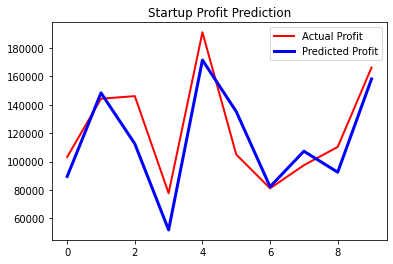

In [39]:
import matplotlib.pyplot as plt

plt.plot(y_test, color='r', label='Actual Profit', linewidth=2, markersize=12)
plt.plot(ypred, color='b', label='Predicted Profit', linewidth=3, markersize=10)
plt.legend()
plt.title('Startup Profit Prediction')
plt.show

In [40]:
model.save('starups_profit.h5')